# 1. Clustering Task
##### Name: _R.M. Nipuna Upeksha_
##### IIT ID: _20230106_
##### RGU ID: _2322823_

## 1.1 Introduction
1. Clearly define the data mining problem and objectives.
2. Formulates the problem in a way suitable for data mining techniques.

For the clustering task, the following data set was chosen from Kaggle.
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata. The dataset is comprised of 9000 credit card holders and their credit card usage behaviors. Following are the columns in the data set.

- `CUST ID` → Credit Card holder identification.
- `BALANCE` → The credit card balance amount.
- `BALANCE_FREQUENCY` → The frequency of updating the balance (0 = Not frequently updated, 1 = Frequently updated).
- `PURCHASES` → Number of purchases made from the credit card account.
- `ONEOFF_PURCHASES` → Maximum purchase price done for a purchase.
- `INSTALLMENTS PURCHASES` → Purchase amount done in installments.
- `CASH ADVANCE` → Advance amount provided by the user.
- `PURCHASES FREQUENCY` → The frequency of the purchases(0 = Not frequently purchased, 1 = Frequently purchased).
- `ONEOFF_PURCHASES_FREQUENCY` → Frequency of purchases happening in one-go(0 = Not frequently purchased, 1 = Frequently purchased).
- `PURCHASES_INSTALLMENTS_FREQUENCY` → Frequency of purchases done in installments(0 = Not frequently purchased, 1 = Frequently purchased).
- `CASH_ADVANCE_FREQUENCY` → The frequency of using cash advance.
- `CASH_ADVANCE_TRX` → Number of cash advance transactions.
- `PURCHASES_TRX` → Number of purchase transactions.
- `CREDIT_LIMIT` → Credit card limit for the user.
- `PAYMENTS` → Payment amount.
- `MINIMUM_PAYMENTS` → Minimum payment amounts done by the user.
- `PRC_FULL_PAYMENT` → Full payment percentage paid by the user.
- `TENURE` → Tenure period of the user.


### 1.1.1 Data Mining Problem and Objectives
The data mining problem is to <span style='background-color: #FFFF6E;'>categorize credit card users into distinct groups, aiming to gain valuable insights into their credit card behaviors</span>. Typically, the credit card holders fall into one of the following categories.

- `Transactors` → Customers who pay the minimum amount of interest charges and use the credit cards carefully without making large impacts.
- `Revolvers` → The customers who use their credit card as a loan, and pay around 20% of interest due to that.
- `New Customers` → New customers who get low-tenure credit cards only for specific purposes(e.g. traveling).
- `VIP/PRIME` → The customers who have high credit limits and credit percentages.
By applying this conceptual framework, we intend to analyze customer data and cluster them into optimal segments. This segmentation will allow using to discern trends and gain valuable insights.

The <span style='background-color: #FFFF6E;'>objectives</span> of the customer market segmentation are listed below.
- Can get important insights on segmentation and maximize the marketing conversion rates.
- Can find more spending customers and provide them more benefits to spend more.
- Can identify potential increases and decreases in segments and take necessary steps to resolve them.

### 1.1.2 Problem Formulation with Data Mining Techniques

We can divide the problem formulation and the necessary steps that can be taken to solve it into the following steps.

**Description**

The goal of this data mining problem is to categorize credit card holders into different segments to gain insights into their spending habits and usage patterns. By leveraging the aforementioned dataset columns/features we intend to identify different customer groups and identify their behaviors.

**Methodology**

We need to follow the data mining techniques mentioned below to achieve our goal. 
1. Data Pre-processing\
(a) Handling NA/missing values if any.\
(b) Handling outliers.\
(c) Feature scaling for uniformity.\
(d) Encoding categorical variables, if present.
3. Exploratory Data Analysis(EDA)\
(a) Understanding the data and feature distribution.
4. Feature Selection\
(a) Identifying relevant features for segmentation.\
(b) Removing redundant or less impactful features.
6. Clustering Algorithm\
(a) Utilizing clustering algorithms like K-Means clustering.\
(b) Grouping the customers based on similar credit card usage patterns.\
(c) Determining the optimal number of clusters using the Elbow Method or Silhouette Score.

## 1.2 Pre-process the Dataset
1. Handle missing values and outliers if any.
2. Produce Q-Q plots and histograms of the features and apply the transformations if required.
3. If it is required, apply suitable feature coding techniques.
4. Scale and/or standardize the features and produce relevant graphs to show the scaling/standardizing effect.
5. If required, apply suitable feature discretization techniques.

Before applying the algorithms to our dataset, we need to pre-process the dataset to remove NA/missing values, duplications, and outliers.

Let's import the necessary libraries and our dataset first.

The following code is used to ignore the warnings that may pop up in the libraries.

```python
import warnings
warnings . filterwarnings ("ignore" , category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
```

In [1]:
# Import libraries
# Data Structures
import pandas as pd
import numpy as np

# Data processing
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer, KBinsDiscretizer
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score
from timeit import timeit

# Visualization and analysis
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from matplotlib.ticker import FixedLocator, FixedFormatter
from yellowbrick.cluster import KElbowVisualizer
from prettytable import PrettyTable

# Warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

Next let's import the dataset as a `Pandas` data frame.

In [2]:
# Constants
# The dataset
MARKETING_DATASET = './datasets/marketing_data.csv'

In [3]:
# Read the dataset
df = pd.read_csv(MARKETING_DATASET)

Let's check the number of records and features in the dataset. Also, let's print the first 10 records to check the data in our dataset.

In [4]:
# Count the number of records in the data frame
number_of_records = len(df.index)
print(f'Number of records in the dataset: {number_of_records}')

# Count the number of features in the data frame
number_of_features = len(df.columns)
print(f'Number of features in the dataset: {number_of_features}')

# Show first 10 records
df.head(10)

Number of records in the dataset: 8950
Number of features in the dataset: 18


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   
8  C10009  1014.926473           1.000000     861.49            661.49   
9  C10010   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12  
8   688.278568        311.963409          0.000000      12  
9  1164.770591        100.302262          0.000000      12

To get a general idea about the dataset, we can use the `df.describe()` function, which will provide the metrics like `mean`, `count`, and `standard deviation` of the dataset.

In [5]:
# Get a general idea about the dataset
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

The following code also provides a general idea about the dataset. It provides information on the data types in the dataset and the non-null data count.

In [6]:
# Get a general idea about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### 1.2.1 Removing Duplicated Records, Missing Values, and Outliers from the Dataset

The following code snippets show how you can remove the duplicate records, and process the missing values and outliers from the dataset.

#### Step 1 - Removing Duplicated Records

Let's first look at the data frame and remove the duplicate records if present. To check whether we have duplicate records we can use `df.duplicated().sum()` function.

In [7]:
# Get a copy of the data frame
df1 = df.copy()

# First check whether there are any duplicates. 
# Since we need to check duplicate elements from all the data in the data frame we can use the following to check.
print(f'The number of duplicated values in the dataset is: {df1.duplicated().sum()}')

The number of duplicated values in the dataset is: 0


#### Step 2 - Handling Missing Values

Since there are no duplications in the dataset, next we need to check for the missing values(NA/null values). To get an idea about whether we have missing values, we can iterate the data rows and check for the unique values in each column.

In [8]:
# Checking the unique data in the dataset
for col_name in df1:
    print(f'==========={col_name}===========')
    print(df1[col_name].unique())
    print('\n')

===========CUST_ID===========
['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190']


===========BALANCE===========
[  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075]


===========BALANCE_FREQUENCY===========
[0.818182 0.909091 1.       0.636364 0.545455 0.875    0.454545 0.727273
 0.5      0.888889 0.090909 0.272727 0.363636 0.       0.666667 0.75
 0.857143 0.181818 0.333333 0.6      0.3      0.125    0.9      0.833333
 0.8      0.2      0.777778 0.555556 0.25     0.142857 0.571429 0.4
 0.444444 0.714286 0.222222 0.1      0.625    0.428571 0.111111 0.285714
 0.7      0.375    0.166667]


===========PURCHASES===========
[  95.4     0.    773.17 ...  291.12  144.4  1093.25]


===========ONEOFF_PURCHASES===========
[   0.    773.17 1499.   ...  734.4  1012.73 1093.25]


===========INSTALLMENTS_PURCHASES===========
[  95.4     0.   1333.28 ...  113.28  291.12  144.4 ]


===========CASH_ADVANCE===========
[   0.       6442.945483  205.788017 ... 8555.40932

As you can see, to check for missing values in each column, we have to check the data manually, and it is a laborious task. Therefore, what we can do first is not check for the unique values, but plot the missing values using the `Seaborn` library’s `heatmap()` function. This will give us an idea about whether we have missing values or not.

<Axes: >

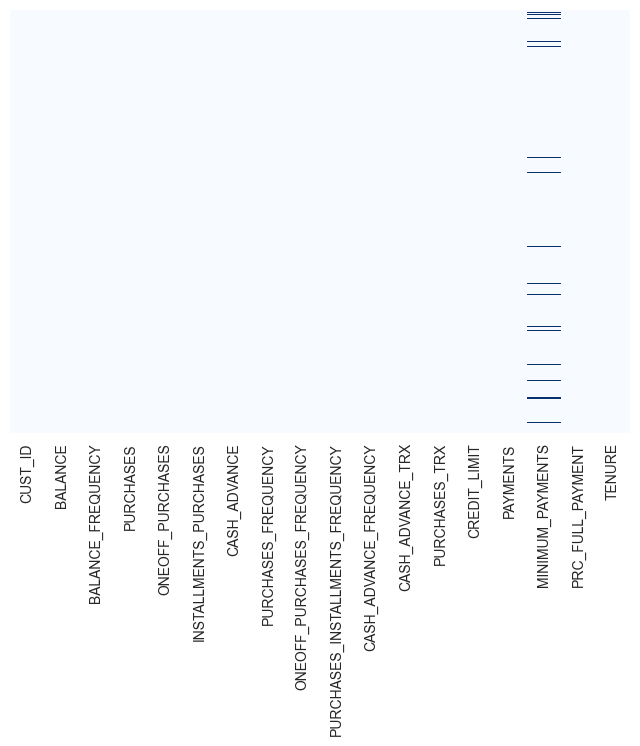

In [9]:
# View the heatmap to check null/NaN values
sns.heatmap(df1.isnull(), yticklabels=False, cbar=False, cmap="Blues")

Since we can see that there are missing values present in the dataset(because of the graph), next we need to check how many missing values are present in each column. To get that information you can use the below given options.
- `df.isnull().sum()`
- `df.info()`

In [10]:
# Similarly check with df.isnull().sum() function to get the count of missing values
df1.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There are two options to handle missing data in a data set.

1. If the missing value count of a column is greater than 50% - 70%, then we need to <span style='background-color: #FFFF6E;'>remove</span> that column from the dataset.
2. If the missing value count of a column is less than 50% - 70%, then we need to <span style='background-color: #FFFF6E;'>impute</span> the missing values.

Since we only have 1 missing value from `CREDIT_LIMIT` and 313 missing values from `MINIMUM_PAYMENTS`, we can simply <span style='background-color: #FFFF6E;'>replace(data imputation)</span> the missing values with the mean values of their respective columns.

In [11]:
# Fill up the missing elements in the 'MINIMUM_PAYMENTS' with the mean of the 'MINIMUM_PAYMENTS'
df1.loc[(df1['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df1['MINIMUM_PAYMENTS'].mean()

In [12]:
# Check again to verify whether the missing values have been filled or not after data imputation
df1.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
# Fill up the missing elements in the 'CREDIT_LIMIT' with the mean of the 'CREDIT_LIMIT'
df1.loc[(df1['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df1['CREDIT_LIMIT'].mean()

In [14]:
# Check again to verify whether the missing values have been filled or not
df1.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Furthermore, we don’t need the `CUST_ID` column since it only contains a unique identifier for the user and cannot used to provide a machine-learning solution to predict the customer ID. Therefore, we can drop it from our dataset.

In [15]:
# We don't need the column 'CUST_ID'. Therefore, let's remove that column.
df1.drop('CUST_ID', axis=1, inplace=True)

In [16]:
# Check the data to verify whether the 'CUST_ID' column is removed or not
df1.head(10)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   
6   627.260806           1.000000    7091.01           6402.63   
7  1823.652743           1.000000     436.20              0.00   
8  1014.926473           1.000000     861.49            661.49   
9   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12  
8   688.278568        311.963409          0.000000      12  
9  1164.770591        100.302262          0.000000      12

#### Step 3 - Removing/Capping Outliers

Now, what we need to do is check for the outliers in the dataset and remove them. There are a few ways that you can do to remove the outliers in a dataset.

1. **Z-Score** → Calculate the Z-score for each observation and remove the data points with a Z-Score beyond the threshold.
2. **Inter-quartile Range(IQR) Method** → Compute the IQR for the data and remove data points that fall below $Q_1 − 1.5 × IQR$ or above $Q_3 + 1.5 × IQR$ where is the $Q_1$ 25th percentile and $Q_3$ is the 75th percentile.
3. **Percentile Method** → Rather than using the 25th and 75th percentile, we can define custom ranges and use them.

##### <u>Using Percentile Method</u>

We want to check the outliers with numerical values. Therefore, we first need to remove the <span style='background-color: #FFFF6E;'>categorical values and other binary values</span> present in the data frame. To do that, we can copy the data frame using `df.copy()` and select a slice from that where we have the necessary numerical columns. The following code snippet shows how to get the results using the percentile method.

Before removing outliers the shape of BALANCE:(8950, 17)
After removing outliers the shape of BALANCE:(8054, 17)


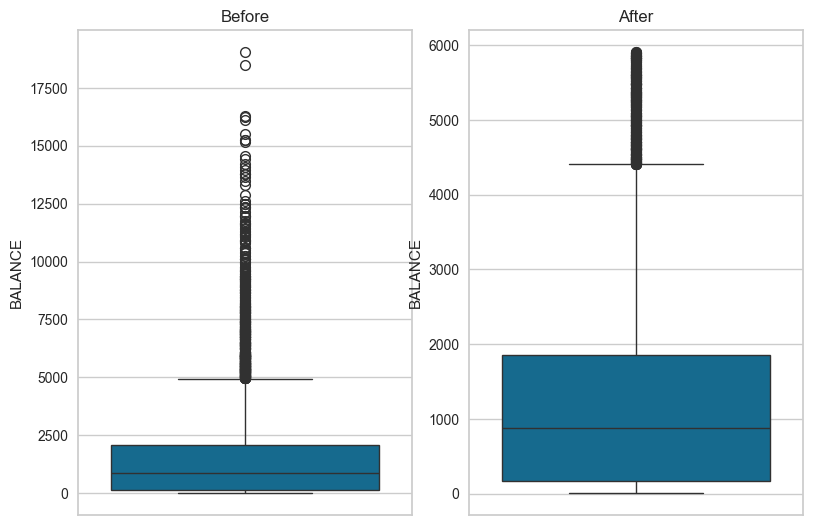

Before removing outliers the shape of BALANCE_FREQUENCY:(8950, 17)
After removing outliers the shape of BALANCE_FREQUENCY:(2237, 17)


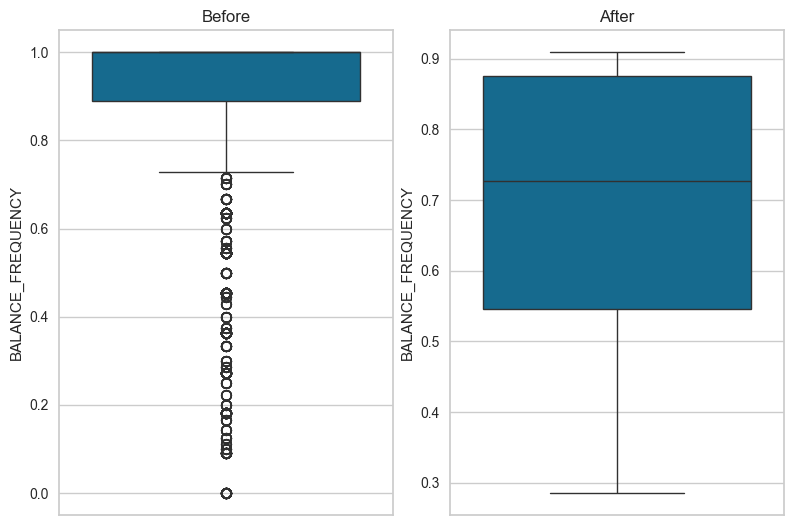

Before removing outliers the shape of PURCHASES:(8950, 17)
After removing outliers the shape of PURCHASES:(6458, 17)


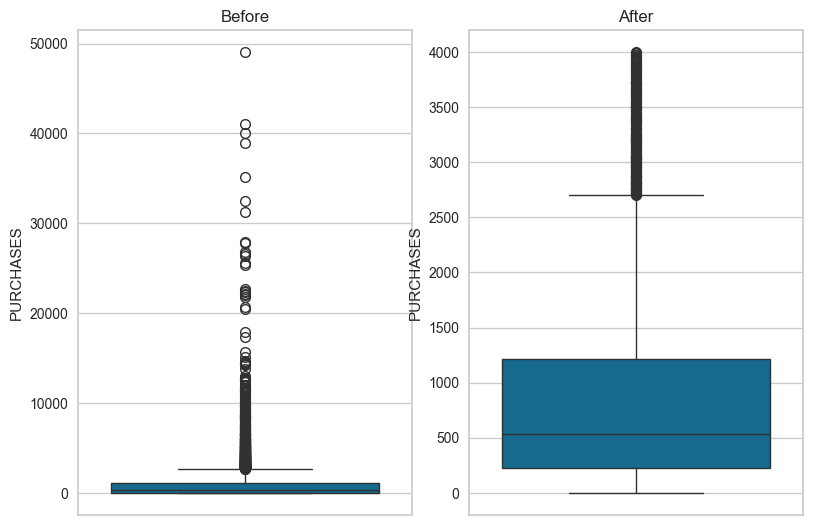

Before removing outliers the shape of ONEOFF_PURCHASES:(8950, 17)
After removing outliers the shape of ONEOFF_PURCHASES:(4200, 17)


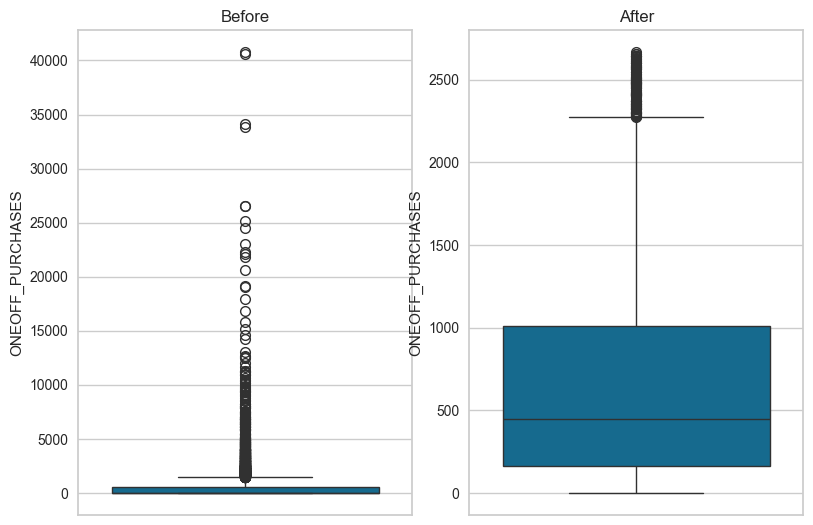

Before removing outliers the shape of INSTALLMENTS_PURCHASES:(8950, 17)
After removing outliers the shape of INSTALLMENTS_PURCHASES:(4586, 17)


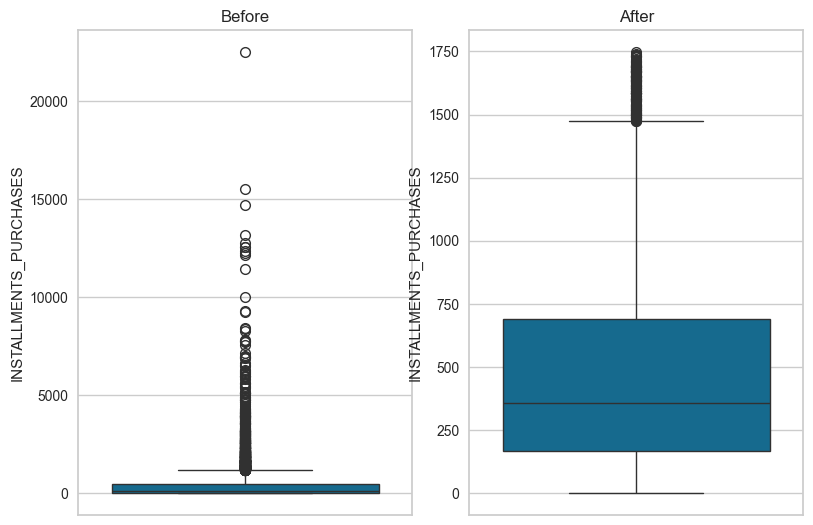

Before removing outliers the shape of CASH_ADVANCE:(8950, 17)
After removing outliers the shape of CASH_ADVANCE:(3874, 17)


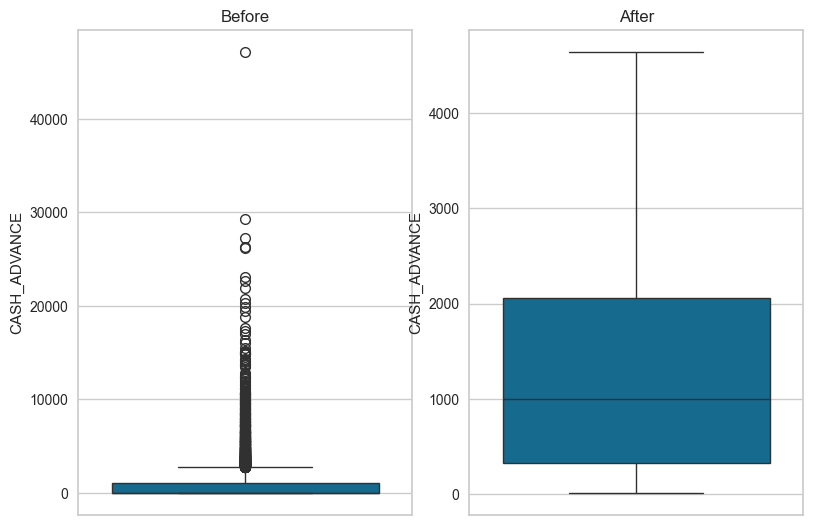

Before removing outliers the shape of PURCHASES_FREQUENCY:(8950, 17)
After removing outliers the shape of PURCHASES_FREQUENCY:(4729, 17)


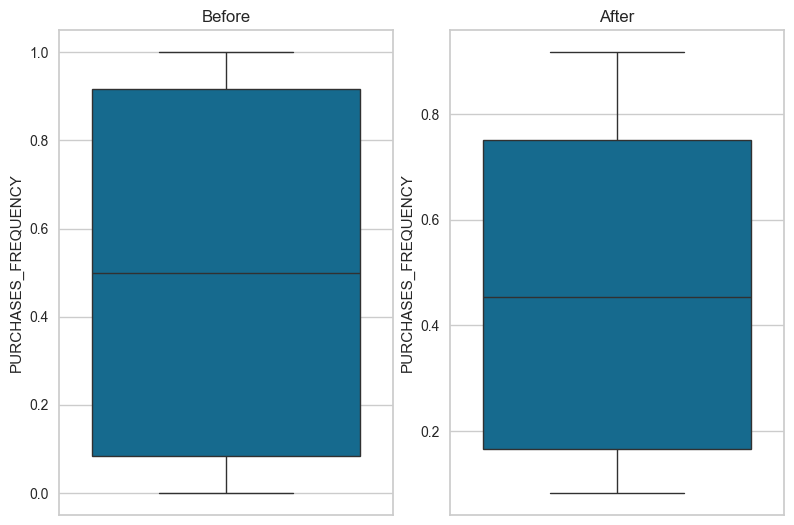

Before removing outliers the shape of ONEOFF_PURCHASES_FREQUENCY:(8950, 17)
After removing outliers the shape of ONEOFF_PURCHASES_FREQUENCY:(4167, 17)


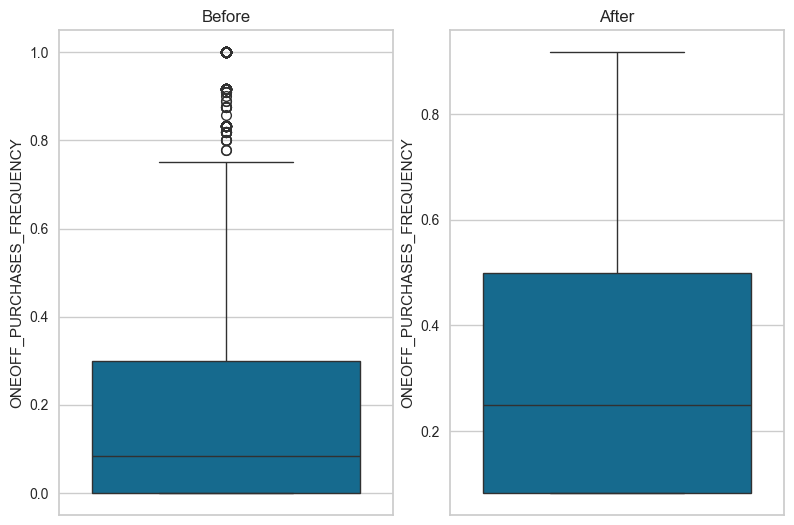

Before removing outliers the shape of PURCHASES_INSTALLMENTS_FREQUENCY:(8950, 17)
After removing outliers the shape of PURCHASES_INSTALLMENTS_FREQUENCY:(3704, 17)


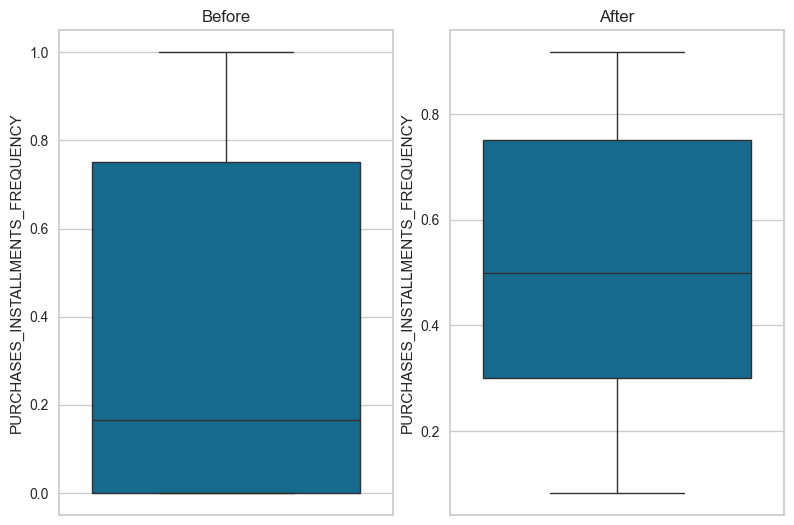

Before removing outliers the shape of CASH_ADVANCE_FREQUENCY:(8950, 17)
After removing outliers the shape of CASH_ADVANCE_FREQUENCY:(3821, 17)


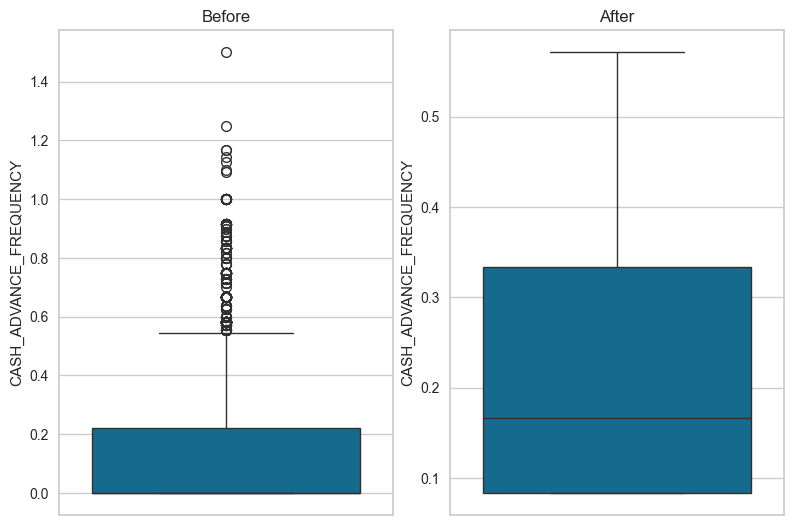

Before removing outliers the shape of CASH_ADVANCE_TRX:(8950, 17)
After removing outliers the shape of CASH_ADVANCE_TRX:(3852, 17)


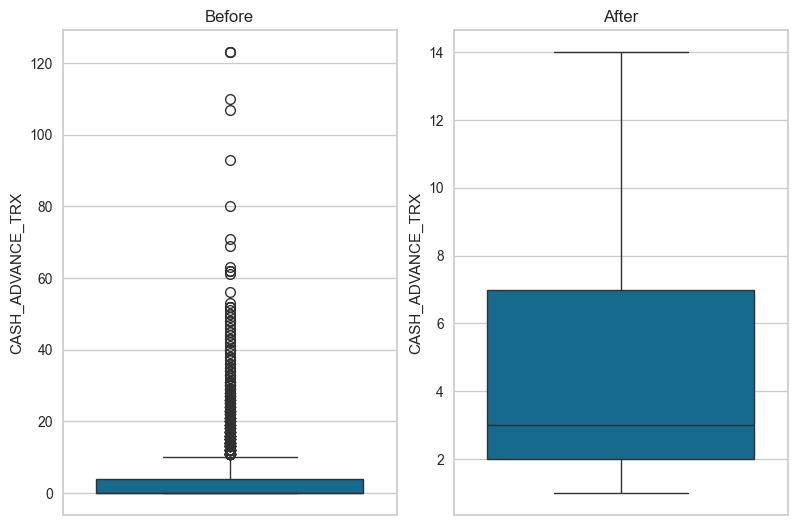

Before removing outliers the shape of PURCHASES_TRX:(8950, 17)
After removing outliers the shape of PURCHASES_TRX:(6454, 17)


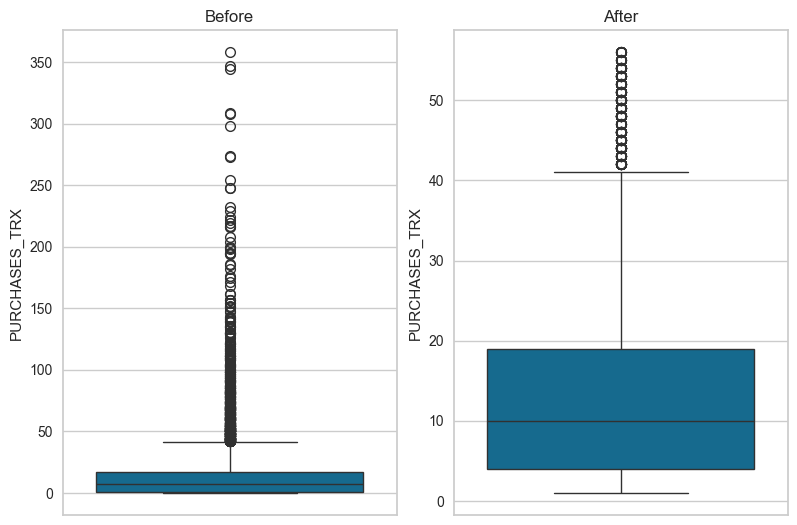

Before removing outliers the shape of CREDIT_LIMIT:(8950, 17)
After removing outliers the shape of CREDIT_LIMIT:(7659, 17)


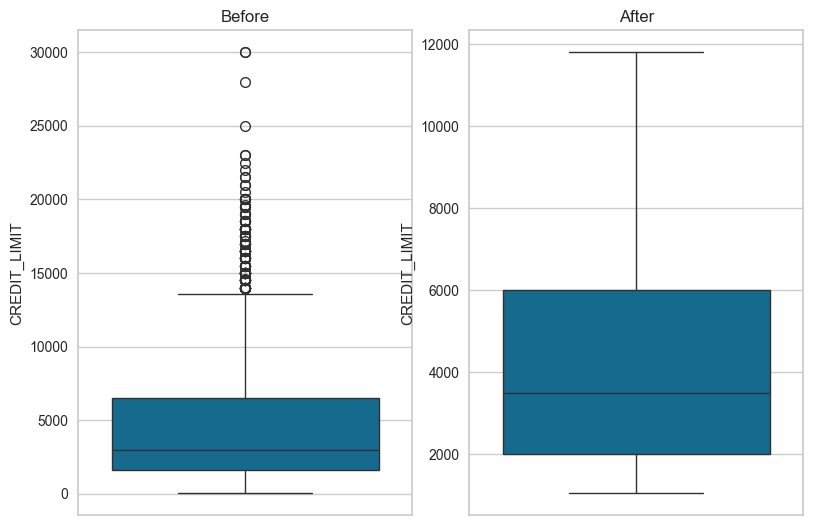

Before removing outliers the shape of PAYMENTS:(8950, 17)
After removing outliers the shape of PAYMENTS:(8054, 17)


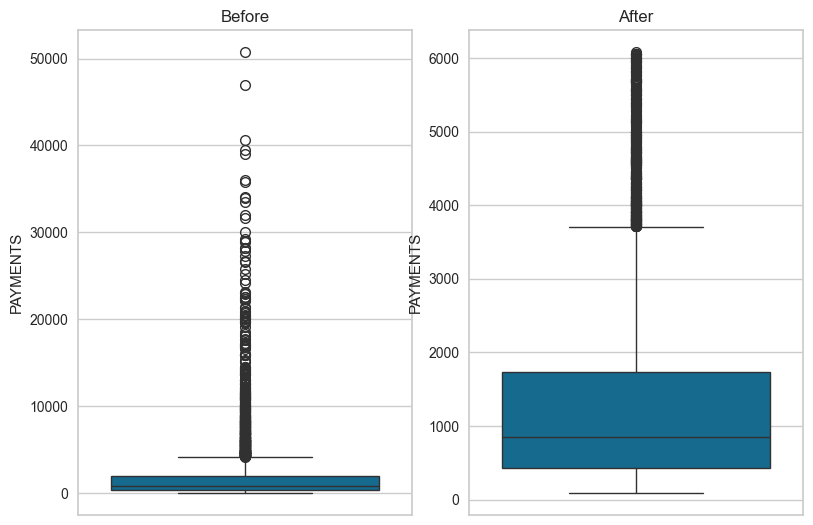

Before removing outliers the shape of MINIMUM_PAYMENTS:(8950, 17)
After removing outliers the shape of MINIMUM_PAYMENTS:(8054, 17)


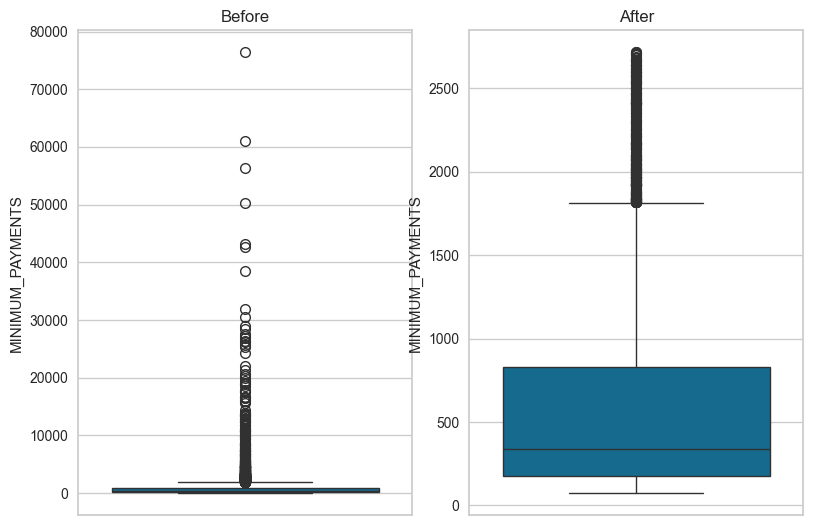

Before removing outliers the shape of PRC_FULL_PAYMENT:(8950, 17)
After removing outliers the shape of PRC_FULL_PAYMENT:(2559, 17)


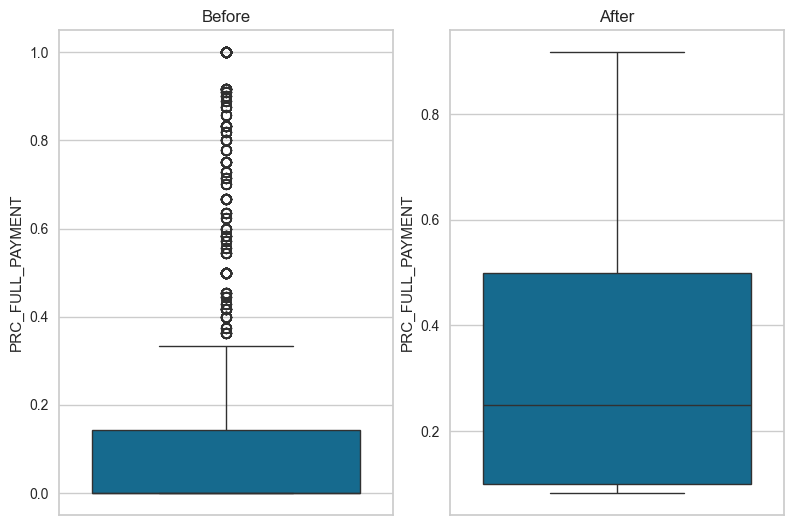

In [17]:
# Handling the outliers using the percentile method
# Copy the data frame
df2 = df1.copy()

# Get the numerical features
numerical_features = df2.dtypes!=object
numerical_fields = df2.columns[numerical_features].tolist()

# Remove unwanted fields if there are any
UNWANTED_FIELDS = ['TENURE']
numerical_fields = [field for field in numerical_fields if field not in UNWANTED_FIELDS]

# Removing outliers using the percentile method
def remove_outliers_using_percentile_method(field):
    fig, axes = plt.subplots(1,2)
    plt.tight_layout()
    print(f'Before removing outliers the shape of {field}:{df1.shape}')
    sns.boxplot(df1[field], orient='v', ax=axes[0])
    axes[0].title.set_text('Before')
    
    # Max and min percentile
    max_percentile_val = df1[field].quantile(0.95)
    min_percentile_val = df1[field].quantile(0.05)
    
    # Remove the outliers
    df2 = df1[(df1[field] > min_percentile_val) & (df1[field] < max_percentile_val)]
    
    # Visualize
    print(f'After removing outliers the shape of {field}:{df2.shape}')
    sns.boxplot(df2[field], orient='v', ax=axes[1])
    axes[1].title.set_text('After')

    # Show plots
    plt.show()

for field in numerical_fields:
    remove_outliers_using_percentile_method(field)

It can be seen that if we use the `Percentile Method` there will be a huge loss in data. Therefore, we need to find an alternative option to handle the outliers. Now, let’s check what kind of results we can get from using the `Inter-quartile Range` method. 

##### <u>Inter-quartile Range Method</u>
The following code snippet is used to get the calculated `Inter-quartile Range` and get the necessary results. Next, let’s check the results we have obtained from the above code snippet.

Before removing outliers the shape of BALANCE:(8950, 17)
Q1: 128.2819155, Q3: 2054.1400355
IQR: 1925.85812
Lower limit: -2760.5052645, Upper limit: 4942.9272155
After removing outliers the shape of BALANCE:(8950, 17)


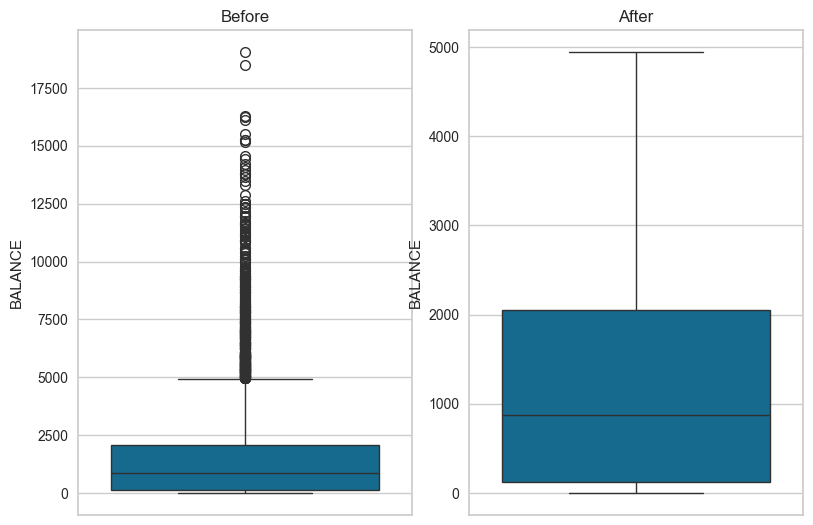

Before removing outliers the shape of BALANCE_FREQUENCY:(8950, 17)
Q1: 0.888889, Q3: 1.0
IQR: 0.11111099999999996
Lower limit: 0.7222225000000001, Upper limit: 1.1666664999999998
After removing outliers the shape of BALANCE_FREQUENCY:(8950, 17)


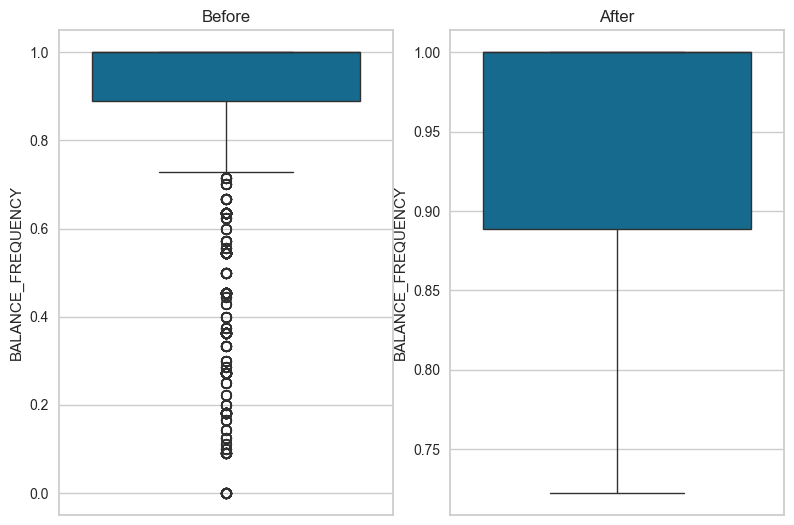

Before removing outliers the shape of PURCHASES:(8950, 17)
Q1: 39.635, Q3: 1110.13
IQR: 1070.4950000000001
Lower limit: -1566.1075000000003, Upper limit: 2715.8725000000004
After removing outliers the shape of PURCHASES:(8950, 17)


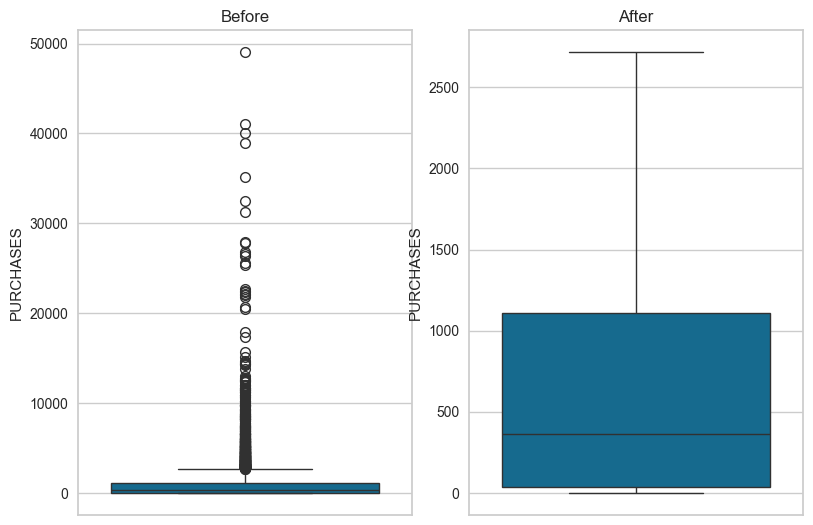

Before removing outliers the shape of ONEOFF_PURCHASES:(8950, 17)
Q1: 0.0, Q3: 577.405
IQR: 577.405
Lower limit: -866.1075, Upper limit: 1443.5124999999998
After removing outliers the shape of ONEOFF_PURCHASES:(8950, 17)


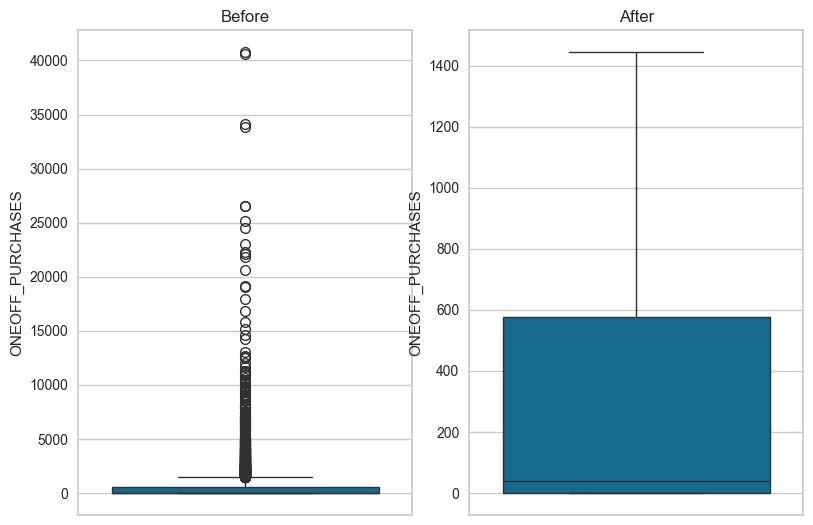

Before removing outliers the shape of INSTALLMENTS_PURCHASES:(8950, 17)
Q1: 0.0, Q3: 468.6375
IQR: 468.6375
Lower limit: -702.95625, Upper limit: 1171.59375
After removing outliers the shape of INSTALLMENTS_PURCHASES:(8950, 17)


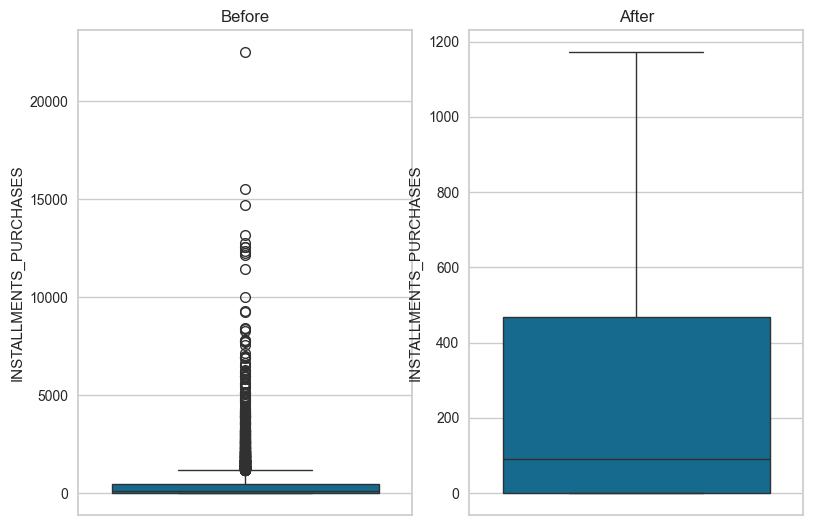

Before removing outliers the shape of CASH_ADVANCE:(8950, 17)
Q1: 0.0, Q3: 1113.8211392500002
IQR: 1113.8211392500002
Lower limit: -1670.7317088750003, Upper limit: 2784.5528481250003
After removing outliers the shape of CASH_ADVANCE:(8950, 17)


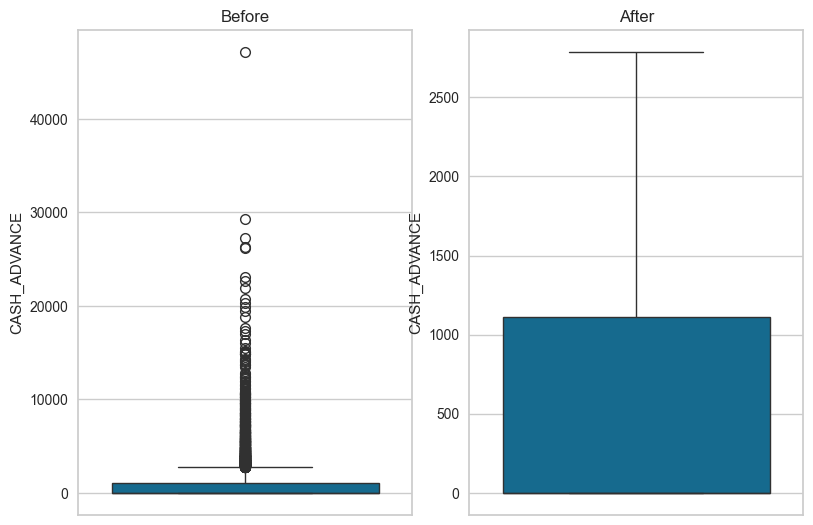

Before removing outliers the shape of PURCHASES_FREQUENCY:(8950, 17)
Q1: 0.083333, Q3: 0.916667
IQR: 0.833334
Lower limit: -1.166668, Upper limit: 2.166668
After removing outliers the shape of PURCHASES_FREQUENCY:(8950, 17)


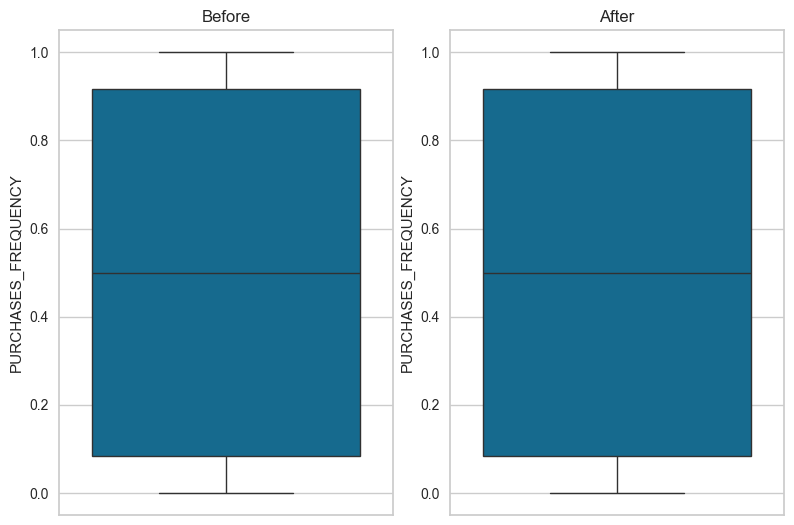

Before removing outliers the shape of ONEOFF_PURCHASES_FREQUENCY:(8950, 17)
Q1: 0.0, Q3: 0.3
IQR: 0.3
Lower limit: -0.44999999999999996, Upper limit: 0.75
After removing outliers the shape of ONEOFF_PURCHASES_FREQUENCY:(8950, 17)


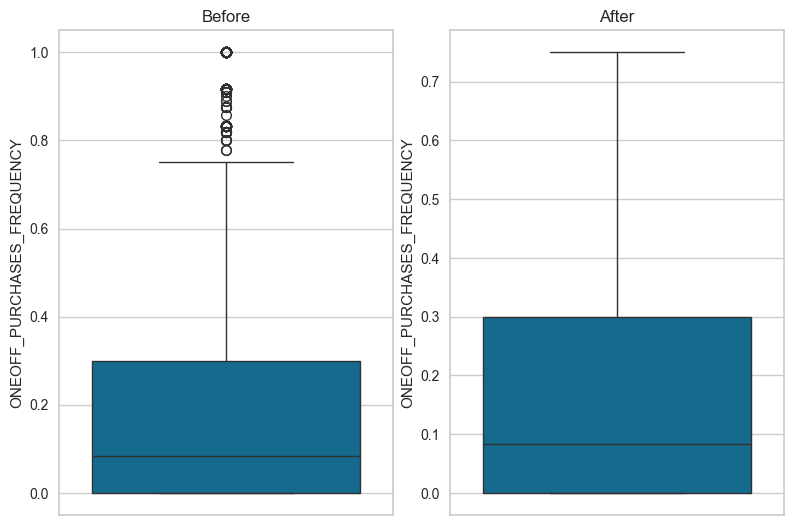

Before removing outliers the shape of PURCHASES_INSTALLMENTS_FREQUENCY:(8950, 17)
Q1: 0.0, Q3: 0.75
IQR: 0.75
Lower limit: -1.125, Upper limit: 1.875
After removing outliers the shape of PURCHASES_INSTALLMENTS_FREQUENCY:(8950, 17)


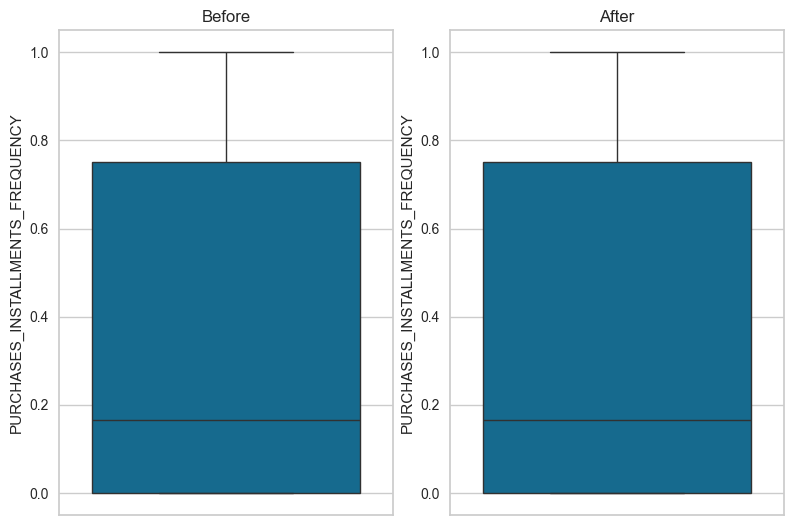

Before removing outliers the shape of CASH_ADVANCE_FREQUENCY:(8950, 17)
Q1: 0.0, Q3: 0.222222
IQR: 0.222222
Lower limit: -0.333333, Upper limit: 0.555555
After removing outliers the shape of CASH_ADVANCE_FREQUENCY:(8950, 17)


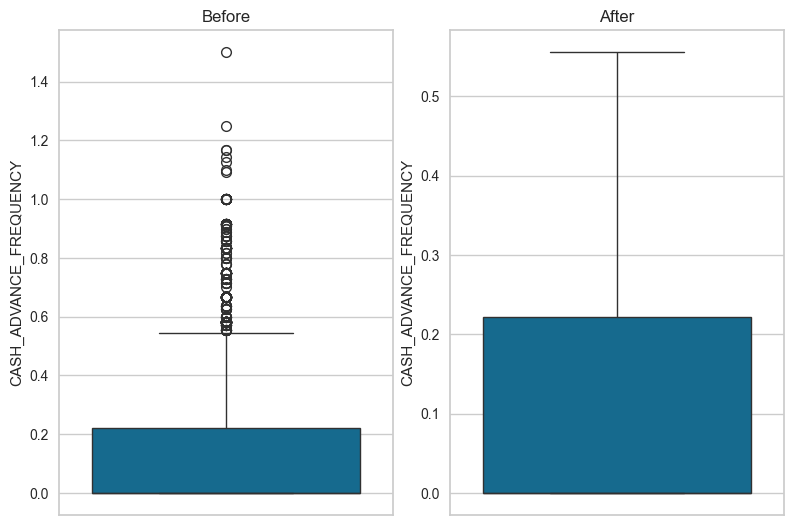

Before removing outliers the shape of CASH_ADVANCE_TRX:(8950, 17)
Q1: 0.0, Q3: 4.0
IQR: 4.0
Lower limit: -6.0, Upper limit: 10.0
After removing outliers the shape of CASH_ADVANCE_TRX:(8950, 17)


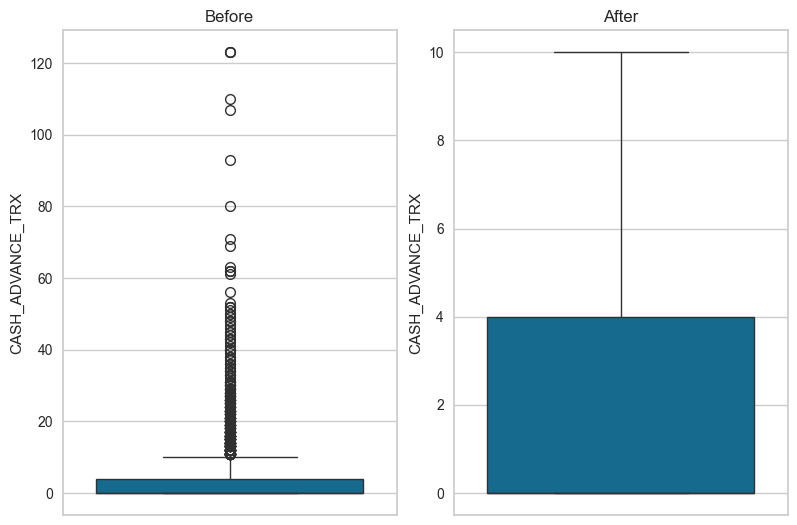

Before removing outliers the shape of PURCHASES_TRX:(8950, 17)
Q1: 1.0, Q3: 17.0
IQR: 16.0
Lower limit: -23.0, Upper limit: 41.0
After removing outliers the shape of PURCHASES_TRX:(8950, 17)


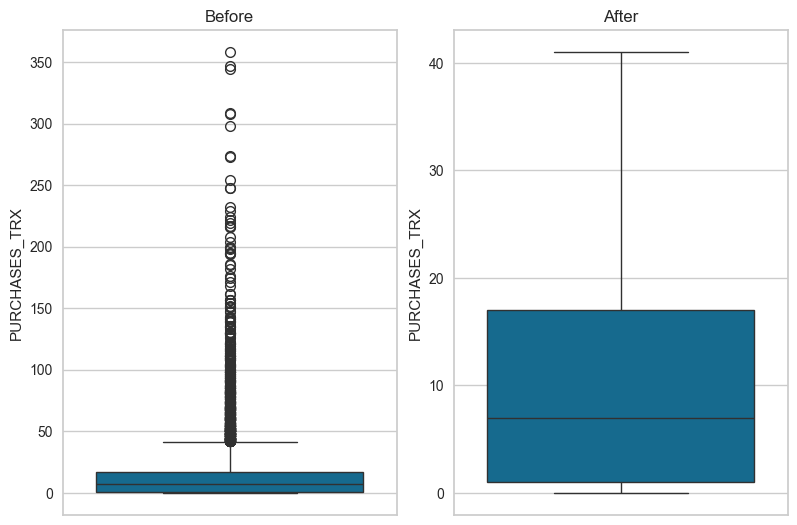

Before removing outliers the shape of CREDIT_LIMIT:(8950, 17)
Q1: 1600.0, Q3: 6500.0
IQR: 4900.0
Lower limit: -5750.0, Upper limit: 13850.0
After removing outliers the shape of CREDIT_LIMIT:(8950, 17)


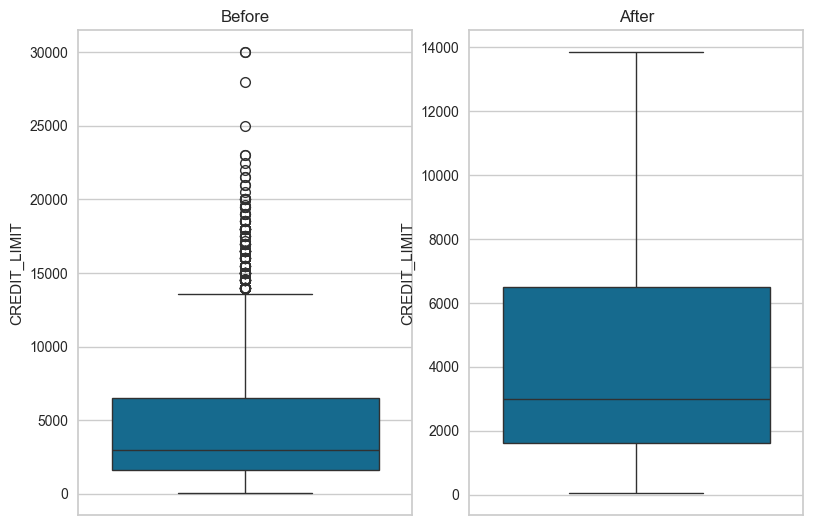

Before removing outliers the shape of PAYMENTS:(8950, 17)
Q1: 383.276166, Q3: 1901.1343167500002
IQR: 1517.8581507500003
Lower limit: -1893.5110601250003, Upper limit: 4177.921542875
After removing outliers the shape of PAYMENTS:(8950, 17)


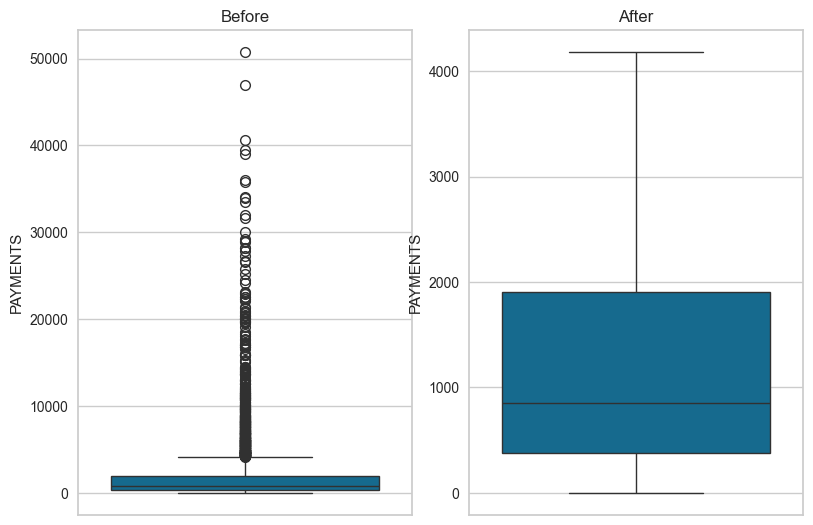

Before removing outliers the shape of MINIMUM_PAYMENTS:(8950, 17)
Q1: 170.85765425, Q3: 864.2065423050828
IQR: 693.3488880550829
Lower limit: -869.1656778326242, Upper limit: 1904.229874387707
After removing outliers the shape of MINIMUM_PAYMENTS:(8950, 17)


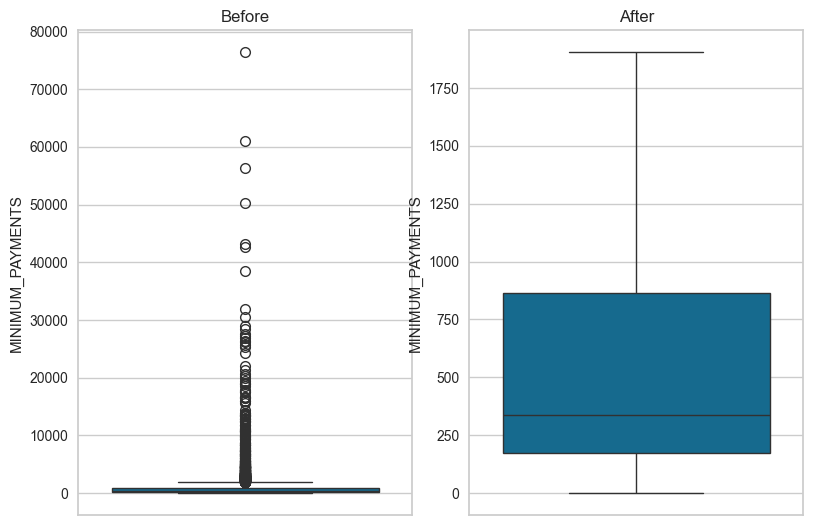

Before removing outliers the shape of PRC_FULL_PAYMENT:(8950, 17)
Q1: 0.0, Q3: 0.142857
IQR: 0.142857
Lower limit: -0.21428550000000002, Upper limit: 0.35714250000000003
After removing outliers the shape of PRC_FULL_PAYMENT:(8950, 17)


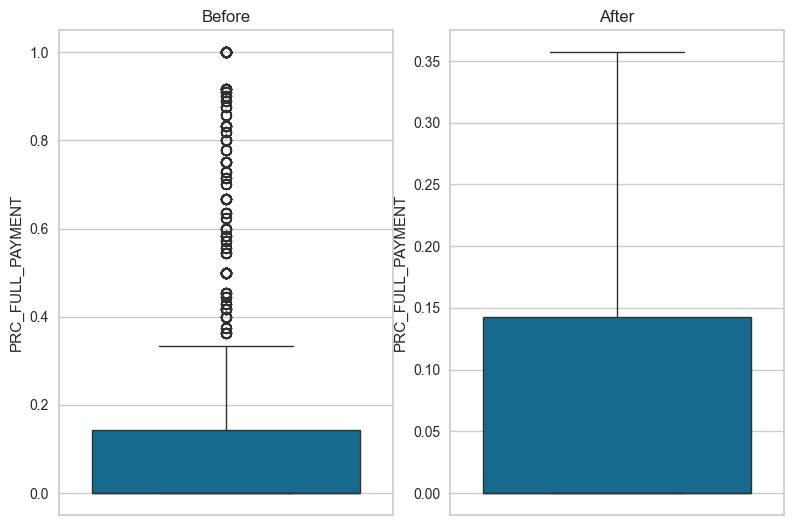

In [18]:
# Handling outliers using the IQR method
# Copy data frame
df3= df1.copy()

# Removing outliers using the IQR method
def remove_outliers_using_iqr_method(field):
    fig, axes = plt.subplots(1,2)
    plt.tight_layout()
    print(f'Before removing outliers the shape of {field}:{df1.shape}')
    sns.boxplot(df1[field], orient='v', ax=axes[0])
    axes[0].title.set_text('Before')

    # Calculating the IQR
    q1 = df2[field].quantile(0.25)
    q3 = df2[field].quantile(0.75)
    print(f'Q1: {q1}, Q3: {q3}')
    iqr = q3 - q1
    print(f'IQR: {iqr}')
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    print(f'Lower limit: {lower_limit}, Upper limit: {upper_limit}')
    df3[field] = np.where(df3[field] > upper_limit, upper_limit, df3[field])
    df3[field] = np.where(df3[field] < lower_limit, lower_limit, df3[field])
    print(f'After removing outliers the shape of {field}:{df3.shape}')
    sns.boxplot(df3[field], orient='v', ax=axes[1])
    axes[1].title.set_text('After')

    # Show plots
    plt.show()

for field in numerical_fields:
    remove_outliers_using_iqr_method(field)

From the results, we can see that `IQR` is better since it does not reduce the dataset drastically.

### 1.2.2 Producing Q-Q Plots, Histograms, and Applying Necessary Transformations

First, we need to produce Q-Q plots and histograms to check whether the data distribution in the dataset is normal or not.

#### Step 1 - Q-Q Plots
Q-Q(Quantile-Quantile) plots are typically used to assess whether a given dataset follows a particular distribution or not. It usually checks whether a dataset follows a normal(Gaussian) distribution and based on the exploratory data extracted from it, we can transform the data and normalize the dataset for more accurate results.
The following code snippet is used to make Q-Q plots for the dataset.

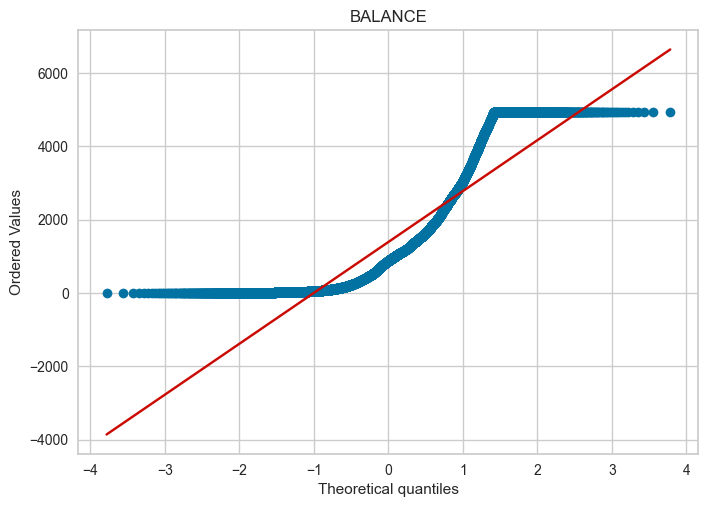

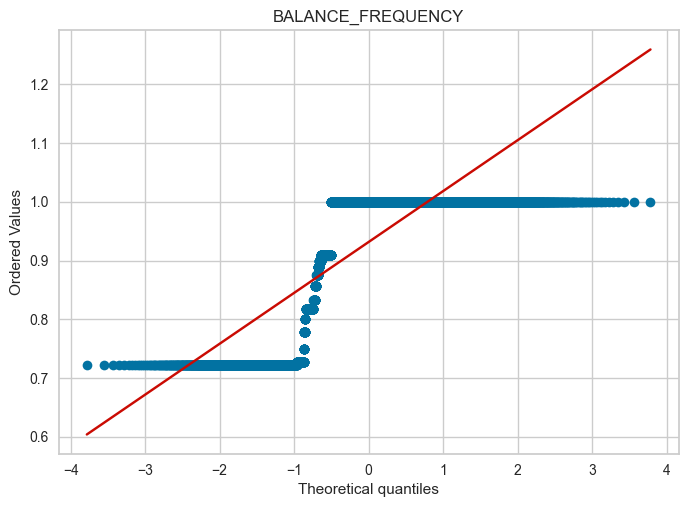

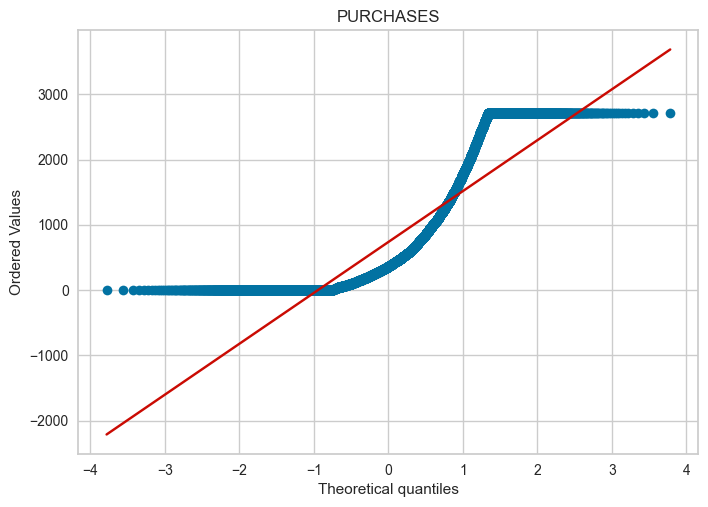

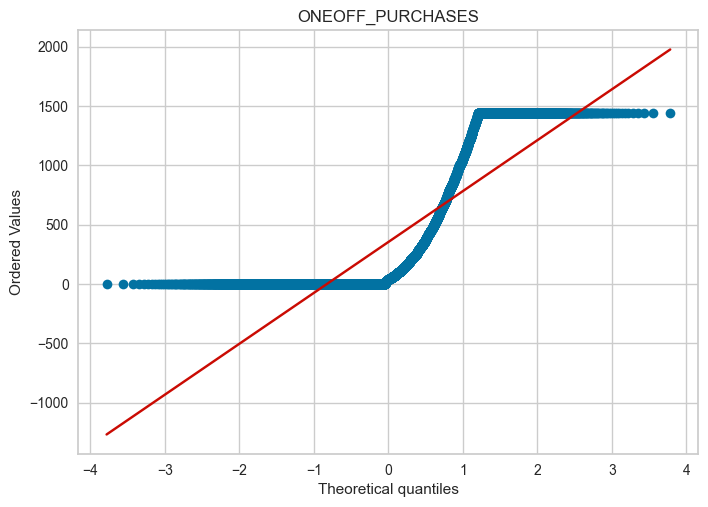

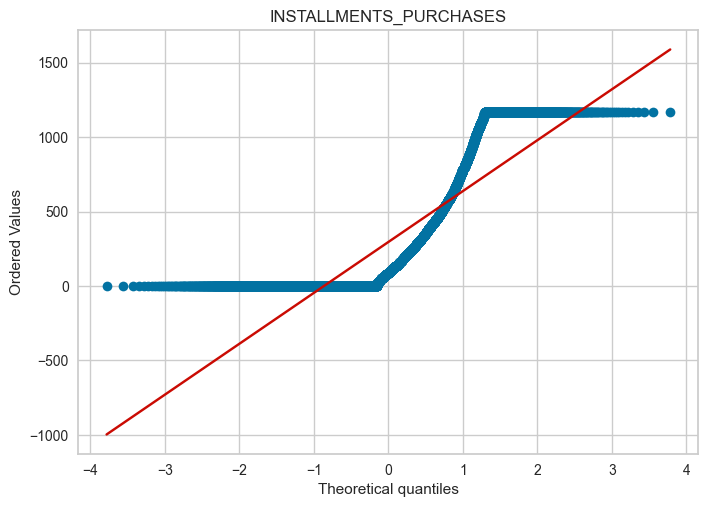

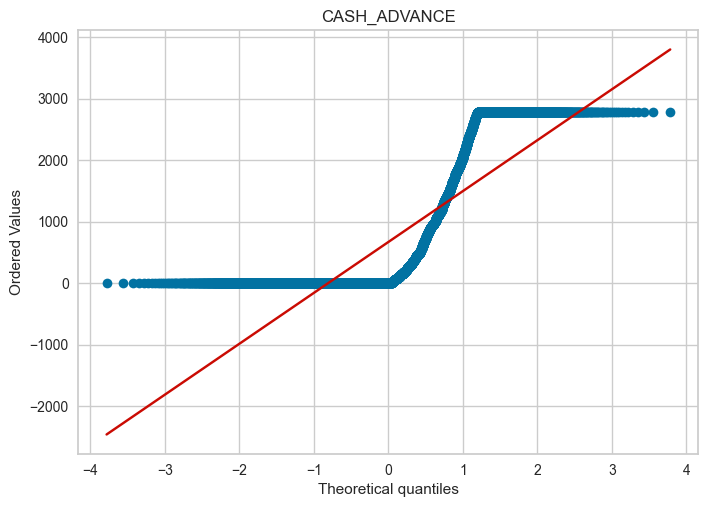

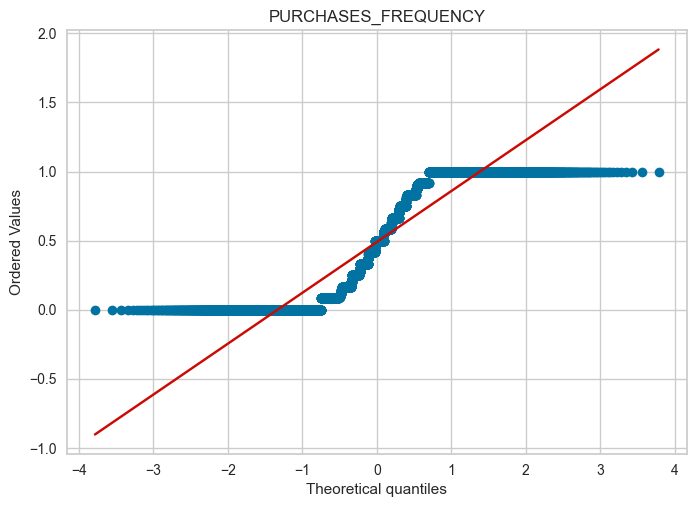

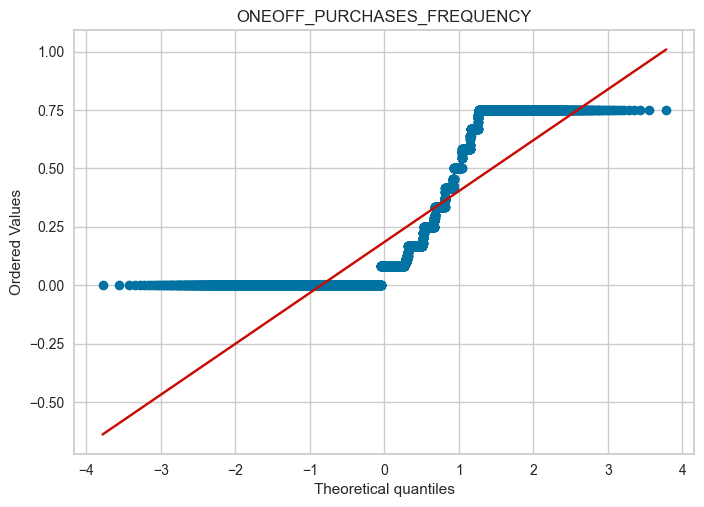

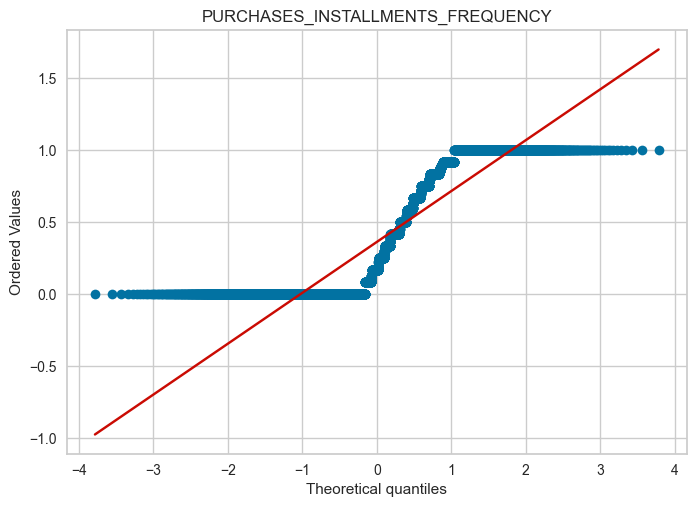

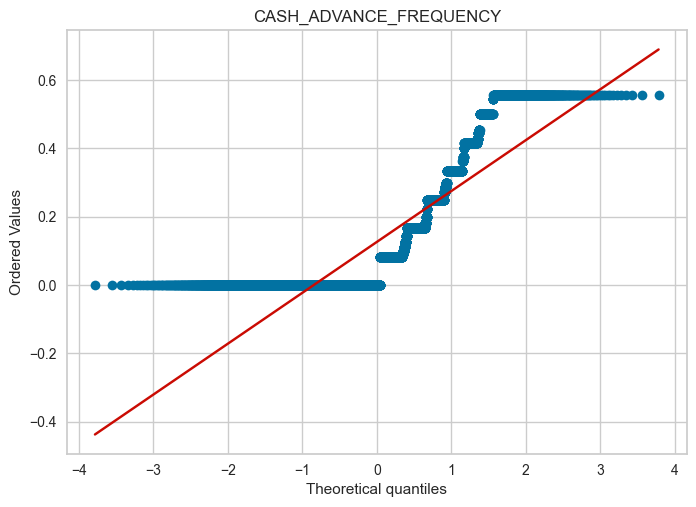

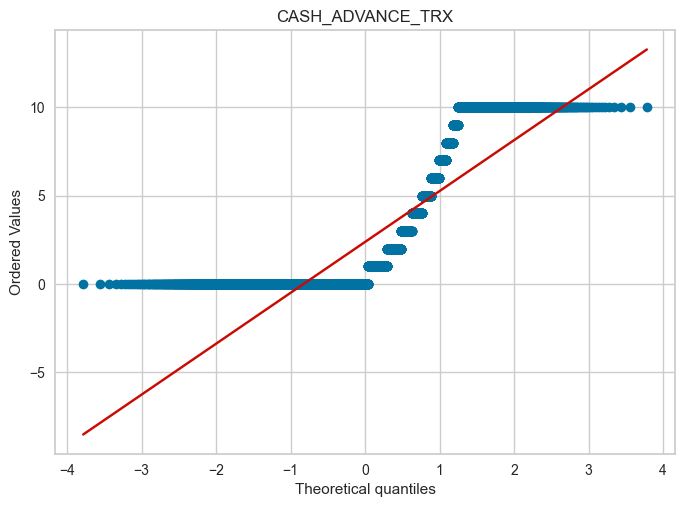

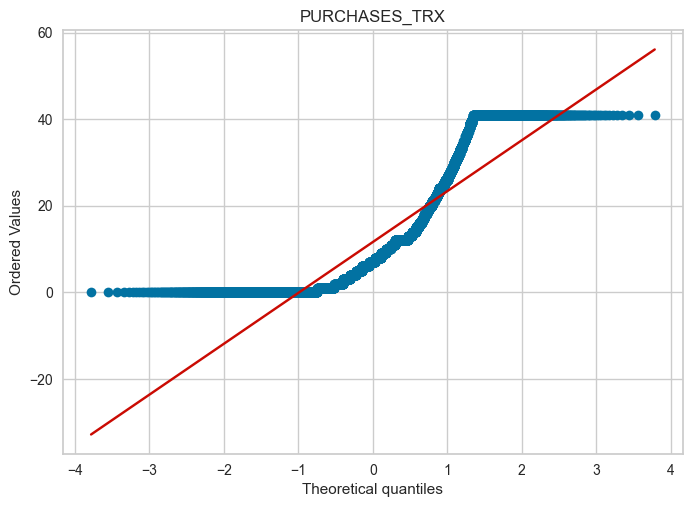

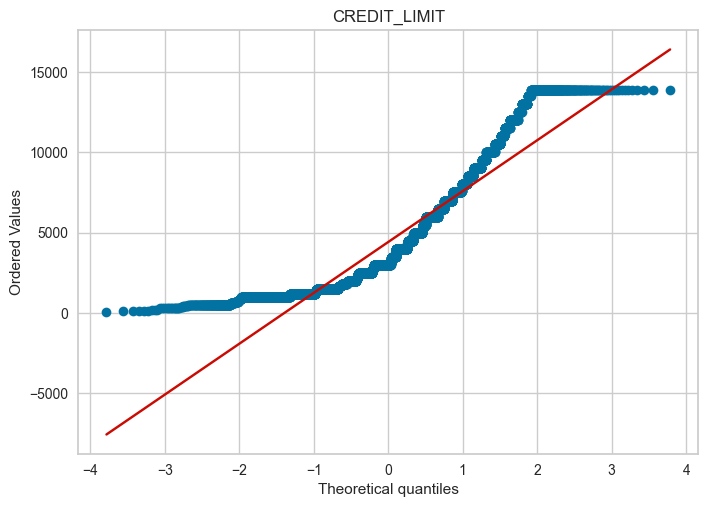

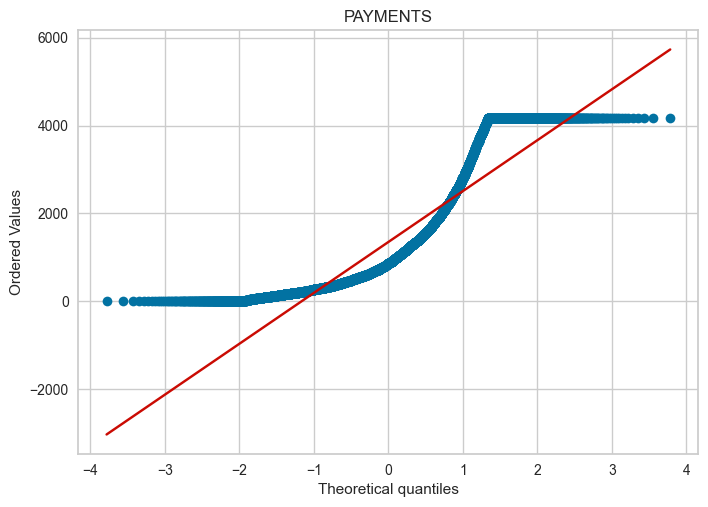

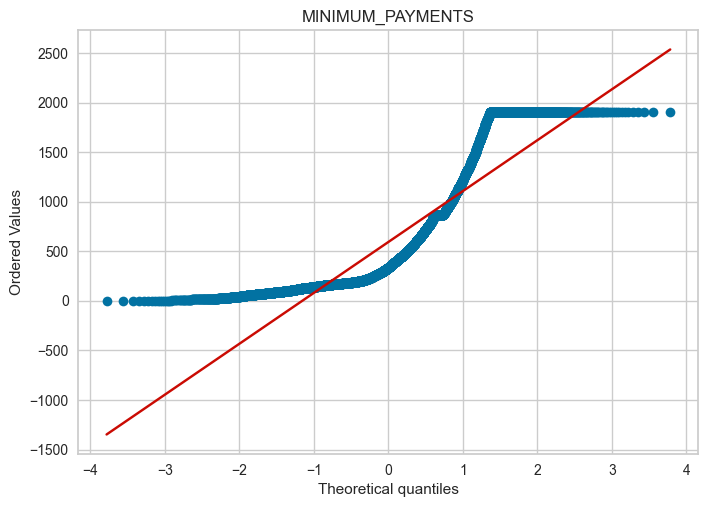

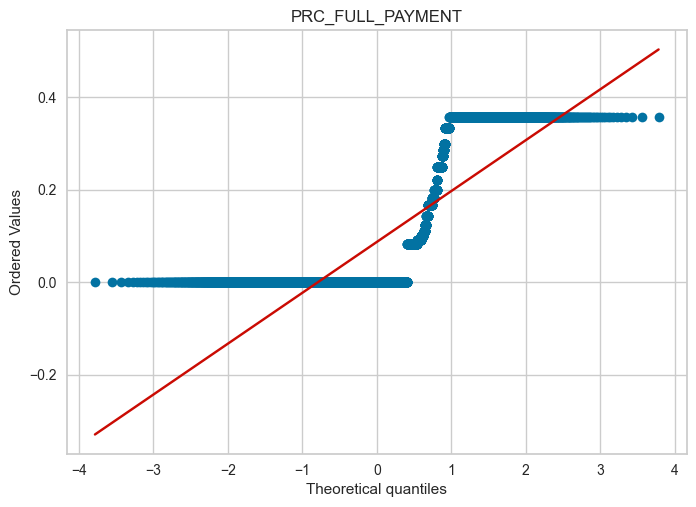

In [19]:
# We are using the dataset, which doesn't have any outliers
def draw_qq_plots(df, field):
    # create and show the plots
    stats.probplot(df[field], dist="norm", plot=plt)
    plt.title(field)
    plt.show()

# Draw q-q plots
for field in numerical_fields:
    draw_qq_plots(df3, field)

As you can see most of the Q-Q plot data are above the 45-degree line, which indicates that there is normal distribution in the dataset. Now, let’s check the histograms to see whether there are any skewed columns in the dataset.

#### Step 2 - Histograms
Histograms allow us to check the data distribution. And using them we can find out whether a dataset is right-skewed or left-skewed.
The following code is used to plot the histograms.

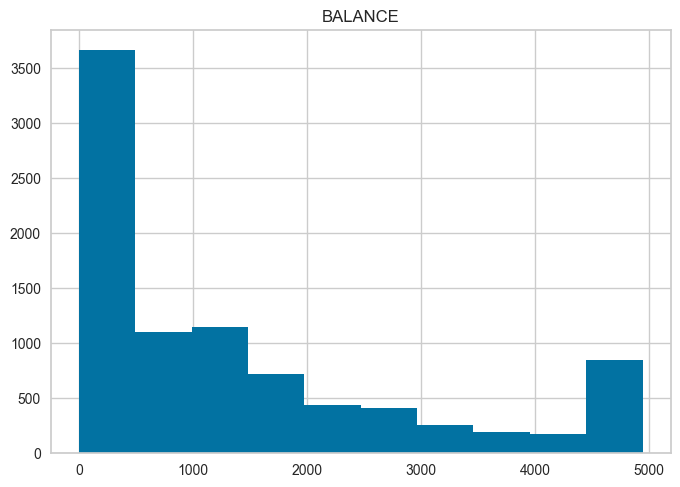

<Figure size 800x550 with 0 Axes>

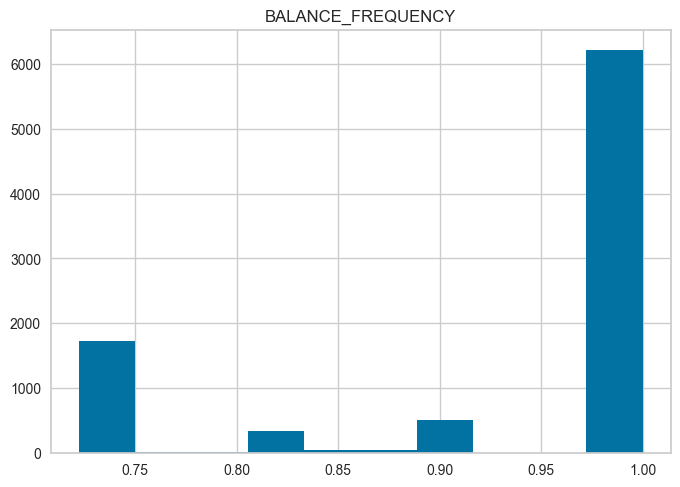

<Figure size 800x550 with 0 Axes>

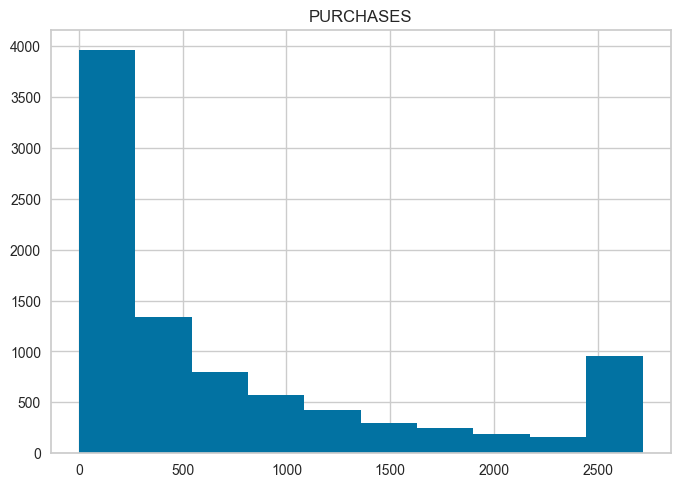

<Figure size 800x550 with 0 Axes>

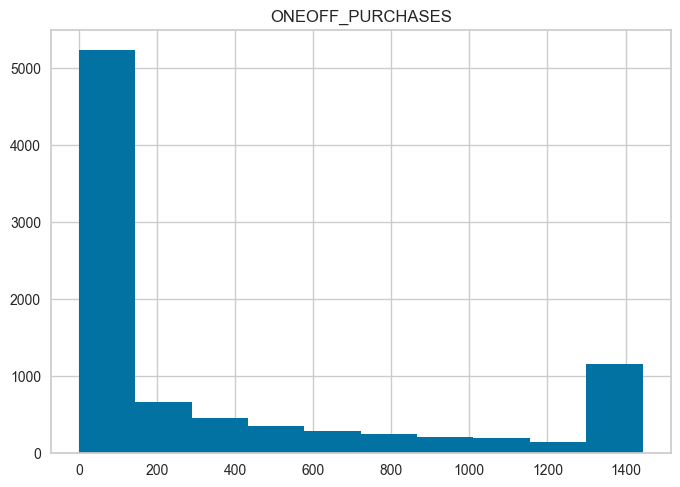

<Figure size 800x550 with 0 Axes>

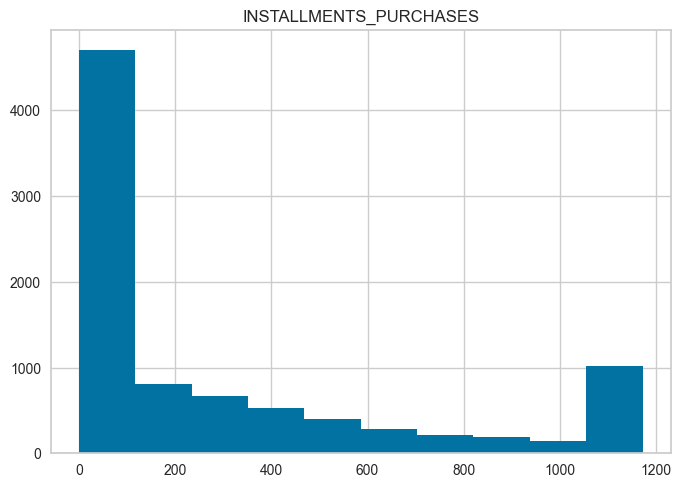

<Figure size 800x550 with 0 Axes>

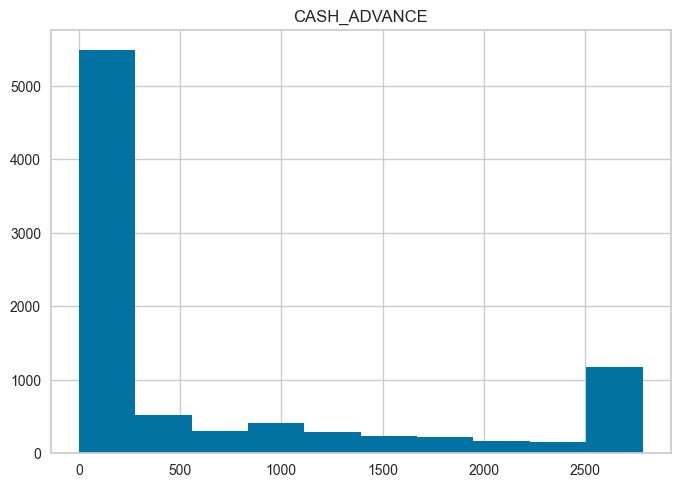

<Figure size 800x550 with 0 Axes>

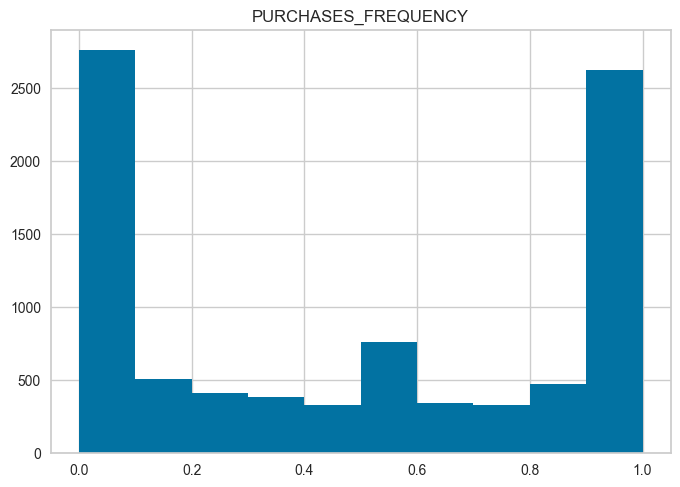

<Figure size 800x550 with 0 Axes>

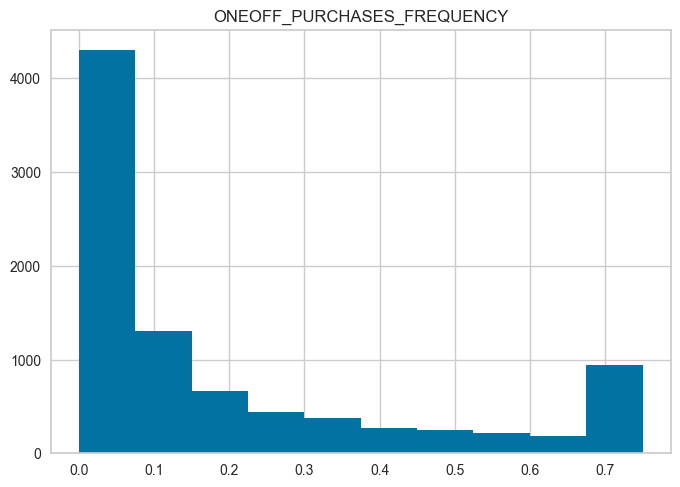

<Figure size 800x550 with 0 Axes>

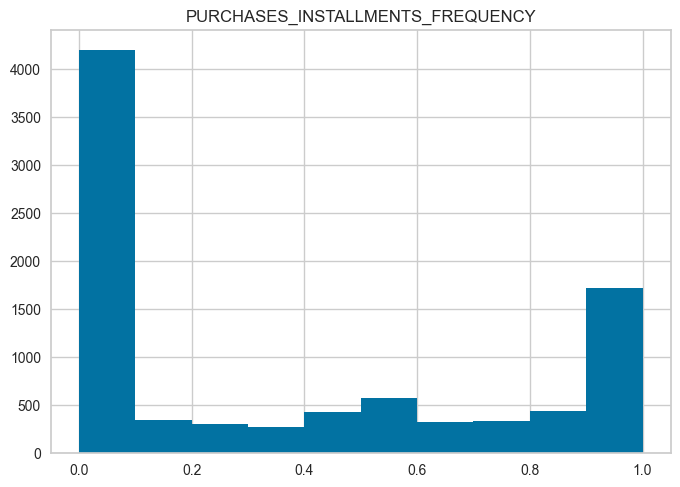

<Figure size 800x550 with 0 Axes>

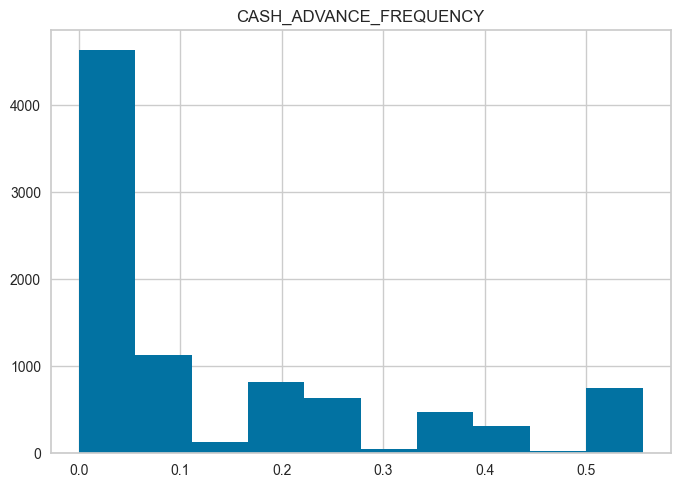

<Figure size 800x550 with 0 Axes>

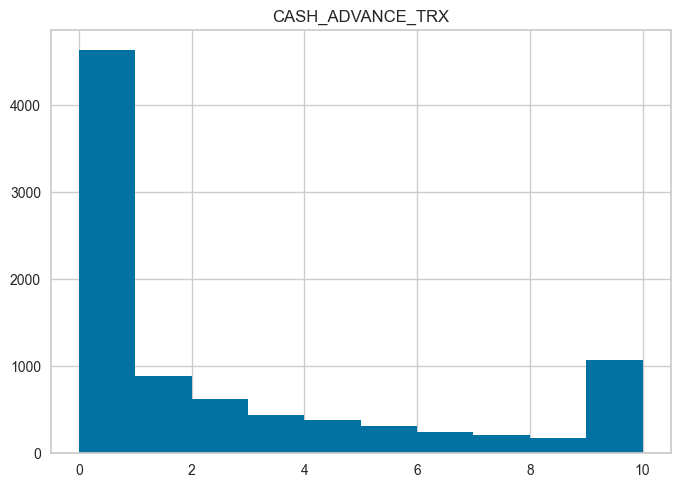

<Figure size 800x550 with 0 Axes>

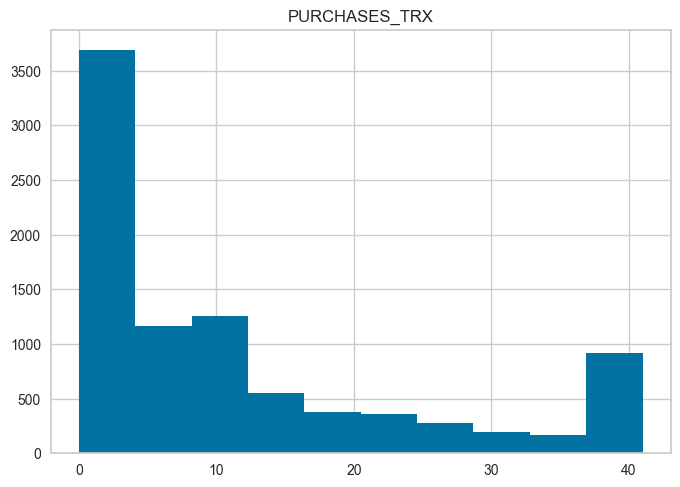

<Figure size 800x550 with 0 Axes>

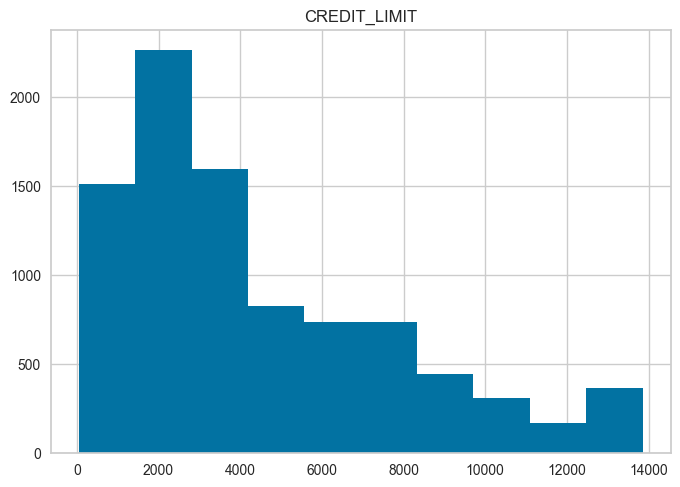

<Figure size 800x550 with 0 Axes>

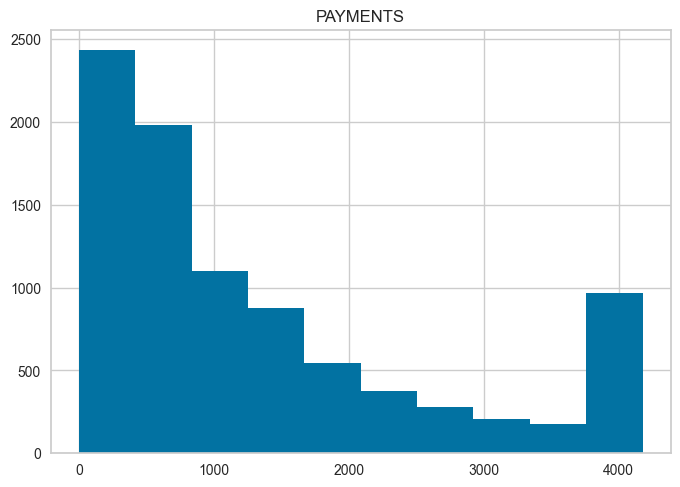

<Figure size 800x550 with 0 Axes>

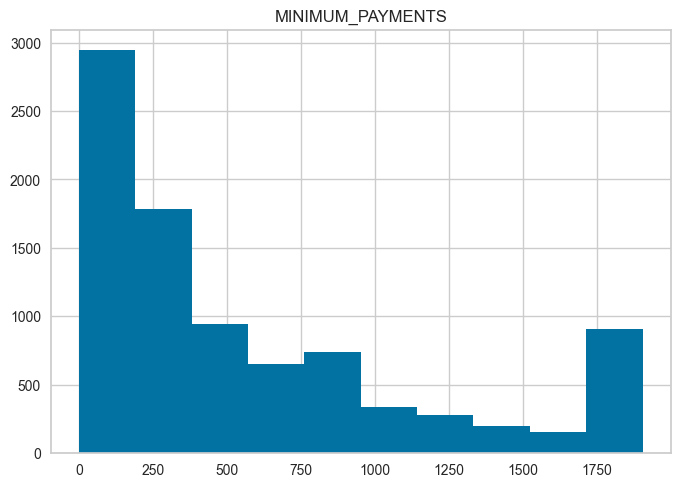

<Figure size 800x550 with 0 Axes>

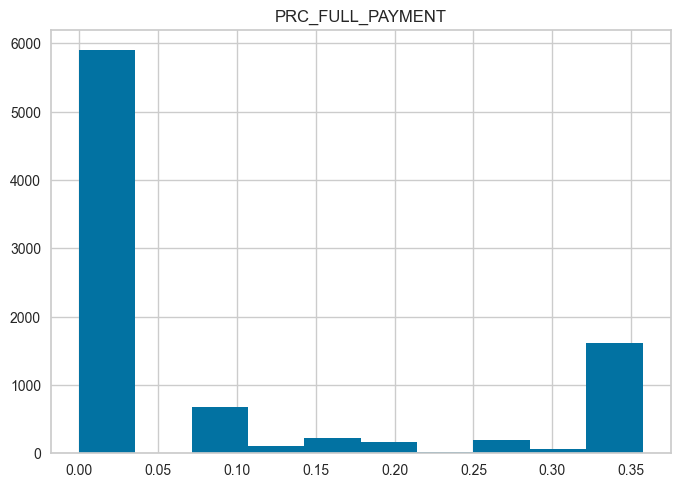

<Figure size 800x550 with 0 Axes>

In [20]:
# Generate histograms for the numerical fields
def draw_histograms(df, field):
    plt.hist(df[field], color='b')
    plt.title(field)
    plt.figure()
    plt.show()

# Draw histograms
for field in numerical_fields:
    draw_histograms(df3, field)

Since it is hard to understand whether there is a skew or not in the dataset, we can use the `histplot()` function in the `Yellowbrick` library. 

#### Step 3 - Histplots
The function to get histplots is shown below.

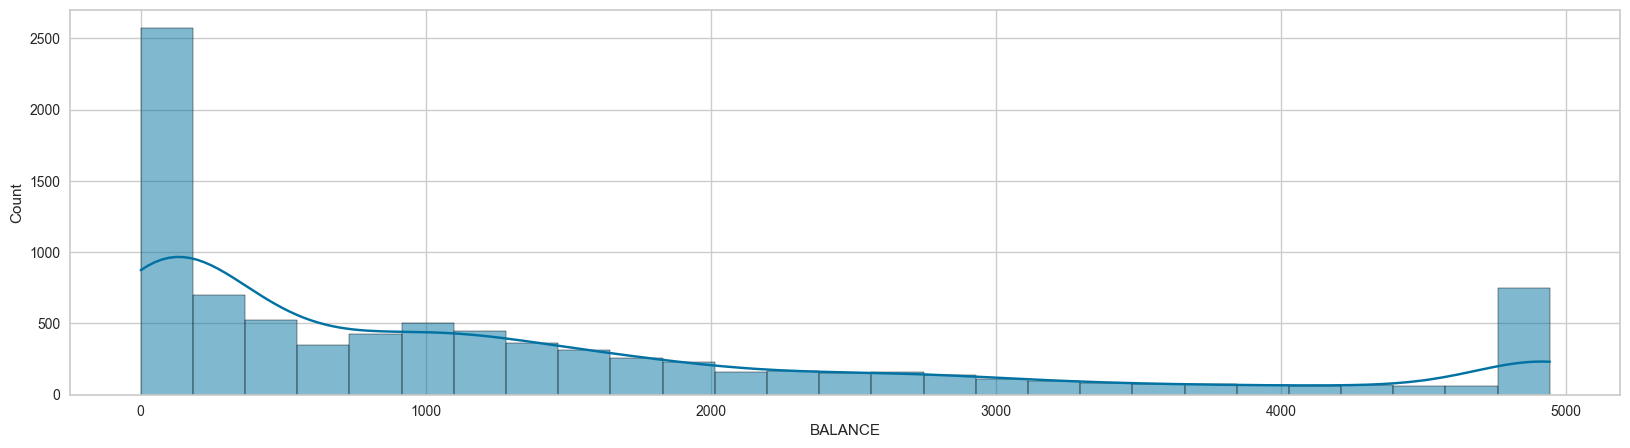

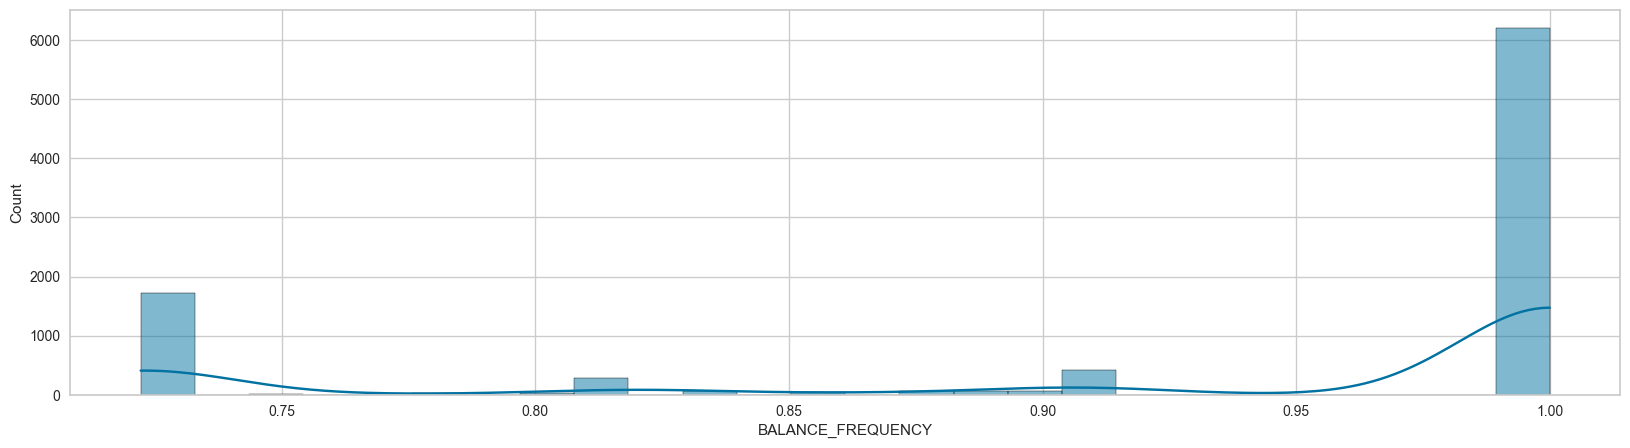

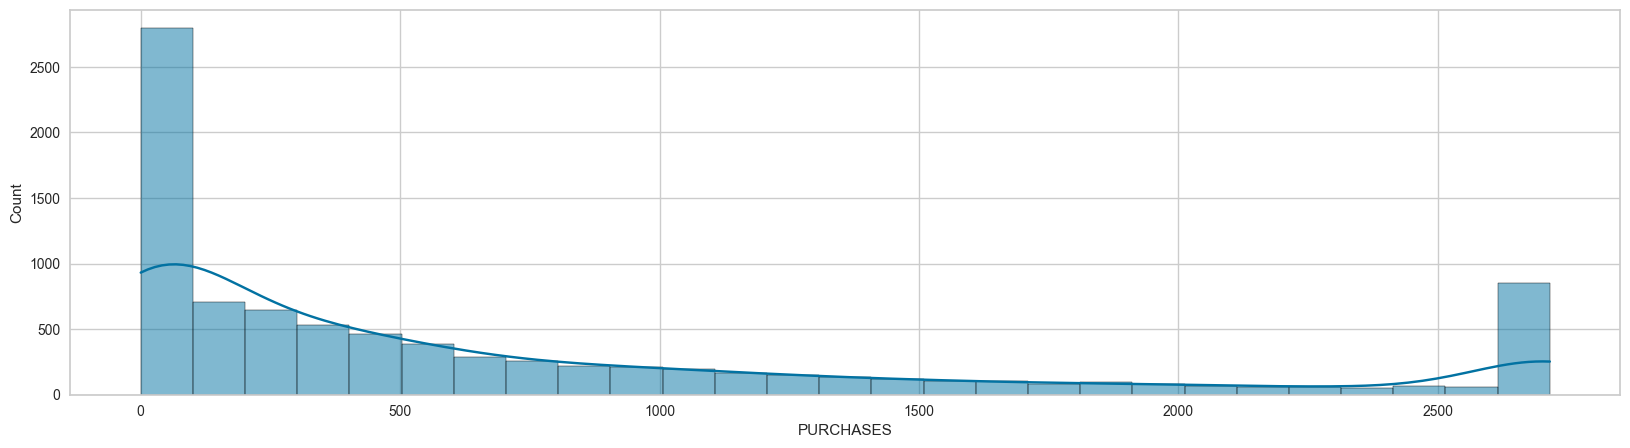

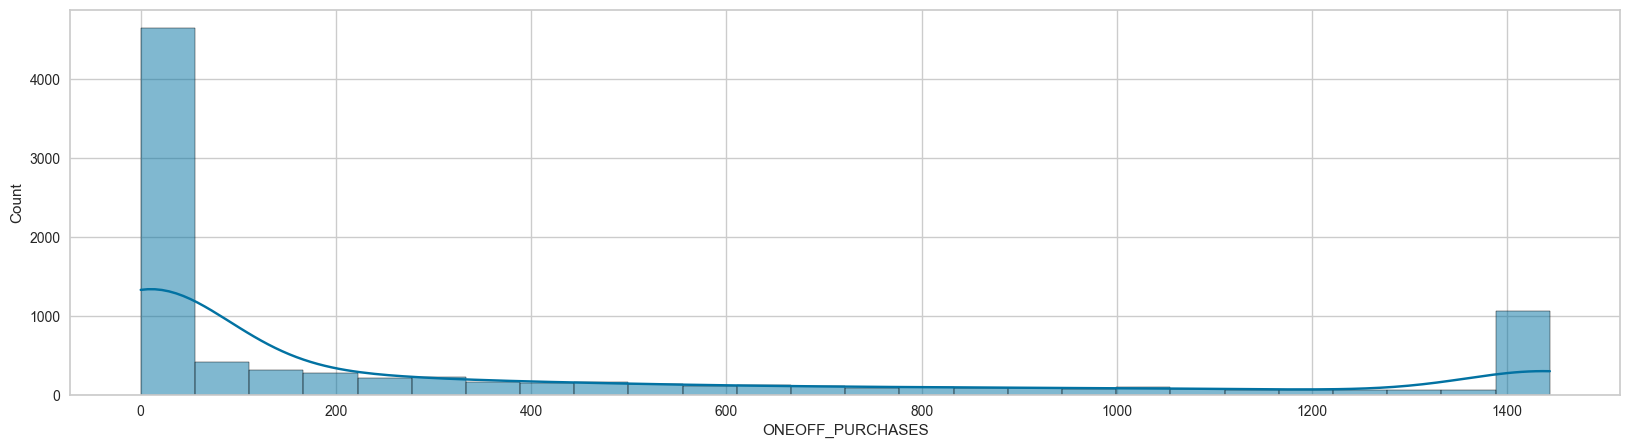

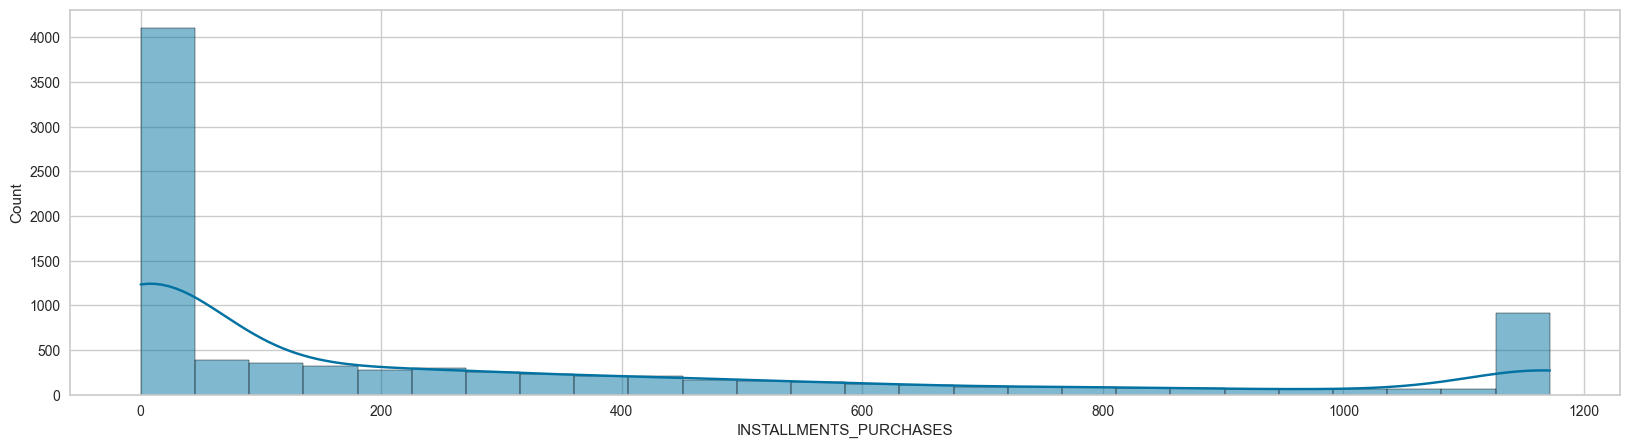

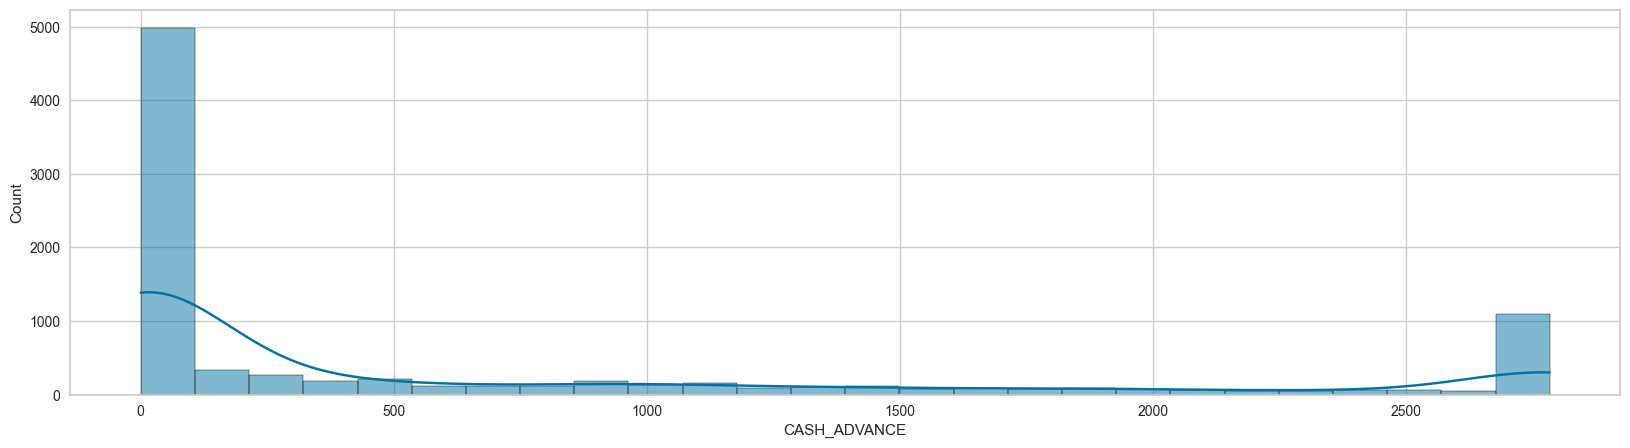

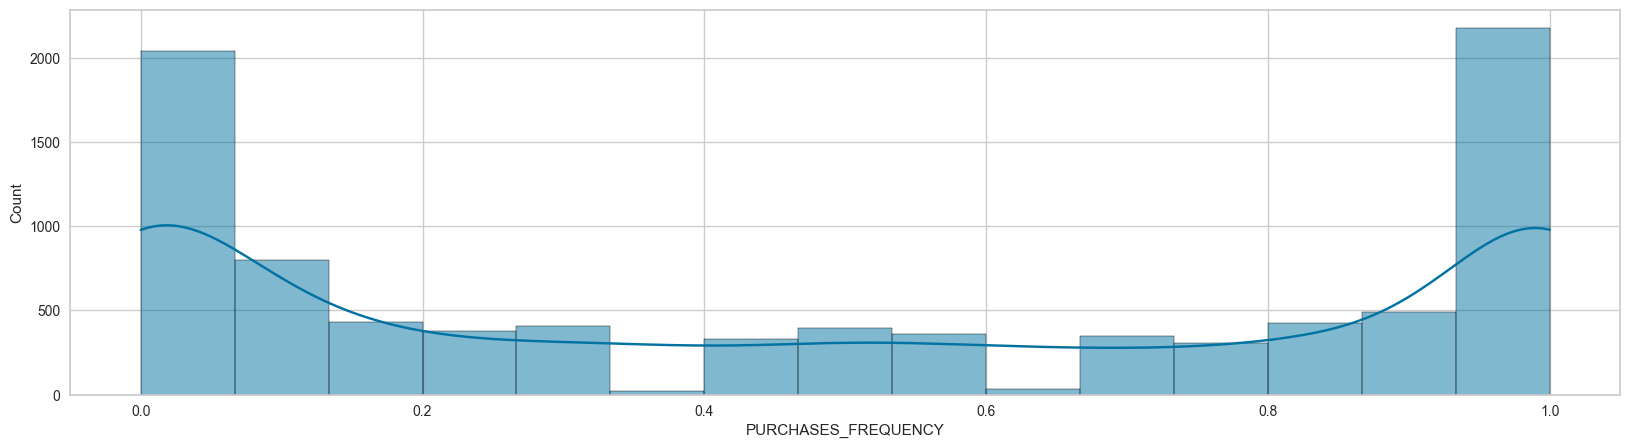

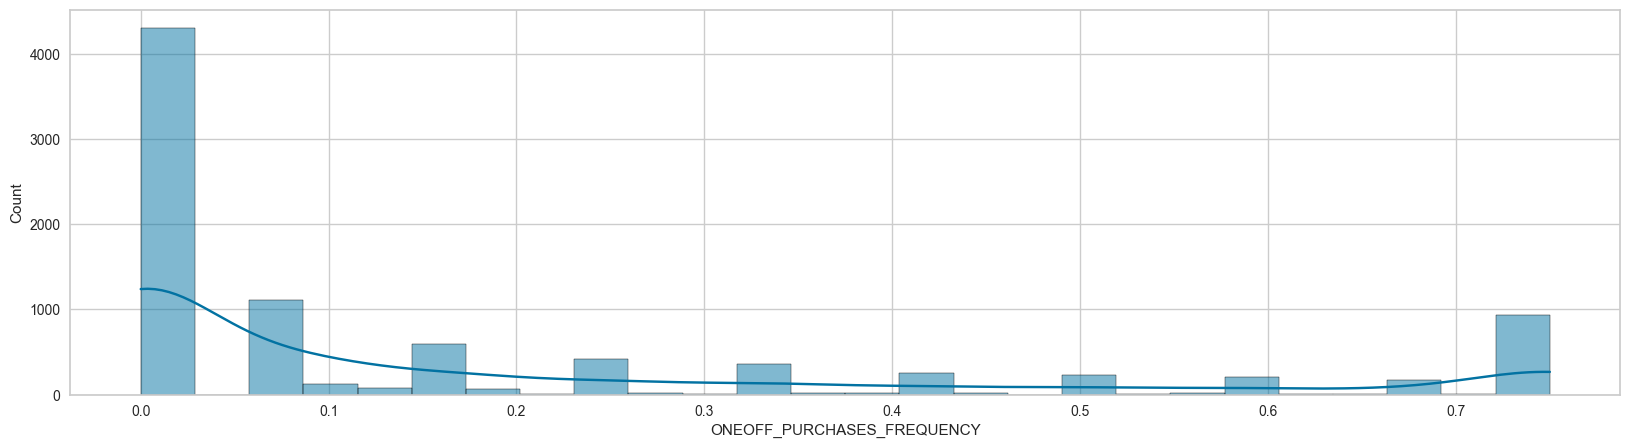

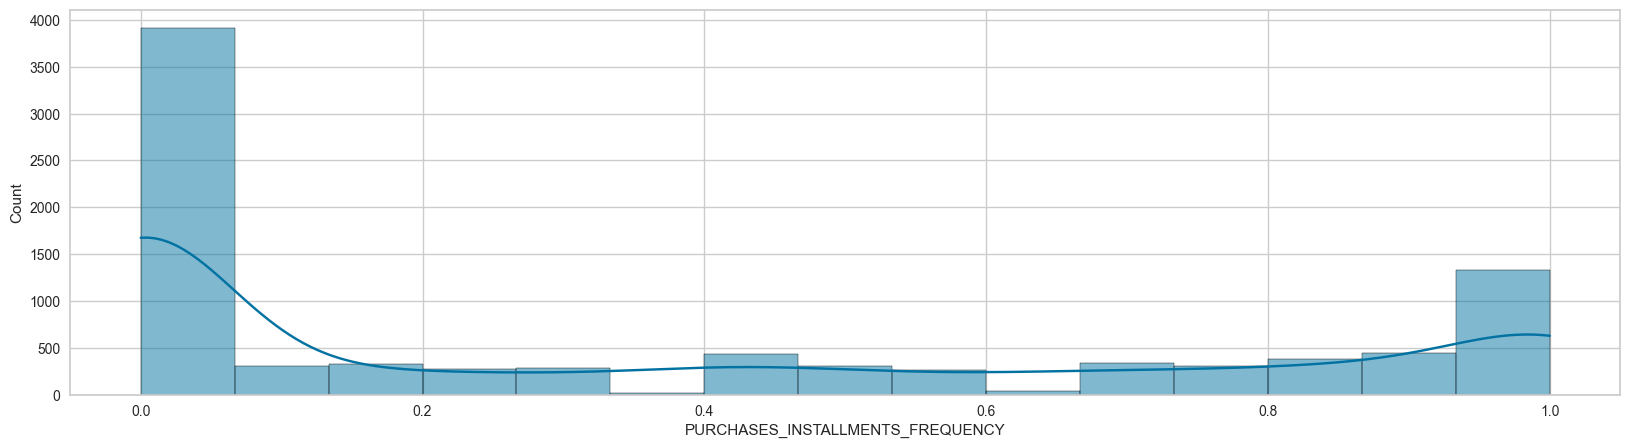

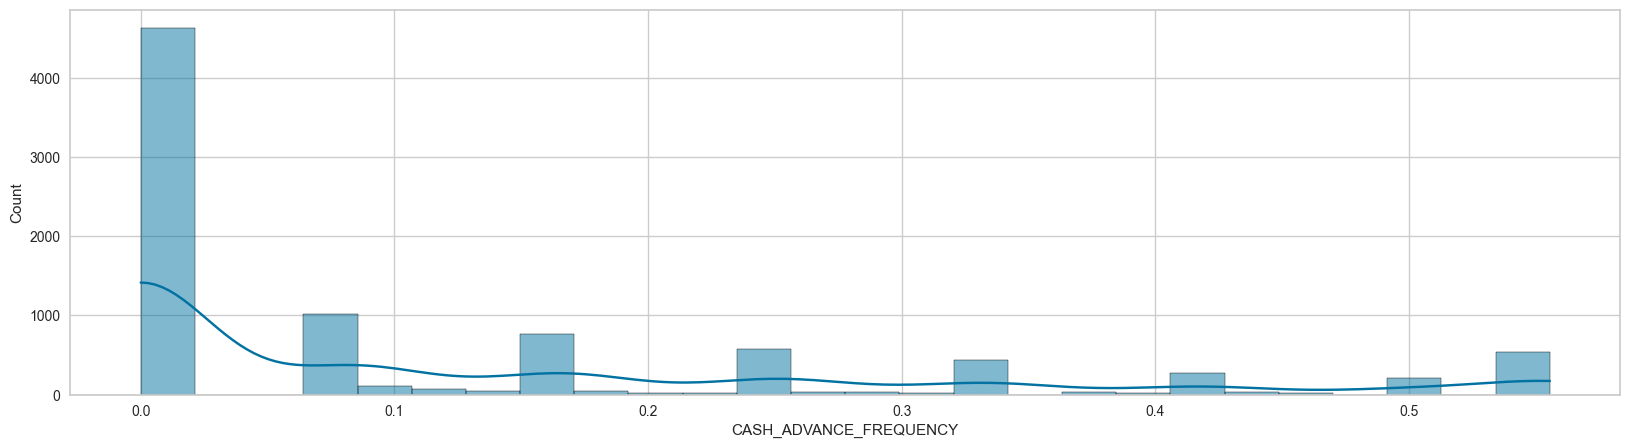

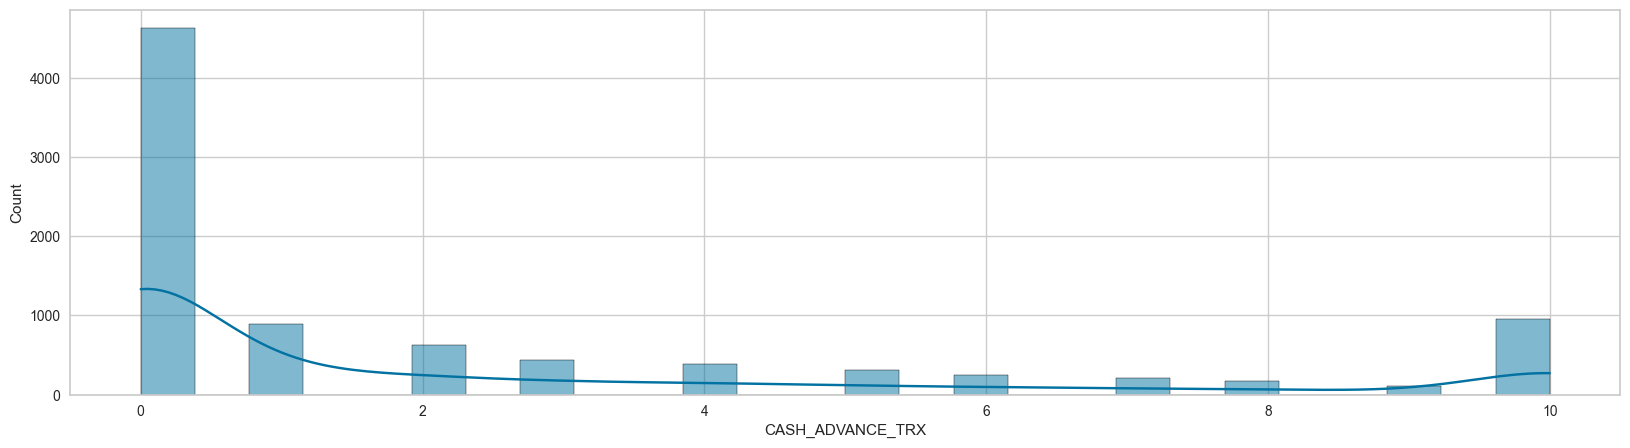

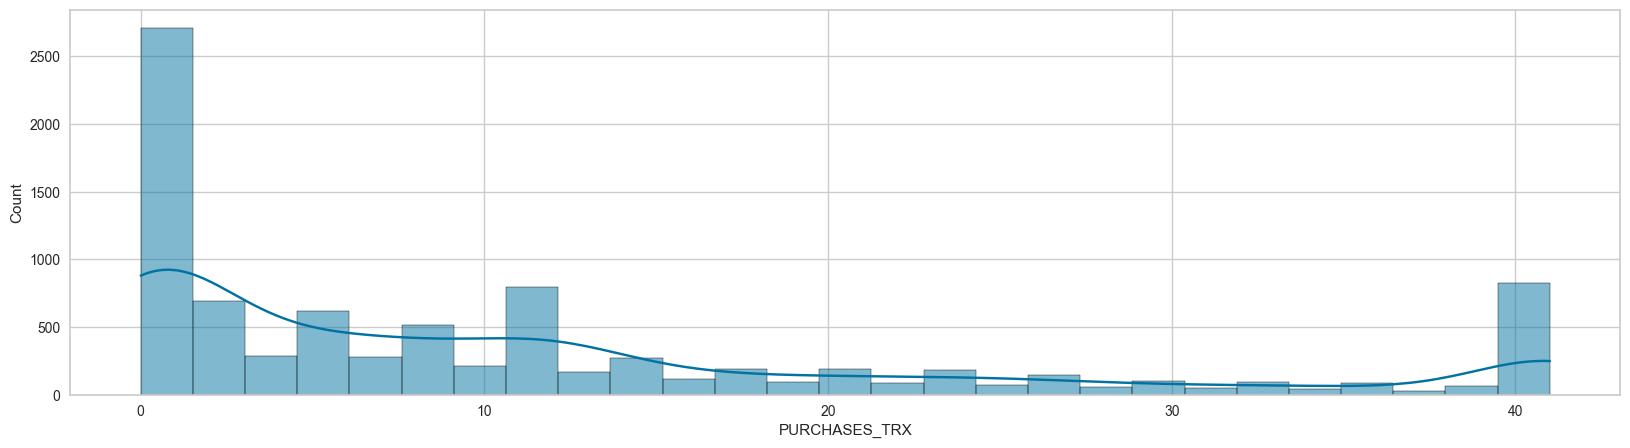

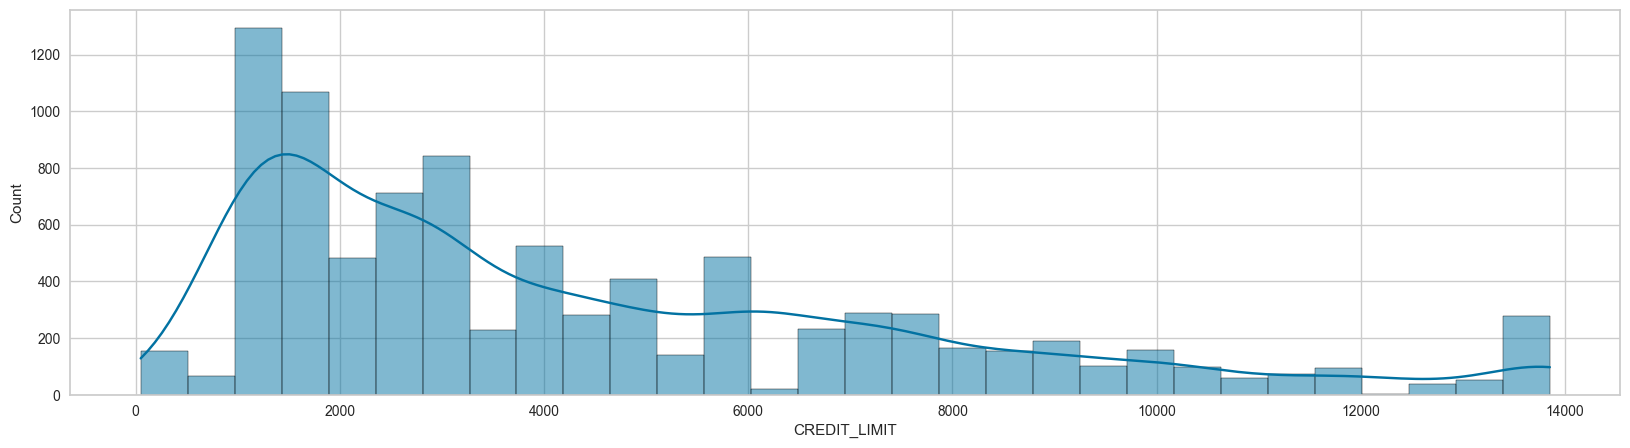

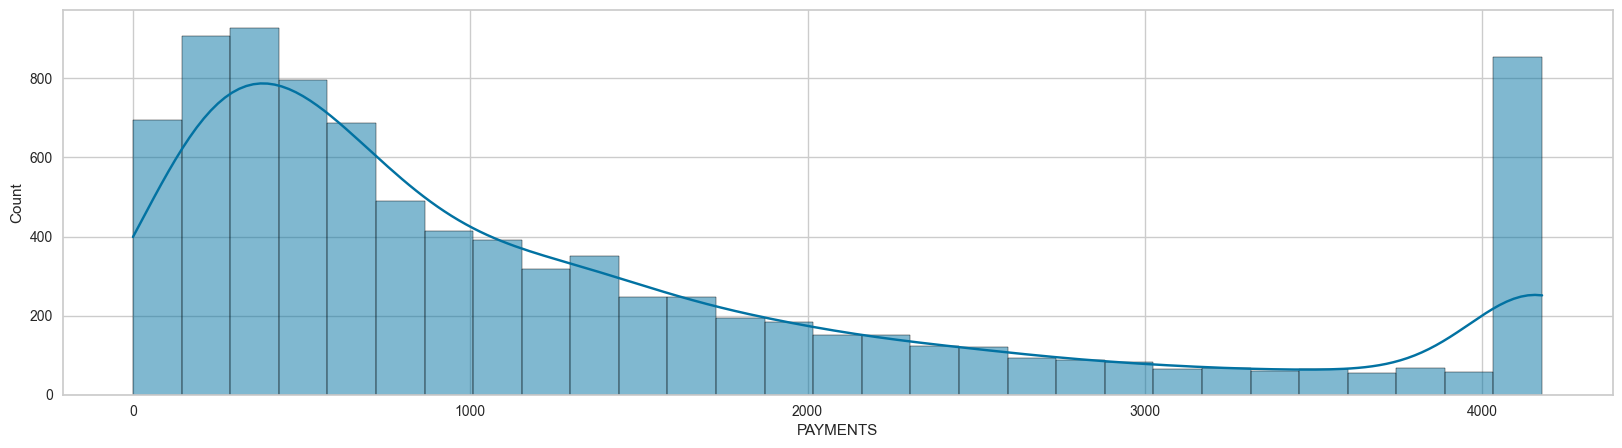

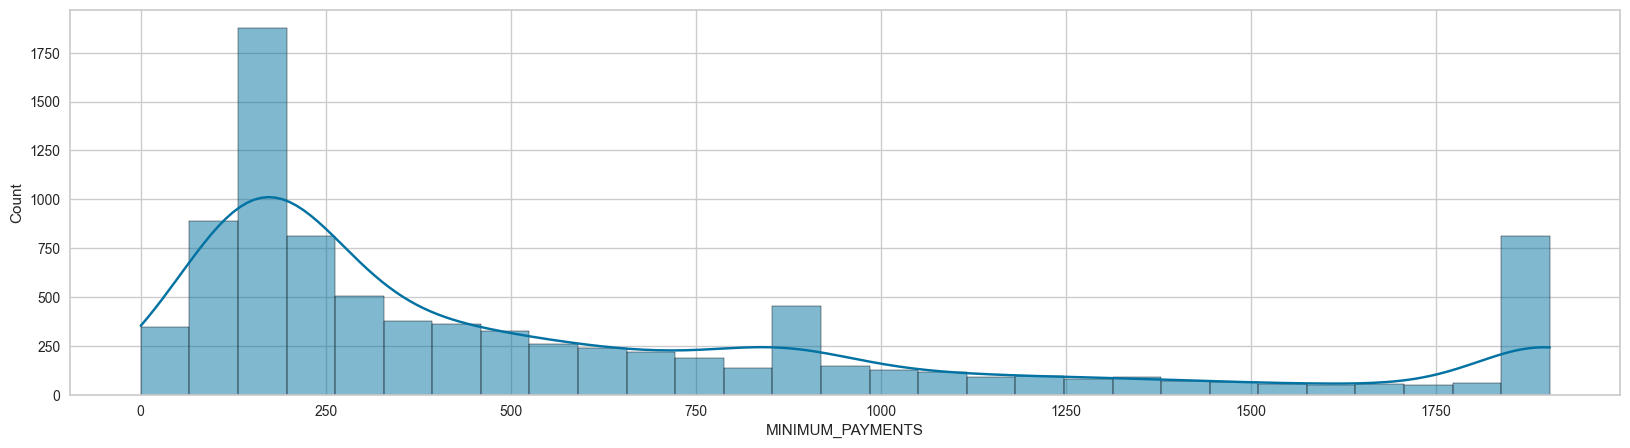

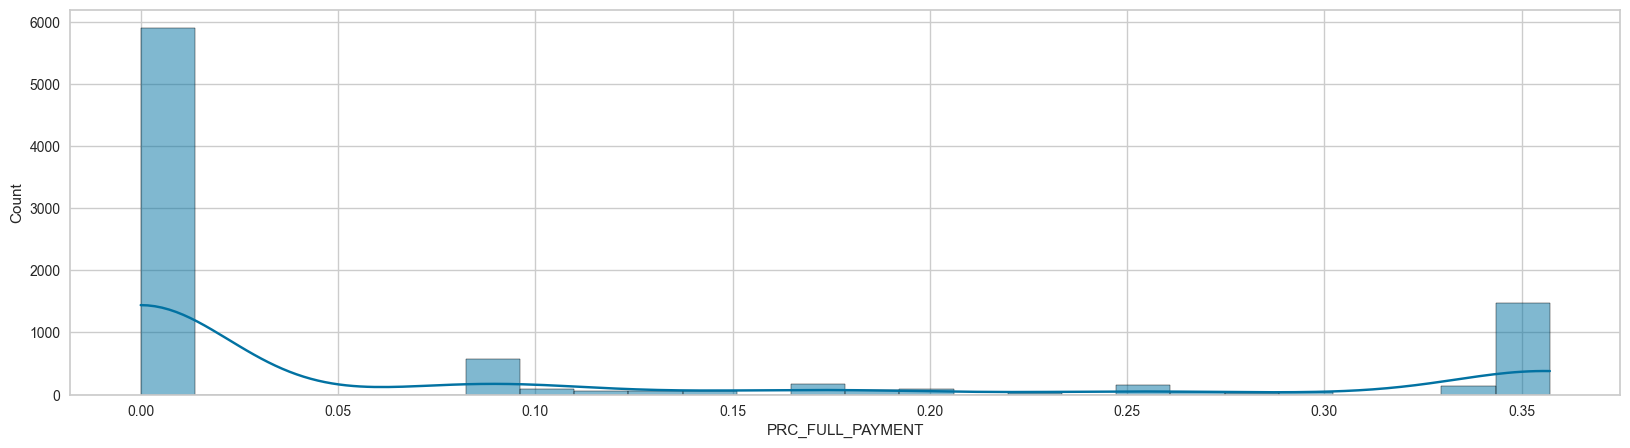

In [21]:
# Generate histplot to analyze more closely
def draw_histplots(df, field):
    plt.figure(figsize=(20,5))
    sns.histplot(df[field], kde=True)
    plt.show()

# Draw histplots
for field in numerical_fields:
    draw_histplots(df3, field)

#### Step 4 - Applying Transformations

From the graphs, we can see that the following columns are right-skewed.

- `BALANCE`
- `PURCHASES`
- `PURCHASES_TRX`
- `CREDIT_LIMIT`
- `PAYMENTS`
- `MINIMUM_PAYMENTS`

The following techniques are used to address the skewed data. 
1. Right Skewed Data →\
(a) Logarithmic Transformation\
(b) Square-root Transformation
3. Left Skewed Data →\
(a) Exponential Transformation
<span style='background-color: #FFADB0;'>The `Logarithmic Transformation` cannot be used with 0 and negative values.</span> Therefore, to address those values we can use the `Square-root Transformation` with a little tweak as shown below.

```python
FunctionTransformer(lambda x:np.sqrt(abs(x)), validate=True)
```

The following code explains how you can transform the necessary data.

In [22]:
# Columns identified via histograms
right_skewed = ['BALANCE', 'PURCHASES', 'PURCHASES_TRX', 'CREDIT_LIMIT','PAYMENTS', 'MINIMUM_PAYMENTS']

# Combine the right-skewed and left-skewed columns
additional_columns = [col for col in numerical_fields if col not in right_skewed]

In [23]:
# Copy the data frame
data = df3.copy()

# Create a function transformer object with square root transformation for right-skewed data
square_root_transformer = FunctionTransformer(lambda x:np.sqrt(abs(x)), validate=True)

# Apply the transformations
data_new1 = square_root_transformer.transform(data[right_skewed])

# Create a new data frame
df4 = pd.DataFrame(data_new1, columns=right_skewed)
df4.head()

BALANCE  PURCHASES  PURCHASES_TRX  CREDIT_LIMIT   PAYMENTS  \
0   6.395369   9.767292       1.414214     31.622777  14.205706   
1  56.590347   0.000000       0.000000     83.666003  64.054919   
2  49.951465  27.805935       3.464102     86.602540  24.941266   
3  40.824877  38.716921       1.000000     86.602540   0.000000   
4  28.595705   4.000000       1.000000     34.641016  26.044861   

   MINIMUM_PAYMENTS  
0         11.811426  
1         32.746606  
2         25.045654  
3         29.397390  
4         15.645806

#### Step 5 - Verifying

Let’s check the Q-Q plots again to see if the transformation applied properly for the transformed columns.

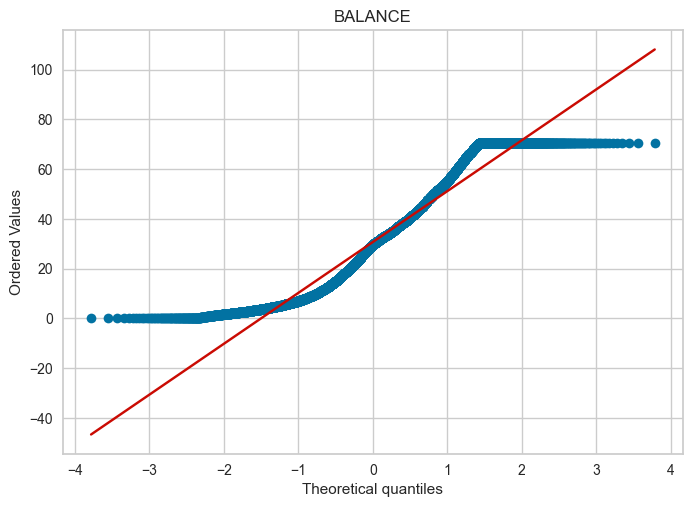

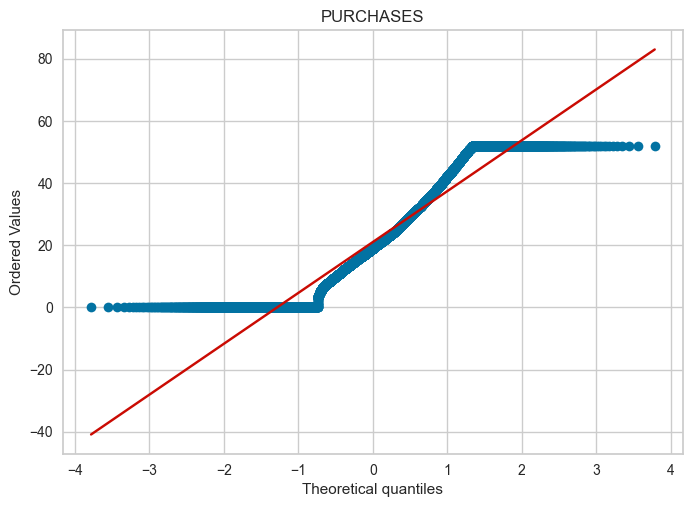

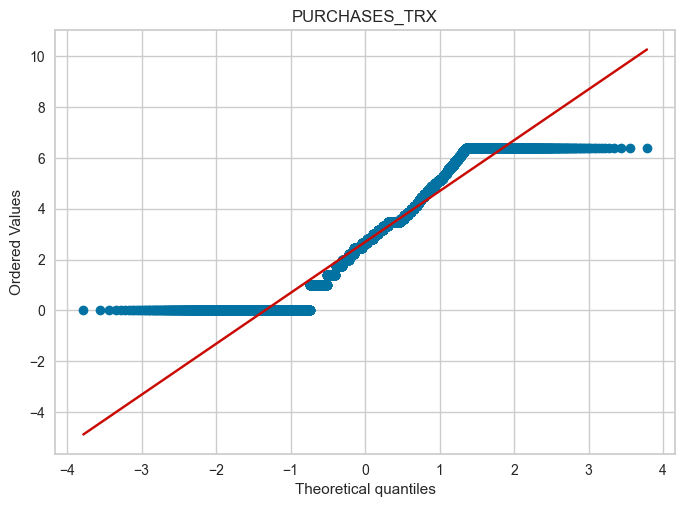

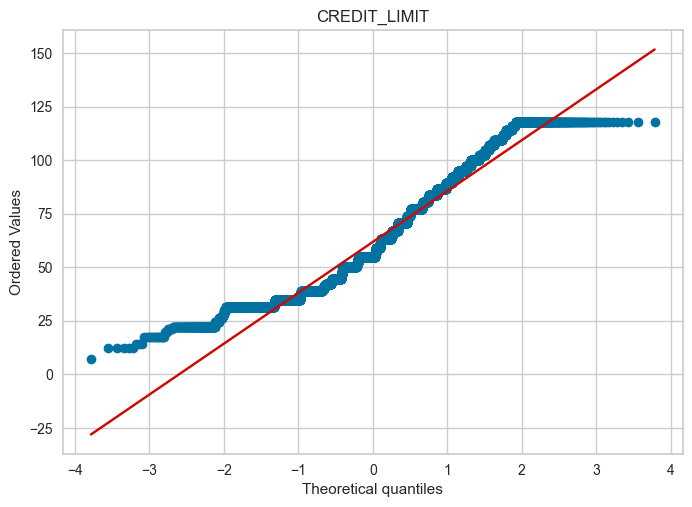

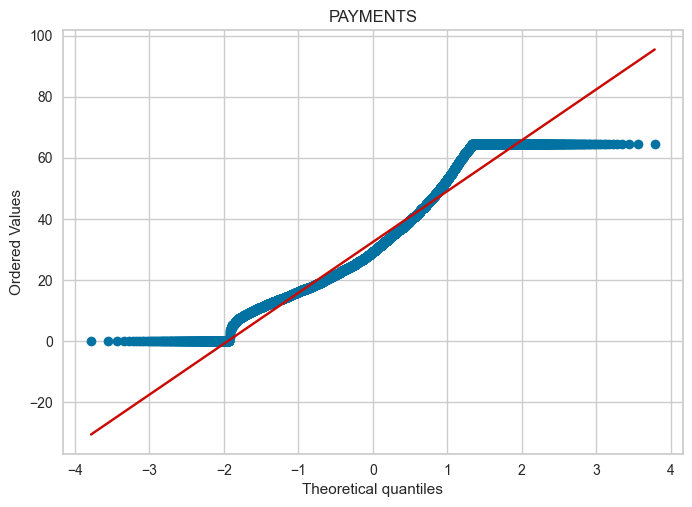

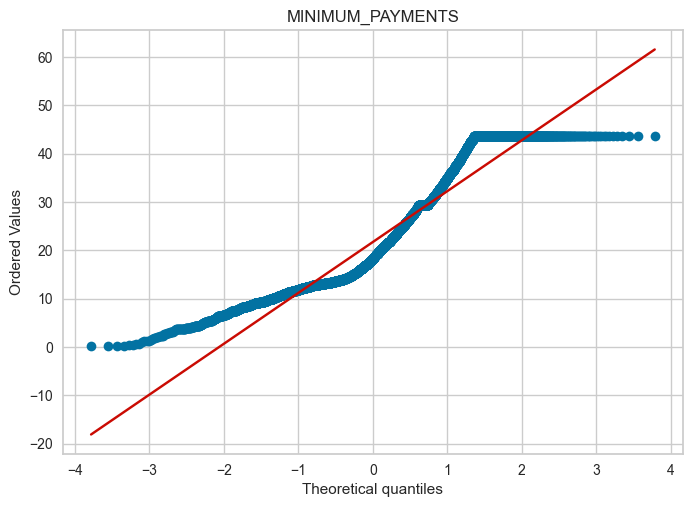

In [24]:
# Check the q-q plots for the transformed values
for field in right_skewed:
    draw_qq_plots(df4, field)

Similarly, let’s check the Histograms to see if the transformation applied properly for the transformed columns.

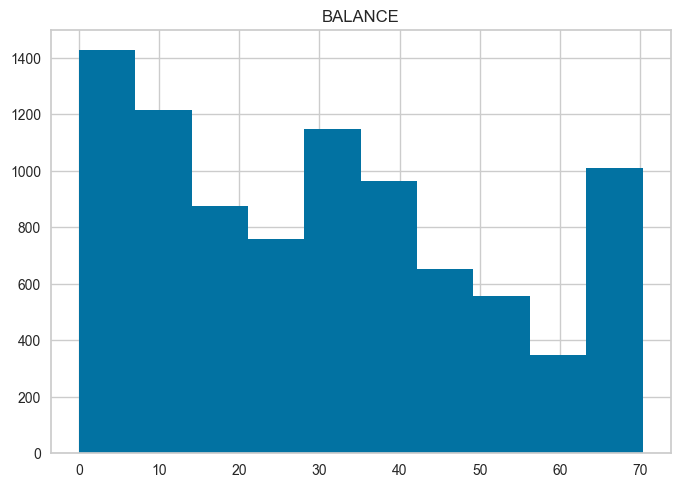

<Figure size 800x550 with 0 Axes>

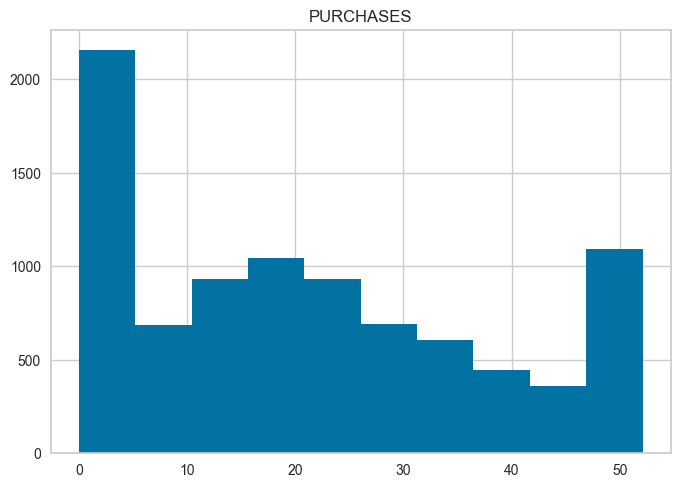

<Figure size 800x550 with 0 Axes>

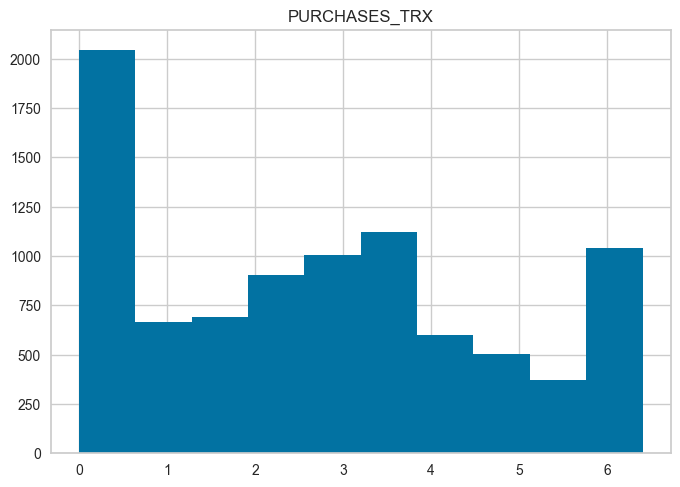

<Figure size 800x550 with 0 Axes>

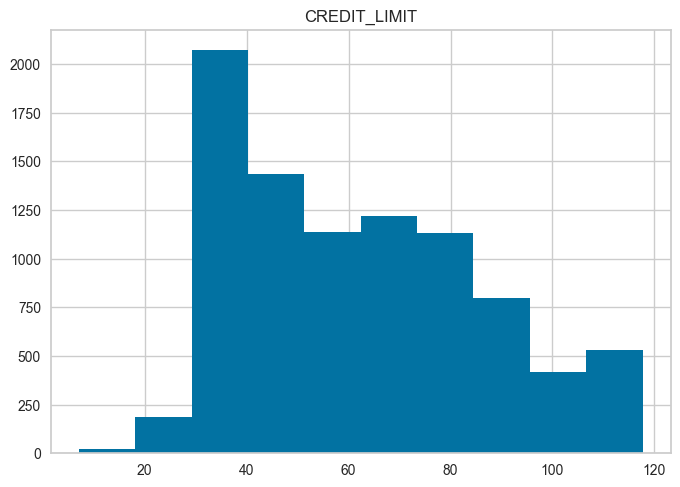

<Figure size 800x550 with 0 Axes>

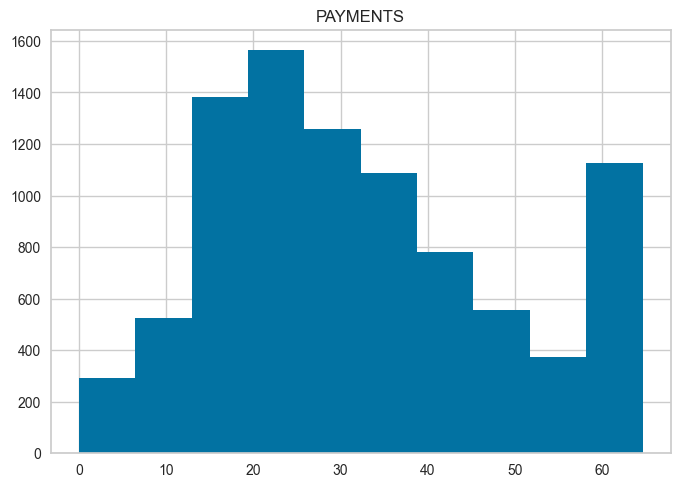

<Figure size 800x550 with 0 Axes>

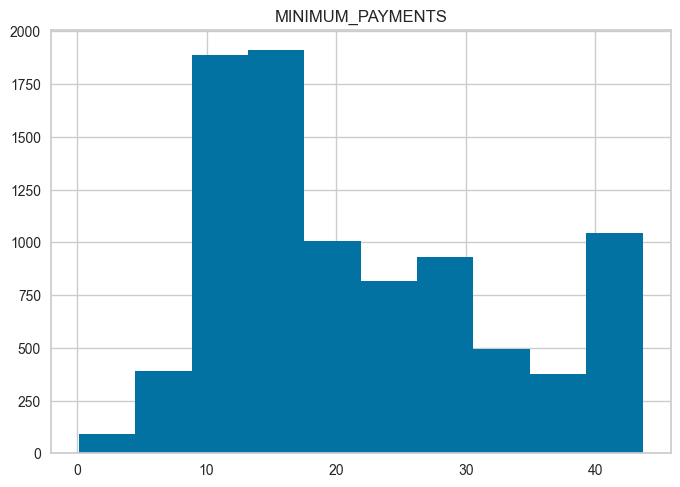

<Figure size 800x550 with 0 Axes>

In [25]:
# Check the histograms for the transformed values
for field in right_skewed:
    draw_histograms(df4, field)

Similarly, let’s check the Histplots to see if the transformation applied properly for the transformed columns.

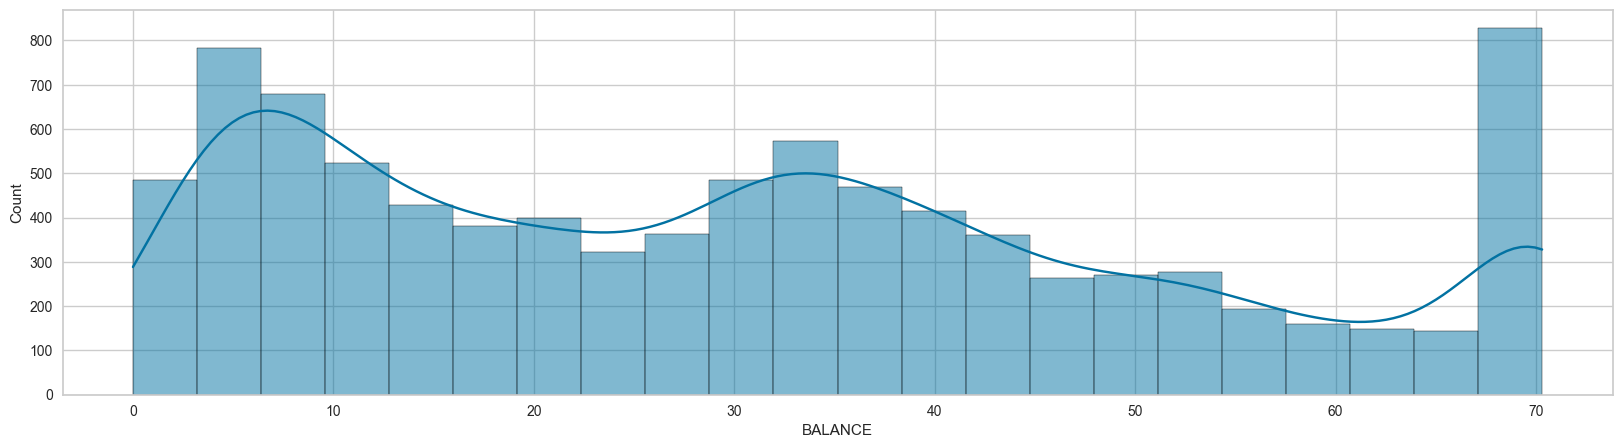

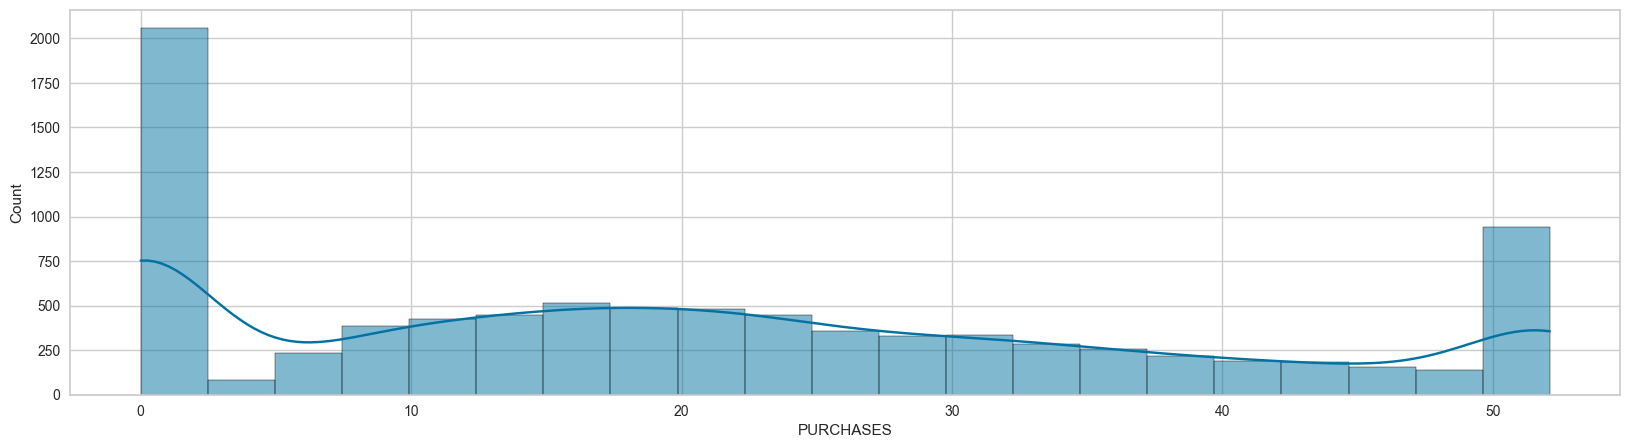

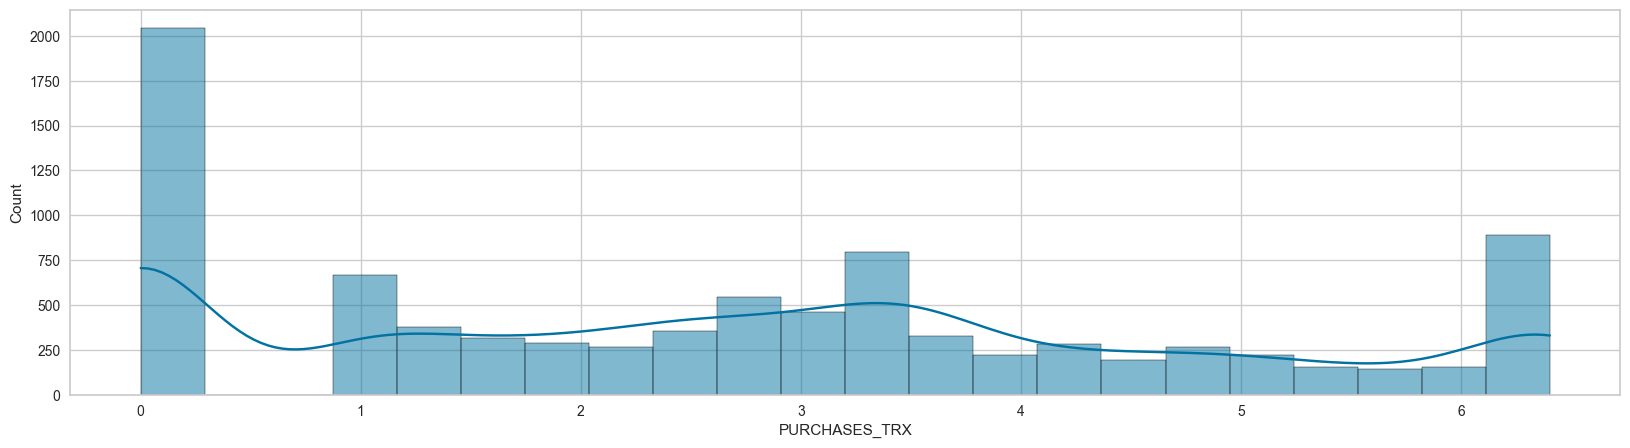

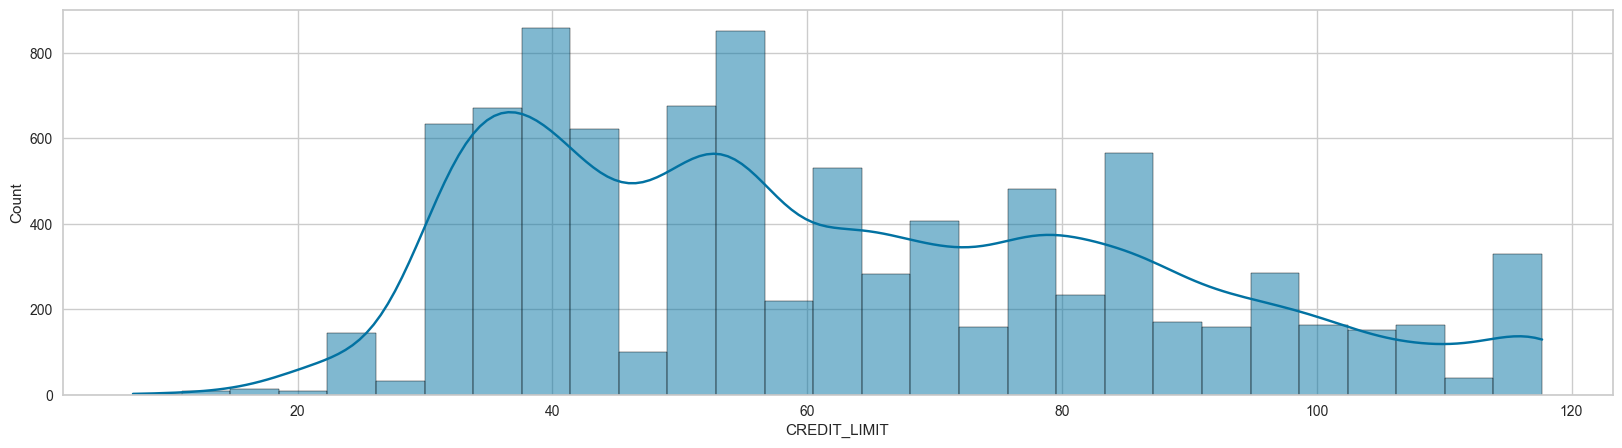

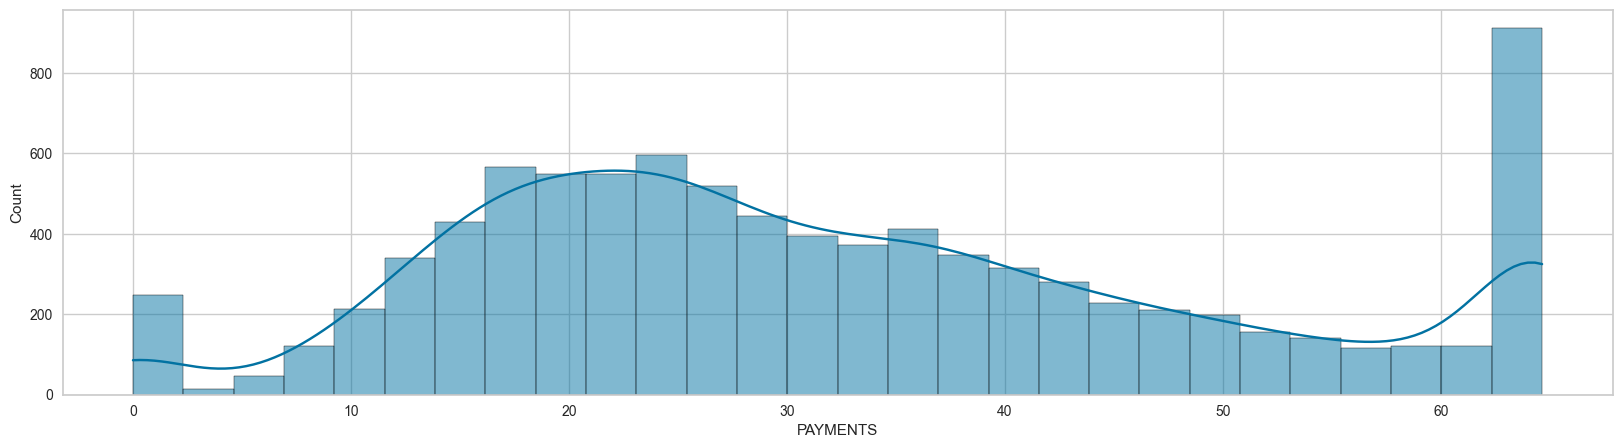

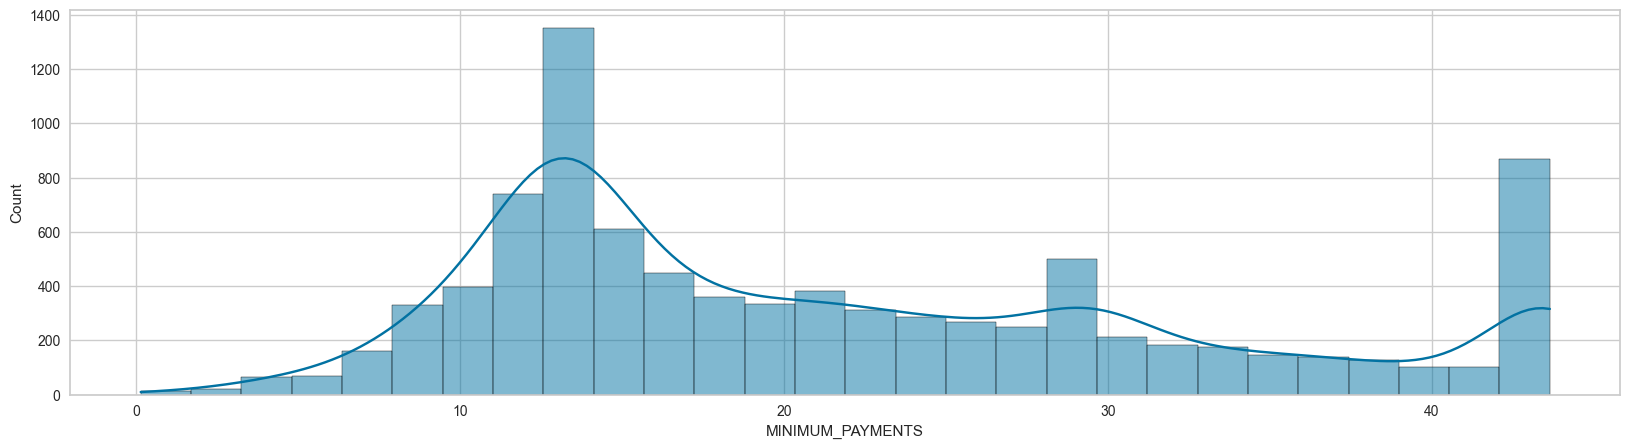

In [26]:
# Check histplots for the transformed values
for field in right_skewed:
    draw_histplots(df4, field)

Append the non-transformed columns back to the data frame again.

In [27]:
# Get additional data as a data frame
additional_data = df3[additional_columns]

# Get 'TENURE' data as a data frame
tenure_data = df3['TENURE']
tenure_data = tenure_data.to_frame()

# Concatenate the data frames together
df5 = pd.concat([df4, additional_data, tenure_data], join='outer', axis=1).reset_index(drop=True)

# Check whether the concatenation is done properly
df5.head()

BALANCE  PURCHASES  PURCHASES_TRX  CREDIT_LIMIT   PAYMENTS  \
0   6.395369   9.767292       1.414214     31.622777  14.205706   
1  56.590347   0.000000       0.000000     83.666003  64.054919   
2  49.951465  27.805935       3.464102     86.602540  24.941266   
3  40.824877  38.716921       1.000000     86.602540   0.000000   
4  28.595705   4.000000       1.000000     34.641016  26.044861   

   MINIMUM_PAYMENTS  BALANCE_FREQUENCY  ONEOFF_PURCHASES  \
0         11.811426           0.818182            0.0000   
1         32.746606           0.909091            0.0000   
2         25.045654           1.000000          773.1700   
3         29.397390           0.722223         1443.5125   
4         15.645806           1.000000           16.0000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   2784.552848             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    0.750000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PRC_FULL_PAYMENT  TENURE  
0                0.000000               0.0          0.000000      12  
1                0.250000               4.0          0.222222      12  
2                0.000000               0.0          0.000000      12  
3                0.083333               1.0          0.000000      12  
4                0.000000               0.0          0.000000      12

Check the data frame information as well.

In [28]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   PURCHASES                         8950 non-null   float64
 2   PURCHASES_TRX                     8950 non-null   float64
 3   CREDIT_LIMIT                      8950 non-null   float64
 4   PAYMENTS                          8950 non-null   float64
 5   MINIMUM_PAYMENTS                  8950 non-null   float64
 6   BALANCE_FREQUENCY                 8950 non-null   float64
 7   ONEOFF_PURCHASES                  8950 non-null   float64
 8   INSTALLMENTS_PURCHASES            8950 non-null   float64
 9   CASH_ADVANCE                      8950 non-null   float64
 10  PURCHASES_FREQUENCY               8950 non-null   float64
 11  ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 12  PURCHA

### 1.2.3 Applying Suitable Feature Encoding Techniques
Since our data frame contains only <span style='background-color: #FFFF6E;'>numerical values(according to `df.info()` function)</span>, we do not need to do feature encodings.

### 1.2.4 Scale/Standardize Data

Feature Scaling, also known as data normalization, is a technique used to standardize the range of independent variables of features of data. There are a few ways to scale or standardize data.

- Min/Max Scaling(Normalization) → Rescales features to a range between 0 and 1. 
$$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$$
- Standardization(Z-score Normalization) → Centers the data around 0 with a standard deviation of 1.
$$X_{std} = \frac{X - mean(X)}{std(X)}$$
- Robust Scaling → Similar to standardization but uses the median and the inter-quartile range.
$$X_{robust} = \frac{X - median(X)}{Q_3(X) - Q_1(X)}$$

In this case, we are using the `Standard Scaling` to center the data around 0 with a standard deviation of 1, since it <span style='background-color: #FFFF6E;'>helps more in the clustering process</span>. The code snippet used to scale the data is shown below.

In [29]:
# Create the scaler object
scaler = StandardScaler()

# Copy the data frame
df_scaled = df5.copy()
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled[df_scaled.columns])

# Check the data
df_scaled.head()

BALANCE  PURCHASES  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
0 -1.151173  -0.660913      -0.615419     -1.239281 -1.071948   
1  1.224025  -1.231647      -1.293663      0.894879  1.849656   
2  0.909877   0.393144       0.367690      1.015299 -0.442750   
3  0.478012   1.030708      -0.814072      1.015299 -1.904528   
4 -0.100666  -0.997914      -0.814072     -1.115511 -0.378069   

   MINIMUM_PAYMENTS  BALANCE_FREQUENCY  ONEOFF_PURCHASES  \
0         -0.899715          -1.021875         -0.692383   
1          0.999354          -0.202708         -0.692383   
2          0.300786           0.616459          0.818320   
3          0.695540          -1.886552          2.128108   
4         -0.551892           0.616459         -0.661121   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.505216     -0.673507            -0.806490   
1               -0.746029      2.115343            -1.221758   
2               -0.746029     -0.673507             1.269843   
3               -0.746029     -0.467401            -1.014125   
4               -0.746029     -0.673507            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.722749                         -0.707313   
1                   -0.722749                         -0.916995   
2                    2.210909                         -0.916995   
3                   -0.396788                         -0.916995   
4                   -0.396788                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PRC_FULL_PAYMENT   TENURE  
0               -0.730084         -0.697293         -0.629277  0.36068  
1                0.717792          0.473089          0.973961  0.36068  
2               -0.730084         -0.697293         -0.629277  0.36068  
3               -0.247460         -0.404697         -0.629277  0.36068  
4               -0.730084         -0.697293         -0.629277  0.36068

The graphs of before and after scaling the data are shown below.

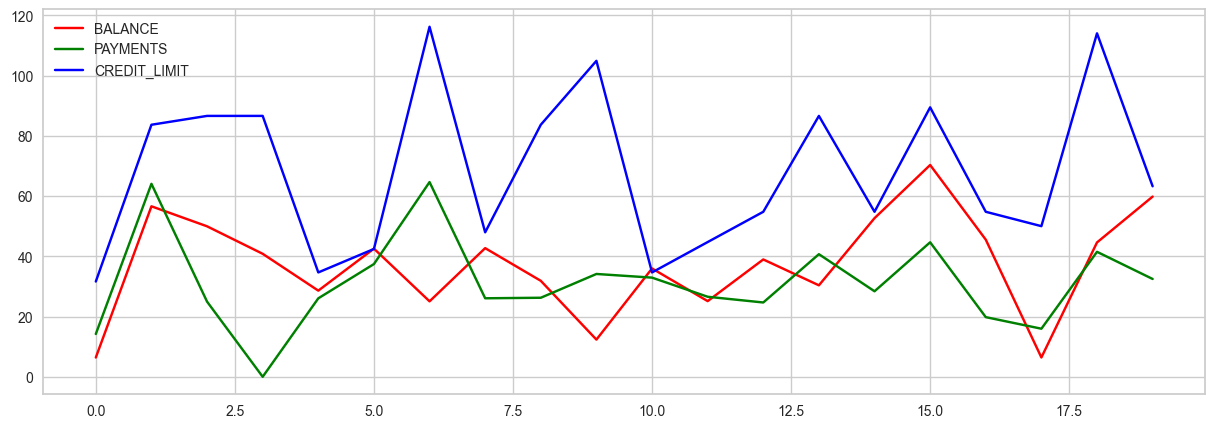

In [30]:
# Visualizing the before and after scaling graphs for features.
# Before
plt.figure(figsize=(15,5))
plt.plot(df5.BALANCE[:20], color='red', label='BALANCE')
plt.plot(df5.PAYMENTS[:20], color='green', label='PAYMENTS')
plt.plot(df5.CREDIT_LIMIT[:20], color='blue', label='CREDIT_LIMIT')
plt.legend(loc='best')
plt.show()

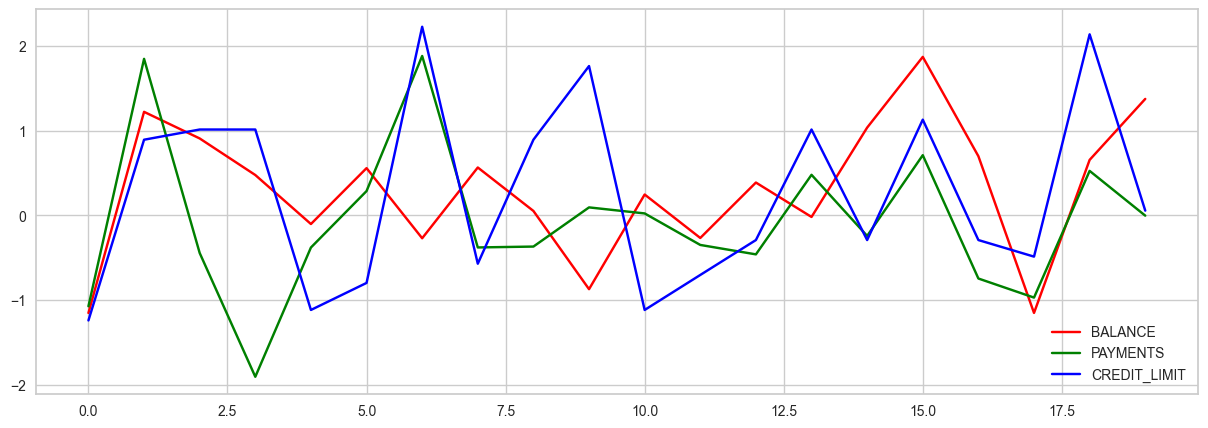

In [31]:
# After
plt.figure(figsize=(15,5))
plt.plot(df_scaled.BALANCE[:20], color='red', label='BALANCE')
plt.plot(df_scaled.PAYMENTS[:20], color='green', label='PAYMENTS')
plt.plot(df_scaled.CREDIT_LIMIT[:20], color='blue', label='CREDIT_LIMIT')
plt.legend(loc='best')
plt.show()

### 1.2.5 Data Discretization
Feature discretization, also known as binning or discretization, is the process of transforming continuous numerical features into discrete intervals or bins. This helps to handle continuous data more effectively, simplify models, and improve their interpretability. In the clustering process, <span style='background-color: #FFFF6E;'>this allows us to create better clusters since clusters are created around centroids</span>.
- Equal-Width Binning(Fixed Width) → Divides the range of values into equally sized bins.
- Equal-Frequency Binning(Fixed Frequency) → Divides the data into bins with approximately the same number of data points in each bin.
- Custom Binning → Bins are defined based on domain knowledge or specific requirements.
- Quantile Binning → Bins are created based on quantiles of the data.
- Cluster-Based Binning → Uses clustering algorithms to group similar data points into
bins.
In our case, we will be using `KBinsDiscretizer` for data discretization.

In [32]:
# Copy the data frame
df_scaled_discretization = df_scaled.copy()

# Create KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
df_scaled_discretization[df_scaled_discretization.columns] = kbins.fit_transform(df_scaled_discretization[df_scaled_discretization.columns])

# Check data
df_scaled_discretization.head()

BALANCE  PURCHASES  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
0      0.0        1.0            2.0           2.0       2.0   
1      8.0        0.0            0.0           6.0       9.0   
2      7.0        5.0            5.0           7.0       3.0   
3      5.0        7.0            1.0           7.0       0.0   
4      4.0        0.0            1.0           2.0       4.0   

   MINIMUM_PAYMENTS  BALANCE_FREQUENCY  ONEOFF_PURCHASES  \
0               2.0                3.0               0.0   
1               7.0                6.0               0.0   
2               5.0                9.0               5.0   
3               6.0                0.0               9.0   
4               3.0                9.0               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     0.0           0.0                  1.0   
1                     0.0           9.0                  0.0   
2                     0.0           0.0                  9.0   
3                     0.0           0.0                  0.0   
4                     0.0           0.0                  0.0   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                               0.0   
1                         0.0                               0.0   
2                         9.0                               0.0   
3                         1.0                               0.0   
4                         1.0                               0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PRC_FULL_PAYMENT  TENURE  
0                     0.0               0.0               0.0     9.0  
1                     4.0               4.0               6.0     9.0  
2                     0.0               0.0               0.0     9.0  
3                     1.0               1.0               0.0     9.0  
4                     0.0               0.0               0.0     9.0

The graphs of before and after discretization the data are shown below.

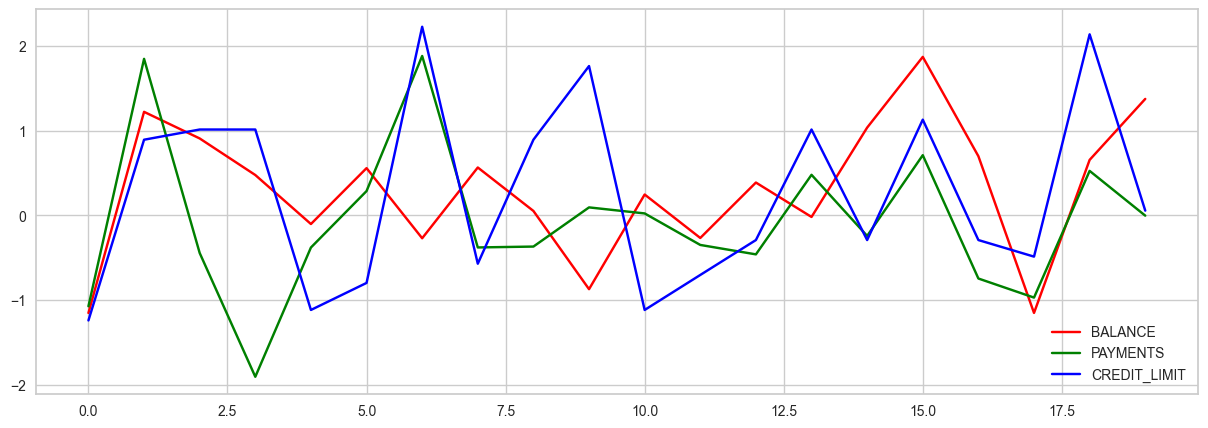

In [33]:
# Before
plt.figure(figsize=(15,5))
plt.plot(df_scaled.BALANCE[:20], color='red', label='BALANCE')
plt.plot(df_scaled.PAYMENTS[:20], color='green', label='PAYMENTS')
plt.plot(df_scaled.CREDIT_LIMIT[:20], color='blue', label='CREDIT_LIMIT')
plt.legend(loc='best')
plt.show()

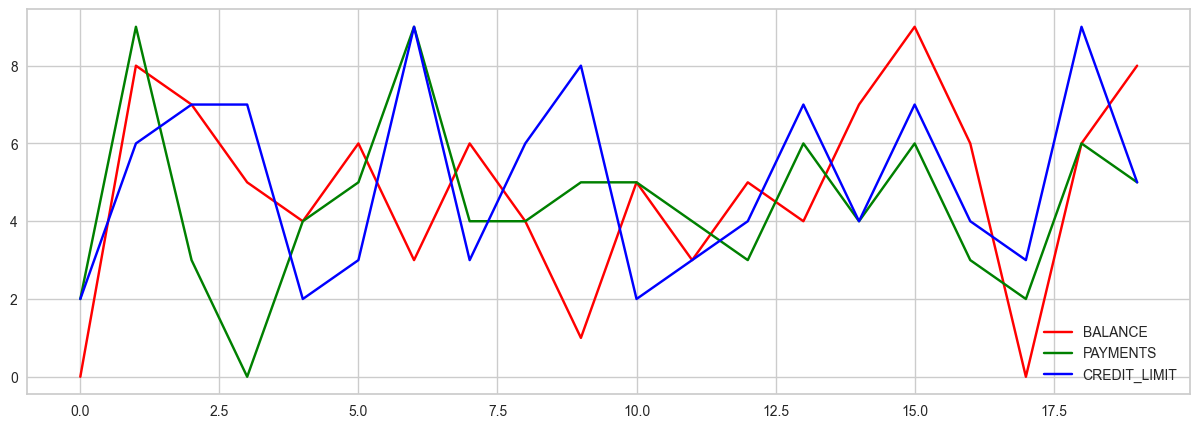

In [34]:
# After
plt.figure(figsize=(15,5))
plt.plot(df_scaled_discretization.BALANCE[:20], color='red', label='BALANCE')
plt.plot(df_scaled_discretization.PAYMENTS[:20], color='green', label='PAYMENTS')
plt.plot(df_scaled_discretization.CREDIT_LIMIT[:20], color='blue', label='CREDIT_LIMIT')
plt.legend(loc='best')
plt.show()

## 1.3 Perform Feature Engineering
1. Identify significant and independent features using appropriate techniques.
2. Show how you selected the features using suitable graphs.

### 1.3.1 Identifying Significant and Independent Variables

We can identify the significant features in the dataset by performing feature engineering. We are using the following feature engineering methods on our dataset.

1. PCA(Principal Component Analysis) → PCA is used for dimension reduction in the dataset. It is useful when dealing with dealing with datasets that have many highly correlating variables.
2. SVD(Single Value Decomposition) → SVD is a matrix factorization technique that decomposes a matrix into three simple matrices, $\cup$, $\vee$, and $\sum$. This also allows us to reduce dimensionality.

#### Step 1 - PCA(Principal Component Analysis)
PCA is used for dimension reduction in the dataset. It is useful when dealing with dealing with datasets that have many highly correlating variables.

The following code is used to perform PCA.

In [35]:
# Copy data frame
df_pca_scaled = df_scaled_discretization.copy()

# Create a PCA object
pca = PCA()

# Apply the transform to the dataset
df_pca_scaled[df_pca_scaled.columns] = pca.fit_transform(df_pca_scaled[df_pca_scaled.columns])

# Shape of the df_pca_scaled
df_pca_scaled.shape

(8950, 17)

In [36]:
df_pca_scaled.head()

BALANCE  PURCHASES  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
0 -5.424098  -8.235778       1.406150     -1.803849  1.893730   
1 -8.994678   4.366142       0.058750      5.392989 -2.671634   
2  4.212950   2.569625       6.414961     -5.414136 -0.756905   
3 -2.788429  -2.400597       8.369653     -1.003194  6.179858   
4 -6.045446  -3.826287       0.903521     -5.209828 -2.358177   

   MINIMUM_PAYMENTS  BALANCE_FREQUENCY  ONEOFF_PURCHASES  \
0          0.536220          -1.554429         -1.427039   
1         -5.811712           2.569535          0.660693   
2          1.810996           4.607691         -1.160287   
3         -1.592537           0.100046          1.138640   
4         -1.184562          -1.525047          0.148748   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.240992      0.614772             0.425296   
1               -1.022840      2.640337             0.806268   
2                0.620563     -0.826130            -1.388430   
3               -0.713468     -5.267590             3.929801   
4                0.244583      1.690520            -0.537904   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.664810                          0.603416   
1                    0.409229                         -1.224936   
2                    2.102297                          0.212080   
3                   -4.293793                         -0.269293   
4                    0.795709                         -1.197224   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PRC_FULL_PAYMENT    TENURE  
0                0.007705         -0.574741         -0.124425 -0.519374  
1               -0.541644          0.090286         -0.559080 -0.143043  
2               -1.491156          2.649925          0.265688 -0.686067  
3               -0.118928          1.530771         -0.185934  0.506732  
4               -0.460919         -0.570811          0.219043 -0.185949

#### Step 2 - SVD(Single Value Decomposition)
SVD is a matrix factorization technique that decomposes a matrix into three simple matrices, $\cup$, $\vee$, and $\sum$. This also allows us to reduce dimensionality.

The following code is used to perform SVD. First, we get the optimal number of components and perform the SVD using them.

In [37]:
# Copy the data frame
df_scaled_svd_tmp = df_scaled_discretization.copy()

# Make sparse matrix
X_sparse = csr_matrix(df_scaled_svd_tmp)

tsvd = TruncatedSVD(n_components=X_sparse.shape[1]-1)
X_tsvd = tsvd.fit(df_scaled_svd_tmp)

tsvd_var_ratios = tsvd.explained_variance_ratio_

def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        # Add the explained variance to the total
        total_variance += explained_variance
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            break
            
    return n_components

number_of_components = select_n_components(tsvd_var_ratios, 0.95)
print("Number of components : ", number_of_components)

Number of components :  10


In [38]:
# Copy the data frame
df_for_scaled_svd = df_pca_scaled.copy()

svd = TruncatedSVD(n_components=number_of_components)
svd.fit(df_for_scaled_svd)

# Apply transformations
transformed = svd.transform(df_for_scaled_svd)

# Get the df
df_svd_scaled = pd.DataFrame(transformed)

# View Data
df_svd_scaled.head()

0         1         2         3         4         5         6  \
0 -5.424098 -8.235778  1.406150 -1.803849  1.893730  0.536220 -1.554429   
1 -8.994678  4.366142  0.058750  5.392989 -2.671634 -5.811712  2.569535   
2  4.212950  2.569625  6.414961 -5.414136 -0.756905  1.810996  4.607691   
3 -2.788429 -2.400597  8.369653 -1.003194  6.179858 -1.592537  0.100046   
4 -6.045446 -3.826287  0.903521 -5.209828 -2.358177 -1.184562 -1.525047   

          7         8         9  
0 -1.427039  0.240992  0.614772  
1  0.660693 -1.022840  2.640337  
2 -1.160287  0.620563 -0.826130  
3  1.138640 -0.713468 -5.267590  
4  0.148748  0.244583  1.690520

#### Step 3 - Correlation Values
Next, we need to check for the correlation values. Because the lower the correlation values are, we can separate the data into unique clusters. The following code shows how you can get the correlation values.

In [39]:
# Find the correlations in the df_for_scaled_svd data frame
df_for_scaled_svd.corr()

BALANCE     PURCHASES  PURCHASES_TRX  \
BALANCE                           1.000000e+00  2.134524e-15   1.919957e-15   
PURCHASES                         2.134524e-15  1.000000e+00   5.930965e-16   
PURCHASES_TRX                     1.919957e-15  5.930965e-16   1.000000e+00   
CREDIT_LIMIT                     -2.459508e-16  2.981297e-15  -7.154199e-16   
PAYMENTS                          5.693911e-16 -5.740043e-16  -3.299517e-16   
MINIMUM_PAYMENTS                 -1.312757e-15  2.353705e-15   9.540805e-16   
BALANCE_FREQUENCY                -9.442609e-16 -1.949660e-15   9.602371e-16   
ONEOFF_PURCHASES                  1.294693e-15 -1.399139e-15  -1.020802e-15   
INSTALLMENTS_PURCHASES           -5.068382e-17  9.709217e-16  -4.150047e-16   
CASH_ADVANCE                      1.884719e-17 -9.368012e-17   3.109948e-16   
PURCHASES_FREQUENCY               7.463796e-16  2.620828e-16   3.609075e-18   
ONEOFF_PURCHASES_FREQUENCY       -7.373859e-16 -2.608142e-16   3.823294e-16   
PURCHASES_INSTALLMENTS_FREQUENCY  8.528059e-16  1.676782e-15  -1.257466e-15   
CASH_ADVANCE_FREQUENCY           -2.103946e-16  2.105484e-15  -1.028119e-16   
CASH_ADVANCE_TRX                  1.748859e-15 -2.172521e-16  -2.203427e-15   
PRC_FULL_PAYMENT                  6.644085e-17 -4.428475e-16   1.076116e-16   
TENURE                            1.240445e-15  4.113701e-17  -1.589134e-15   

                                  CREDIT_LIMIT      PAYMENTS  \
BALANCE                          -2.459508e-16  5.693911e-16   
PURCHASES                         2.981297e-15 -5.740043e-16   
PURCHASES_TRX                    -7.154199e-16 -3.299517e-16   
CREDIT_LIMIT                      1.000000e+00 -2.040439e-16   
PAYMENTS                         -2.040439e-16  1.000000e+00   
MINIMUM_PAYMENTS                  7.275274e-17  8.576690e-16   
BALANCE_FREQUENCY                 6.684454e-16  3.030743e-16   
ONEOFF_PURCHASES                 -2.114718e-16  1.124896e-16   
INSTALLMENTS_PURCHASES           -1.773794e-16  2.215344e-16   
CASH_ADVANCE                     -3.153678e-16  1.113208e-16   
PURCHASES_FREQUENCY              -7.155431e-16  7.098130e-17   
ONEOFF_PURCHASES_FREQUENCY       -1.882144e-16  1.989070e-16   
PURCHASES_INSTALLMENTS_FREQUENCY  3.676042e-16  4.321127e-16   
CASH_ADVANCE_FREQUENCY           -2.331994e-16 -2.222103e-17   
CASH_ADVANCE_TRX                 -2.657758e-16 -1.962437e-16   
PRC_FULL_PAYMENT                 -2.506646e-17  1.852417e-16   
TENURE                           -3.980454e-17  1.448769e-16   

                                  MINIMUM_PAYMENTS  BALANCE_FREQUENCY  \
BALANCE                              -1.312757e-15      -9.442609e-16   
PURCHASES                             2.353705e-15      -1.949660e-15   
PURCHASES_TRX                         9.540805e-16       9.602371e-16   
CREDIT_LIMIT                          7.275274e-17       6.684454e-16   
PAYMENTS                              8.576690e-16       3.030743e-16   
MINIMUM_PAYMENTS                      1.000000e+00      -1.151033e-15   
BALANCE_FREQUENCY                    -1.151033e-15       1.000000e+00   
ONEOFF_PURCHASES                      1.088916e-15       1.255805e-15   
INSTALLMENTS_PURCHASES                1.681419e-16       8.820032e-16   
CASH_ADVANCE                         -1.318533e-15       6.229350e-16   
PURCHASES_FREQUENCY                  -5.656507e-16       1.144192e-15   
ONEOFF_PURCHASES_FREQUENCY           -1.197448e-15      -6.183697e-16   
PURCHASES_INSTALLMENTS_FREQUENCY      3.270544e-17      -3.766122e-16   
CASH_ADVANCE_FREQUENCY                3.066550e-16       1.282294e-15   
CASH_ADVANCE_TRX                      1.169334e-15       1.716539e-15   
PRC_FULL_PAYMENT                     -1.495256e-16       2.065743e-16   
TENURE                                1.021825e-16       2.002564e-16   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                               1.294693e-15           -5.068382

To identify the correlation values better we can get a heatmap.

<Axes: >

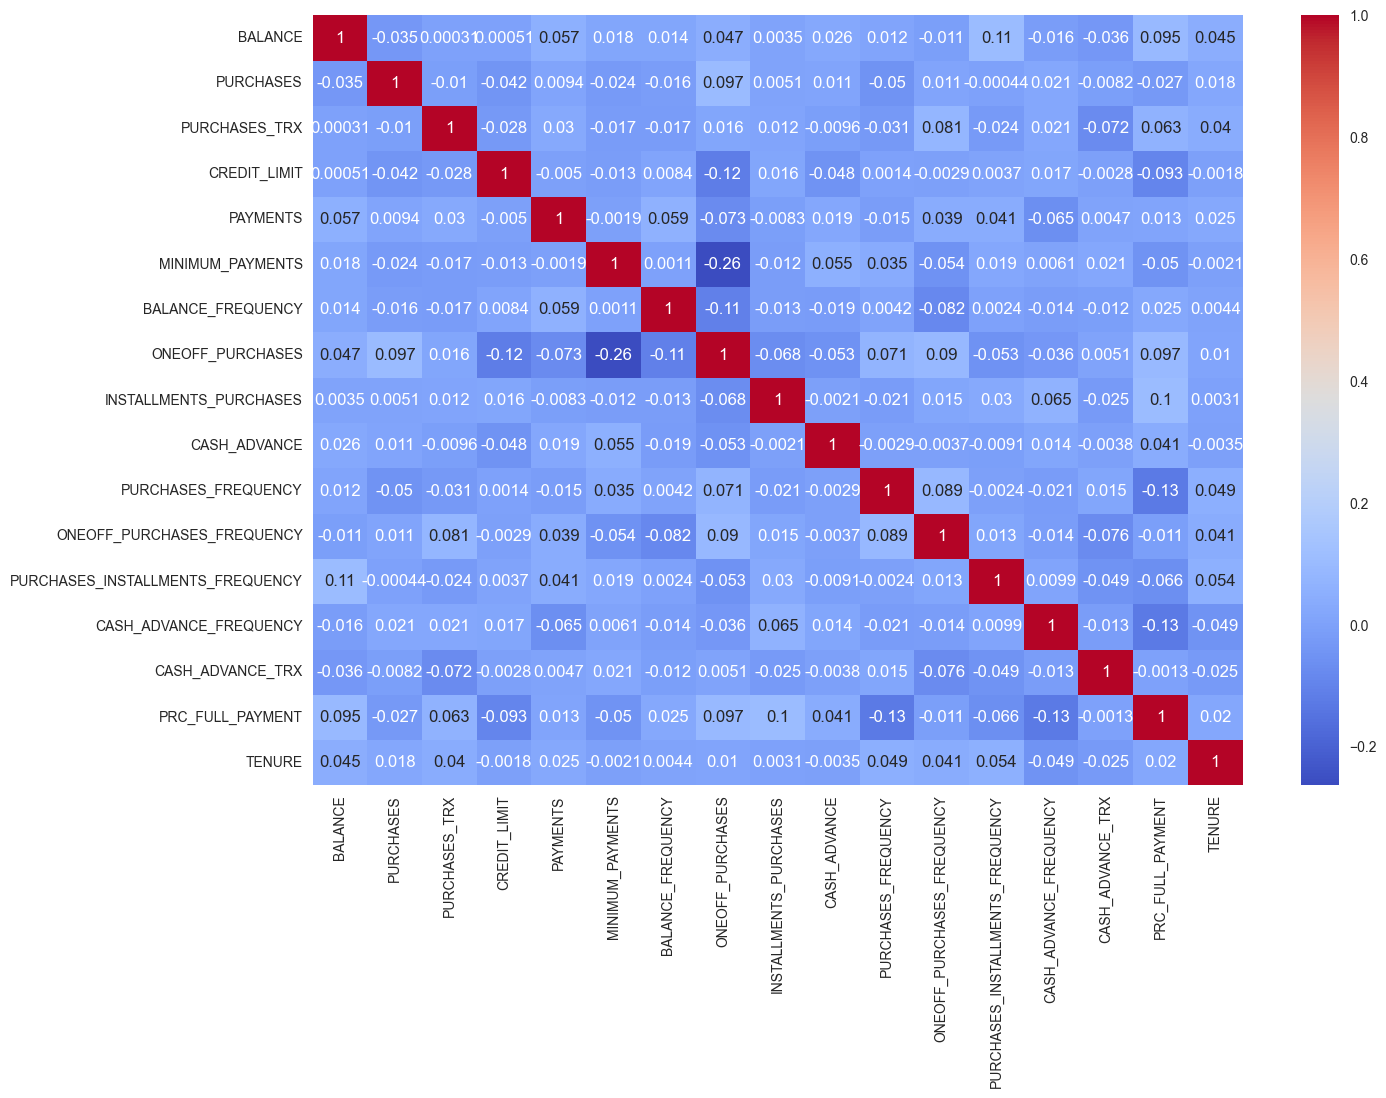

In [40]:
# Create heatmap
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_for_scaled_svd.corr(method='spearman'), annot=True, cmap='coolwarm')

Since all the features in the dataset have low correlation values with each other, we can determine all of the features are independent variables and they can be used for the clustering algorithms. We cannot determine significant variables in this case, since we do not have a `y` variable for clustering.

## 1.4 Clustering
1. Justifies the choice of clustering algorithm for the dataset.
2. Consider and apply alternative algorithms to the dataset and explain why they were chosen.
3. Using suitable evaluation matrices, compare the applicability of different clustering algorithms on the given dataset.
4. Relates the clusters to the original problem and provides actionable insights.

### 1.4.1 Chosen Clustering Algorithm for the Dataset
The Clustering algorithm that was chosen for this is the `KMeans Clustering` Algorithm. The reasons for choosing that algorithm for this dataset are mentioned below.
- KMeans is a direct and easy algorithm to implement which provides good results since it assigns each data point to the nearest centeroid, updating the centeroids to minimize the sum of the squared distances.
- KMeans is also efficient and can handle large datasets with many variables due to its linear time complexity.
- KMeans can work with a variety of data types and distribution types, which makes it a versatile algorithm.
- The clusters formed by KMeans are easy to interpret since each cluster is associated with a centroid which represents the average of all the points that are assigned to that cluster.
- KMeans is widely used in segmentation processes like image segmentation and customer segmentation.

<img src='./images/clustering/kmeans.gif' alt="KMeans Clustering" style='width:500px;height:auto;display:block;margin-left:auto;margin-right:auto'/>

#### Step 1 - Elbow Method
First, we need to use the KMeans algorithm. The following code explains how you can find the optimal number of clusters for `KMeans` using the `Elbow Method`(using the `Yellowbrick` library).

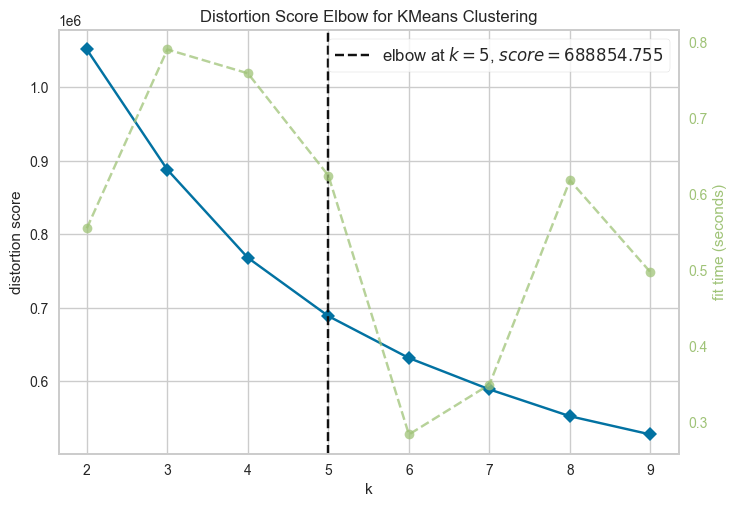

In [41]:
# Select the model
model = KMeans(random_state=42)

# Selet the KElbowVisualizer from Yellowbrick library
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df_pca_scaled)
visualizer.show()
plt.show()

And if we need to plot `Elbow Curve` without using the Yellowbrick library, we can do that as well. The following code explains how you can convert the data frame to a `numpy` array and use it to get the Elbow Curve. The place where the curve tends to form an Elbow joint contains the optimal number of clusters.

In [42]:
# Transform the data to a NumPy array
X = df_pca_scaled.to_numpy()
# Get cluster-wise-inertias
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 20)]
inertias = [model.inertia_ for model in kmeans_per_k]

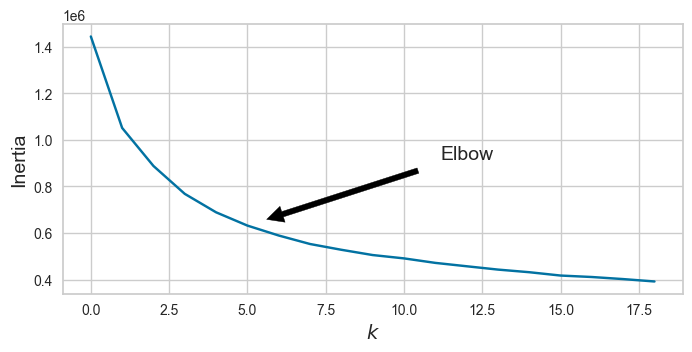

In [43]:
# Plot the Elbow curve
plt.figure(figsize=(8, 3.5))
plt.plot(inertias, "bx-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(5, inertias[5]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

After selecting the optimal number of clusters(in my case its 5) we can fit and predict it to get the associated labels in the dataset.

In [44]:
# KMeans
num_of_clusters = 5
kmeans = KMeans(num_of_clusters)
y_pred = kmeans.fit(X)
labels = kmeans.labels_

In [45]:
labels

array([2, 1, 4, ..., 2, 2, 2], dtype=int32)

In [46]:
labels.shape

(8950,)

Let’s examine the cluster centers/centroids as well.

In [47]:
kmeans.cluster_centers_

array([[ 5.88227945e+00, -2.37989861e+00, -5.01918876e+00,
        -3.35918781e-01, -2.04426124e-01,  1.54007170e-01,
         2.30987125e-01, -1.20138855e-02, -9.69684622e-03,
         2.42779183e-01,  2.02968346e-02, -2.04873405e-01,
         3.90060423e-01, -8.62925183e-02,  1.67621622e-01,
        -9.73965307e-03,  2.29555779e-02],
       [-8.10555140e+00,  6.79466669e+00, -9.85508617e-01,
         2.44727103e+00, -2.72671117e-01,  2.14305081e-01,
         2.84103495e-01, -1.17792899e-01,  1.97155945e-01,
         5.65804067e-02,  9.91355004e-02, -7.43973521e-03,
         1.03591713e-01, -1.50700670e-02,  2.05942873e-03,
         4.41165847e-02,  3.27865398e-02],
       [-2.93426545e+00, -7.19935183e+00,  2.16390828e+00,
         2.67054505e+00,  2.53796427e+00, -4.12528156e-01,
         1.85208369e-01, -3.25804198e-01, -2.71404413e-01,
        -2.49784801e-01, -5.98773557e-02,  1.84456474e-02,
        -2.43732125e-02,  2.42297357e-02, -5.63767332e-02,
        -3.81082978e-02,  3.2

We can further analyze the centers to extract more information as well.

In [48]:
kmeans.cluster_centers_.shape

(5, 17)

In [49]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[df_pca_scaled.columns])
cluster_centers

BALANCE PURCHASES PURCHASES_TRX CREDIT_LIMIT  PAYMENTS MINIMUM_PAYMENTS  \
0  5.882279 -2.379899     -5.019189    -0.335919 -0.204426         0.154007   
1 -8.105551  6.794667     -0.985509     2.447271 -0.272671         0.214305   
2 -2.934265 -7.199352      2.163908     2.670545  2.537964        -0.412528   
3 -5.078051 -1.197148      0.666405    -3.757045 -1.472896        -0.403105   
4  9.564162  4.081143      3.666887    -0.068803 -0.140735         0.460527   

  BALANCE_FREQUENCY ONEOFF_PURCHASES INSTALLMENTS_PURCHASES CASH_ADVANCE  \
0          0.230987        -0.012014              -0.009697     0.242779   
1          0.284103        -0.117793               0.197156     0.056580   
2          0.185208        -0.325804              -0.271404    -0.249785   
3         -0.586678         0.366038               0.034948    -0.070444   
4         -0.018382         0.001813               0.031344    -0.011804   

  PURCHASES_FREQUENCY ONEOFF_PURCHASES_FREQUENCY  \
0            0.020297                  -0.204873   
1            0.099136                  -0.007440   
2           -0.059877                   0.018446   
3           -0.035852                   0.075059   
4           -0.020033                   0.127814   

  PURCHASES_INSTALLMENTS_FREQUENCY CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX  \
0                         0.390060              -0.086293         0.167622   
1                         0.103592              -0.015070         0.002059   
2                        -0.024373               0.024230        -0.056377   
3                        -0.105366              -0.081194        -0.112068   
4                        -0.378936               0.177859        -0.006309   

  PRC_FULL_PAYMENT    TENURE  
0        -0.009740  0.022956  
1         0.044117  0.032787  
2        -0.038108  0.032471  
3        -0.009008  0.043132  
4         0.013921 -0.133565

Now, we can predict the KMeans values by fitting it to the KMeans algorithm we have created.

In [50]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 3, 4, ..., 1, 1, 1], dtype=int32)

In [51]:
df_cluster = pd.concat([df_pca_scaled, pd.DataFrame(labels, columns=['clusterKMeans'])],axis=1)
df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  clusterKMeans  
0   201.802084        139.509787          0.000000      12              2  
1  4103.032597       1072.340217          0.222222      12              1  
2   622.066742        627.284787          0.000000      12              4  
3     0.000000        864.206542          0.000000      12              2  
4   678.334763        244.791237          0.000000      12              3

Let’s plot the graphs to see the predictions more clearly.

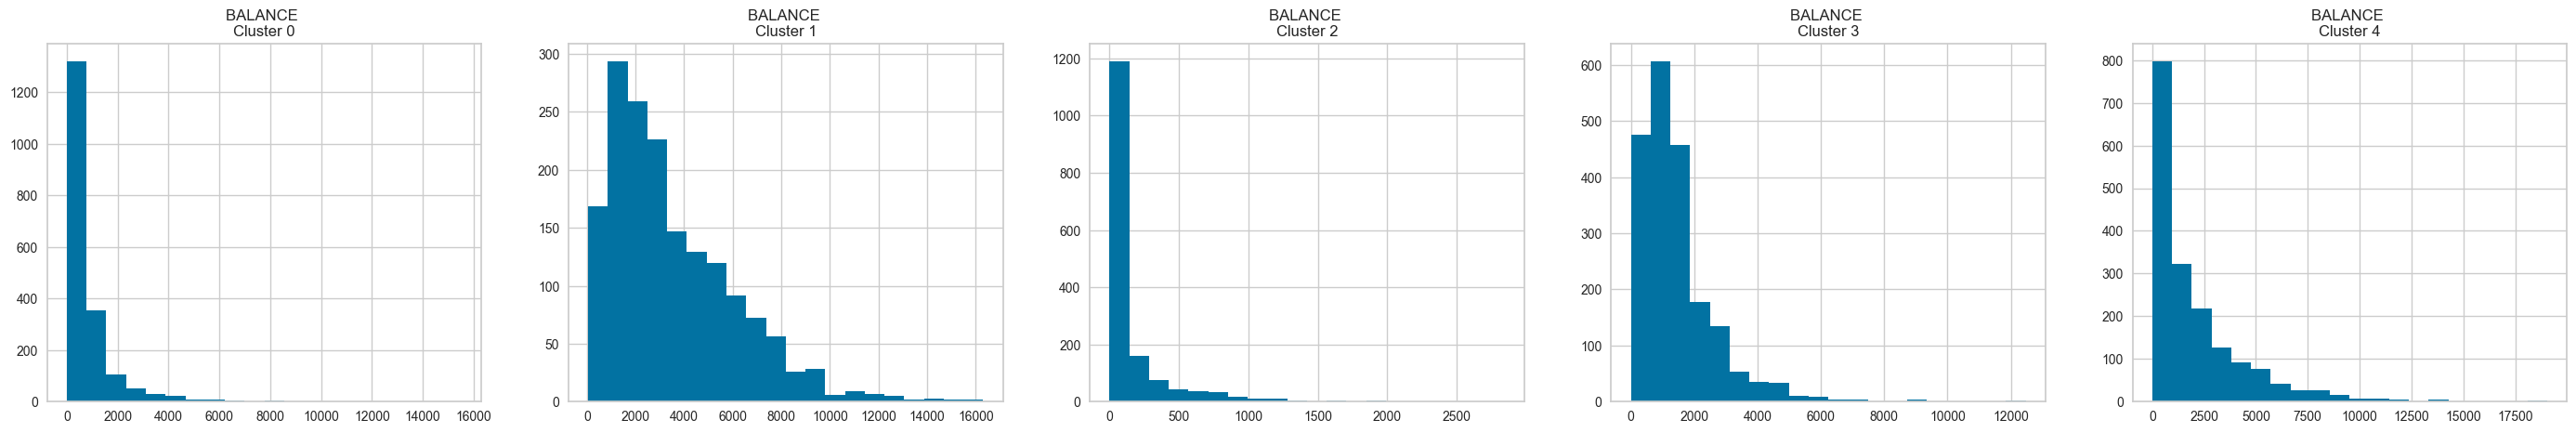

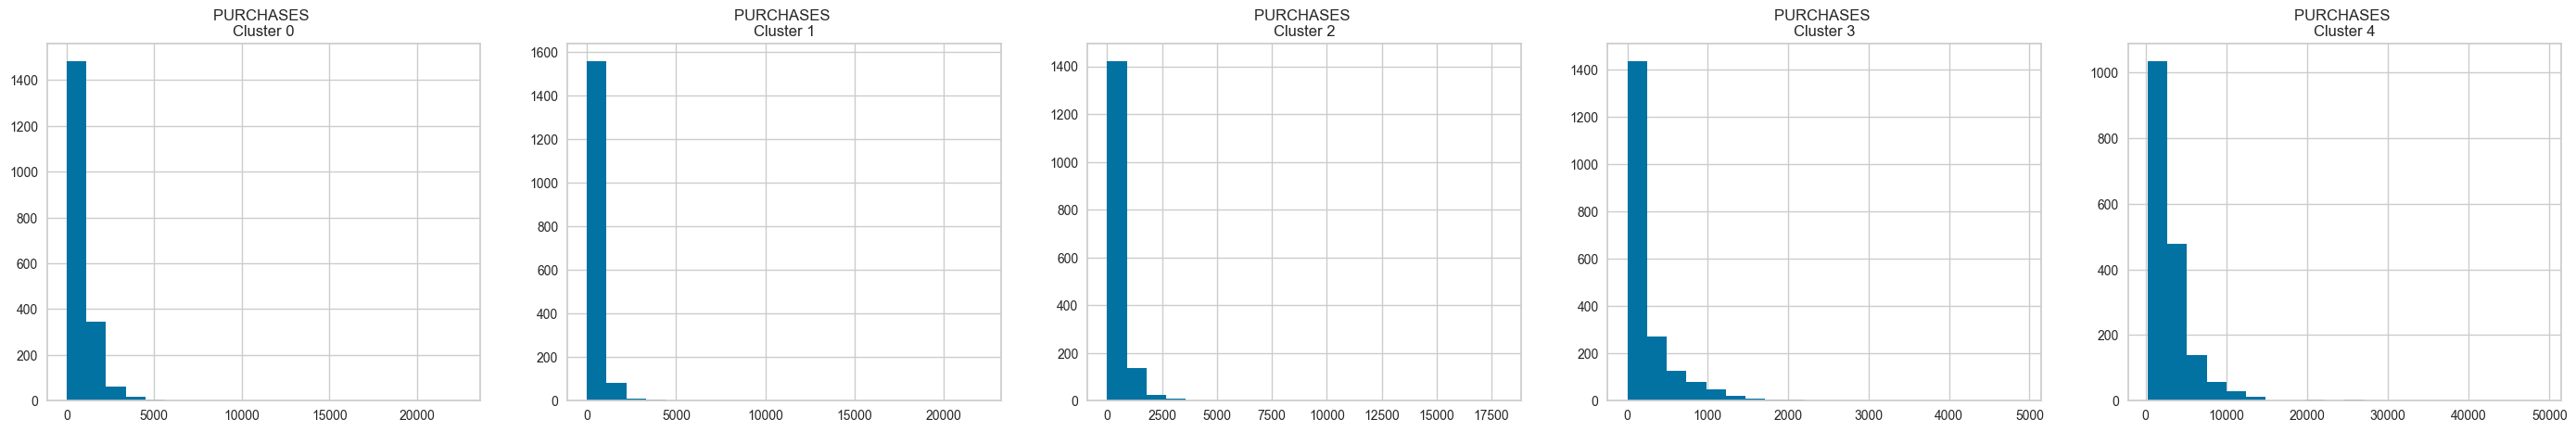

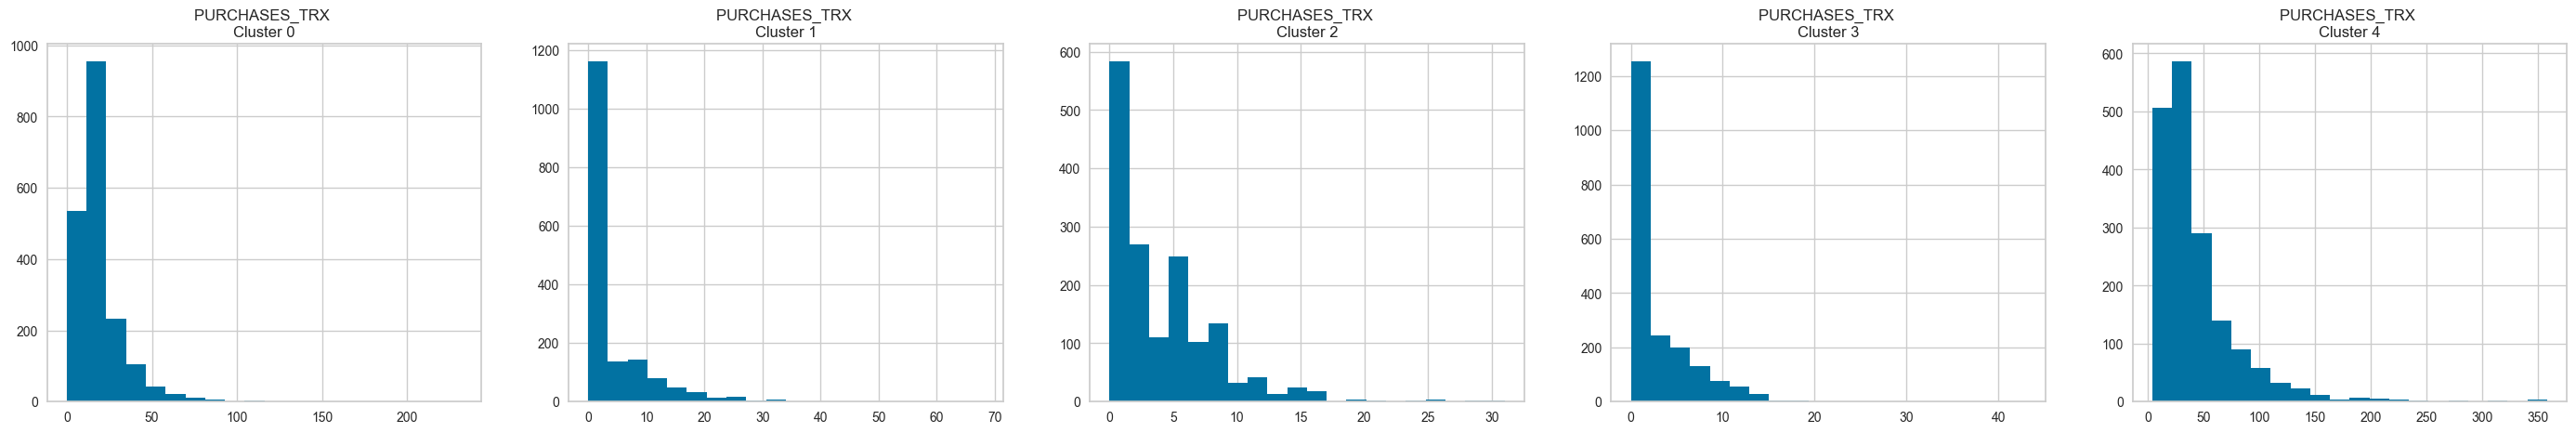

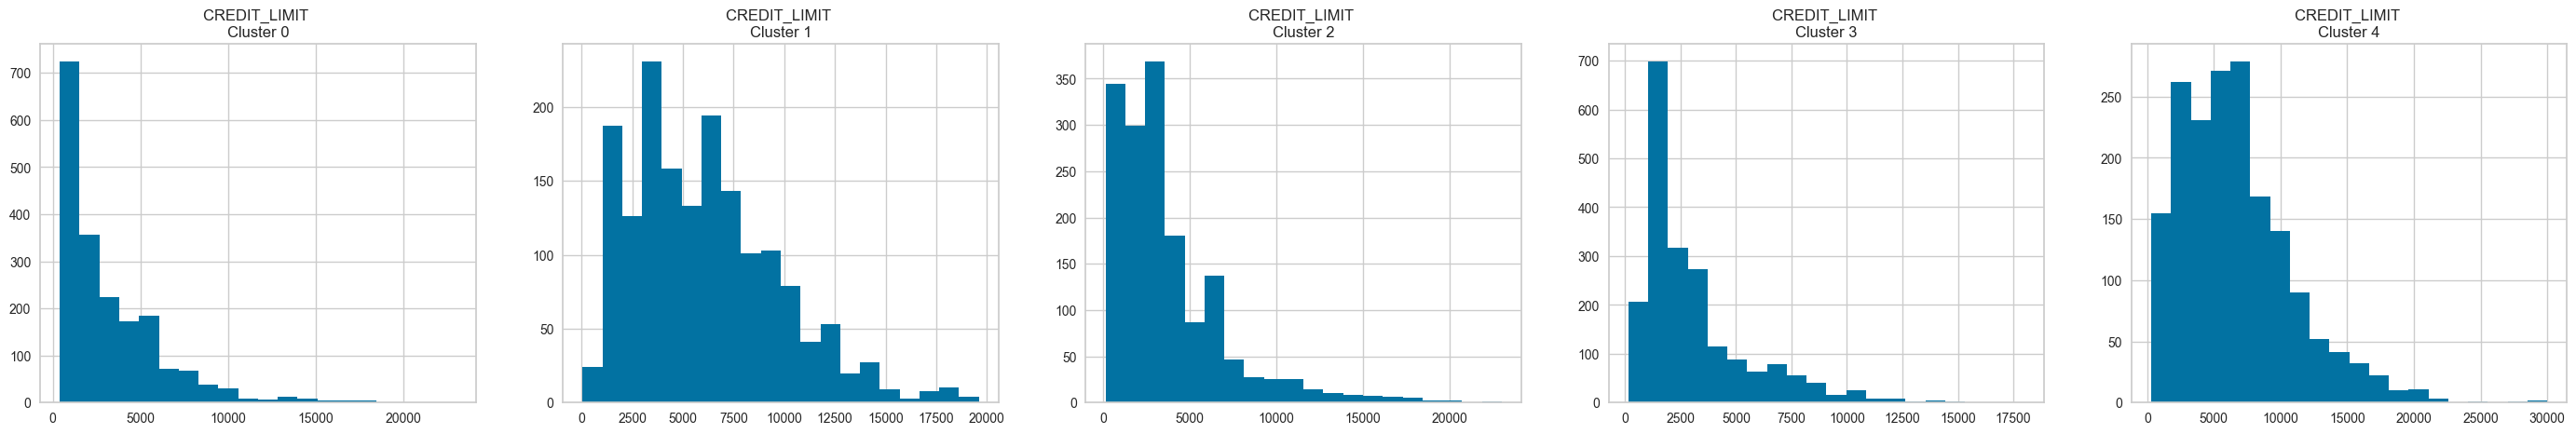

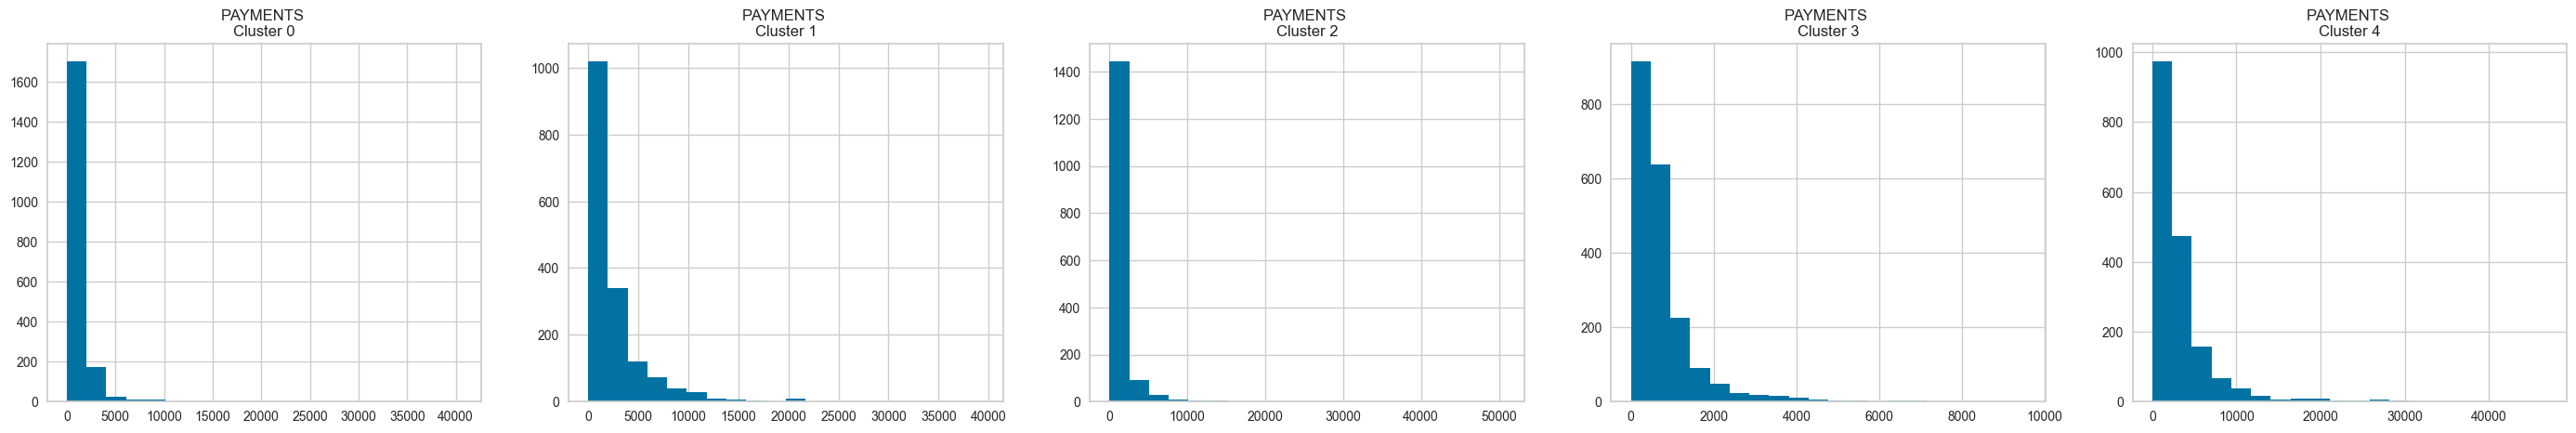

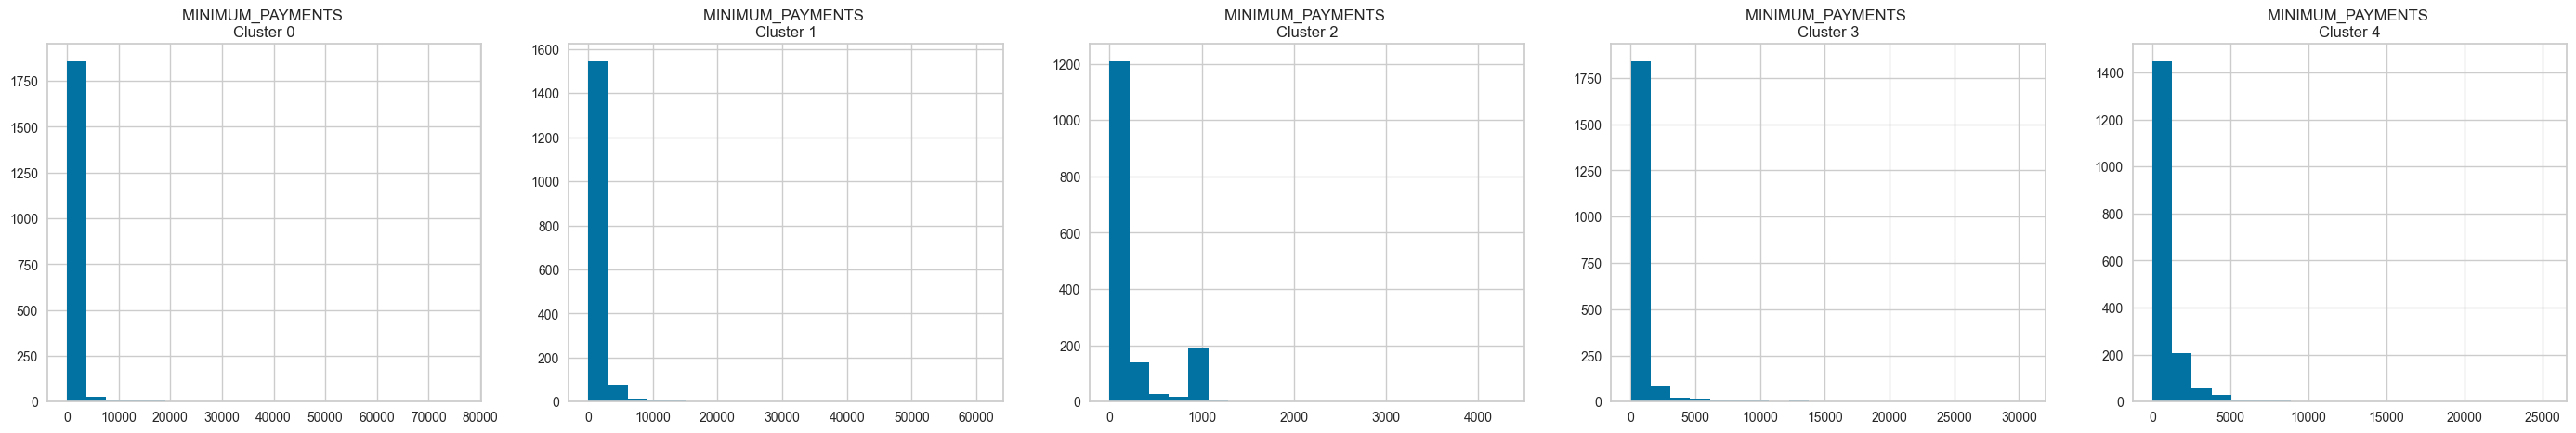

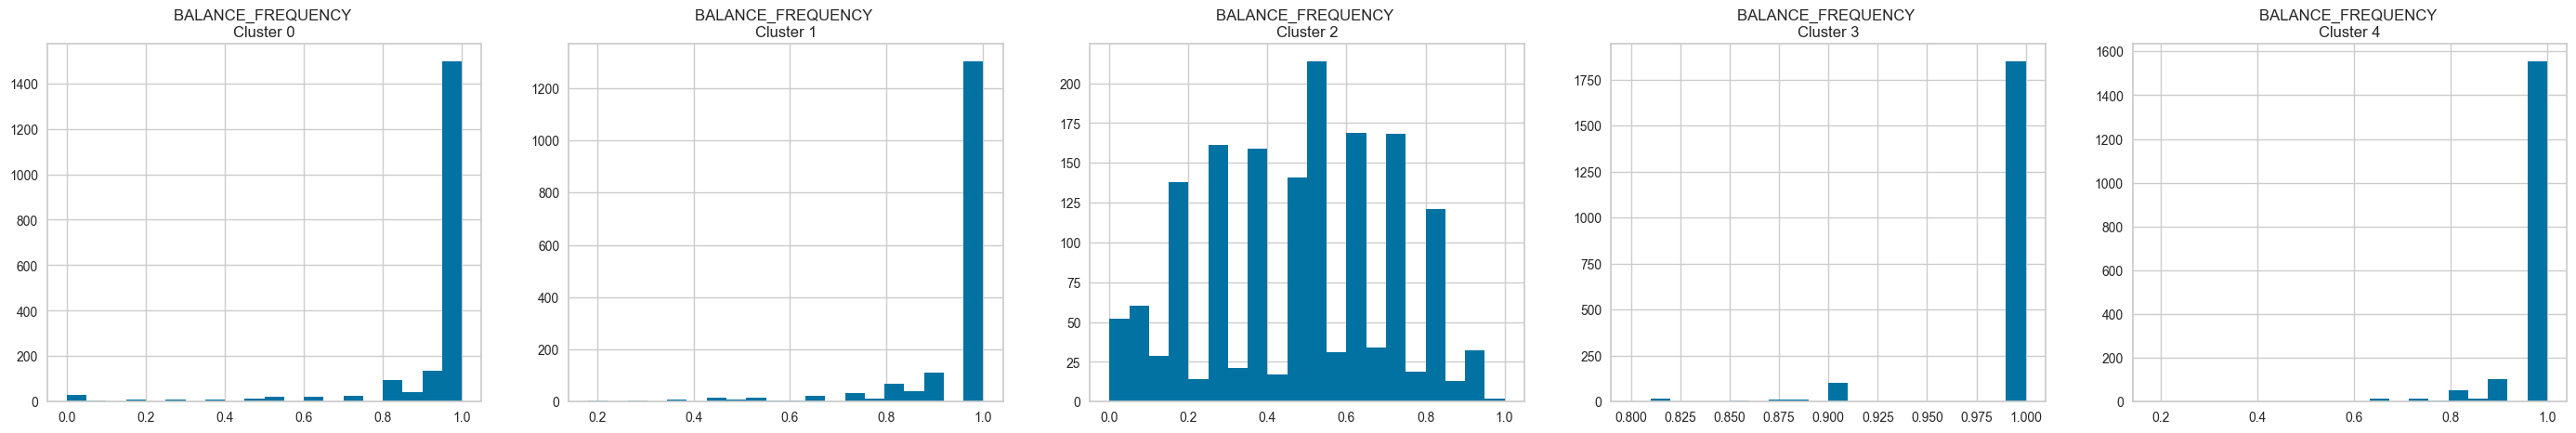

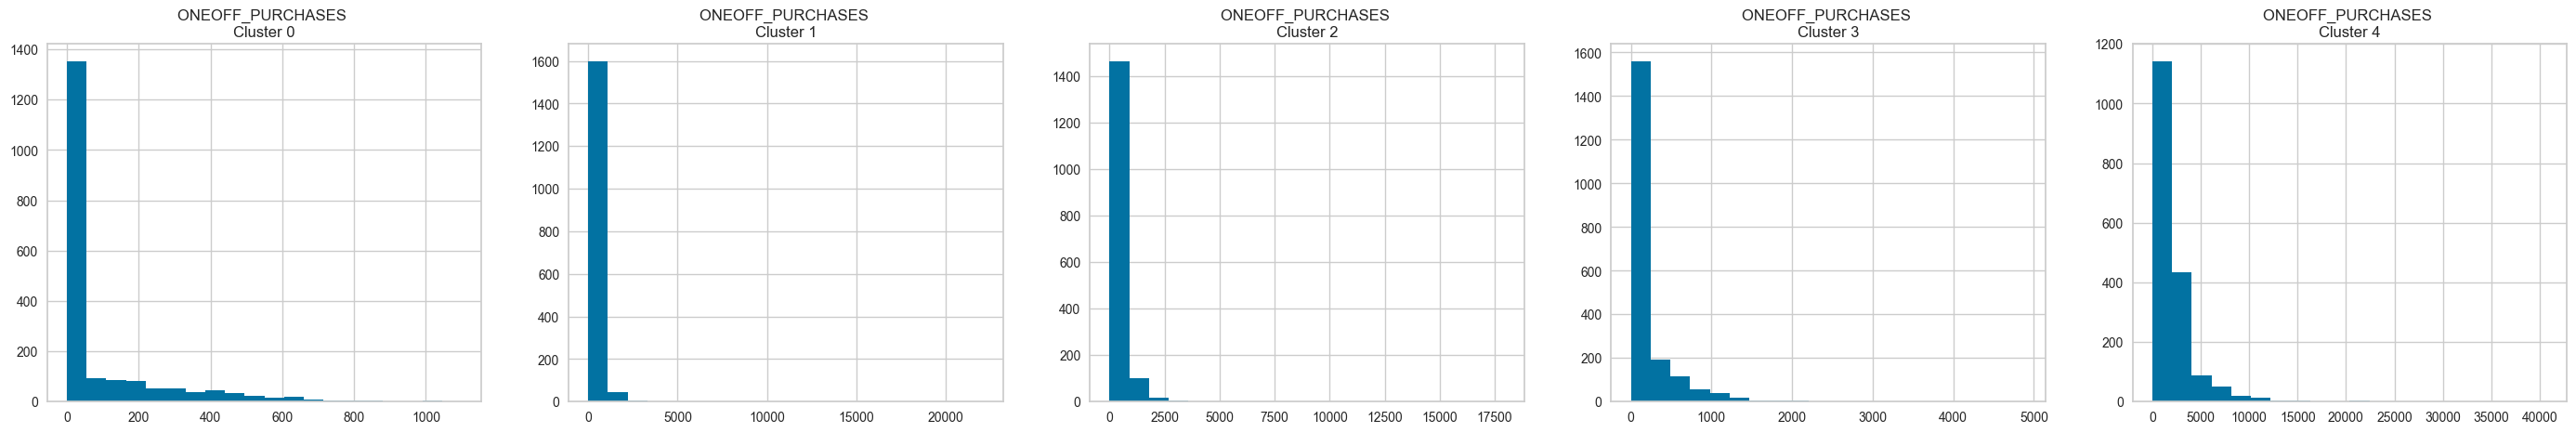

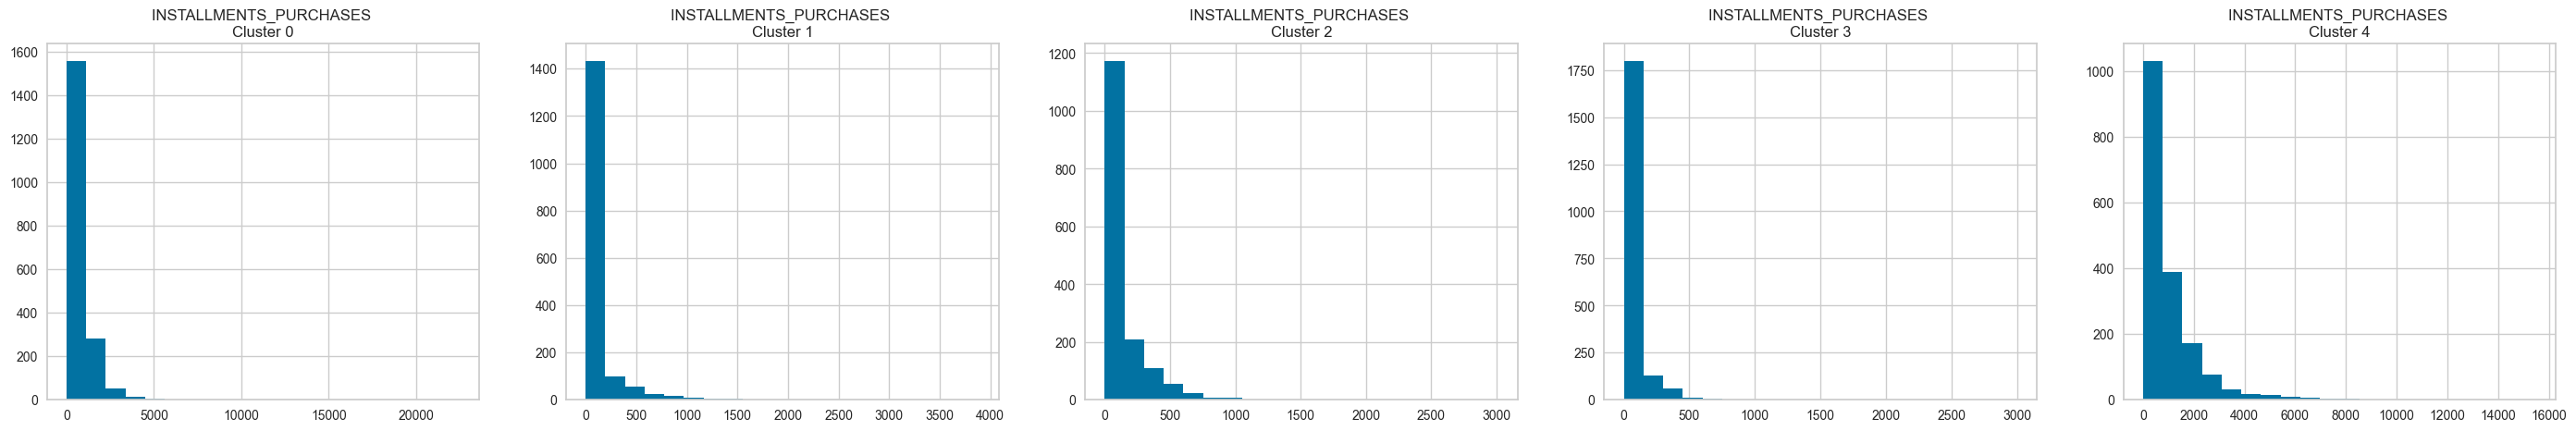

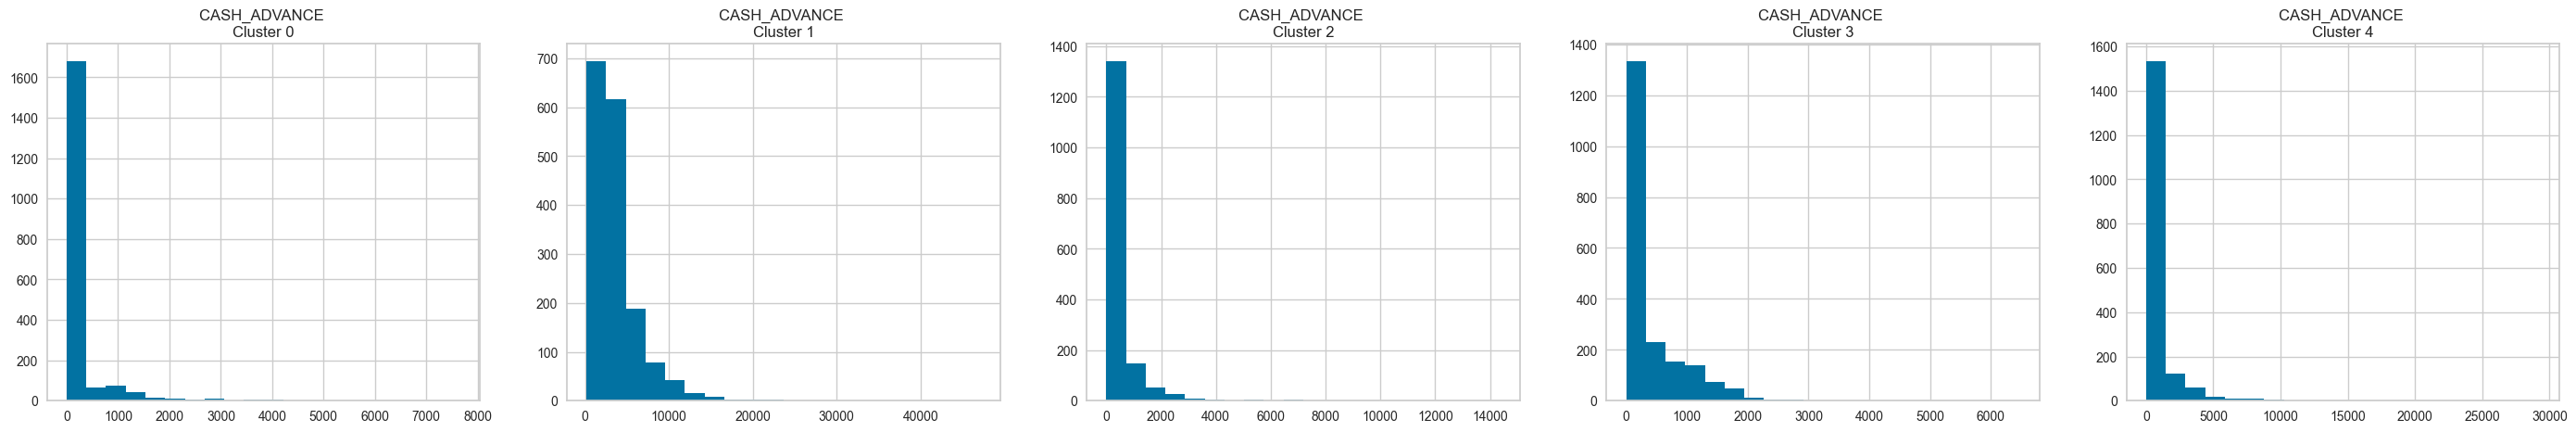

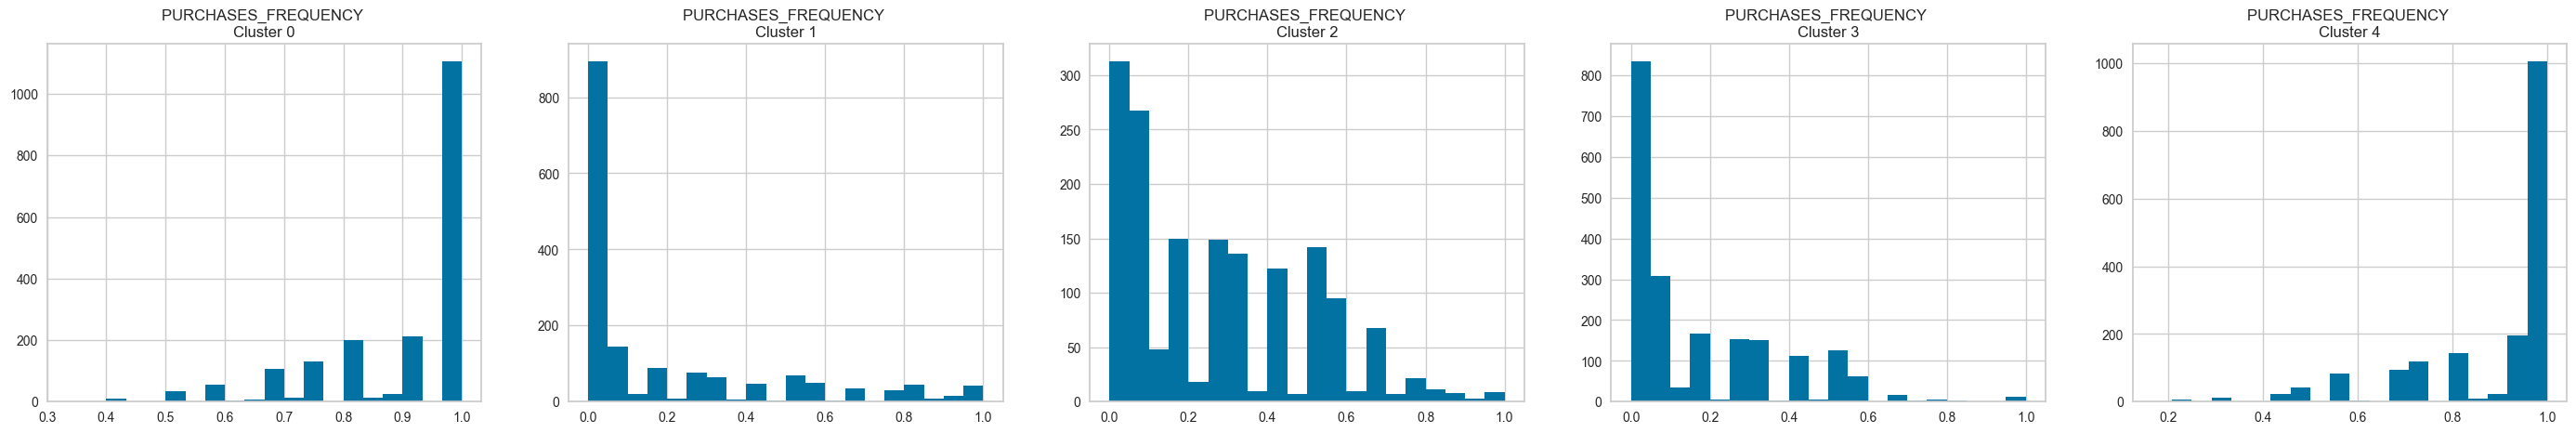

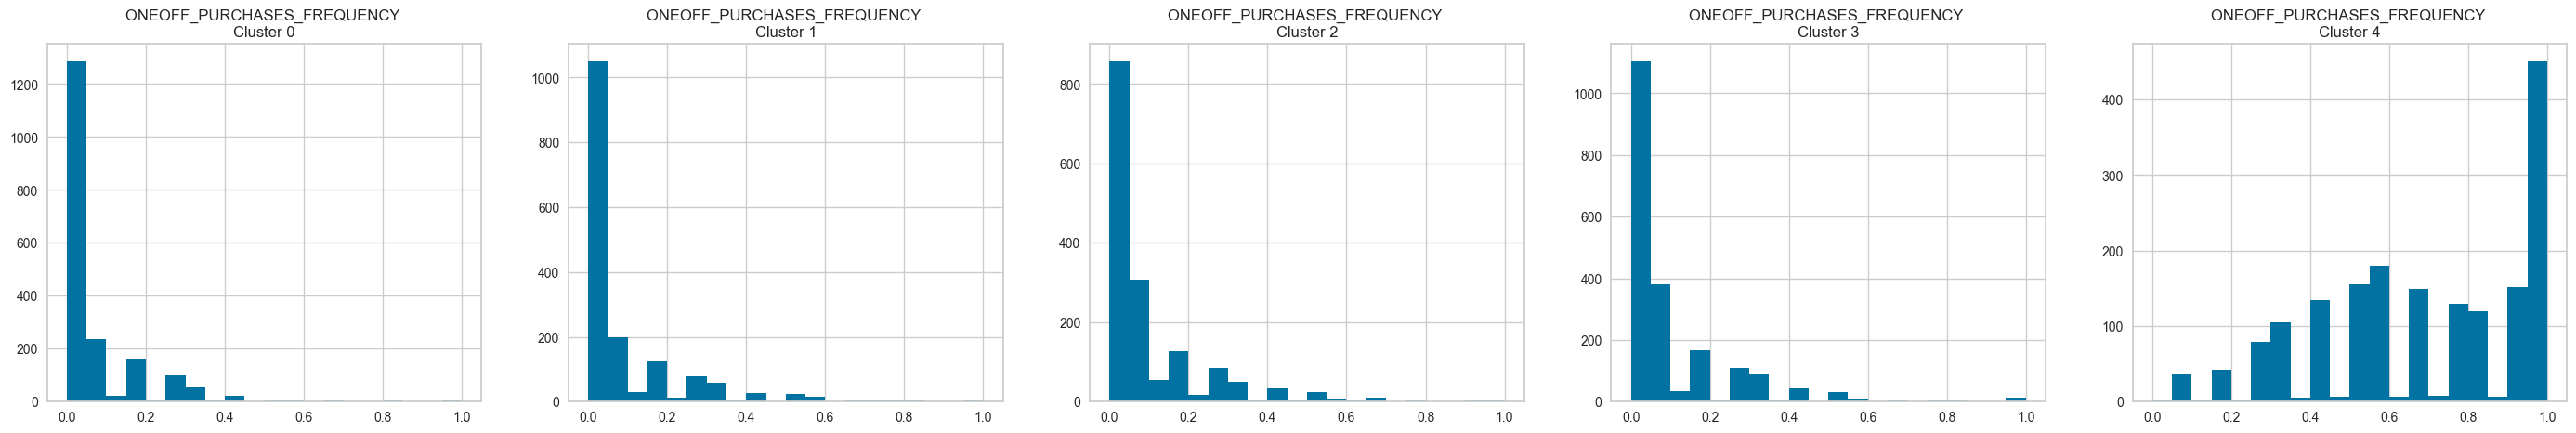

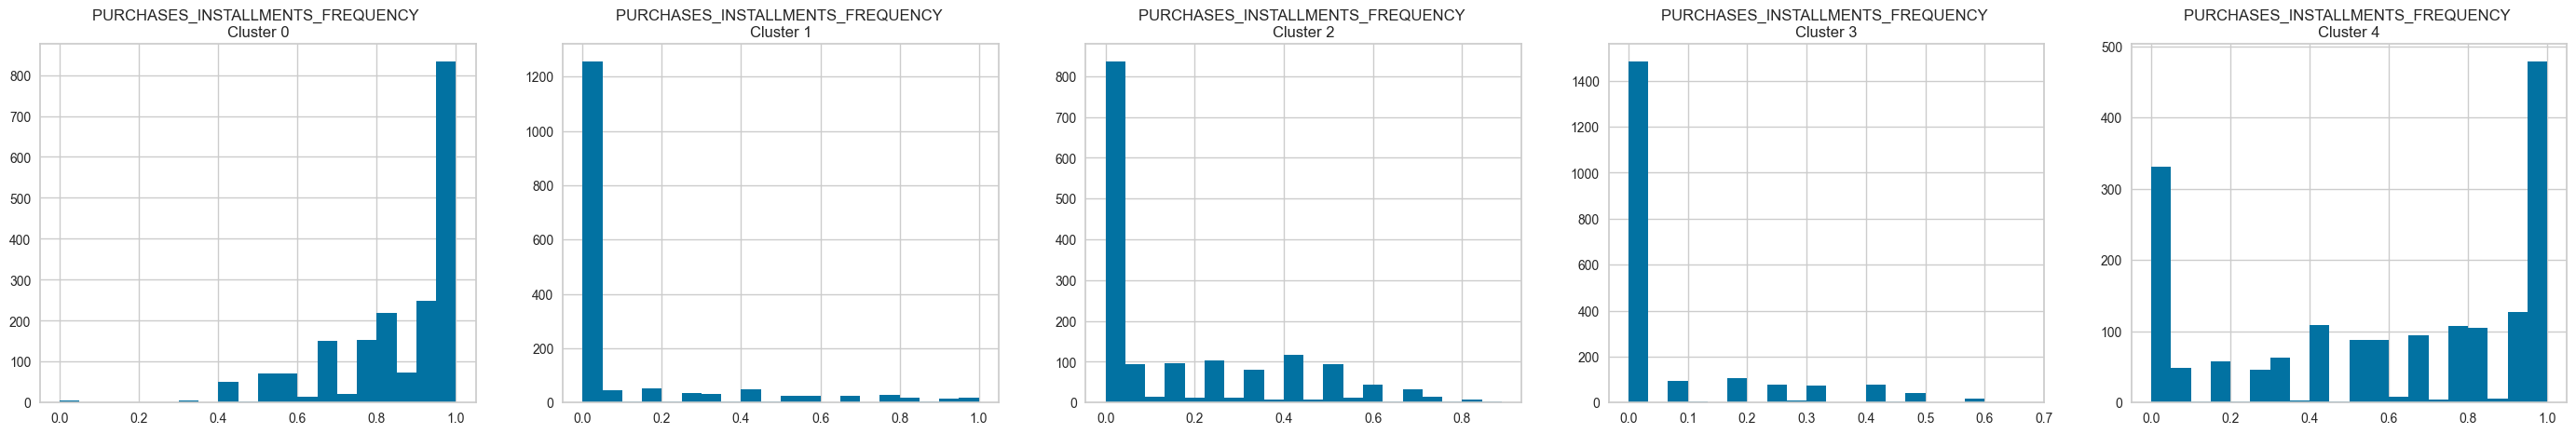

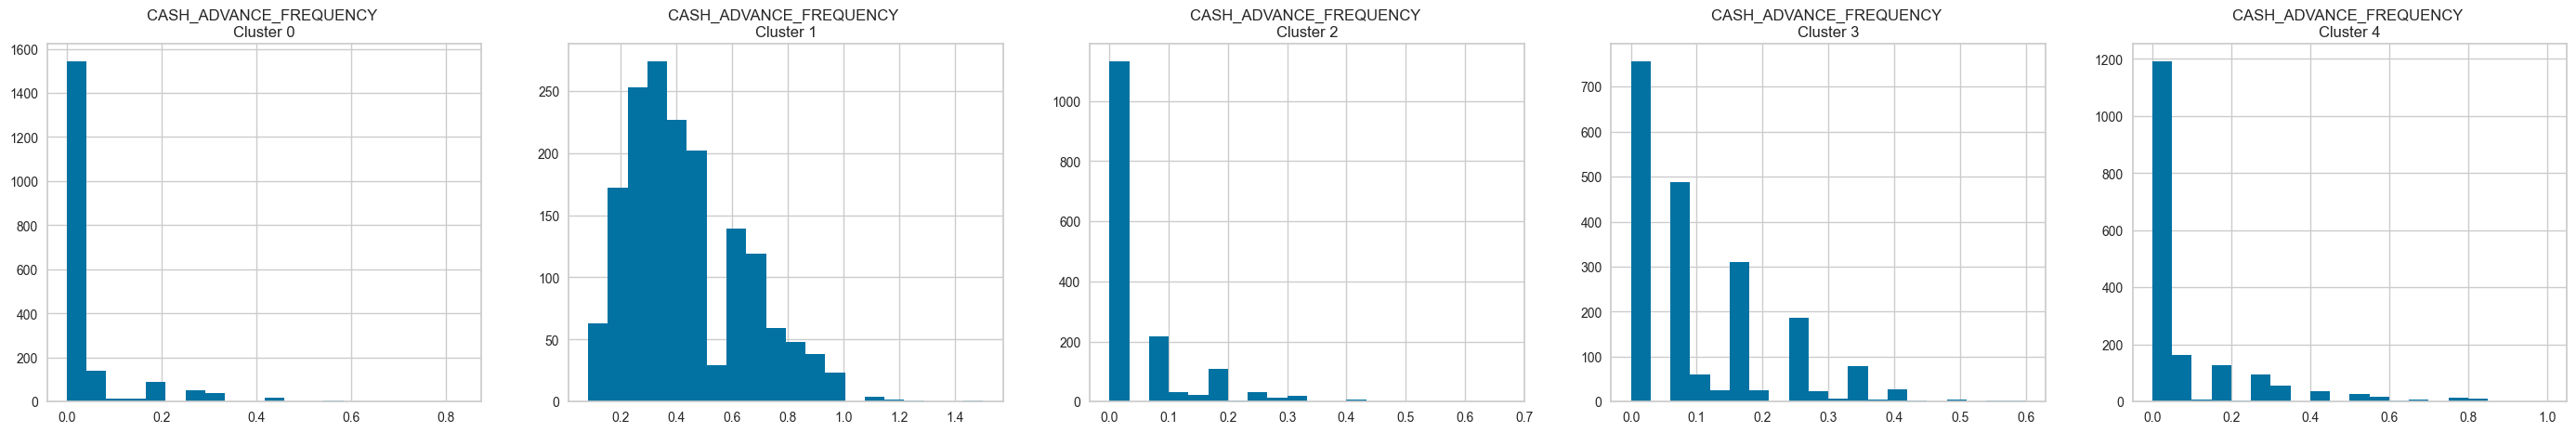

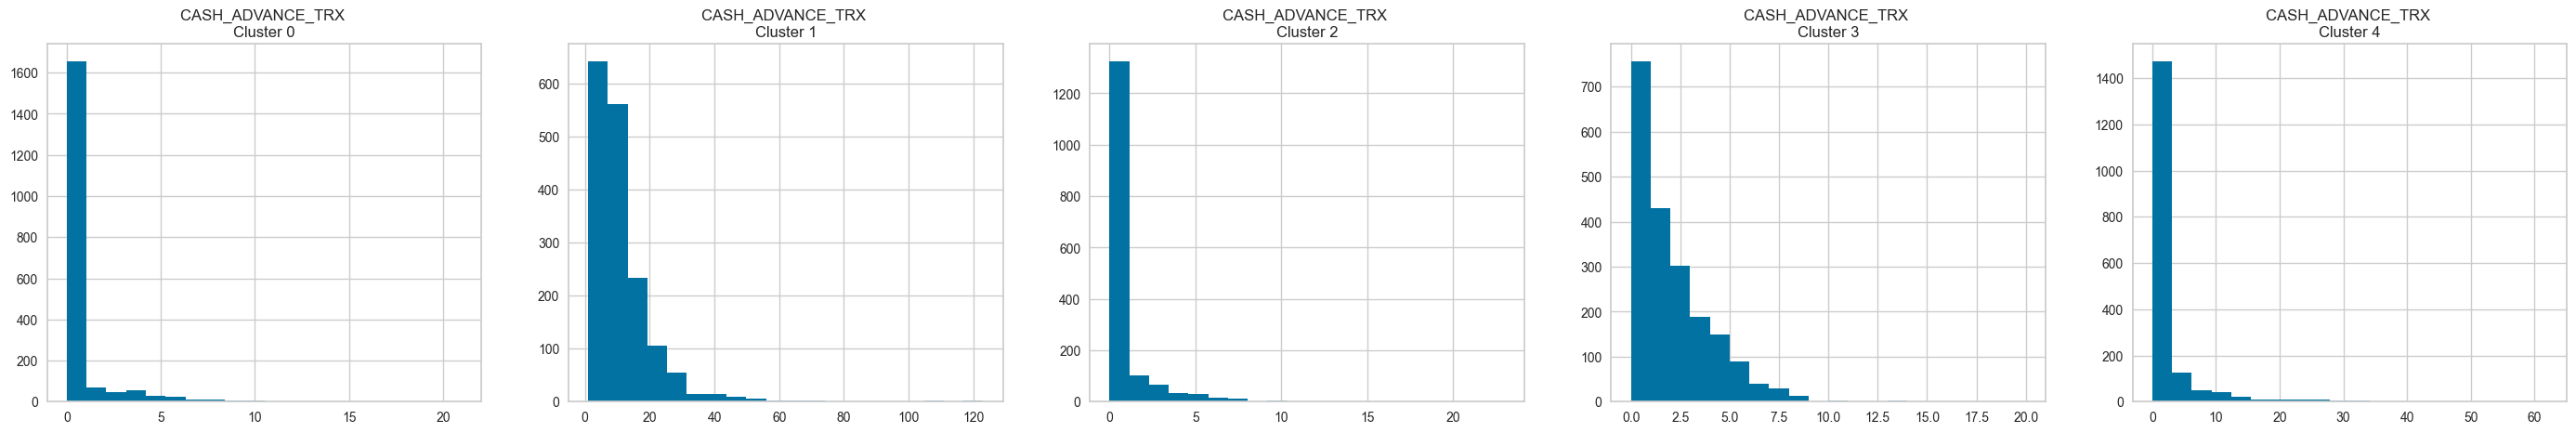

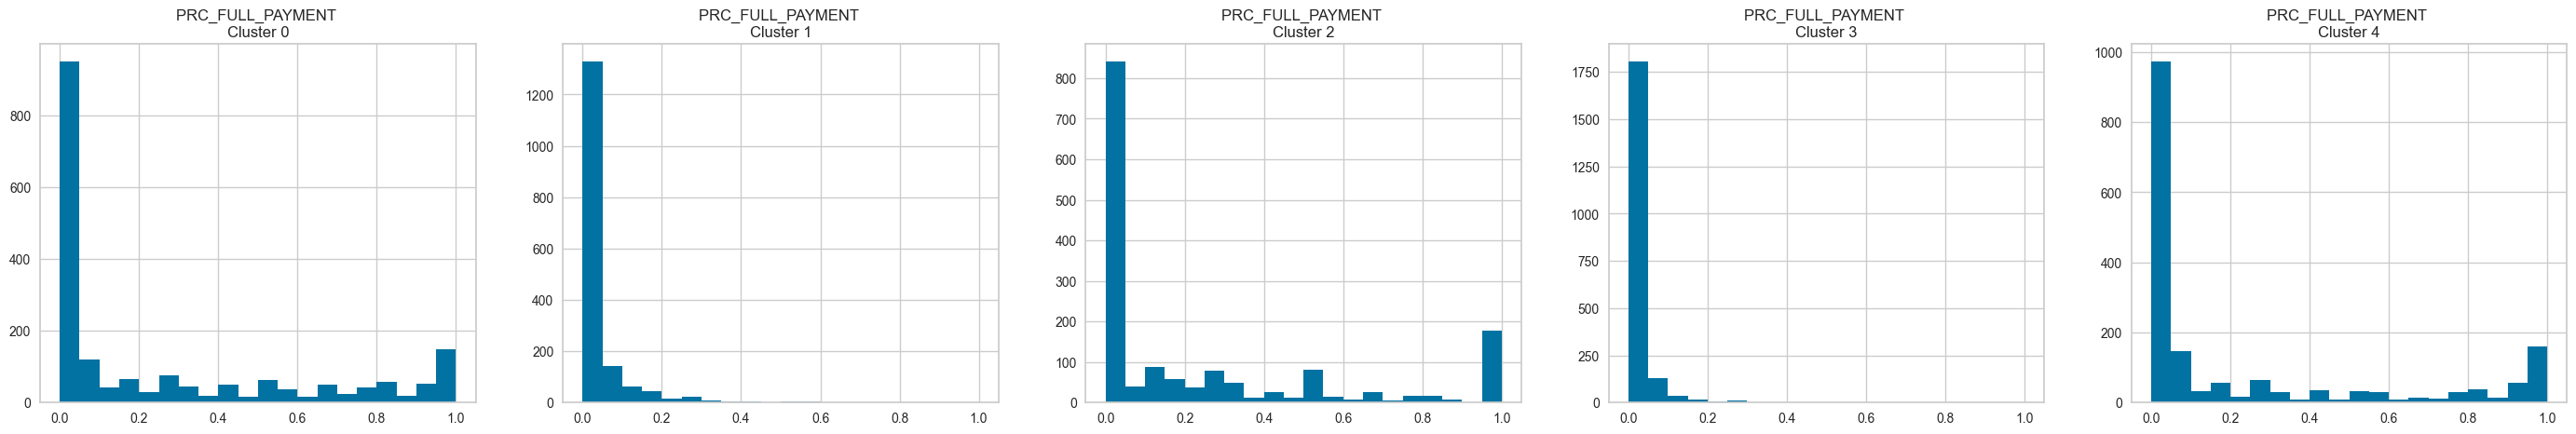

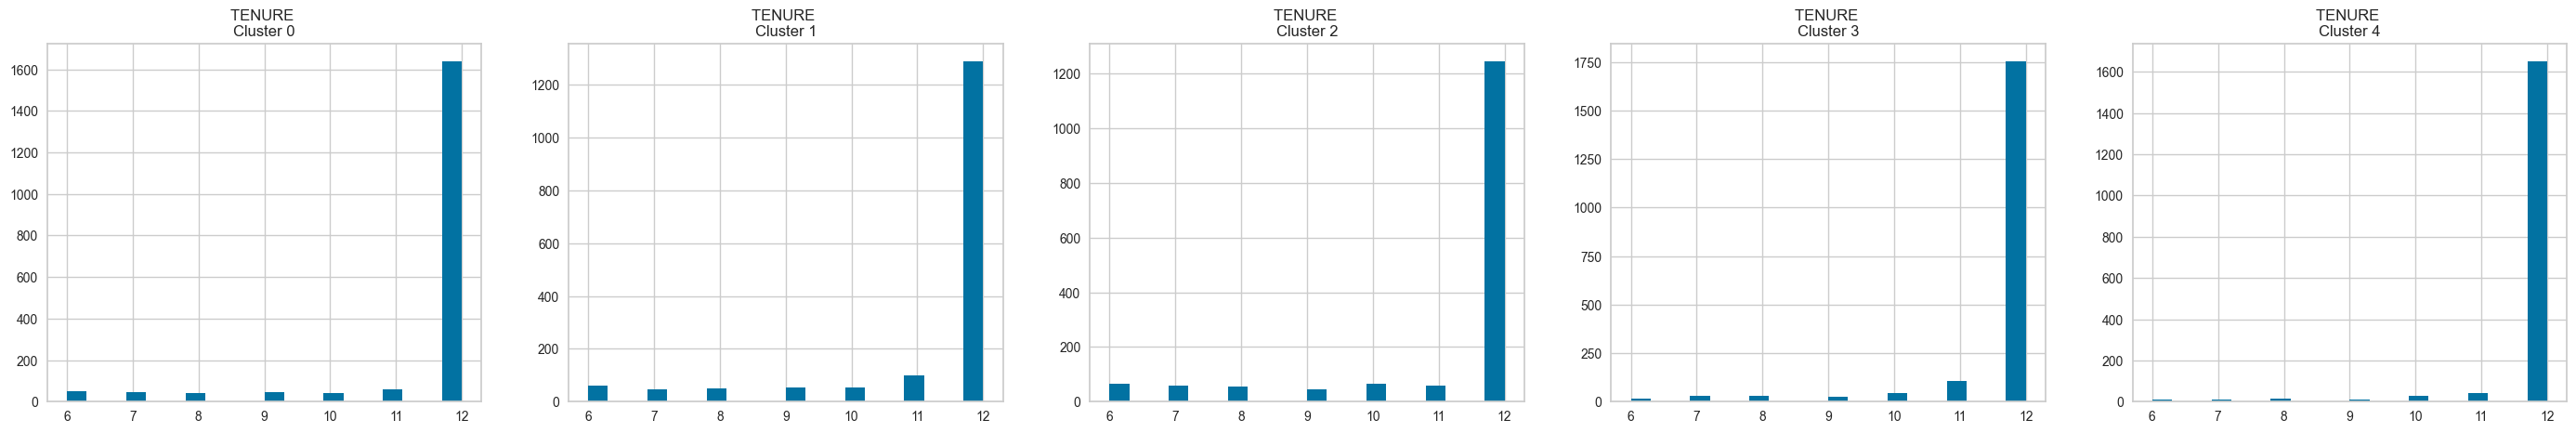

In [52]:
for i in df_pca_scaled:
    plt.figure(figsize=(35,5))
    for j in range(5):
        plt.subplot(1,5,j+1)
        cluster = df_cluster[df_cluster['clusterKMeans']==j]
        cluster[i].hist(bins=20)
        plt.title(f'{i} \nCluster {j}')
    plt.show()

We can also check the centeroids and the data distribution to get an idea about the clustering as well.

In [53]:
def plot_data(X):
    plt.plot(X[:,0], X[:,1], 'k.', markersize=2)

In [54]:
def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

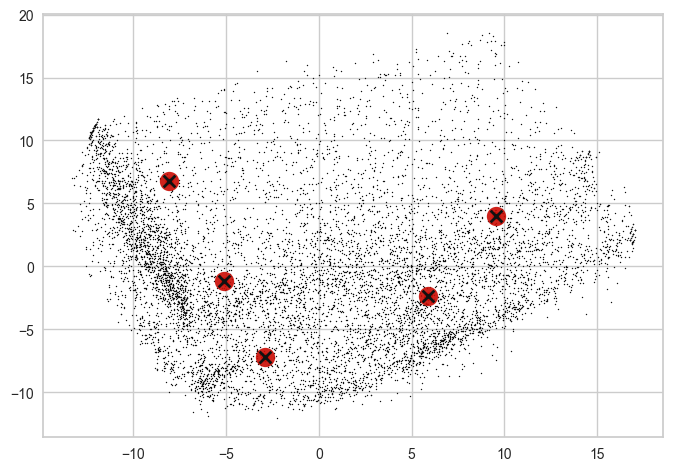

In [55]:
plot_data(X)
plot_centroids(kmeans.cluster_centers_)

#### Step 2 - Silhouette Score

Now we can get the KMeans Score to find out the `Silhouette Score`. `Silhouette Score `is a measure used to evaluate a clustering algorithm by assessing how well each object lies in the clusters. The Silhouette Score ranges from -1 to 1, where,
- Score 1 indicates that the object is well matched to its own cluster and poorly matched to the neighboring clusters.
- Score 0 indicates that the object is on the boundary between two clusters.
- Score -1 indicates that the object is poorly assigned to the wrong cluster. To get the `Silhouette Score` we can use the following code snippet.

KMeans Score for Clusters = 5

In [56]:
kmeans.score(X)

-688855.7935492143

Silhouette Score for Clusters = 5

In [57]:
silhouette_score(X, kmeans.labels_)

0.216488274397537

We are plotting the `Silhouette Score` for the KMeans clusters 1 to 20 which we tested earlier using the `Elbow Method` to find the optimal number of clusters.

In [58]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

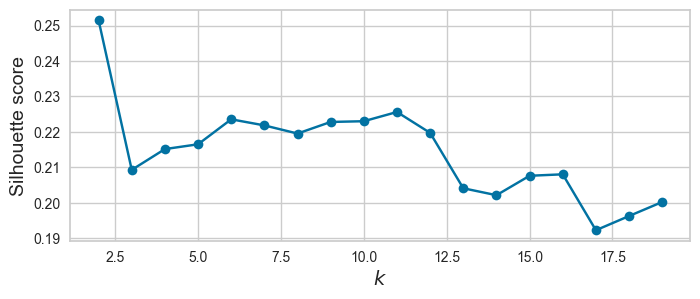

In [59]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 20), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

From the graph, we can see, that the clusters 1, and 5-11 have high `Silhouette Scores > 0`. Therefore, we can select the optimal number of clusters as 5, since it agrees to both `Elbow Method` and the `Silhouette Scores`.

Since the above graph does not show the variations of `Silhoutte Scores` well, we can use the following code to create graphs and find the optimal clusters and the Silhoutte Score values. This graph is called the `Silhouette Coefficient` graph. The wider the values, better the `Silhouette Score` is. The line shows the mean `Silhouette Coefficients`.

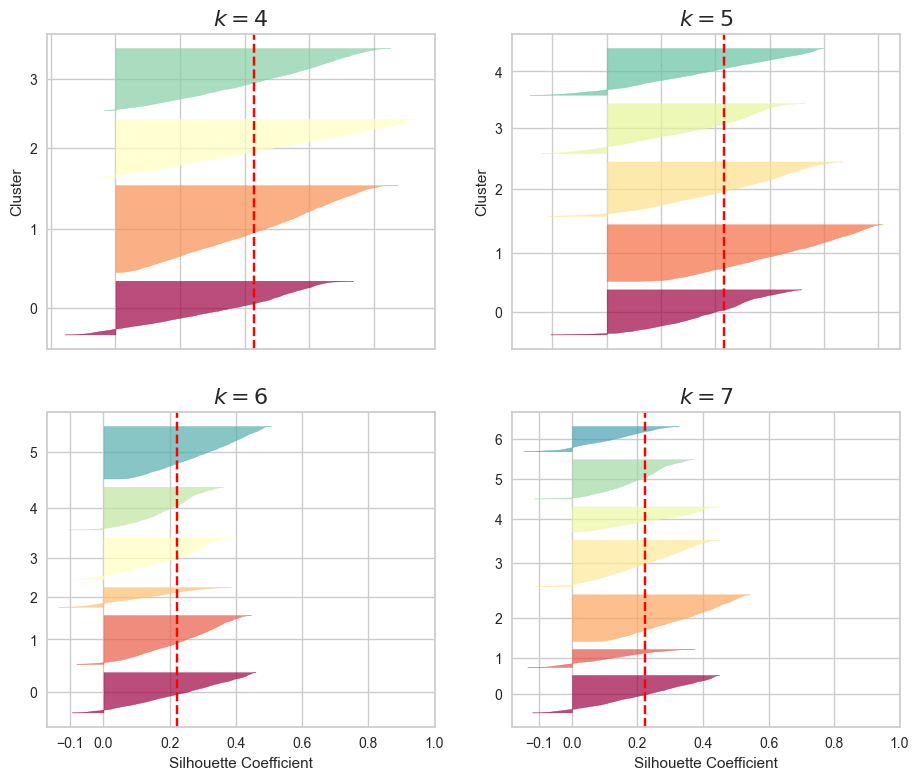

In [60]:
plt.figure(figsize=(11, 9))

for k in (4, 5, 6, 7):
    plt.subplot(2, 2, k - 3)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (4,5):
        plt.ylabel("Cluster")
    
    if k in (6,7):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
    
plt.show()

Therefore, the number of clusters we can select for the KMeans algorithm is 5.

## 1.4.2 Alternative Clustering Algorithms
Rather than using the KMeans algorithm, we can use other algorithms for clustering as well. The two of the clustering alternative clustering algorithms that were used in this project are,

-  **Mini-batch KMeans** → This is a variation of the traditional KMeans algorithm that is designed to work with large datasets. Instead of using the entire dataset to update the centroids, it uses random subsets or mini-batches of the data. The advantages of the Mini-batch KMeans are mentioned below.
    1. Efficiency → This is faster and more scalable than the traditional KMeans algorithm, making it optimal for large datasets.
    2. Less Memory Usage → Since it works with mini-batches of data it uses less memory.
    3. Good Results → In spite of its stochastic nature, it provides similar results to KMeans.
- **Density-Based Spatial Clusterings of Applications with Noise(DBScan)** → This is a density-based clustering algorithm that divides datasets into clusters based on density. The points in high-density are considered core points and those points are used for clustering. The advantages of DBSCAN are mentioned below.
    1. Robust to noise → This can effectively identify outliers and noise points in the dataset.
    2. No need to specify the number of clusters → Unlike KMeans. DBSCAN does not need to specify the number of clusters in advance.
    3. Handles Arbitrary Cluster Shapes → DBSCAN can identify clusters of arbitrary shapes and is not sensitive to outliers.

#### <u>Mini-batch KMeans</u>
First, let’s proceed with the Mini-batch KMeans and get the cluster labels. We can use the same `Elbow Method` to find the clusters and we can notice the optimal clusters, in this case, is 5 as well.

#### Step 1 - Elbow Method
Let's first find the optimal number of clusters using the `Elbow Method` for the Mini-batch KMeans algorithm.

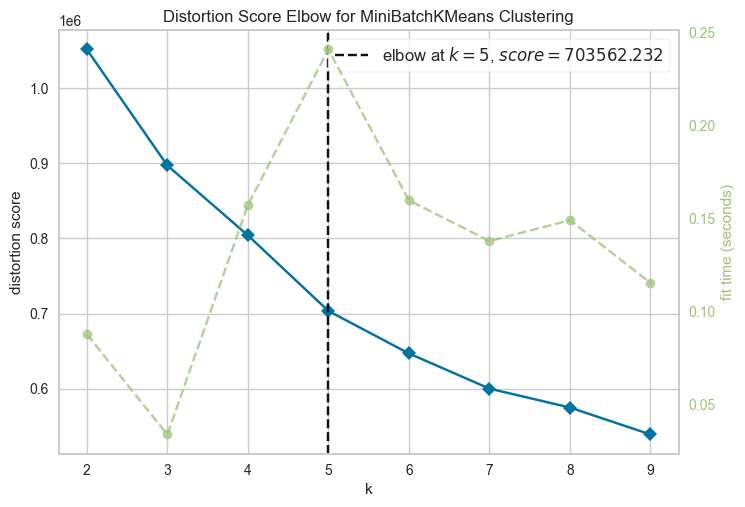

In [61]:
# Select the Model
model = MiniBatchKMeans(random_state=42)
# Get cluster-wise-inertias
minibatch_kmeans_per_k = [MiniBatchKMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 20)]
inertias = [model.inertia_ for model in minibatch_kmeans_per_k]

# Selet the KElbowVisualizer from Yellowbrick library
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df_pca_scaled)
visualizer.show()
plt.show()

After selecting the optimal number of clusters(in my case its 5) we can fit and predict it to get the associated labels in the dataset.

In [62]:
# Mini-batch KMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [63]:
labels = minibatch_kmeans.labels_

In [64]:
labels.shape

(8950,)

After getting the labels we can check for the centroids of the data set as well.

In [65]:
minibatch_kmeans.cluster_centers_

array([[-5.19084583e+00, -1.19426375e+00,  8.16943580e-01,
        -3.71420311e+00, -1.46543561e+00, -4.35690324e-01,
        -5.88458174e-01,  3.76911205e-01,  4.53440511e-02,
        -5.00463997e-02,  3.08950389e-02,  4.65548721e-02,
        -1.14819068e-01, -5.09248295e-02, -9.39742871e-02,
        -1.11266487e-02,  3.09995439e-02],
       [ 5.43475243e+00,  1.12152408e+00, -4.41076156e+00,
        -1.38937399e+00,  8.74237232e-01,  4.99633800e-01,
         1.58684335e-01, -1.92880390e-01, -1.18042278e-01,
         2.92432931e-01,  1.95809056e-02, -1.55701793e-01,
         2.91559143e-01, -1.01242787e-01,  6.85568424e-02,
         6.32259245e-03,  1.59384387e-02],
       [-8.40098697e+00,  6.75694549e+00, -6.37968336e-01,
         2.45643260e+00, -3.67635657e-01,  2.39036696e-01,
         2.58552511e-01, -1.25713448e-01,  1.78991420e-01,
         5.25529342e-02,  1.30646367e-01, -2.18004717e-02,
         7.99276759e-02,  1.21265322e-02,  1.73401377e-02,
         3.18752212e-02,  1.6

We can further analyze labels to extract more data about the centroids as well.

In [66]:
minibatch_kmeans.cluster_centers_.shape

(5, 17)

In [67]:
df_cluster = pd.concat([df_pca_scaled, pd.DataFrame(labels, columns=['cluster'])],axis=1)
df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        4  
1  4103.032597       1072.340217          0.222222      12        2  
2   622.066742        627.284787          0.000000      12        3  
3     0.000000        864.206542          0.000000      12        4  
4   678.334763        244.791237          0.000000      12        0

Let’s plot the graphs to see the predictions more clearly.

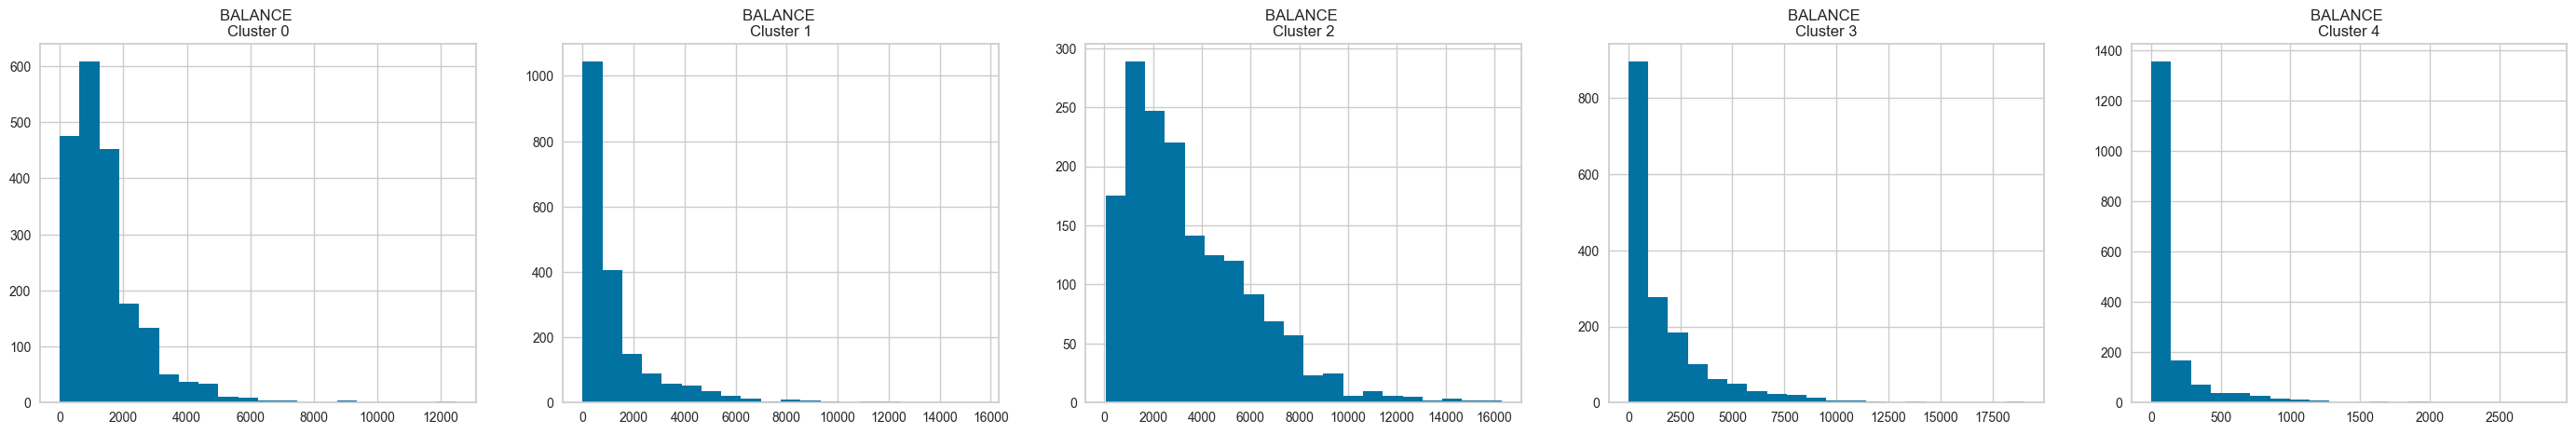

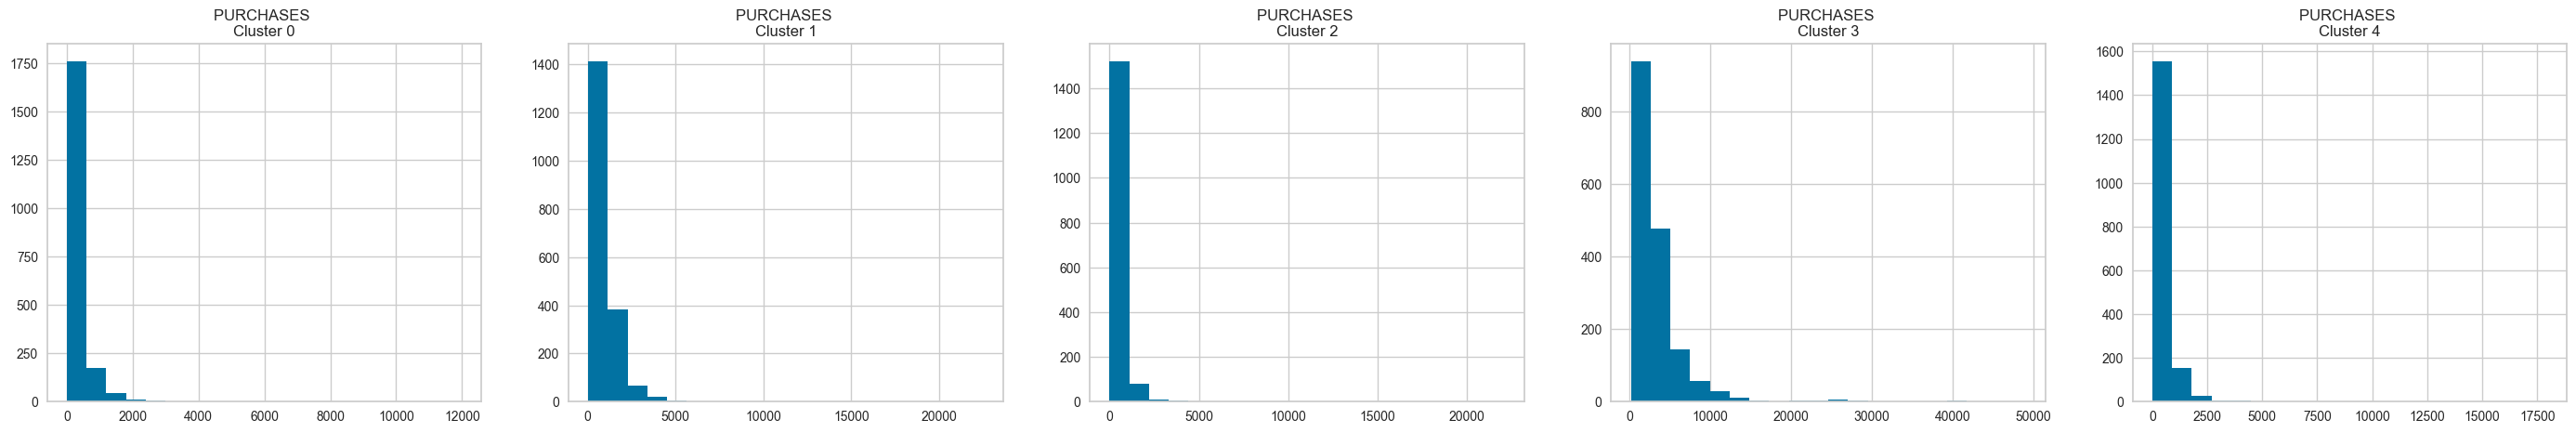

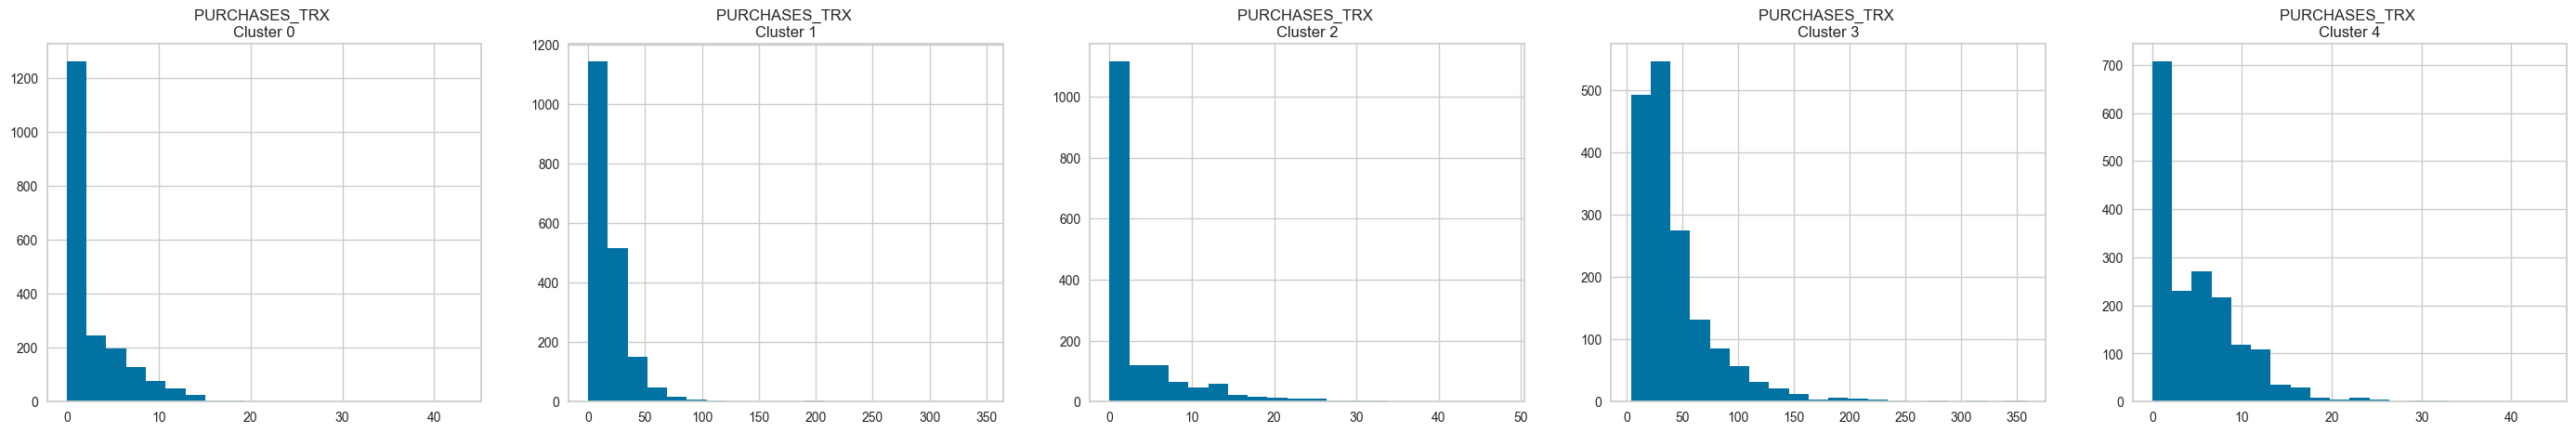

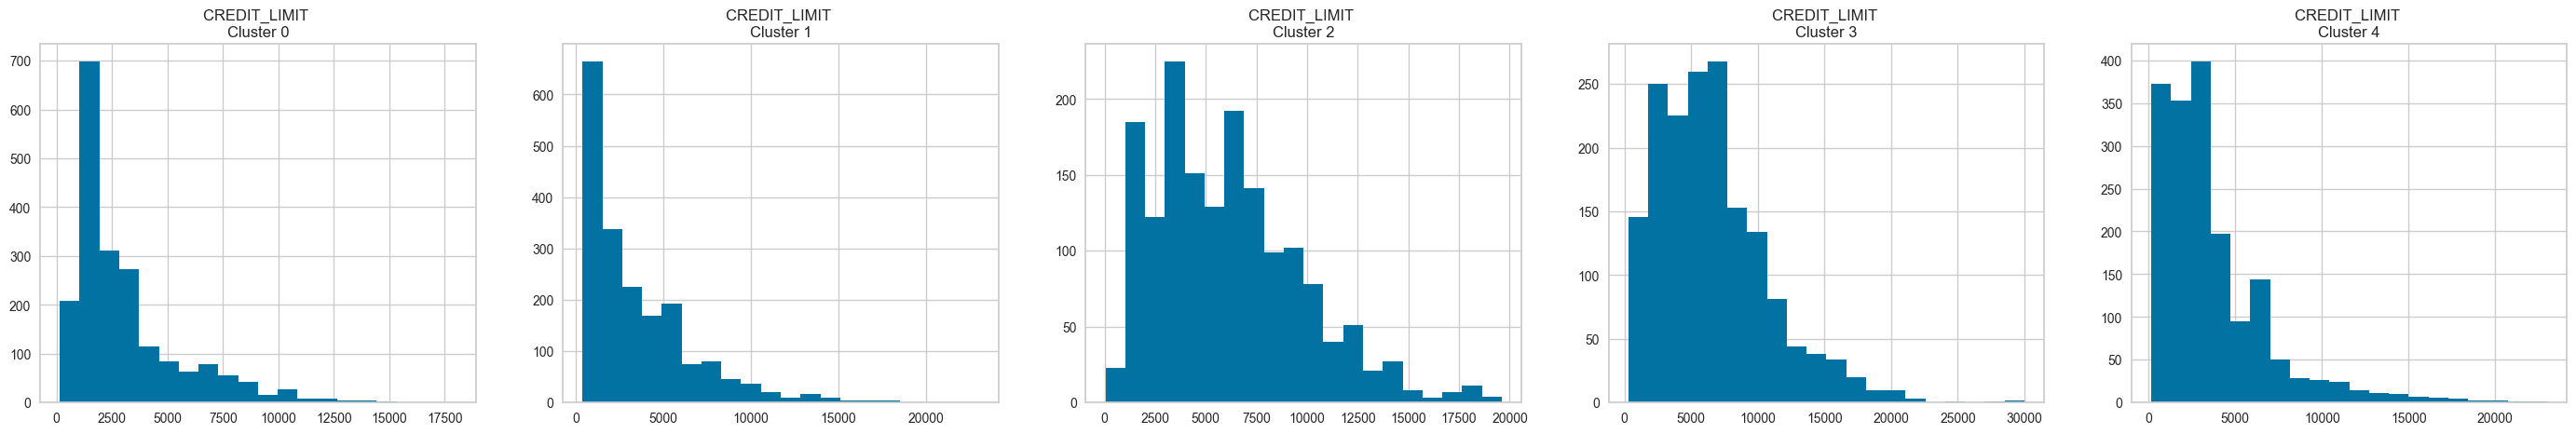

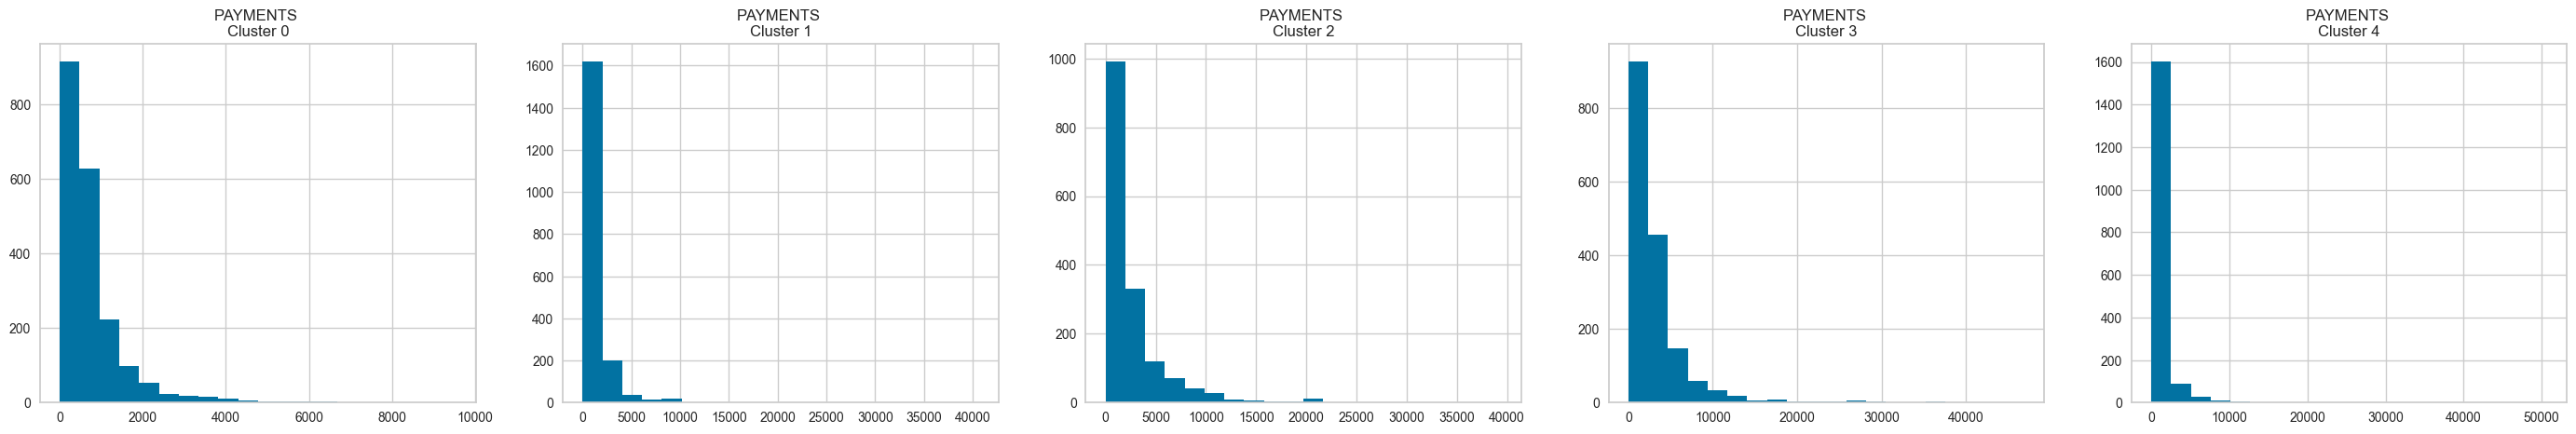

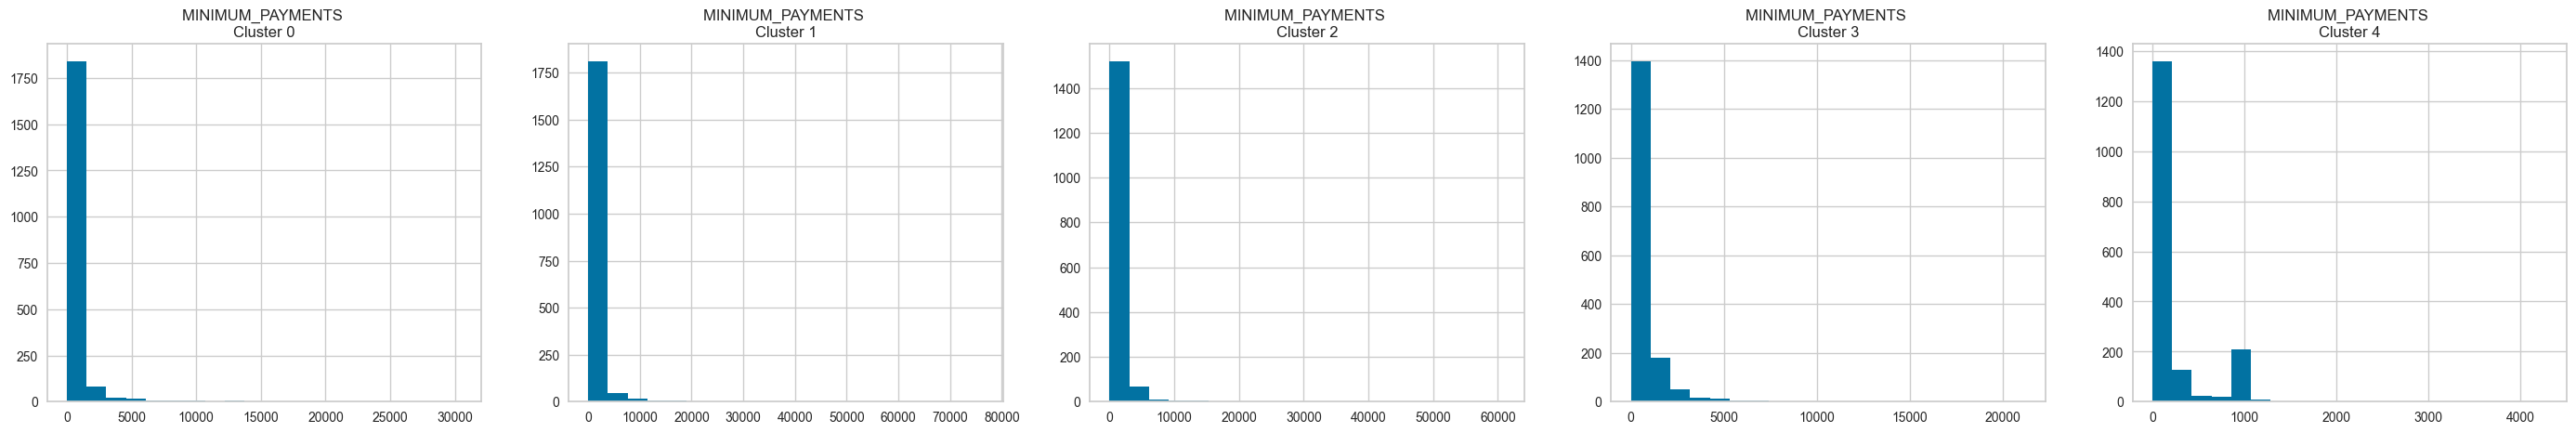

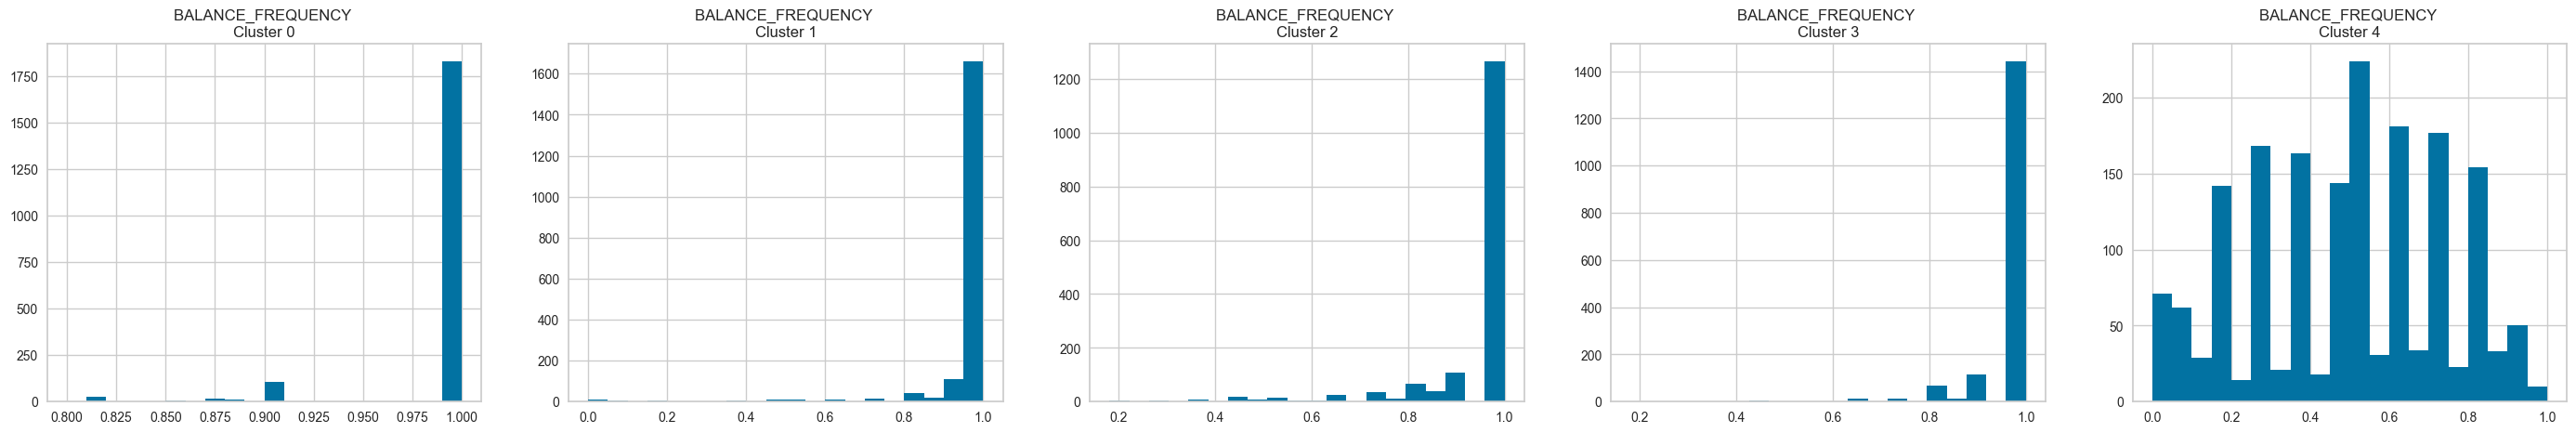

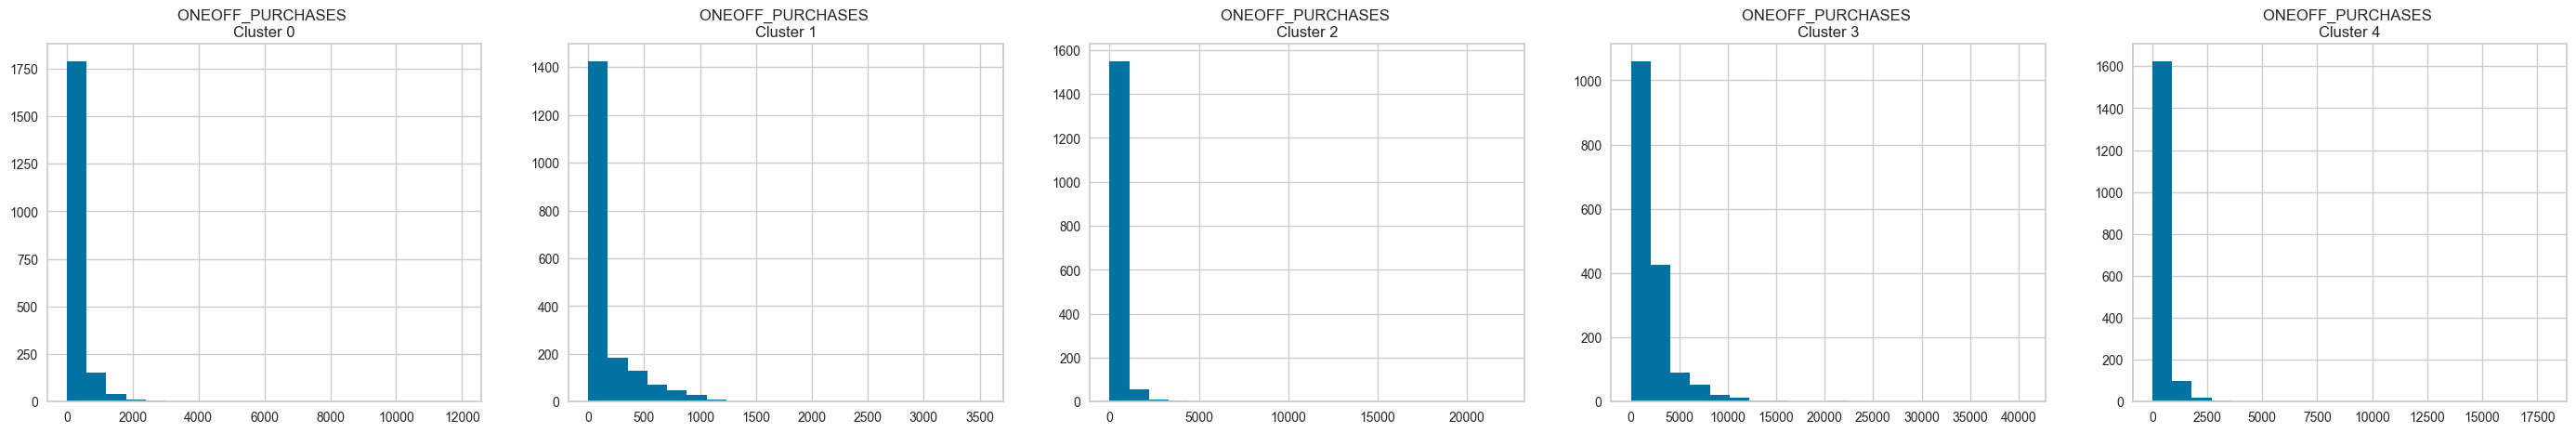

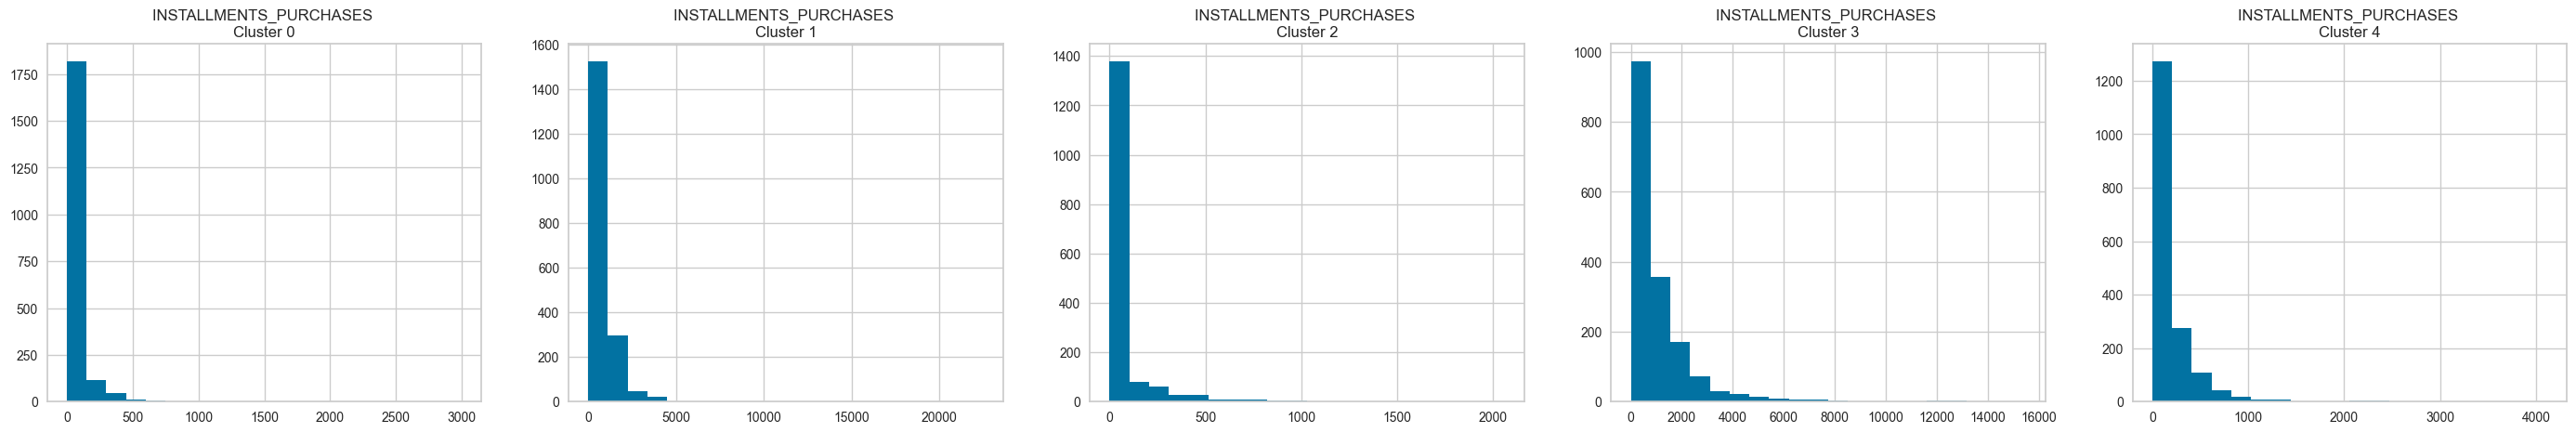

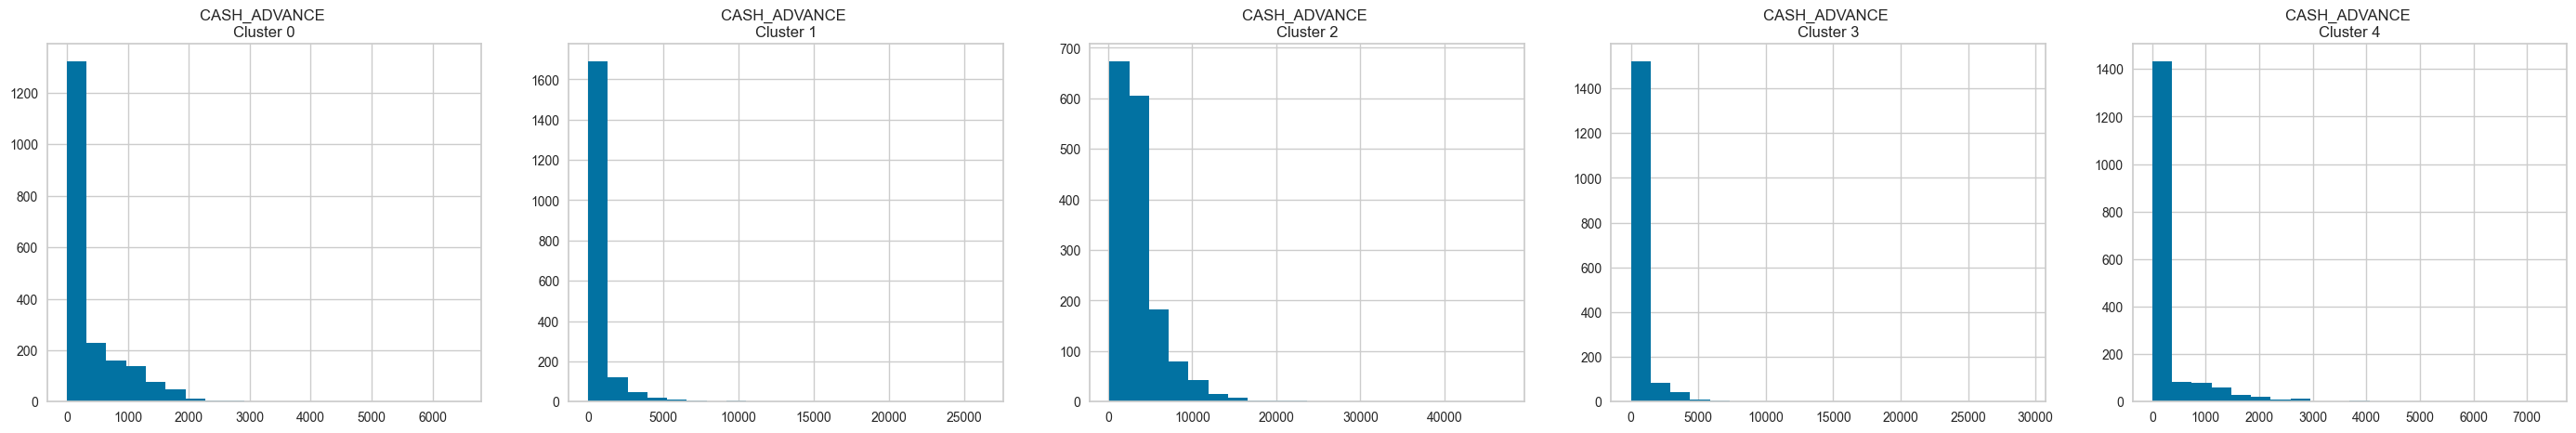

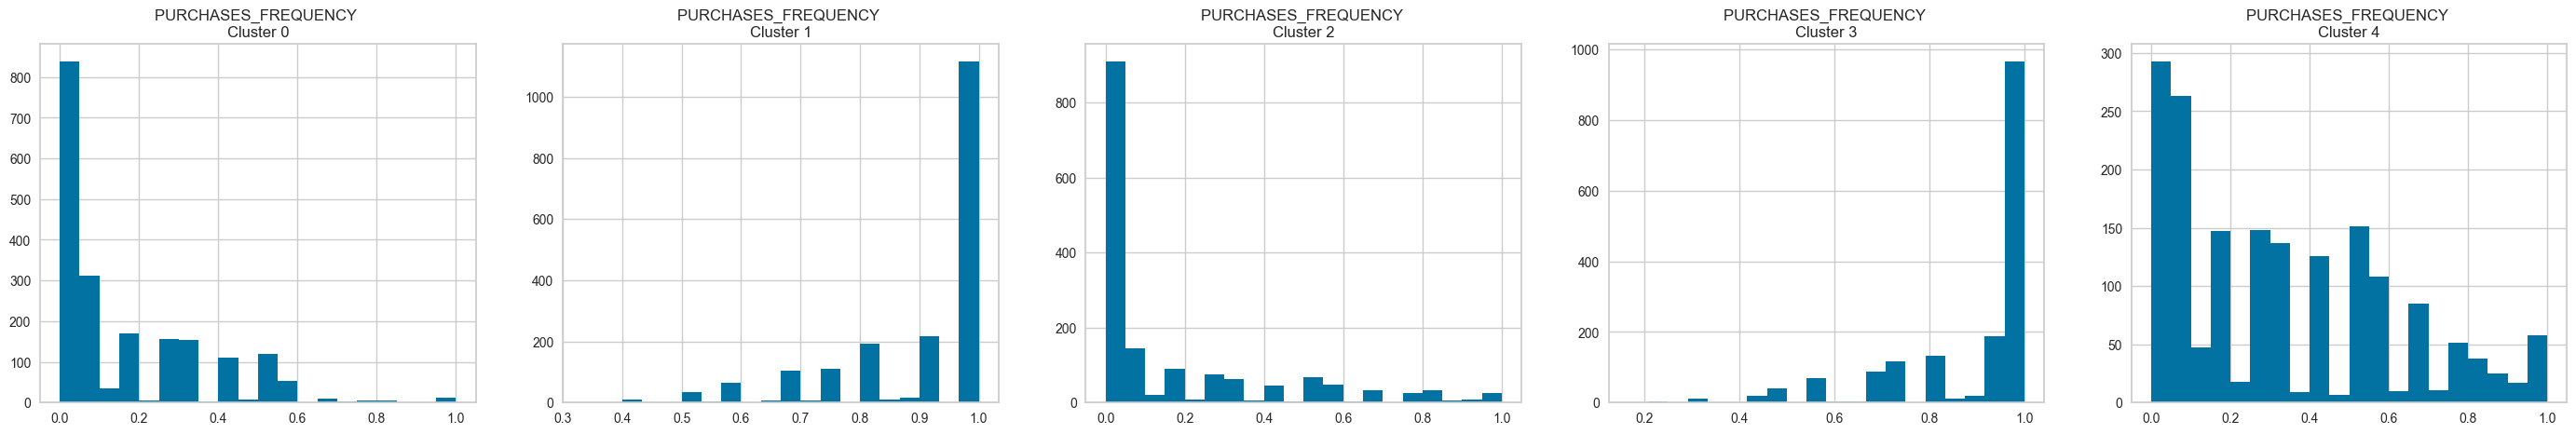

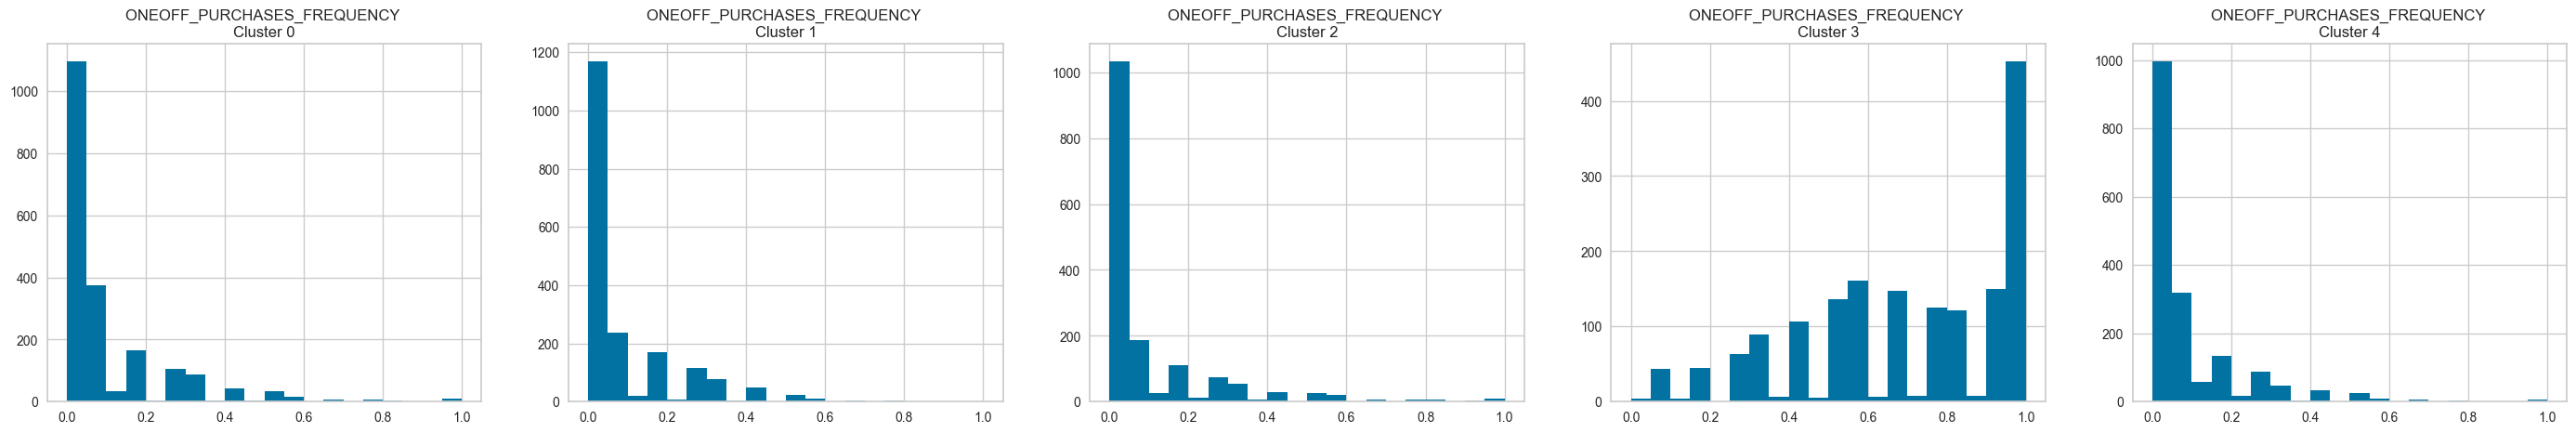

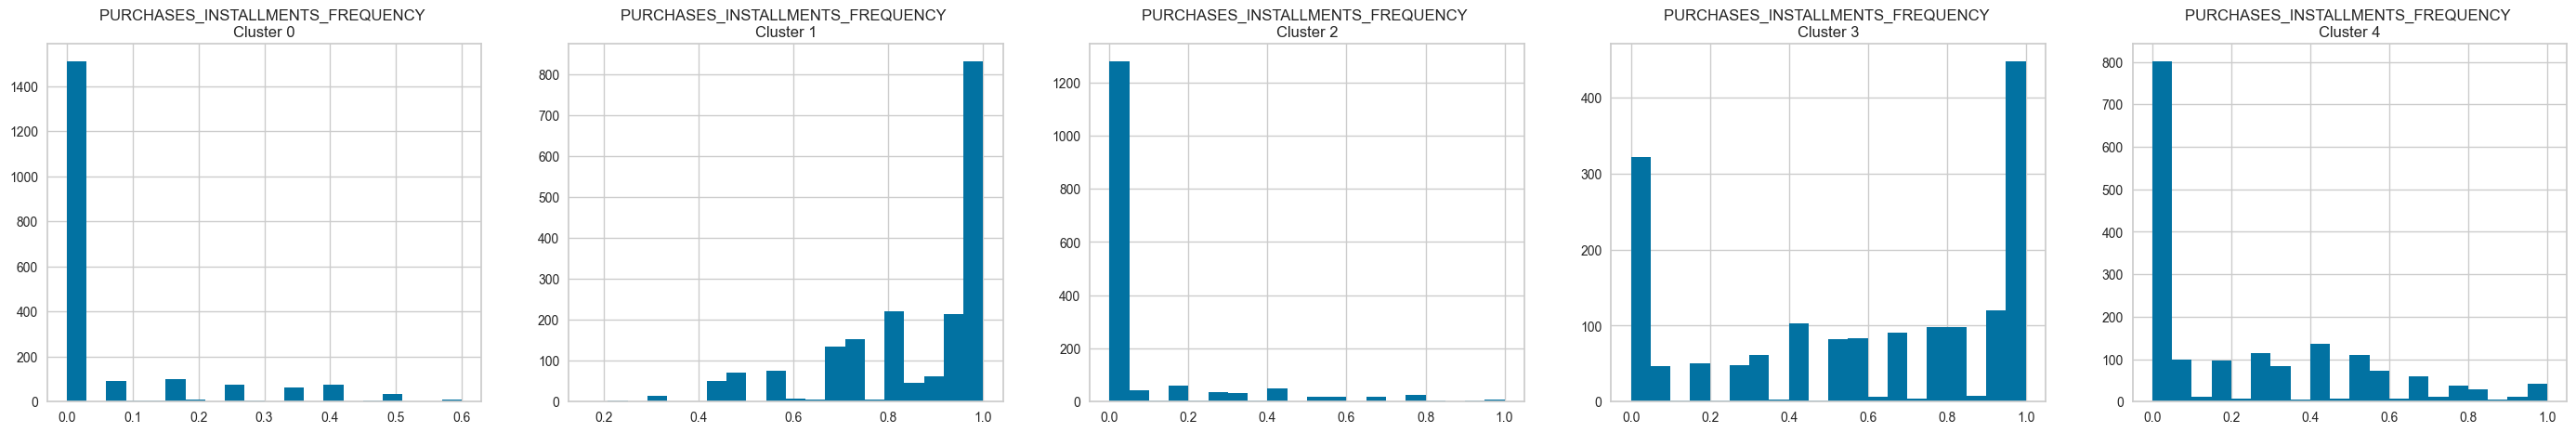

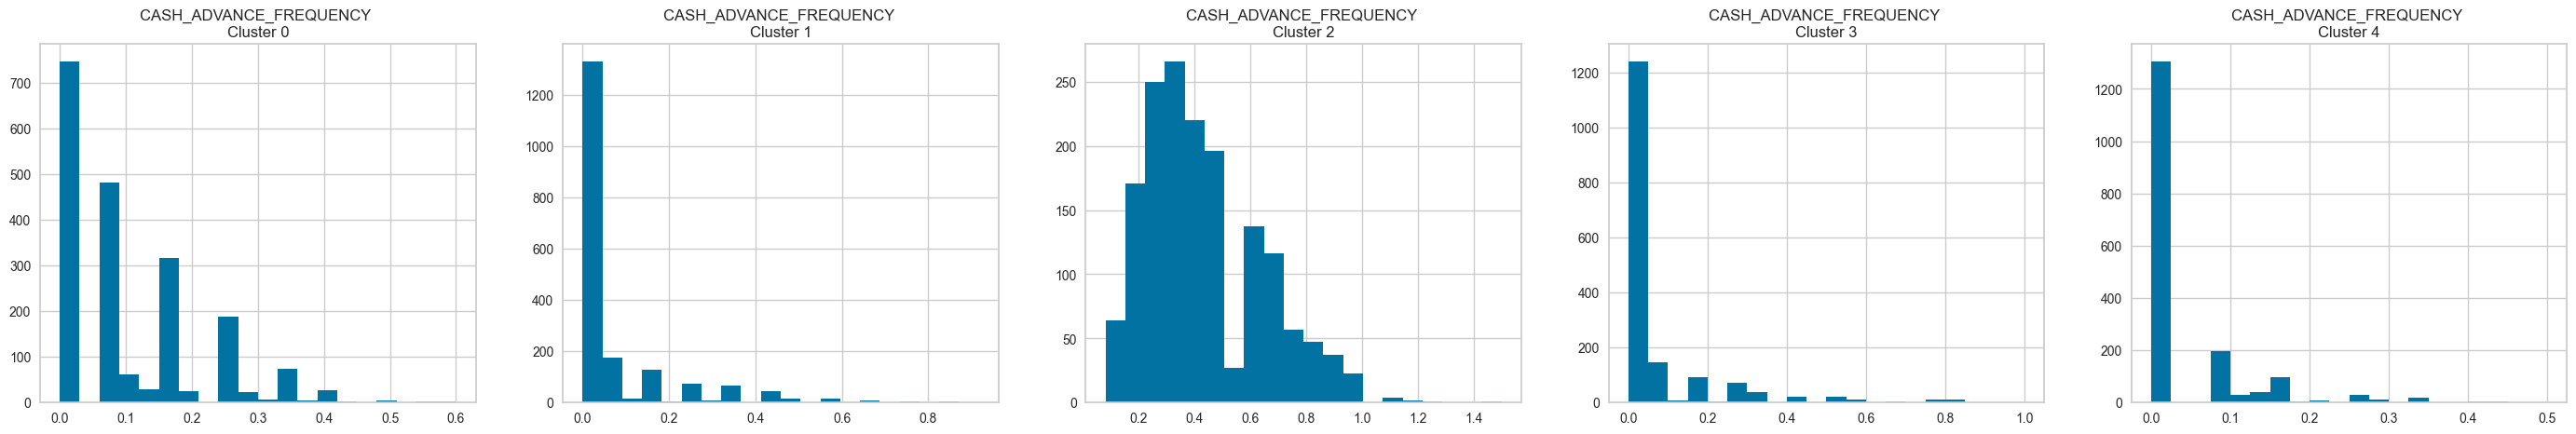

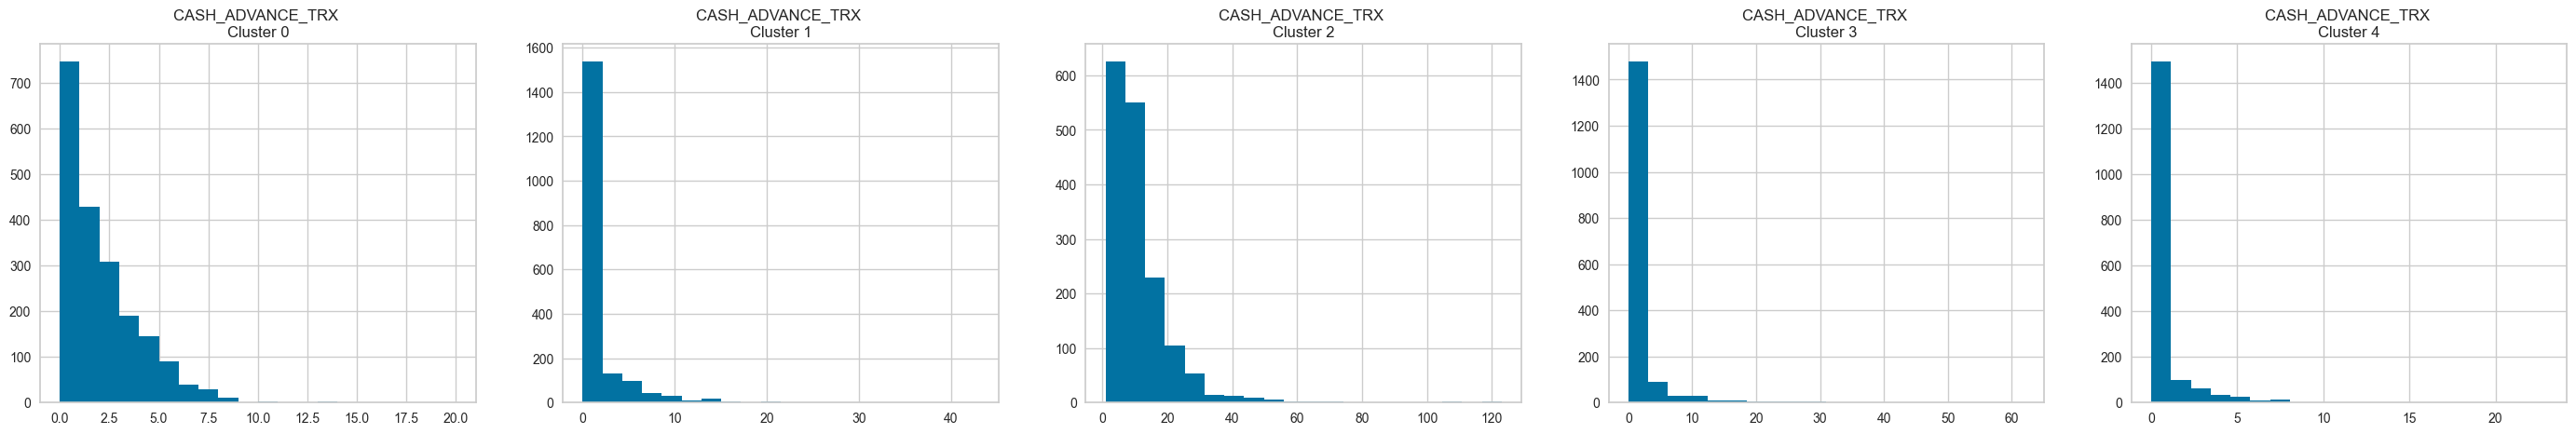

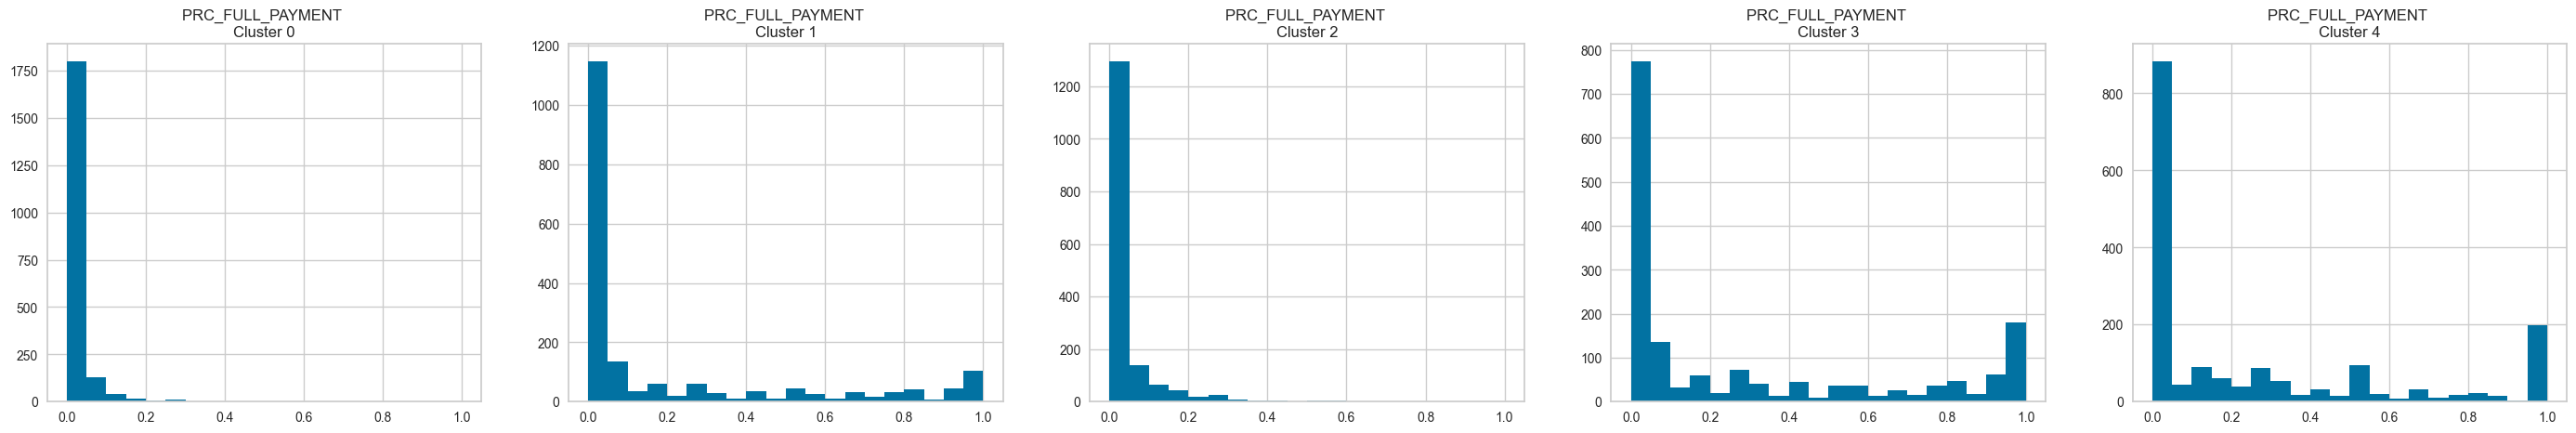

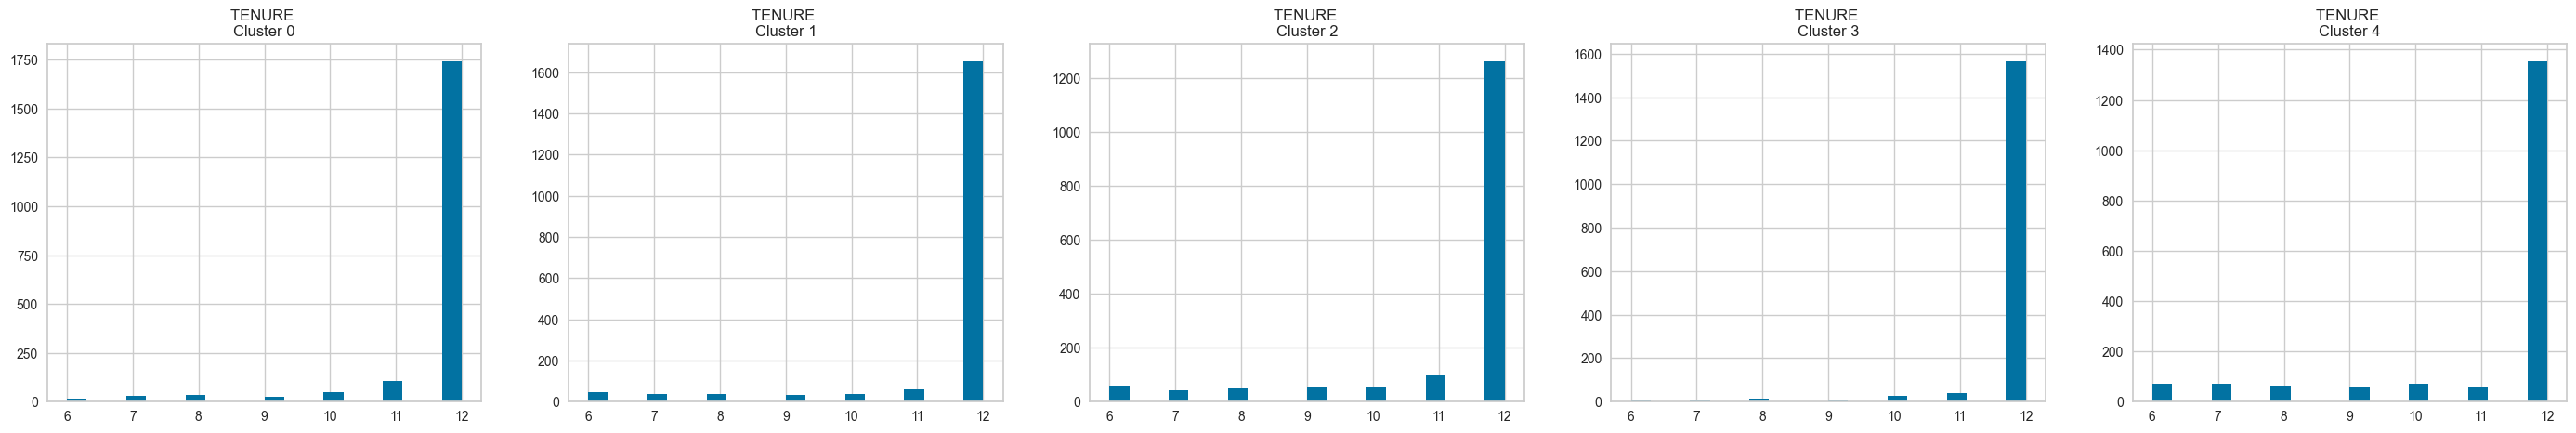

In [68]:
for i in df_pca_scaled:
    plt.figure(figsize=(35,5))
    for j in range(5):
        plt.subplot(1,5,j+1)
        cluster = df_cluster[df_cluster['cluster']==j]
        cluster[i].hist(bins=20)
        plt.title(f'{i} \nCluster {j}')
    plt.show()

Let's check the Mini-batch KMeans inertia and score as well.

In [69]:
minibatch_kmeans.inertia_

719608.4544140967

#### Step 2 - Silhouette Score

KMeans Score for Clusters = 5

In [70]:
minibatch_kmeans.score(X)

-719608.4544140967

Silhouette Score for Clusters = 5

In [71]:
silhouette_score(X, minibatch_kmeans.labels_)

0.20769327678276242

We are plotting the `Silhouette Score` for the Mini-batch KMeans clusters 1 to 20 which we tested earlier using the `Elbow Method` to find the optimal number of clusters.

In [72]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in minibatch_kmeans_per_k[1:]]

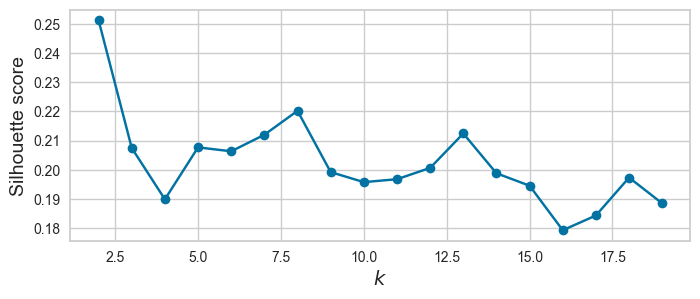

In [73]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 20), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

Plot `Silhouette Coefficients` graph.

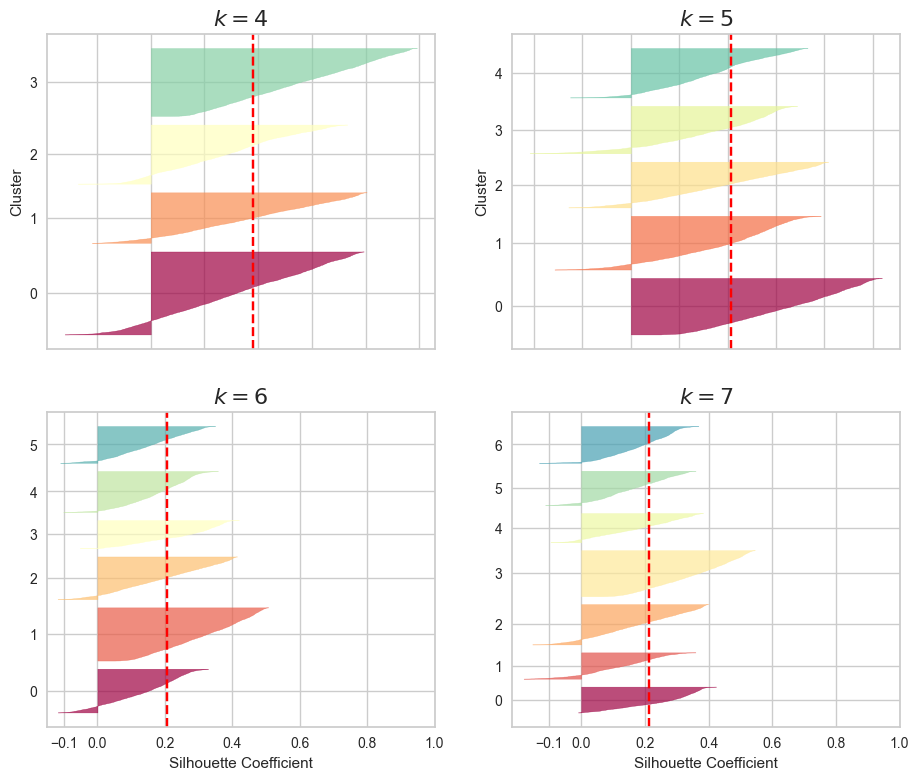

In [74]:
plt.figure(figsize=(11, 9))

for k in (4, 5, 6, 7):
    plt.subplot(2, 2, k - 3)
    
    y_pred = minibatch_kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (4,5):
        plt.ylabel("Cluster")
    
    if k in (6,7):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
    
plt.show()

#### <u>Density-Based Spatial Clusterings of Applications with Noise(DBScan)</u>
First, let’s proceed with the DBSCAN and get the cluster labels.

#### Step 1 - Silhoutte Scores

In [75]:
# DBSCAN
for eps in range(1, 10):
    for min_samples in range (1, 10):    
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        labels = dbscan.fit_predict(df_pca_scaled)
        score = silhouette_score(X, labels)

        # We need to at least have the silhouette score > 0 
        if(score > 0):
            print(f'\neps {eps}')
            print(f'\nmin samples {min_samples}')
            print(f'clusters present: {np.unique(labels)}')
            print(f'clusters sizes: {np.bincount(labels + 1)}')
            print(f'Silhouette Score: {score}')


eps 1

min samples 1
clusters present: [   0    1    2 ... 8140 8141 8142]
clusters sizes: [0 1 1 ... 1 1 1]
Silhouette Score: 0.038647184062067075

eps 5

min samples 7
clusters present: [-1  0]
clusters sizes: [1188 7762]
Silhouette Score: 0.08605581206812085

eps 6

min samples 4
clusters present: [-1  0  1  2]
clusters sizes: [ 365 8578    3    4]
Silhouette Score: 0.0450578006950032

eps 6

min samples 6
clusters present: [-1  0]
clusters sizes: [ 454 8496]
Silhouette Score: 0.1011788233398261

eps 6

min samples 7
clusters present: [-1  0]
clusters sizes: [ 482 8468]
Silhouette Score: 0.10285223752204822

eps 6

min samples 8
clusters present: [-1  0]
clusters sizes: [ 514 8436]
Silhouette Score: 0.10241549471191899

eps 6

min samples 9
clusters present: [-1  0]
clusters sizes: [ 544 8406]
Silhouette Score: 0.10006226476577831

eps 7

min samples 4
clusters present: [-1  0  1]
clusters sizes: [ 157 8789    4]
Silhouette Score: 0.051500691059250474

eps 7

min samples 5
clusters

From the above values we can see the best clustering value is given at `eps=8` and `min_samples=2`.

In [76]:
# Optimal DBSCAN Model
db = DBSCAN(eps=8, min_samples=2).fit(df_pca_scaled)
labels = db.labels_

In [77]:
df_cluster['clusterDBSCAN'] = labels.astype(float)

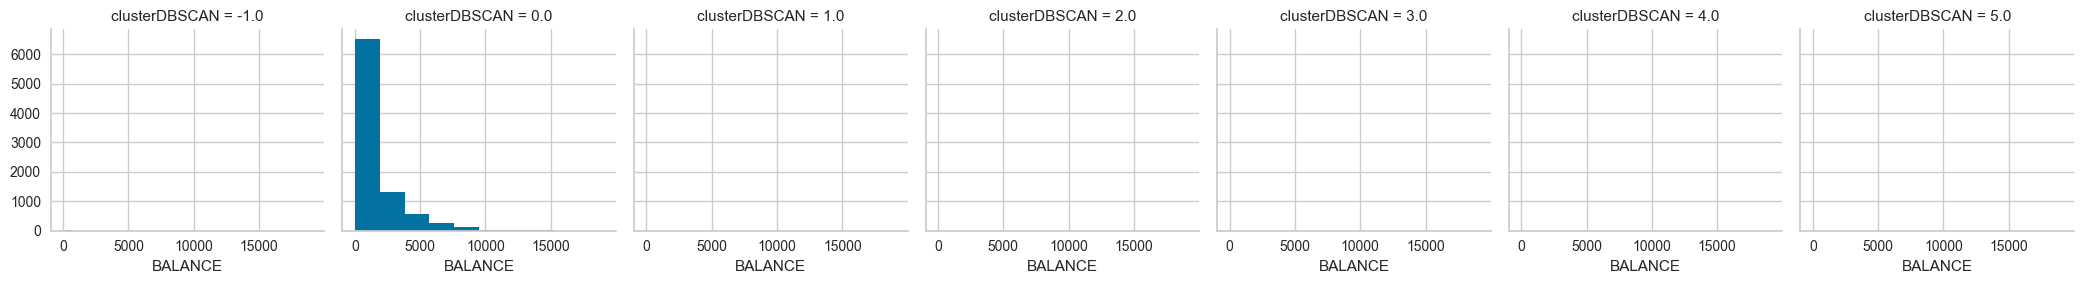

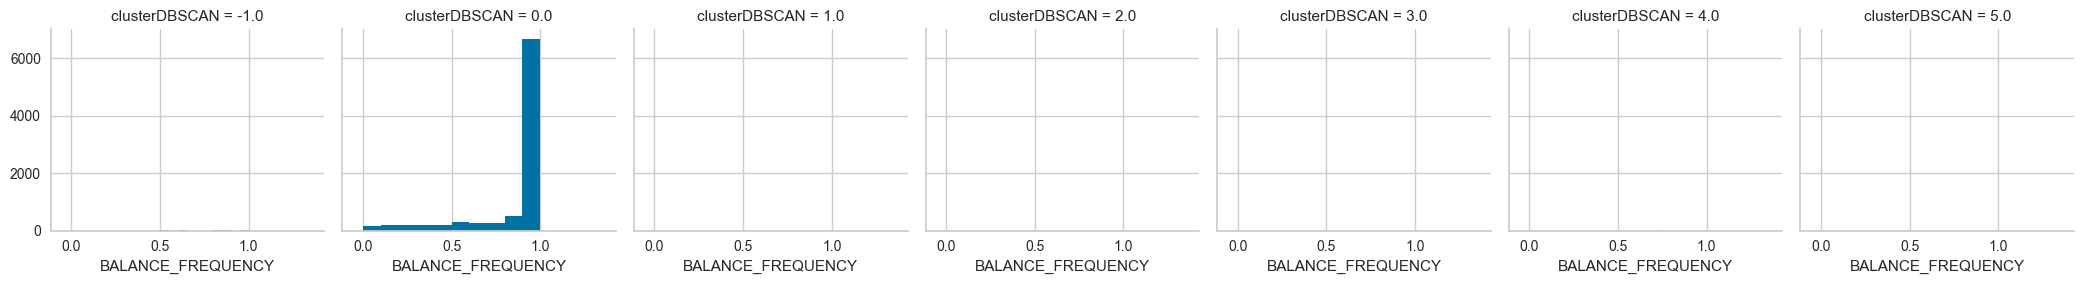

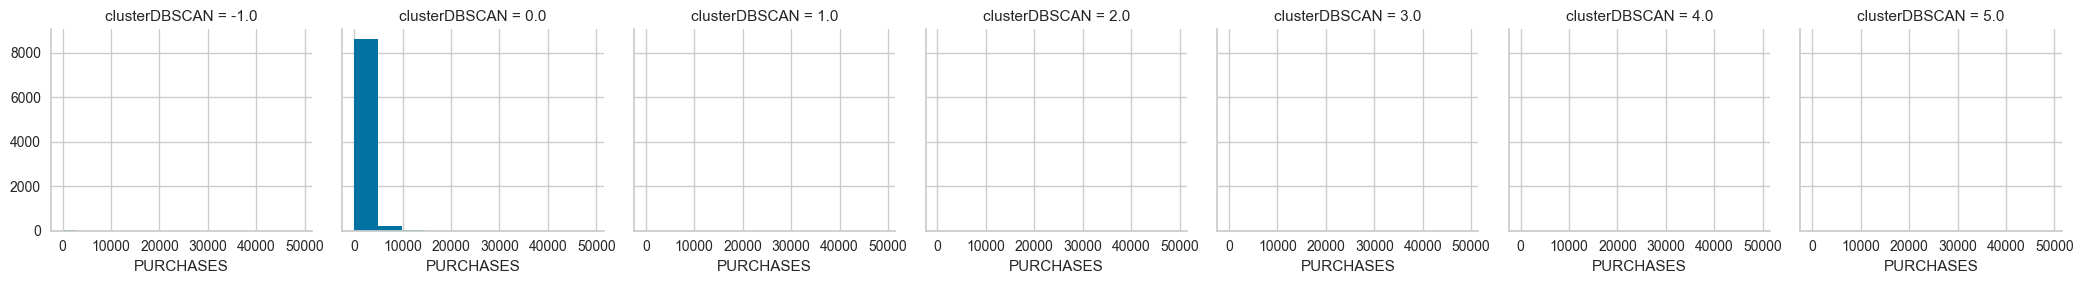

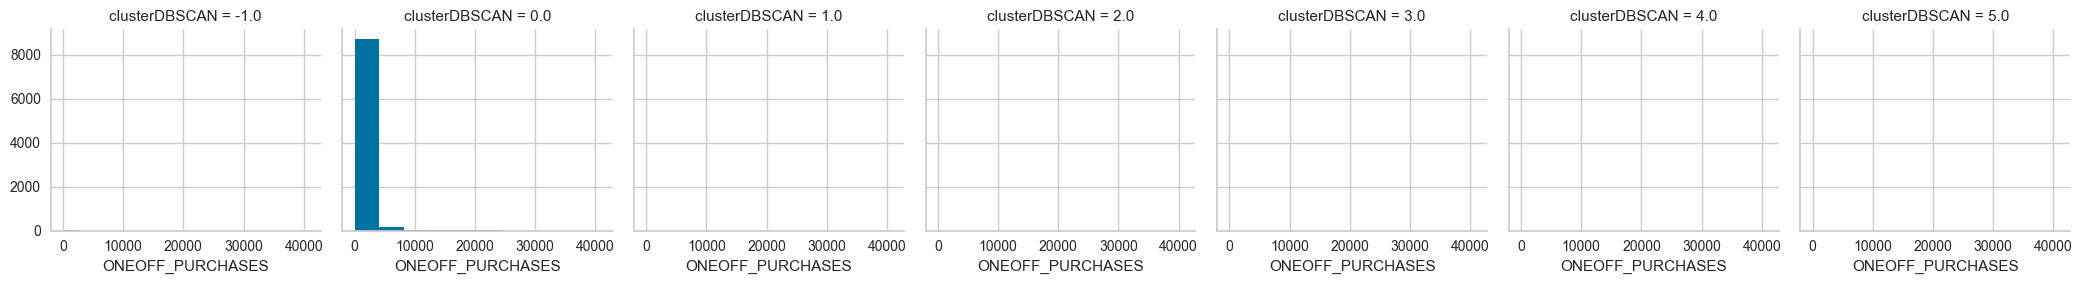

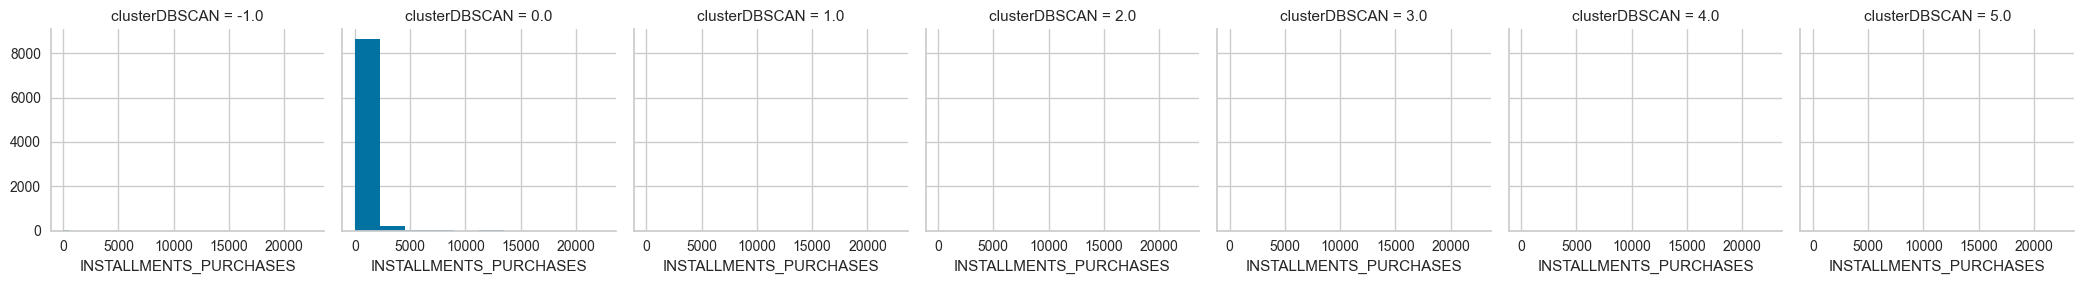

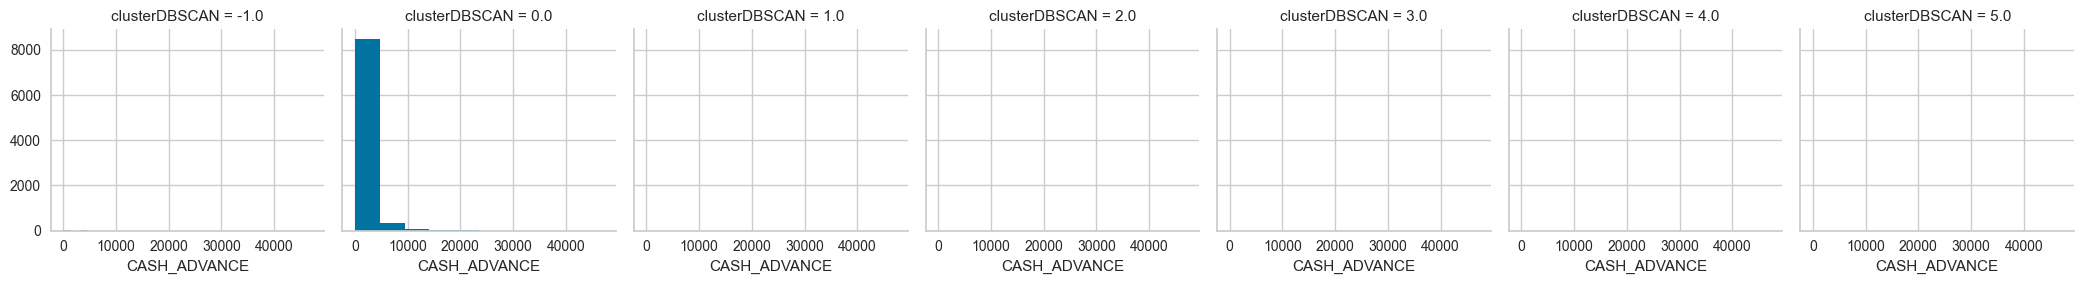

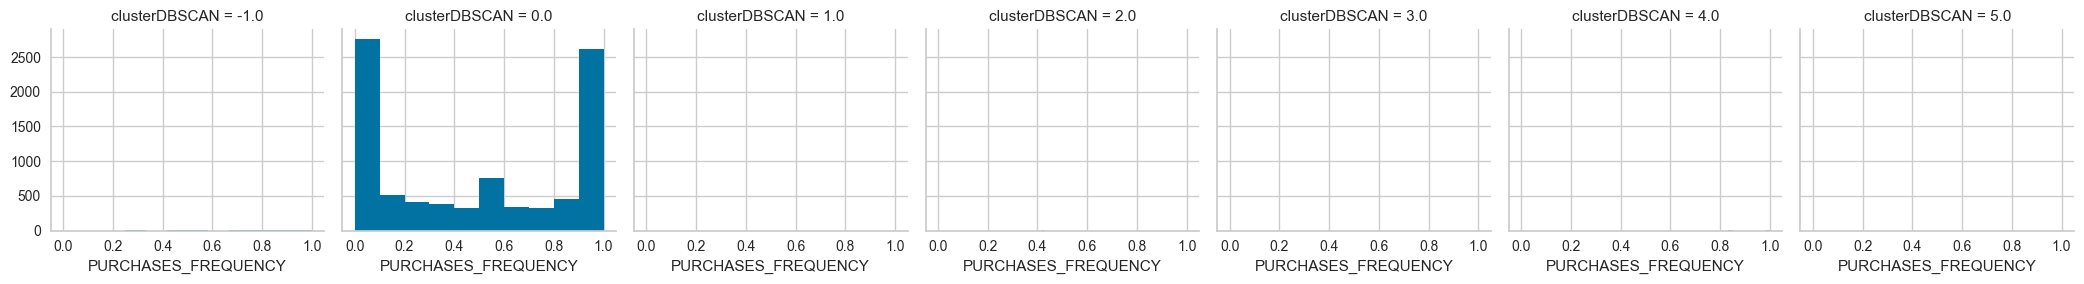

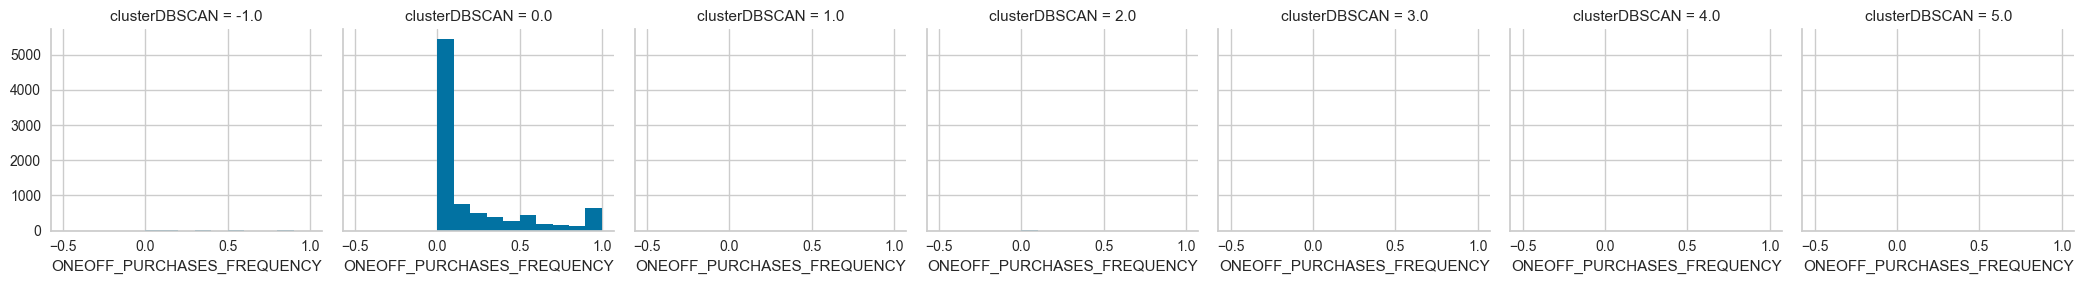

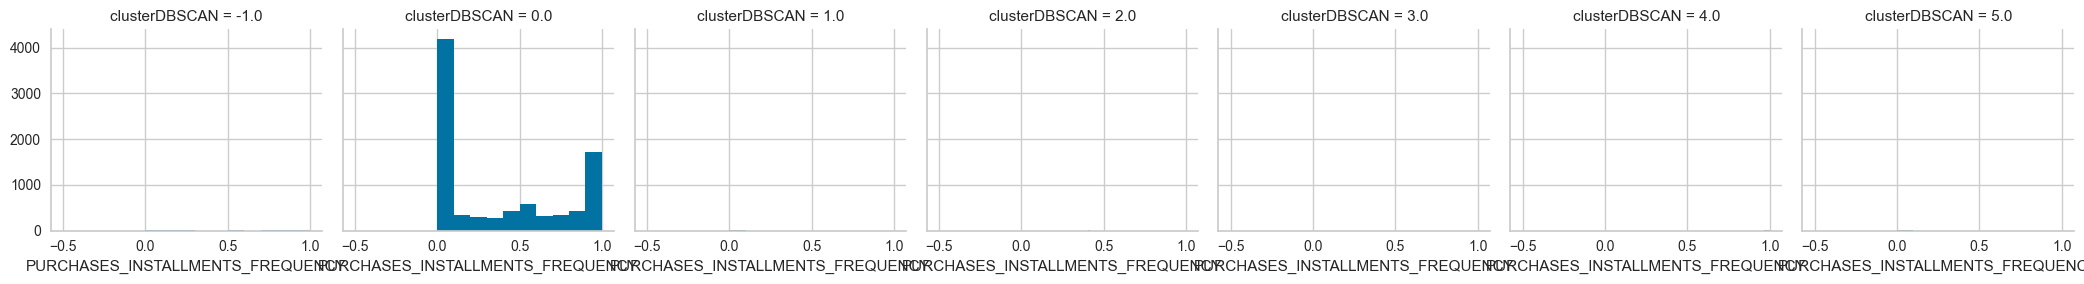

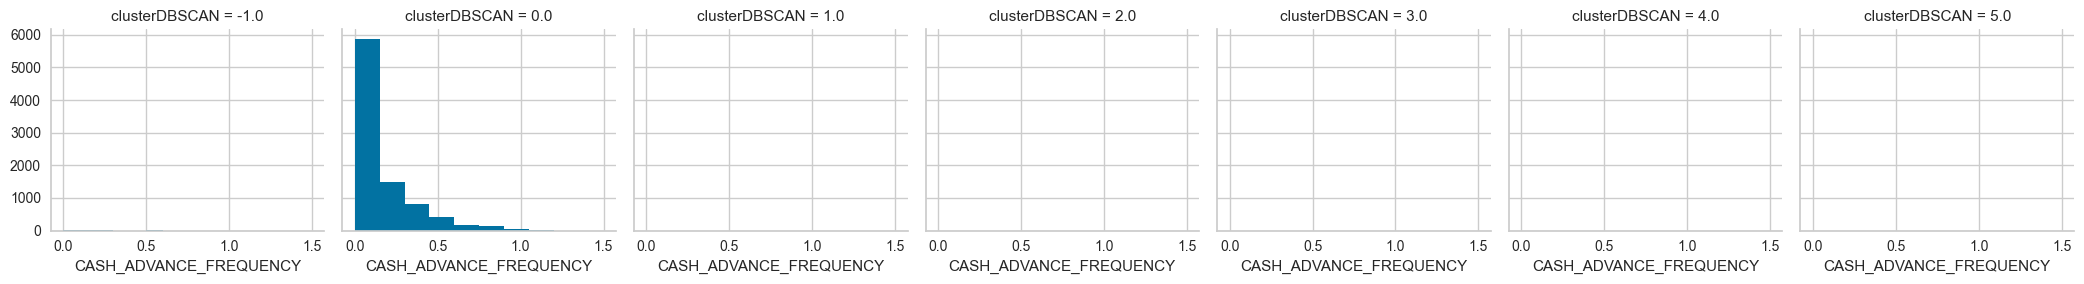

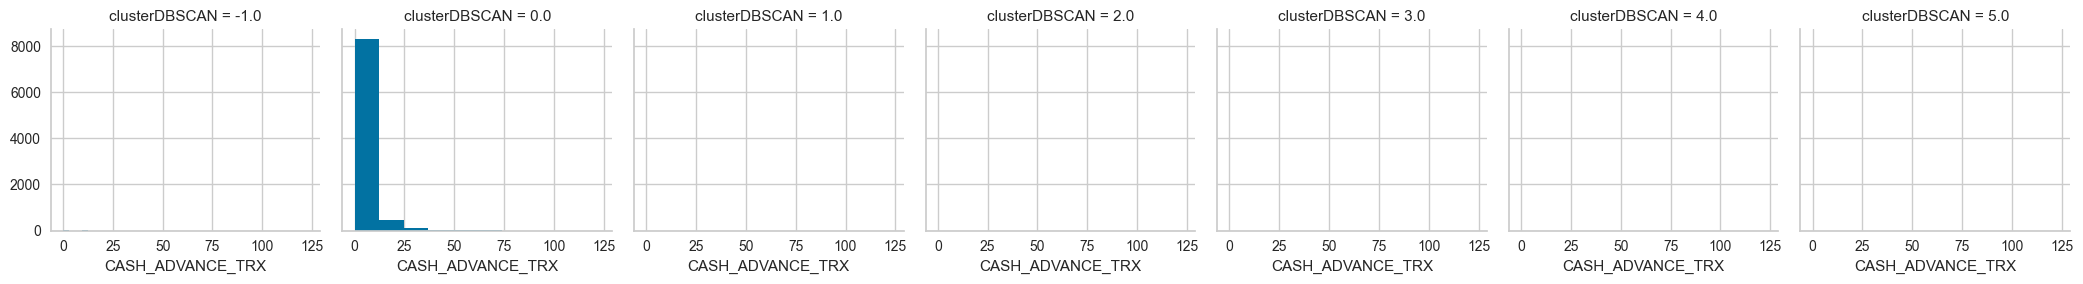

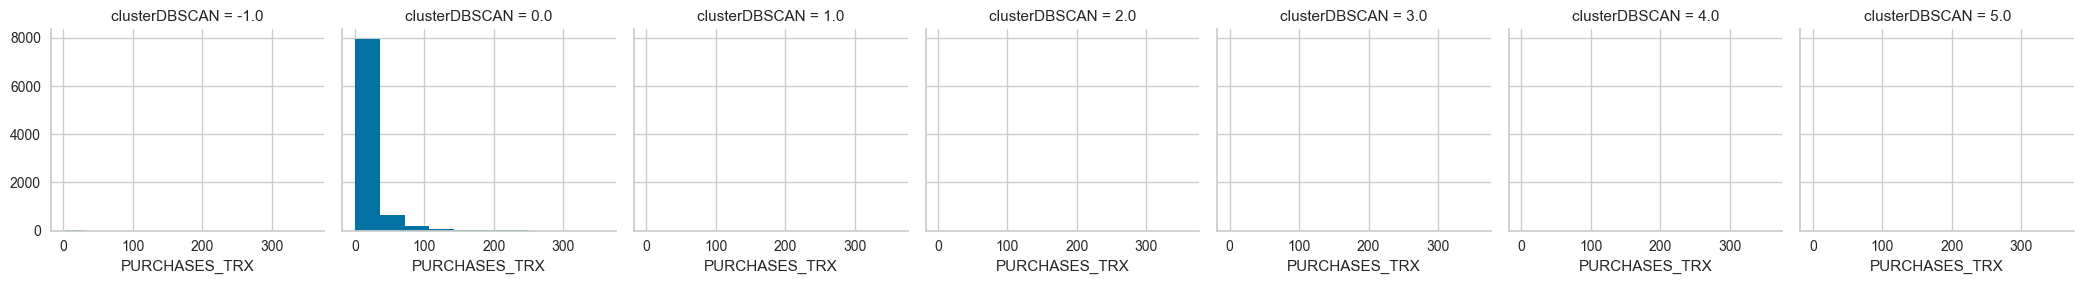

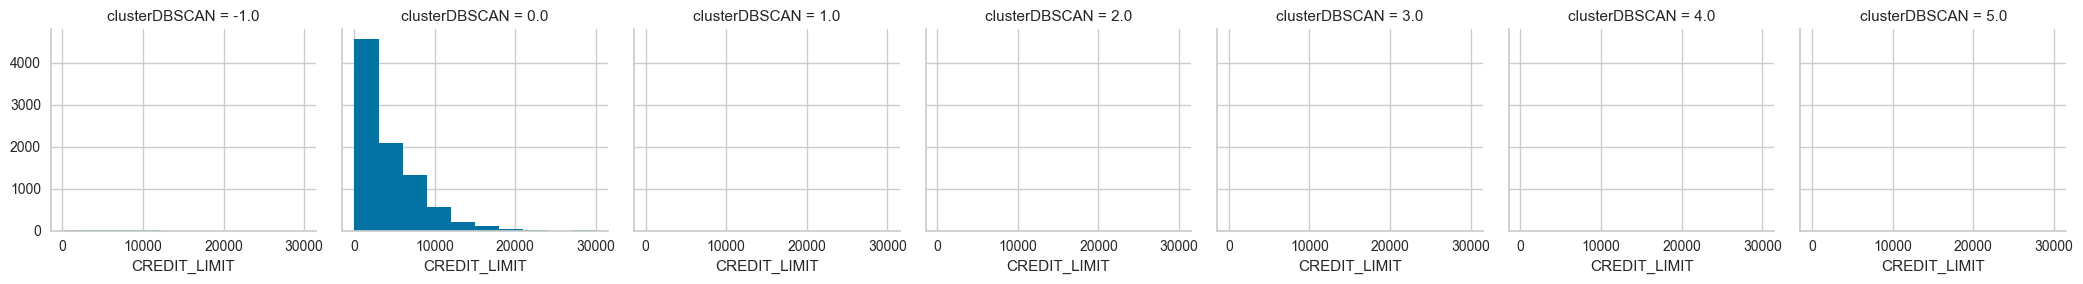

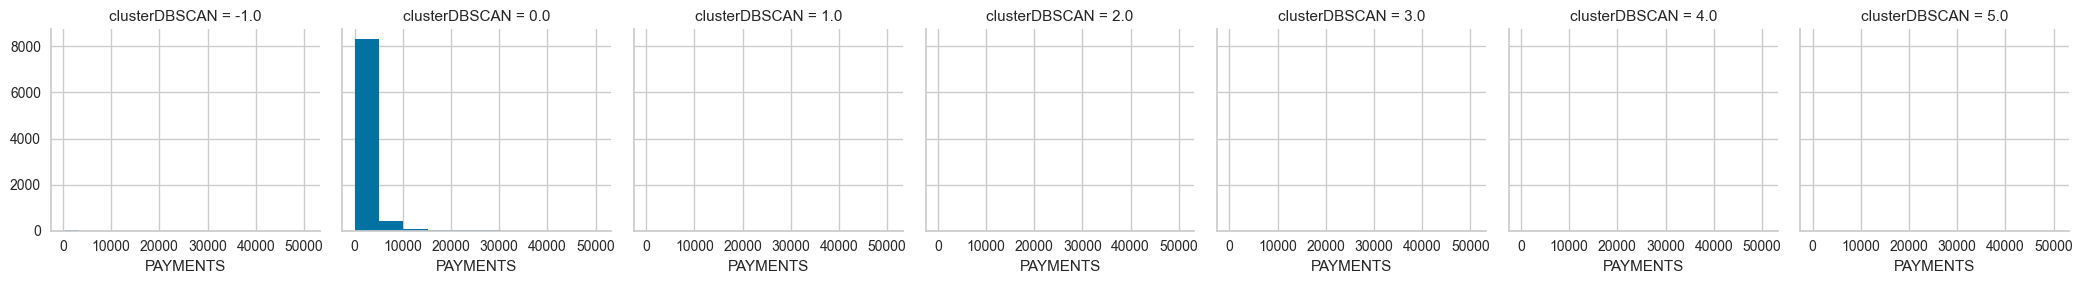

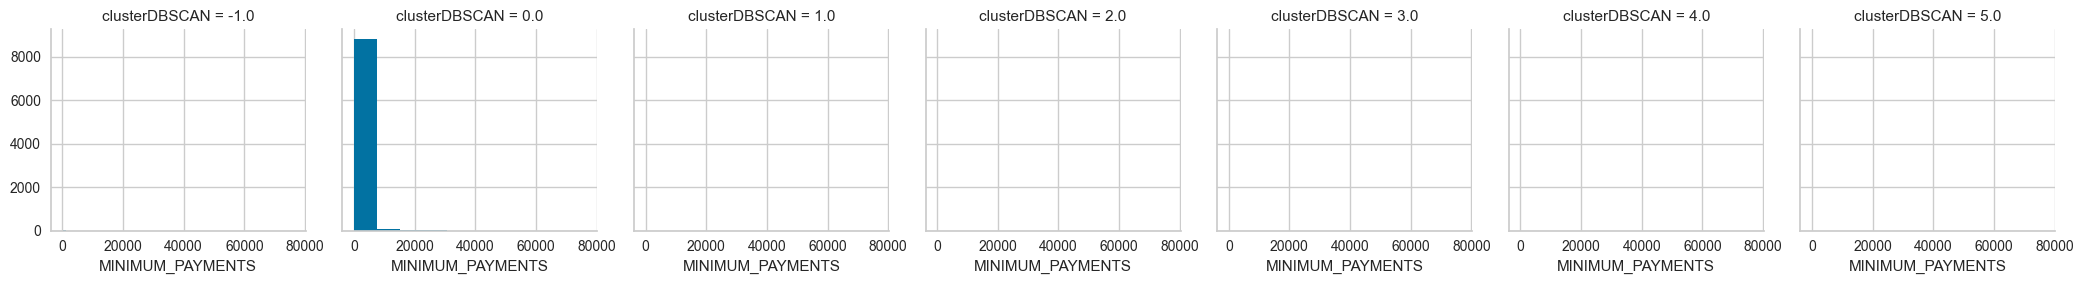

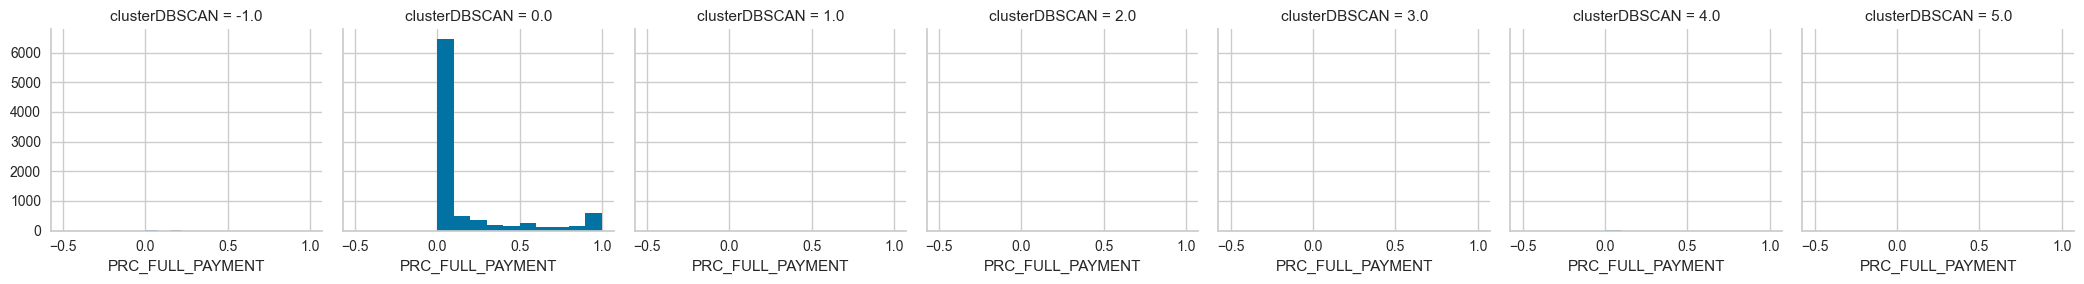

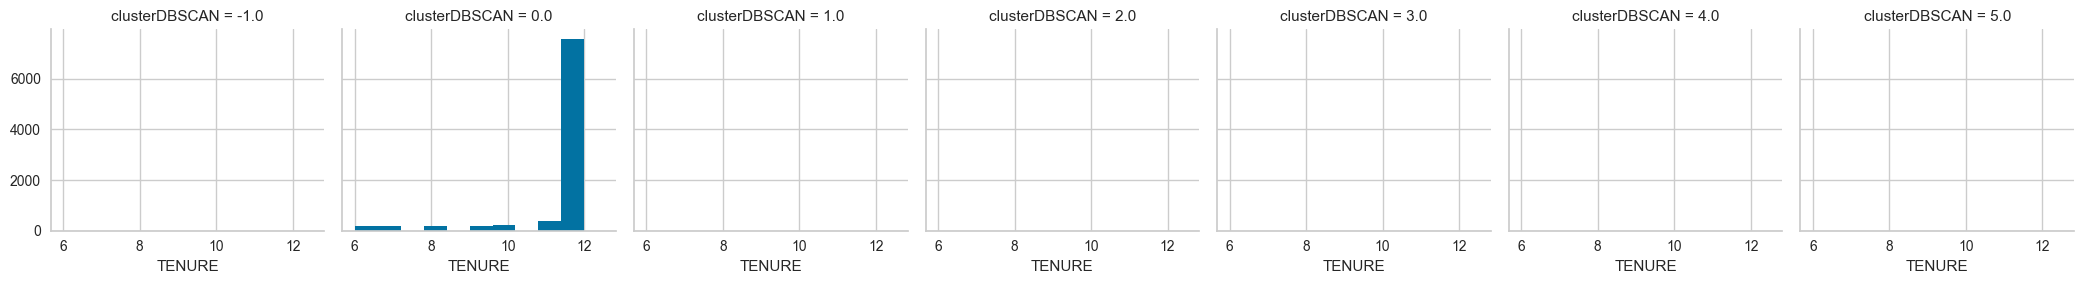

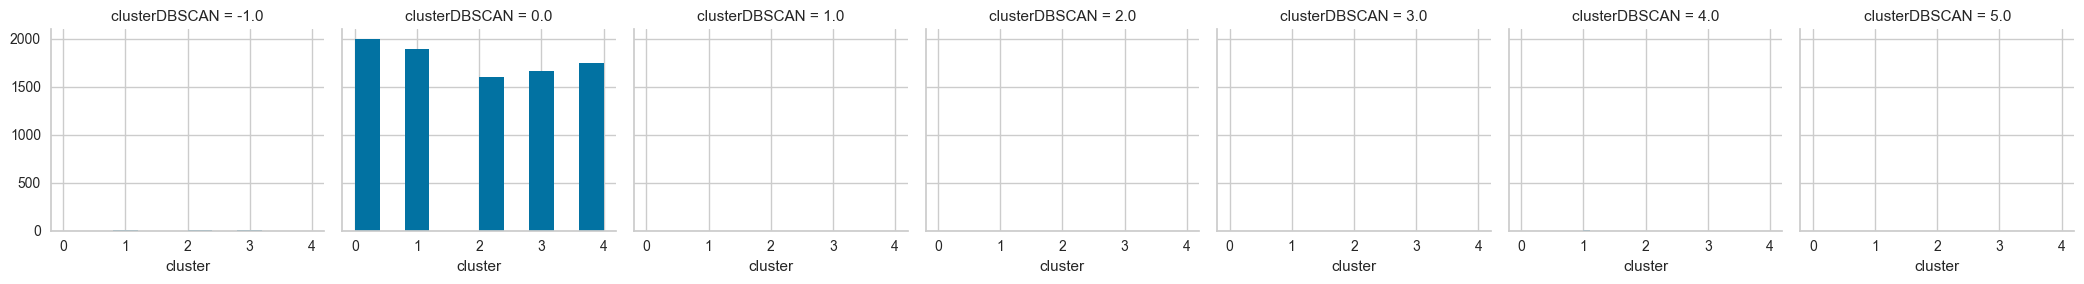

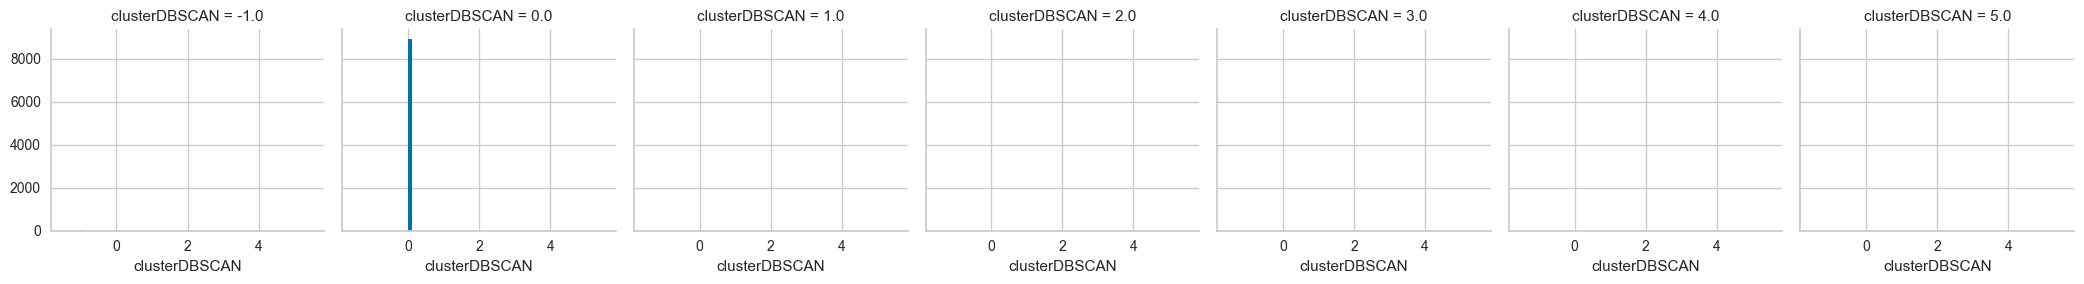

In [78]:
for c in df_cluster:
    grid= sns.FacetGrid(df_cluster, col='clusterDBSCAN')
    grid.map(plt.hist, c) 

Plot the estimated number of clusters

In [79]:
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1) # -1 is not count since it's considered as noise

print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 6


### 1.4.3 Comparing the Classification Algorithms
For the KMeans and Mini-batch KMeans algorithms, we were able to get 5 as the number of clusters. This number was taken by considering both the `Elbow Method` and `Silhouette Scores`. 
But for the DBSCAN method, we selected `eps=8` and `min_samples=2` since they gave the best `Silhouette Scores`.

|Algorithm|Optimal Values|
|---------|---------------|
|KMeans| Number of Clusters = 5|
|Mini-batch KMeans| Number of Clusters = 5|
|DBSCAN| Number of Clusters = 6, with `eps=8` and `min_sample=2`|

#### <u>Performance</u>
First, let's check the performance of the three algorithms with their respective optimal values

In [80]:
%timeit KMeans(n_clusters=5, random_state=42).fit(X)

223 ms ± 30.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [81]:
%timeit MiniBatchKMeans(n_clusters=5, random_state=42).fit(X)

93.6 ms ± 24.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [82]:
%timeit DBSCAN(eps=8, min_samples=2).fit(df_pca_scaled)

The slowest run took 4.05 times longer than the fastest. This could mean that an intermediate result is being cached.
138 ms ± 92.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


It can be seen that Mini-batch KMeans algorithm runs much faster than DBSCAN and KMeans algorithms. Since it is a variation of KMeans algorithm let's plot the performances of KMeans and Mini-batch KMeans algorithms to get more insights.

In [83]:
num_of_times = 100
times = np.empty((num_of_times, 2))
inertias = np.empty((num_of_times, 2))
for k in range(1, num_of_times + 1):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans_ = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, num_of_times), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans_.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans_.inertia_

100/100

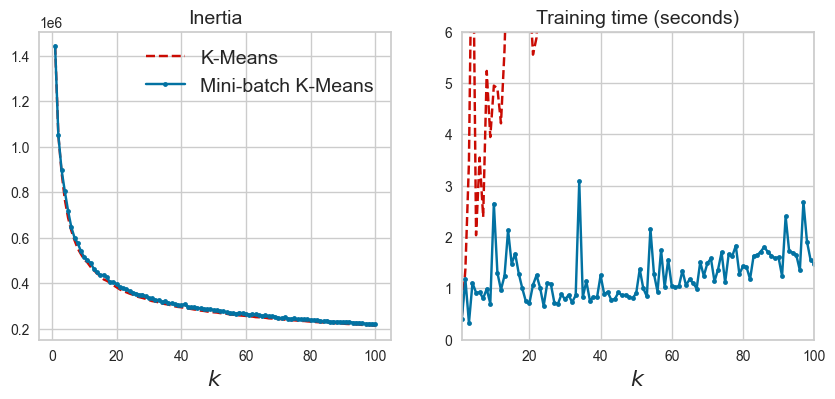

In [84]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

plt.show()

We can see that the Intertia values of KMeans and Mini-batch KMeans values are equal but training times of the two are different. Therefore, it is better to use Mini-batch KMeans than KMeans algorithm.

#### <u>Silhouette Scores</u>
Next, let's see the Silhouette Scores of each algorithm. To do that, we can use the following Python snippet.

In [85]:
# Create an instance of PrettyTable
table = PrettyTable()

# Define table headers
table.field_names = ["Algorithm", "Silhouette Score"]

# Enumerate the dictionary
graph_dict = dict()
table.add_row(["KMeans", silhouette_score(X,  kmeans.labels_)])
table.add_row(["Mini-batch KMeans", silhouette_score(X, minibatch_kmeans.labels_)])
table.add_row(["DBSCAN", silhouette_score(X, db.labels_)])

# Set table formatting options
table.align = "l"  # Align text to the left
table.border = True  # Add border to the table
table.hrules = True  # Add horizontal rules between rows

# Print the table
print(table)

+-------------------+----------------------+
| Algorithm         | Silhouette Score     |
+-------------------+----------------------+
| KMeans            | 0.216488274397537    |
+-------------------+----------------------+
| Mini-batch KMeans | 0.20769327678276242  |
+-------------------+----------------------+
| DBSCAN            | 0.022146357371238802 |
+-------------------+----------------------+


We can see that all the `Silhouette Scores` are positive and therefore the clusters are defined properly. Since the highest `Silhouette Score` is for `KMeans` algorithm we can deduce that it gives better results.

#### <u>Davies-Bouldin Index</u>
The Davies-Bouldin index measures the average similarity between each cluster and its most similar cluster, normalized by the cluster size.
Lower values indicate better clustering. It provides a measure of the compactness and separation of clusters. 
We can calculate and print the Davies-Bouldin Index values for our algorithms as shown below.

In [86]:
# Define Davies-Bouldin Indexes for three algorithms
dbi_kmeans = davies_bouldin_score(X, kmeans.labels_)
dbi_minibatch_kmeans = davies_bouldin_score(X, minibatch_kmeans.labels_)
dbi_dbscan = davies_bouldin_score(X, db.labels_)

# Create an instance of PrettyTable
table = PrettyTable()

# Define table headers
table.field_names = ["Algorithm", "Davies-Bouldin Index"]

# Enumerate the dictionary
graph_dict = dict()
table.add_row(["KMeans", dbi_kmeans])
table.add_row(["Mini-batch KMeans", dbi_minibatch_kmeans])
table.add_row(["DBSCAN", dbi_dbscan])

# Set table formatting options
table.align = "l"  # Align text to the left
table.border = True  # Add border to the table
table.hrules = True  # Add horizontal rules between rows

# Print the table
print(table)

+-------------------+----------------------+
| Algorithm         | Davies-Bouldin Index |
+-------------------+----------------------+
| KMeans            | 1.5146250820609957   |
+-------------------+----------------------+
| Mini-batch KMeans | 1.5719225993454213   |
+-------------------+----------------------+
| DBSCAN            | 1.6733455630235472   |
+-------------------+----------------------+


Since the lowest `Davies-Bouldin Index` is for `KMeans` algorithm we can deduce that it gives better results.

#### <u>Calinski Harabasz Score</u>
The Calinski-Harabasz index is the ratio of the sum of between-cluster dispersion to within-cluster dispersion for all clusters.
Higher values indicate better-defined, more separate clusters. We can calculate and print the Calinski Harabasz Scores for our algorithms as shown below.

In [87]:
# Define Calinski Harabasz Score for three algorithms
chs_kmeans = calinski_harabasz_score(X, kmeans.labels_)
chs_minibatch_kmeans = calinski_harabasz_score(X, minibatch_kmeans.labels_)
chs_dbscan = calinski_harabasz_score(X, db.labels_)

# Create an instance of PrettyTable
table = PrettyTable()

# Define table headers
table.field_names = ["Algorithm", "Calinski Harabasz Scores"]

# Enumerate the dictionary
graph_dict = dict()
table.add_row(["KMeans", chs_kmeans])
table.add_row(["Mini-batch KMeans", chs_minibatch_kmeans])
table.add_row(["DBSCAN", chs_dbscan])

# Set table formatting options
table.align = "l"  # Align text to the left
table.border = True  # Add border to the table
table.hrules = True  # Add horizontal rules between rows

# Print the table
print(table)

+-------------------+--------------------------+
| Algorithm         | Calinski Harabasz Scores |
+-------------------+--------------------------+
| KMeans            | 2453.715057631634        |
+-------------------+--------------------------+
| Mini-batch KMeans | 2355.678998982053        |
+-------------------+--------------------------+
| DBSCAN            | 5.99185601655639         |
+-------------------+--------------------------+


Since the higest `Calinski HarabaszS` is for `KMeans` algorithm we can deduce that it gives better results.

#### <u>Metrics Results</u>

Following is the summarization of metrics.

|Metric|Best Algorithm|
|------|---------------|
|Performance|Mini-batch KMeans|
|Silhouette Scoring|KMeans|
|Davies-Boulding Index|KMeans|
|Calinski Harabasz Score|KMeans|

Therefore, with the above metrics we can deduce that although the `KMeans` algorithm is low in the `performance` aspect, it gives the best results.
But if the performance aspect is also needed to be considered, the `Mini-batch KMeans` also gives good results, as you can see from the above tables.

### 1.4.4 Insights

The following code shows, how you can append the cluster labels to the data frame for the three algorithms, view them in plots and provide insights related to the **Data Mining Problem** we have discussed in section 1.

In [101]:
# Concatenate the labels
kmeans_labels = kmeans.labels_
minibatch_kmeans_labels = minibatch_kmeans.labels_
dbscan_labels = db.labels_ 

df_cluster = pd.concat([df1, pd.DataFrame(kmeans_labels, columns=['kmeans'])], axis=1)
df_cluster = pd.concat([df_cluster, pd.DataFrame(minibatch_kmeans_labels, columns=['minibatch_kmeans'])], axis=1)
df_cluster = pd.concat([df_cluster, pd.DataFrame(dbscan_labels, columns=['dbscan'])], axis=1)

# Show first 10 rows
df_cluster.head(10)     

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   
6   627.260806           1.000000    7091.01           6402.63   
7  1823.652743           1.000000     436.20              0.00   
8  1014.926473           1.000000     861.49            661.49   
9   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  kmeans  \
0   201.802084        139.509787          0.000000      12       1   
1  4103.032597       1072.340217          0.222222      12       3   
2   622.066742        627.284787          0.000000      12       4   
3     0.000000        864.206542          0.000000      12       1   
4   678.334763        244.791237          0.000000      12       2   
5  1400.057770       2407.246035          0.000000      12       0   
6  6354.314328        198.065894          1.000000      12       4   
7   679.065082        532.033990          0.000000      12       0   
8   688.278568        311.963409          0.000000      12       2   
9  1164.770591        100.302262          0.000000      12       1   

   minibatch_kmeans  dbscan  
0                 4       0  
1                 2       0  
2                 3       0  
3                 4       0  
4                 0       0  
5                 1       0  
6                 3

Now, let's check few graphs using the labels we have gotten from KMeans algorithm.

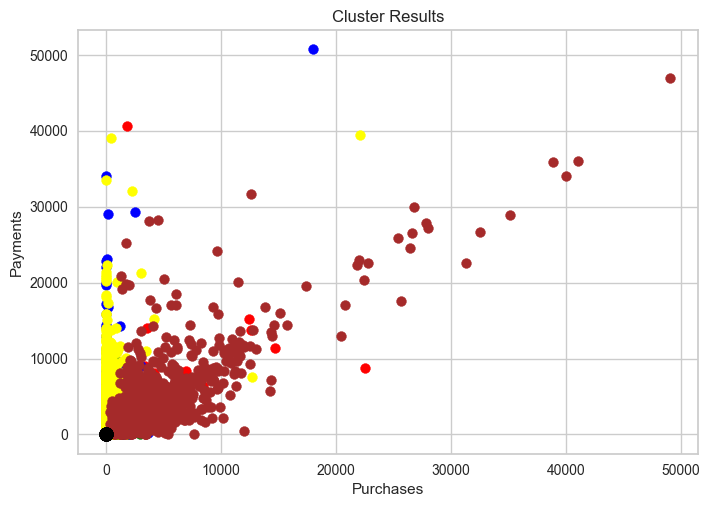

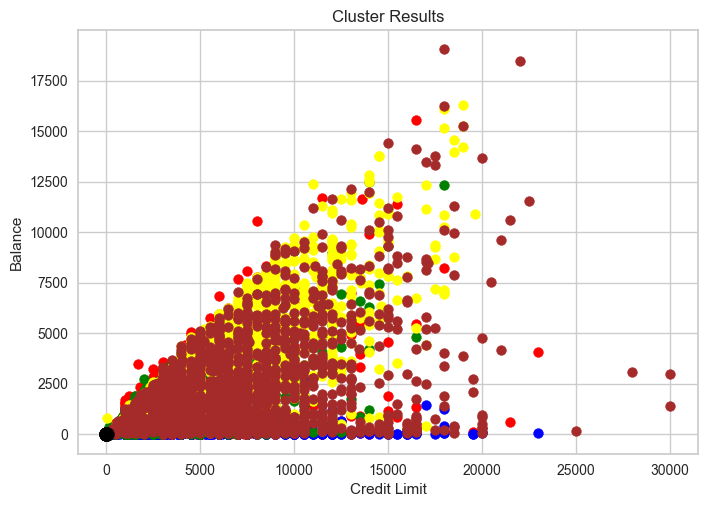

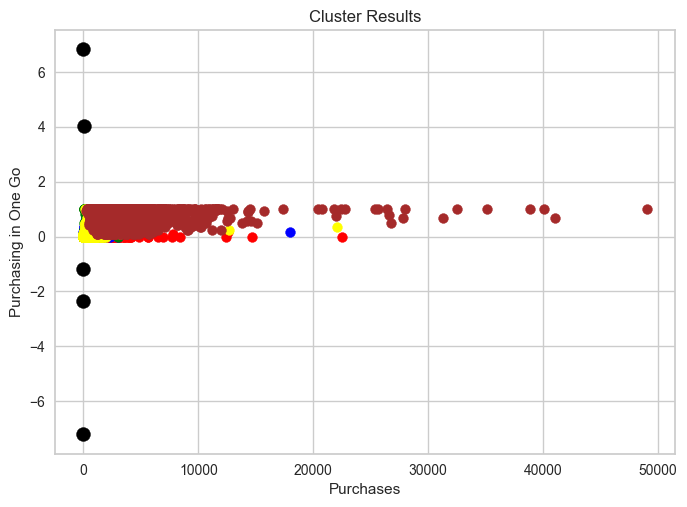

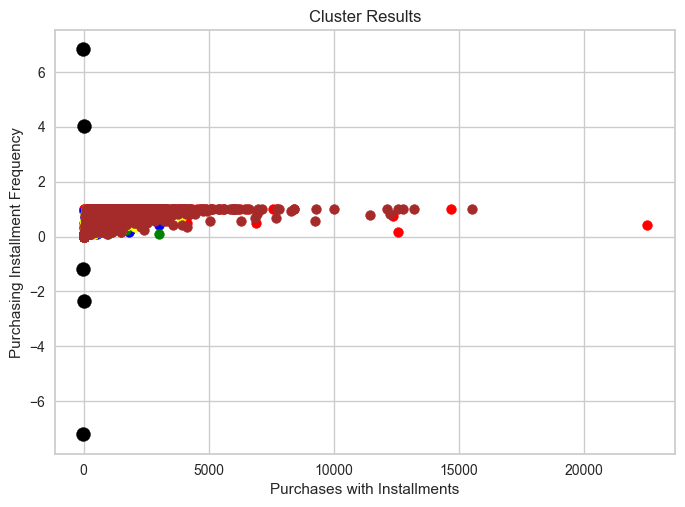

In [102]:
# KMeans
df = df_cluster.copy()

# Purchases vs. Payments
plt.scatter(df.iloc[kmeans_labels==0,2], df.iloc[kmeans_labels==0,13], s=50, c= "red")
plt.scatter(df.iloc[kmeans_labels==1,2], df.iloc[kmeans_labels==1,13], s=50, c= "blue")
plt.scatter(df.iloc[kmeans_labels==2,2], df.iloc[kmeans_labels==2,13], s=50, c= "green")
plt.scatter(df.iloc[kmeans_labels==3,2], df.iloc[kmeans_labels==3,13], s=50, c= "yellow")
plt.scatter(df.iloc[kmeans_labels==4,2], df.iloc[kmeans_labels==4,13], s=50, c= "brown")
plt.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1], s=100, c= "black")
plt.title("Cluster Results")
plt.xlabel("Purchases")
plt.ylabel("Payments")
plt.show()

# Credit Limit vs. Balance
plt.scatter(df.iloc[kmeans_labels==0,12], df.iloc[kmeans_labels==0,0], s=50, c= "red")
plt.scatter(df.iloc[kmeans_labels==1,12], df.iloc[kmeans_labels==1,0], s=50, c= "blue")
plt.scatter(df.iloc[kmeans_labels==2,12], df.iloc[kmeans_labels==2,0], s=50, c= "green")
plt.scatter(df.iloc[kmeans_labels==3,12], df.iloc[kmeans_labels==3,0], s=50, c= "yellow")
plt.scatter(df.iloc[kmeans_labels==4,12], df.iloc[kmeans_labels==4,0], s=50, c= "brown")
plt.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1], s=100, c= "black")
plt.title("Cluster Results")
plt.xlabel("Credit Limit")
plt.ylabel("Balance")
plt.show()

# Purchases vs. OnOff Purchases Frequency
plt.scatter(df.iloc[kmeans_labels==0,2], df.iloc[kmeans_labels==0,7], s=50, c= "red")
plt.scatter(df.iloc[kmeans_labels==1,2], df.iloc[kmeans_labels==1,7], s=50, c= "blue")
plt.scatter(df.iloc[kmeans_labels==2,2], df.iloc[kmeans_labels==2,7], s=50, c= "green")
plt.scatter(df.iloc[kmeans_labels==3,2], df.iloc[kmeans_labels==3,7], s=50, c= "yellow")
plt.scatter(df.iloc[kmeans_labels==4,2], df.iloc[kmeans_labels==4,7], s=50, c= "brown")
plt.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1], s=100, c= "black")
plt.title("Cluster Results")
plt.xlabel("Purchases")
plt.ylabel("Purchasing in One Go")
plt.show()

# Purchases with Installments vs. Installment Purchases Frequency
plt.scatter(df.iloc[kmeans_labels==0,4], df.iloc[kmeans_labels==0,8], s=50, c= "red")
plt.scatter(df.iloc[kmeans_labels==1,4], df.iloc[kmeans_labels==1,8], s=50, c= "blue")
plt.scatter(df.iloc[kmeans_labels==2,4], df.iloc[kmeans_labels==2,8], s=50, c= "green")
plt.scatter(df.iloc[kmeans_labels==3,4], df.iloc[kmeans_labels==3,8], s=50, c= "yellow")
plt.scatter(df.iloc[kmeans_labels==4,4], df.iloc[kmeans_labels==4,8], s=50, c= "brown")
plt.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1], s=100, c= "black")
plt.title("Cluster Results")
plt.xlabel("Purchases with Installments")
plt.ylabel("Purchasing Installment Frequency")
plt.show()

From the graphs, we can understand that,
- There are a considerable number of customers who have credit cards for making purchases only and they tend to pay the bank the amounts they use to make purchases.
- We can see most customers are making payments according to the credit limits they have and not trying to max out the credit cards.
- We can also see most of the purchases are being done in one go.
- Similarly, most of the users are not making installment purchases as well.

By understanding these points, we can deduce that most of the customers are not maxing out their credit cards and most of them try to pay the credit cards as well.

Rather than using these general points, we can find the insights of our clusters as well. The following code plots the clusters and we can check the clusters then and find insights.

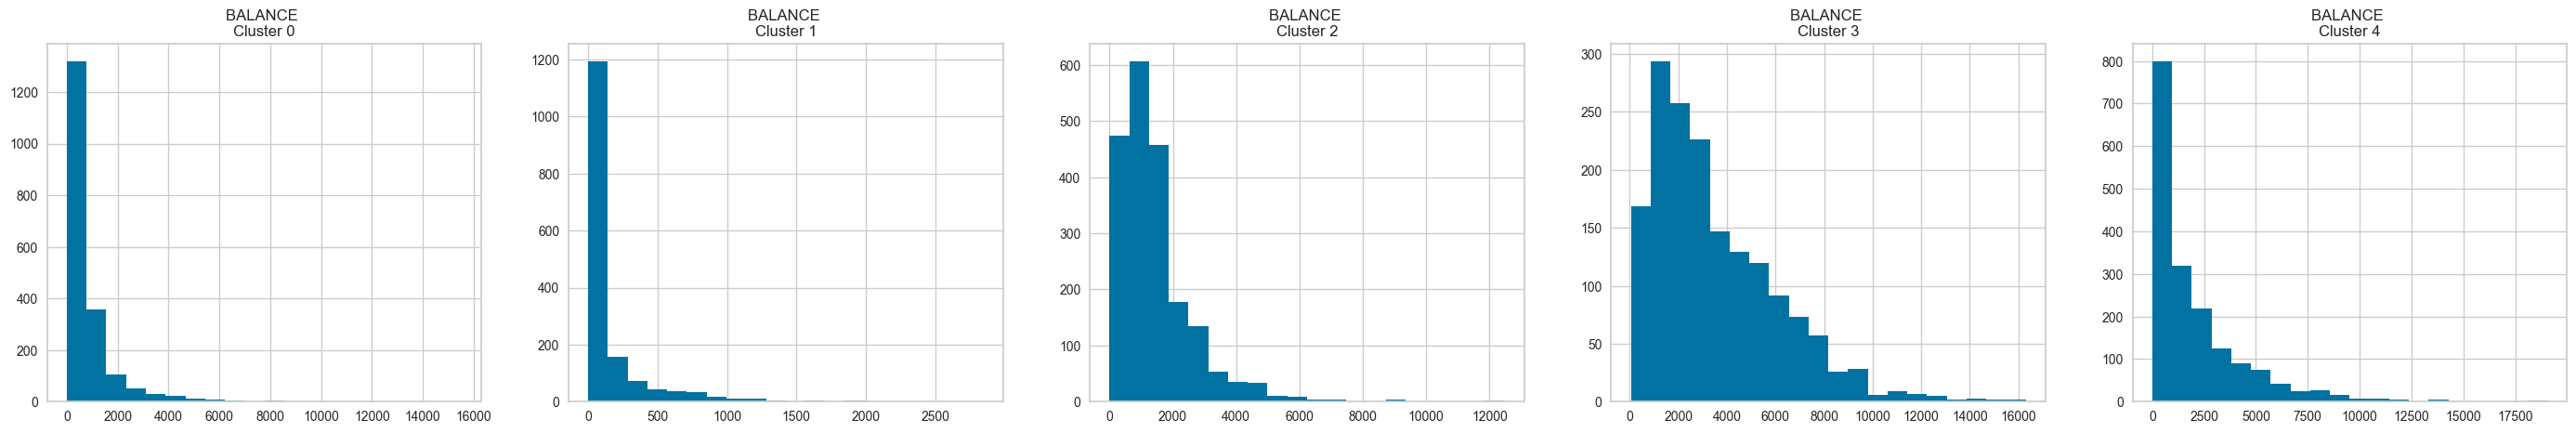

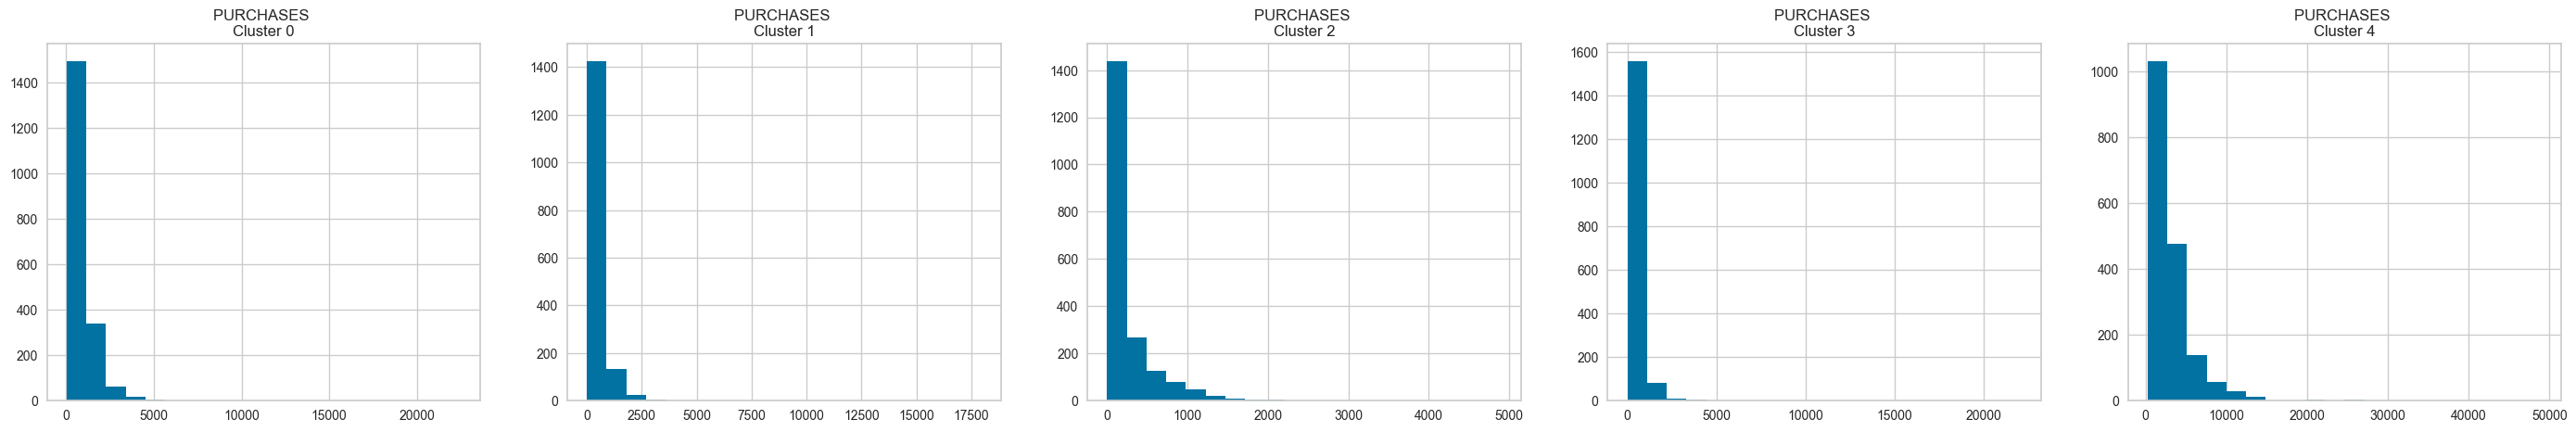

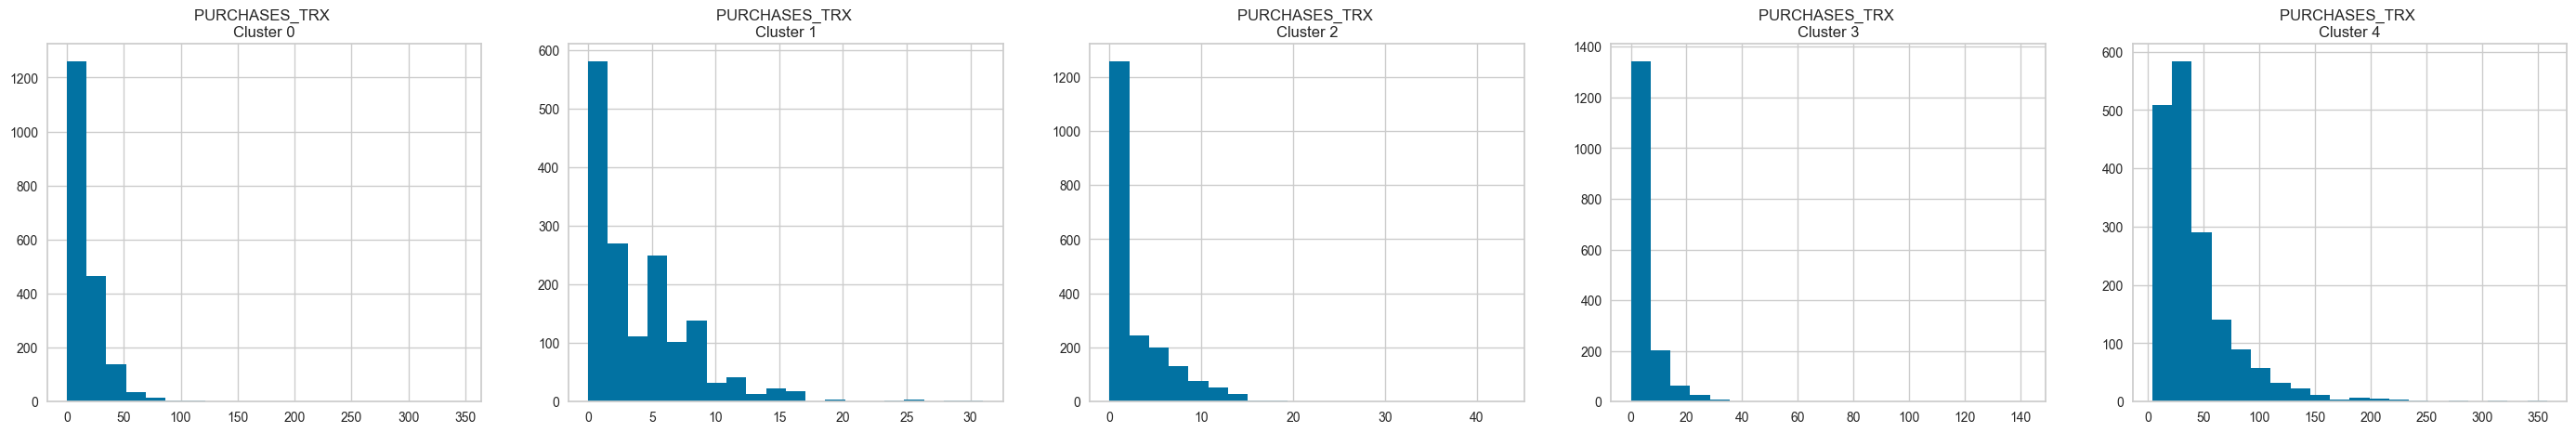

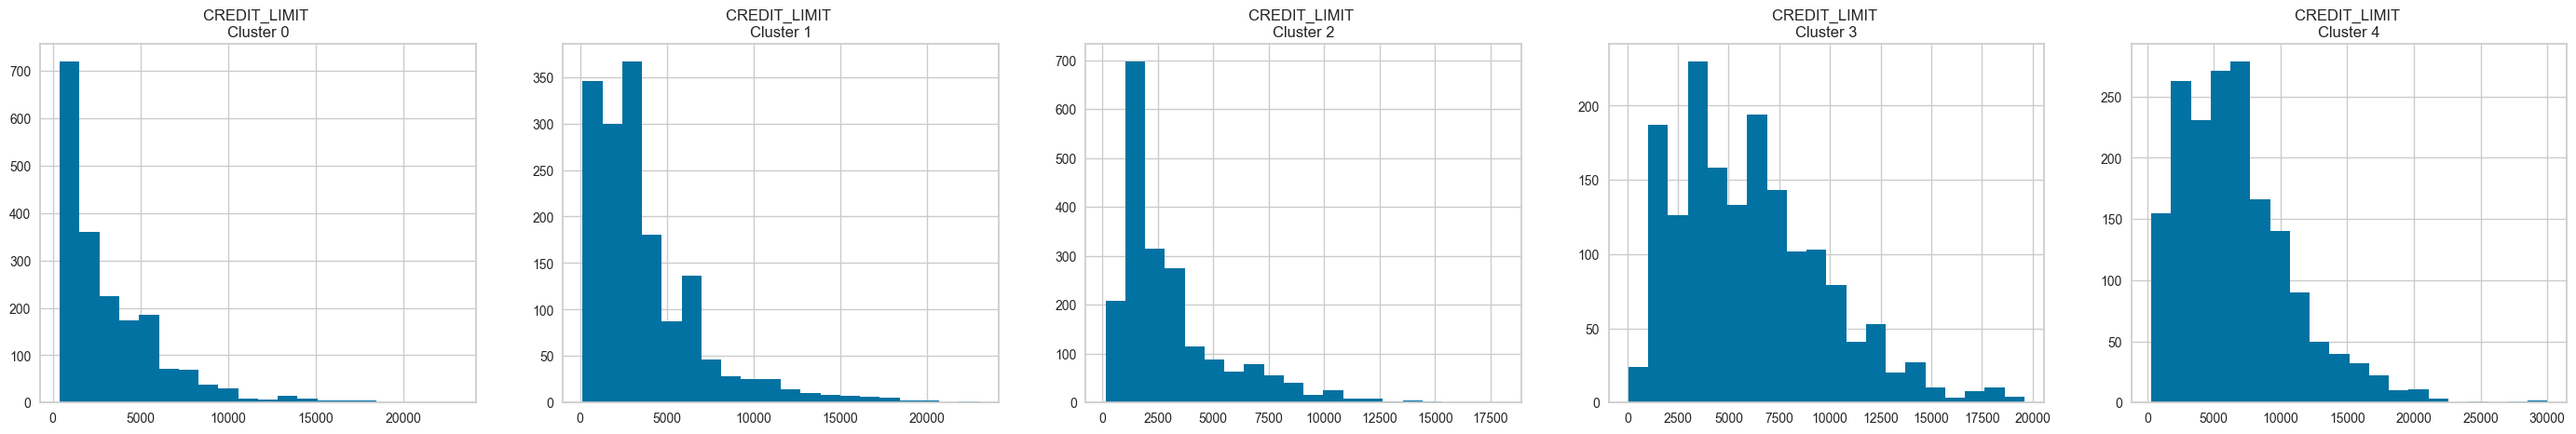

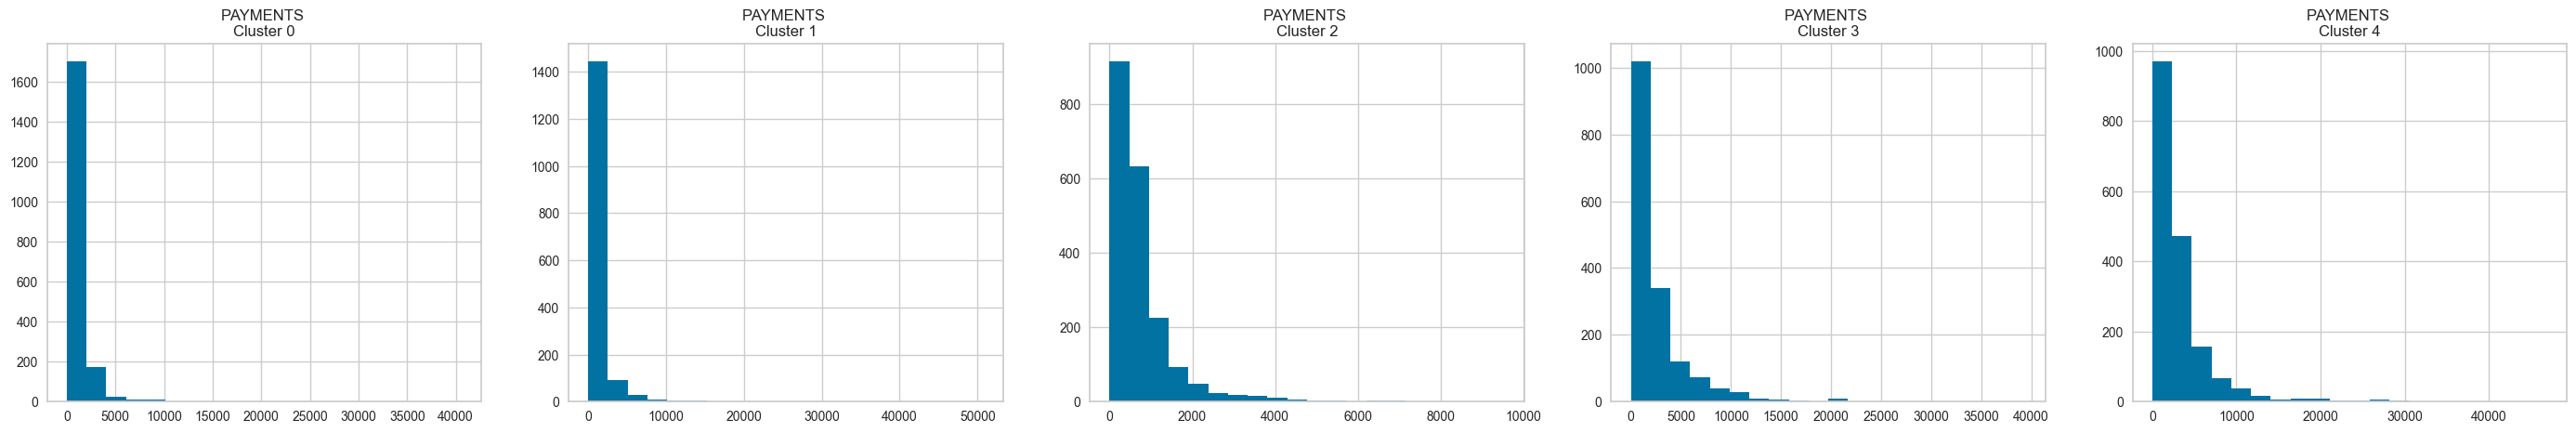

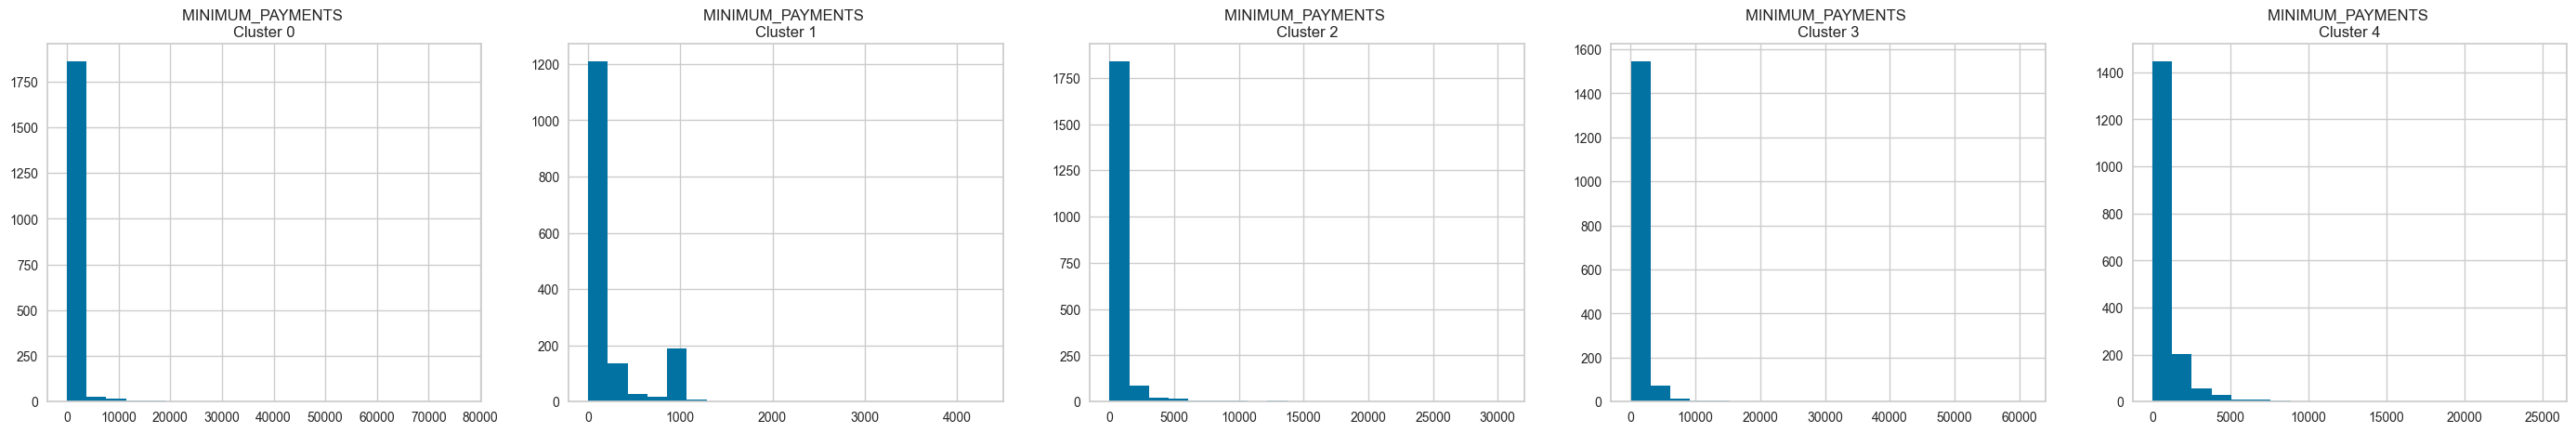

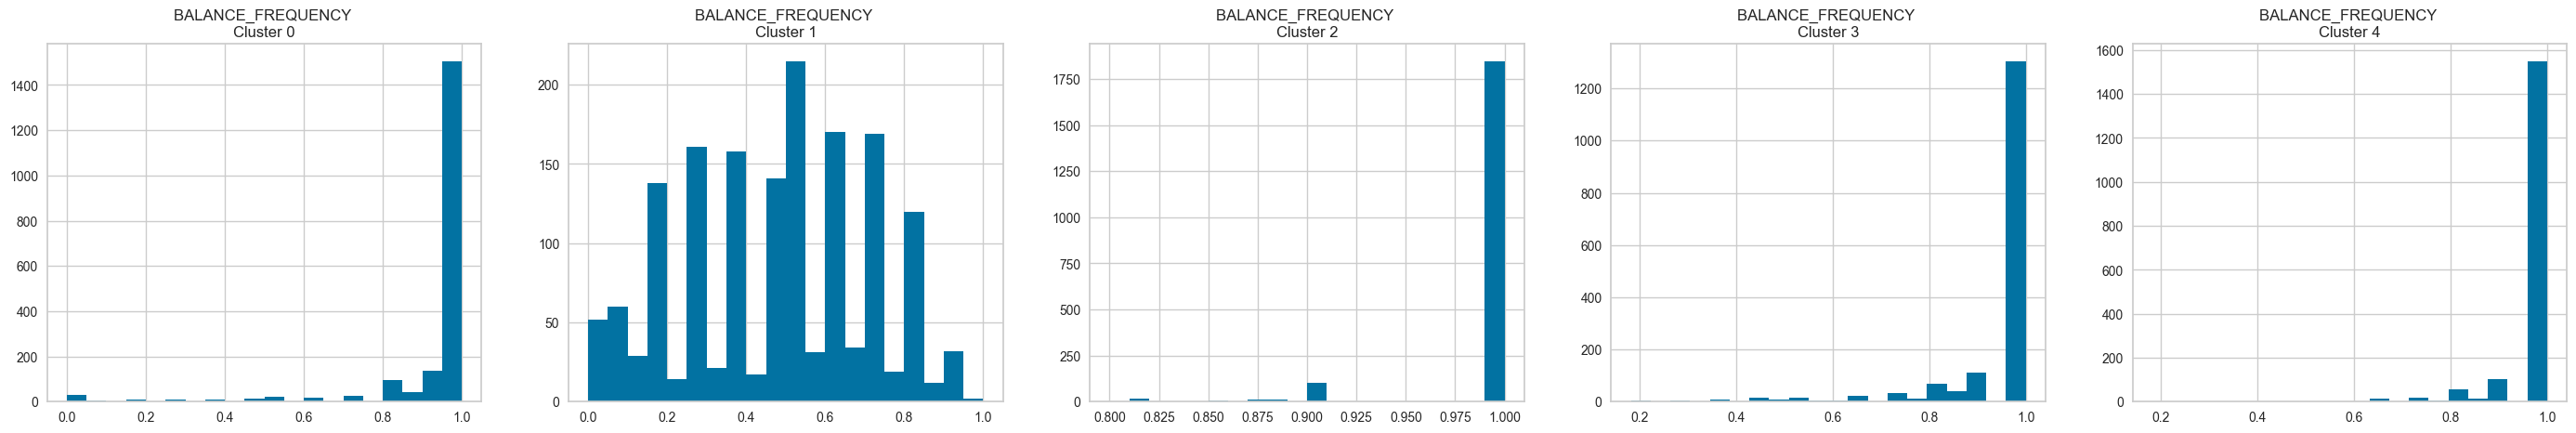

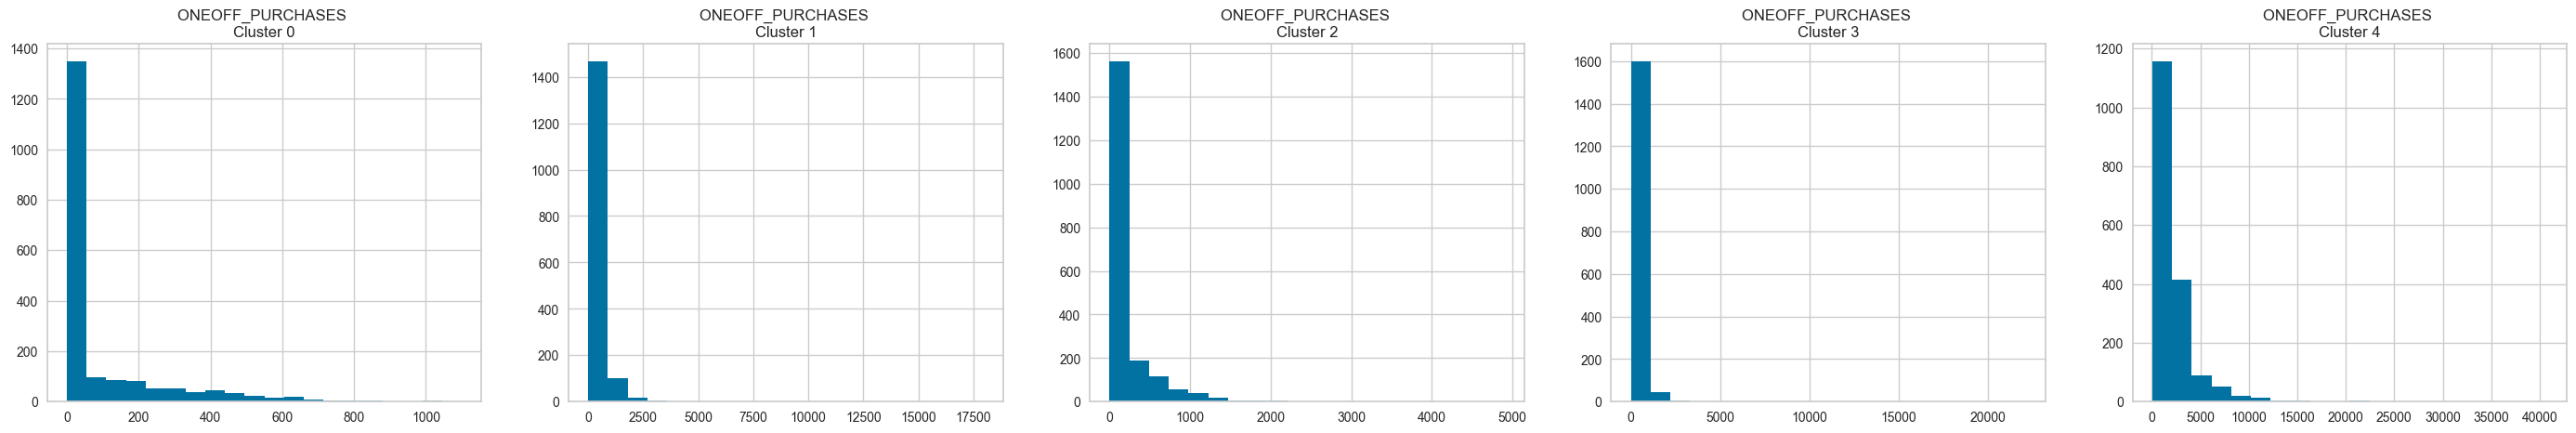

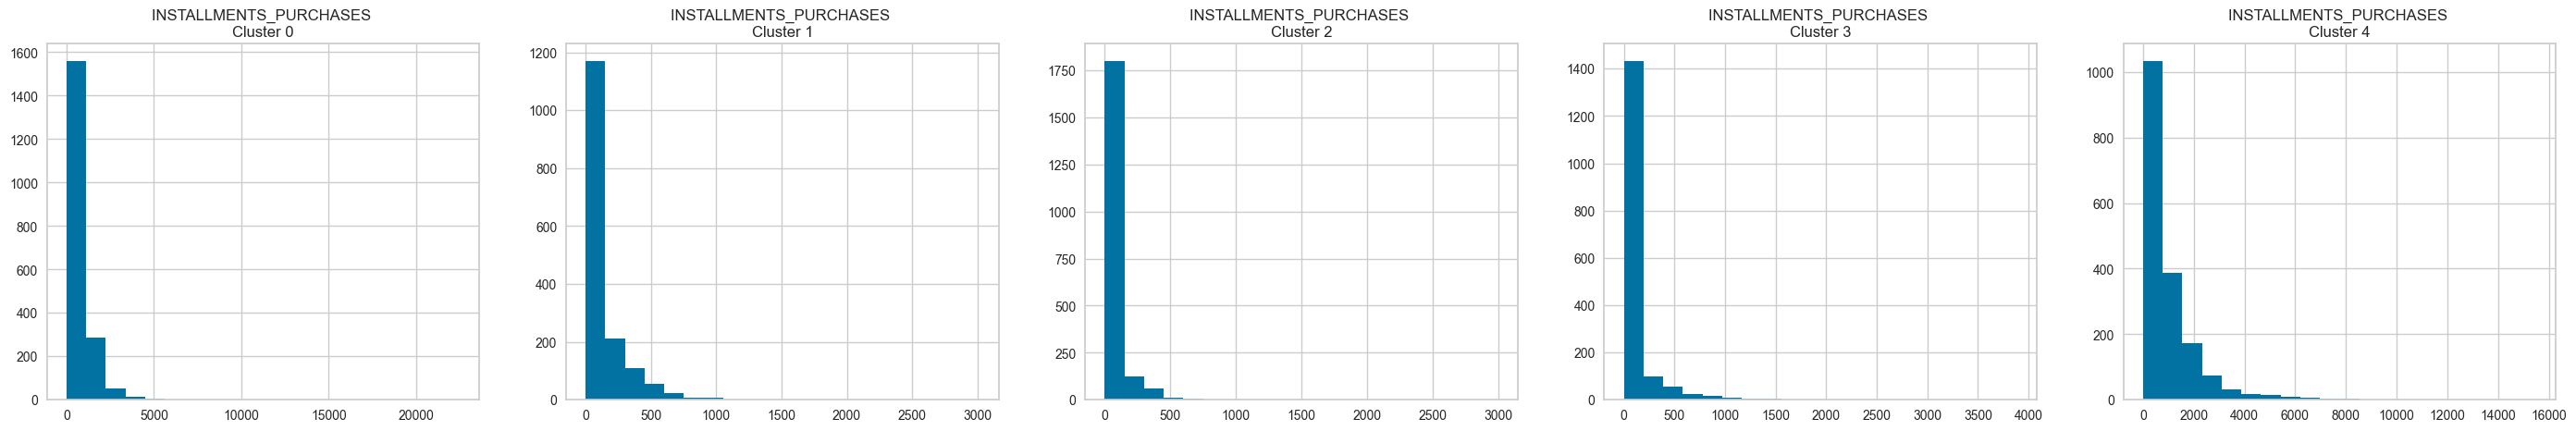

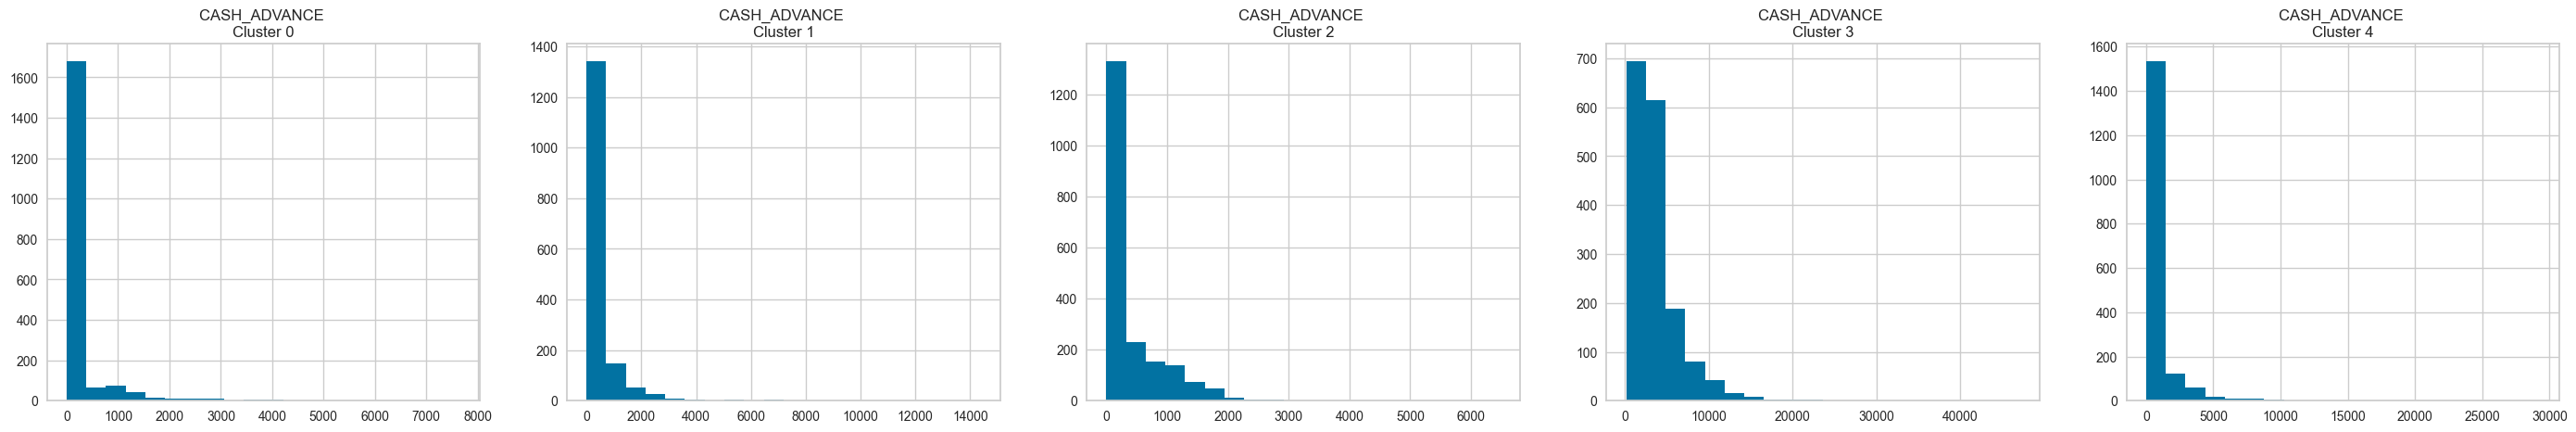

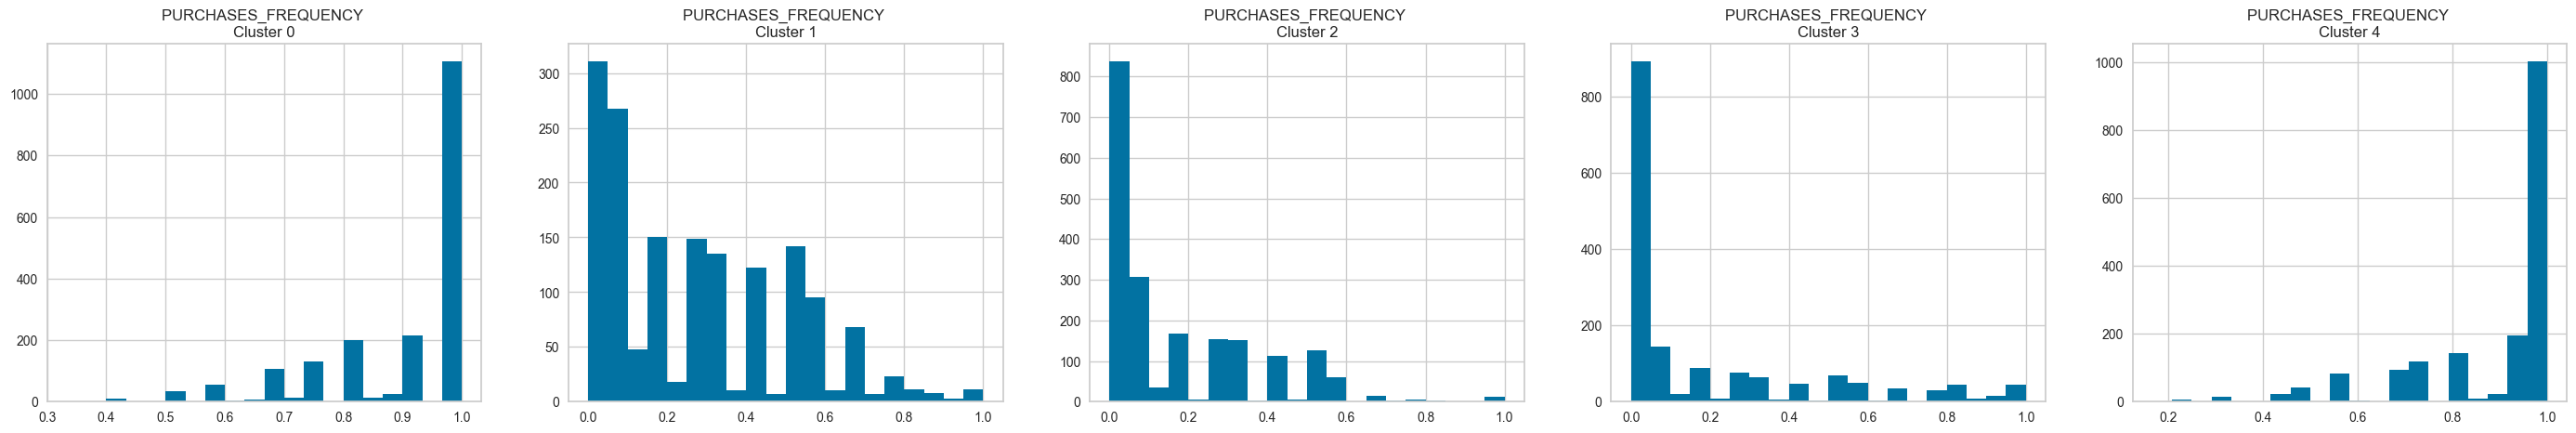

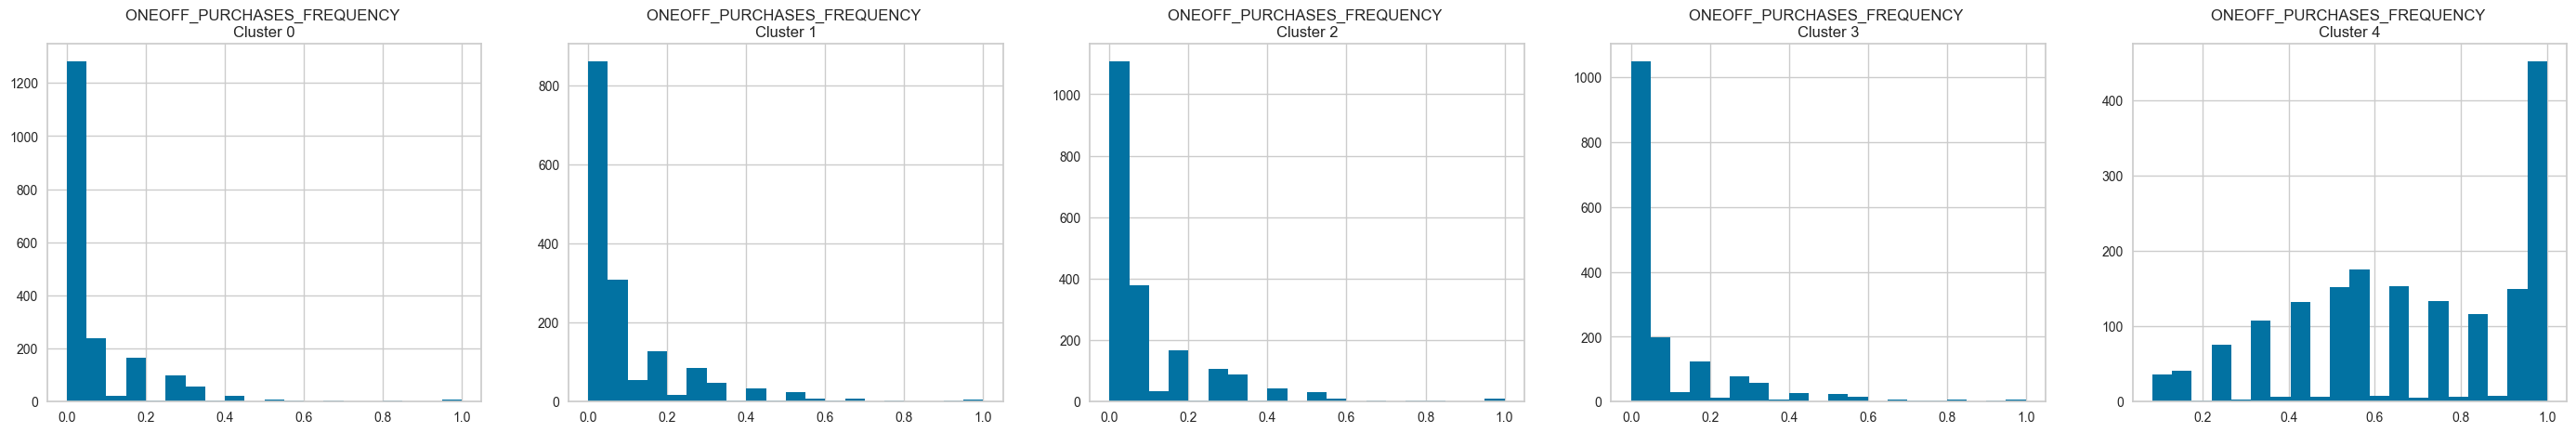

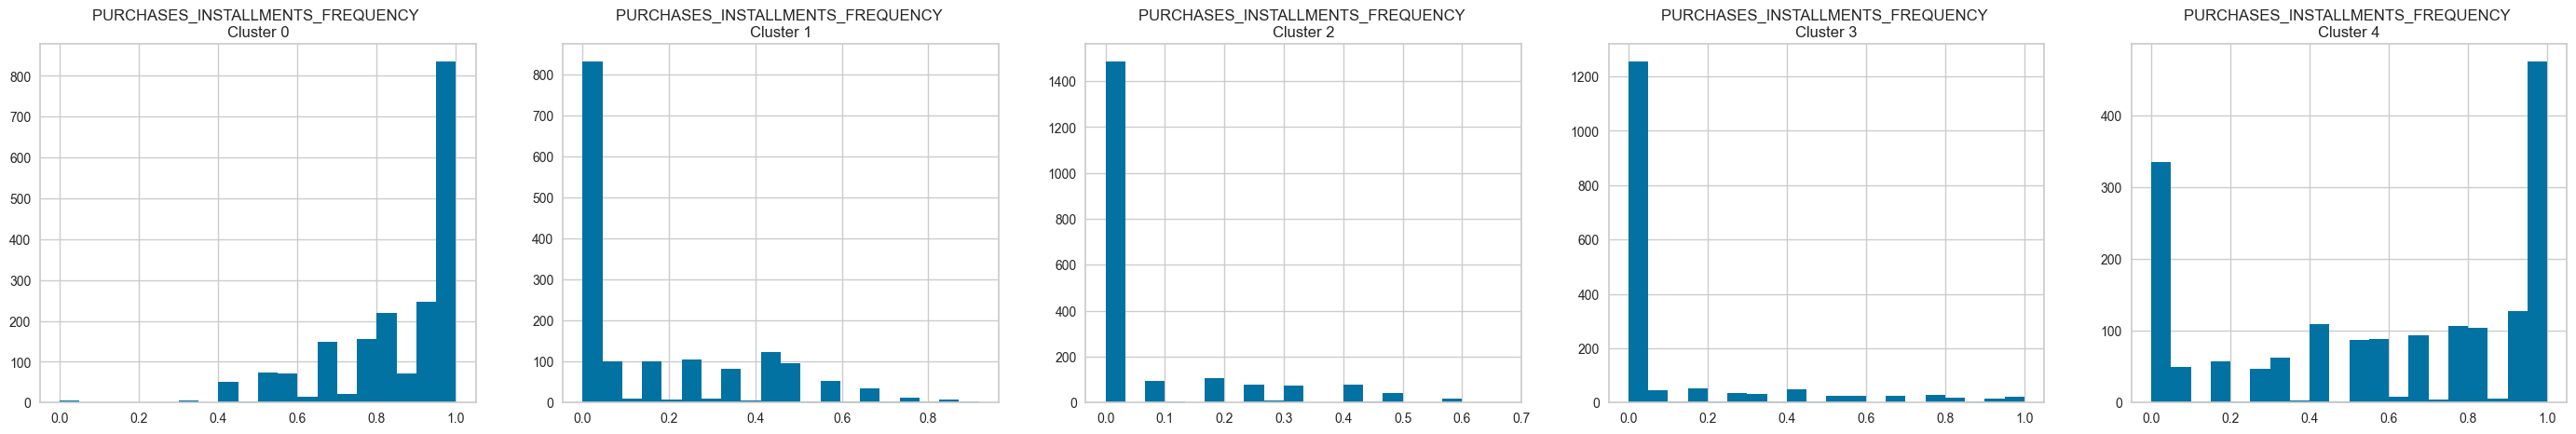

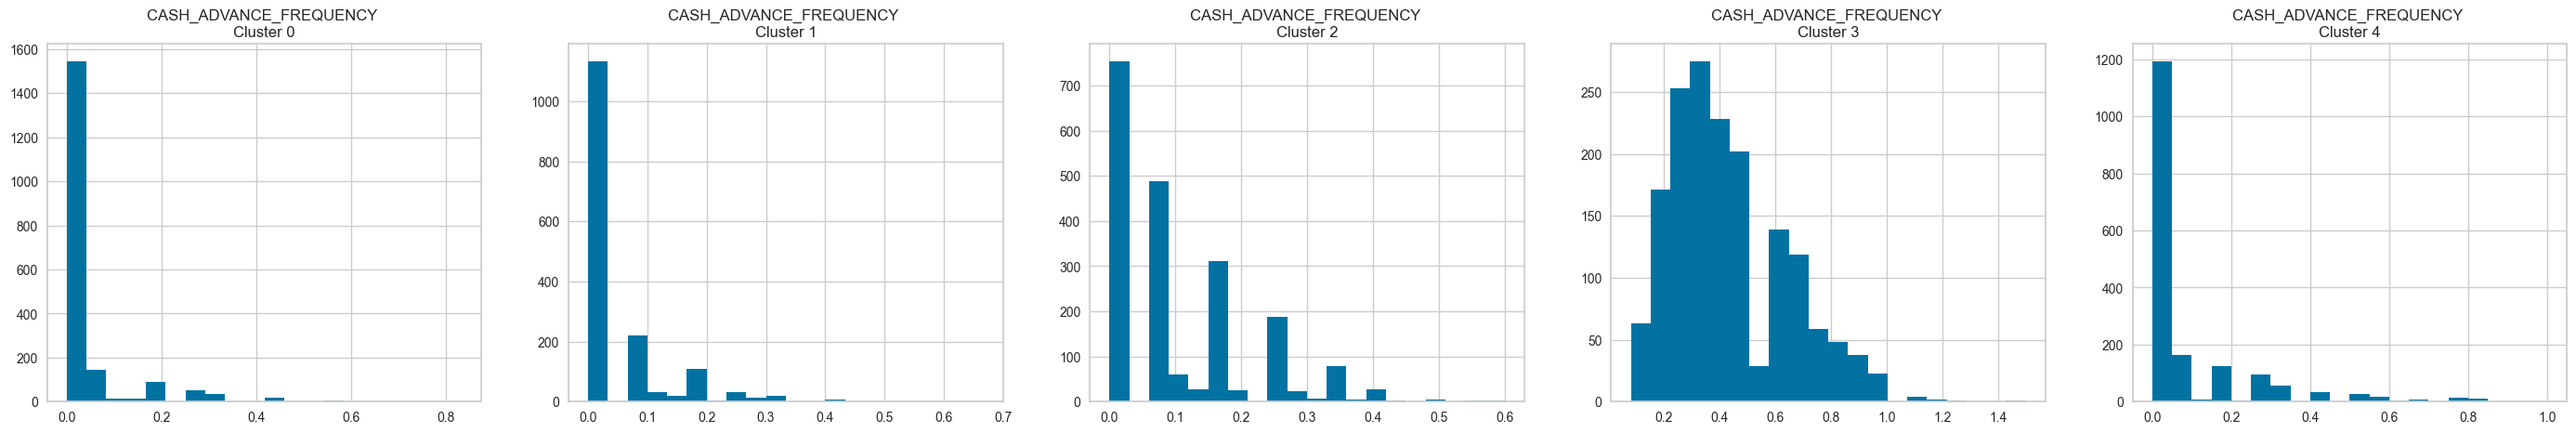

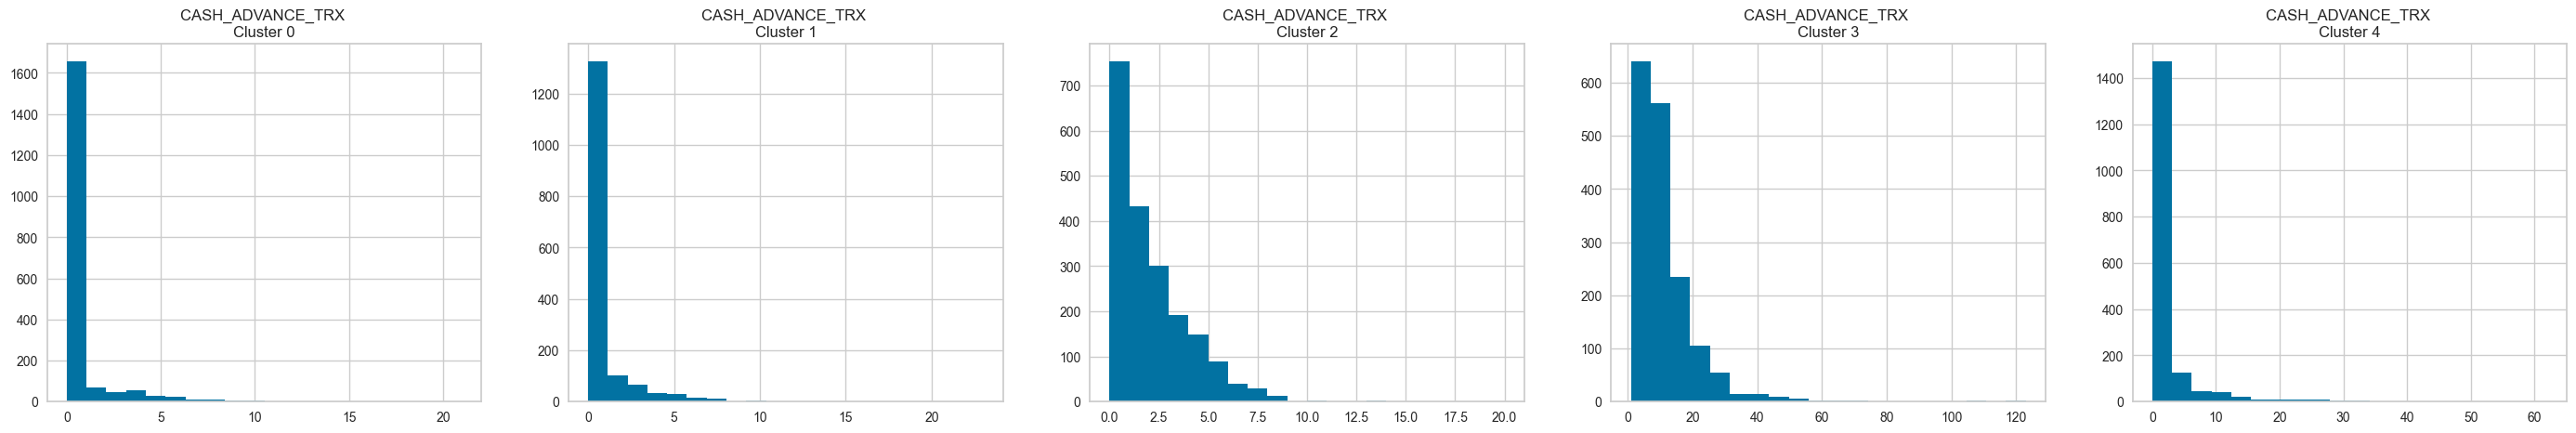

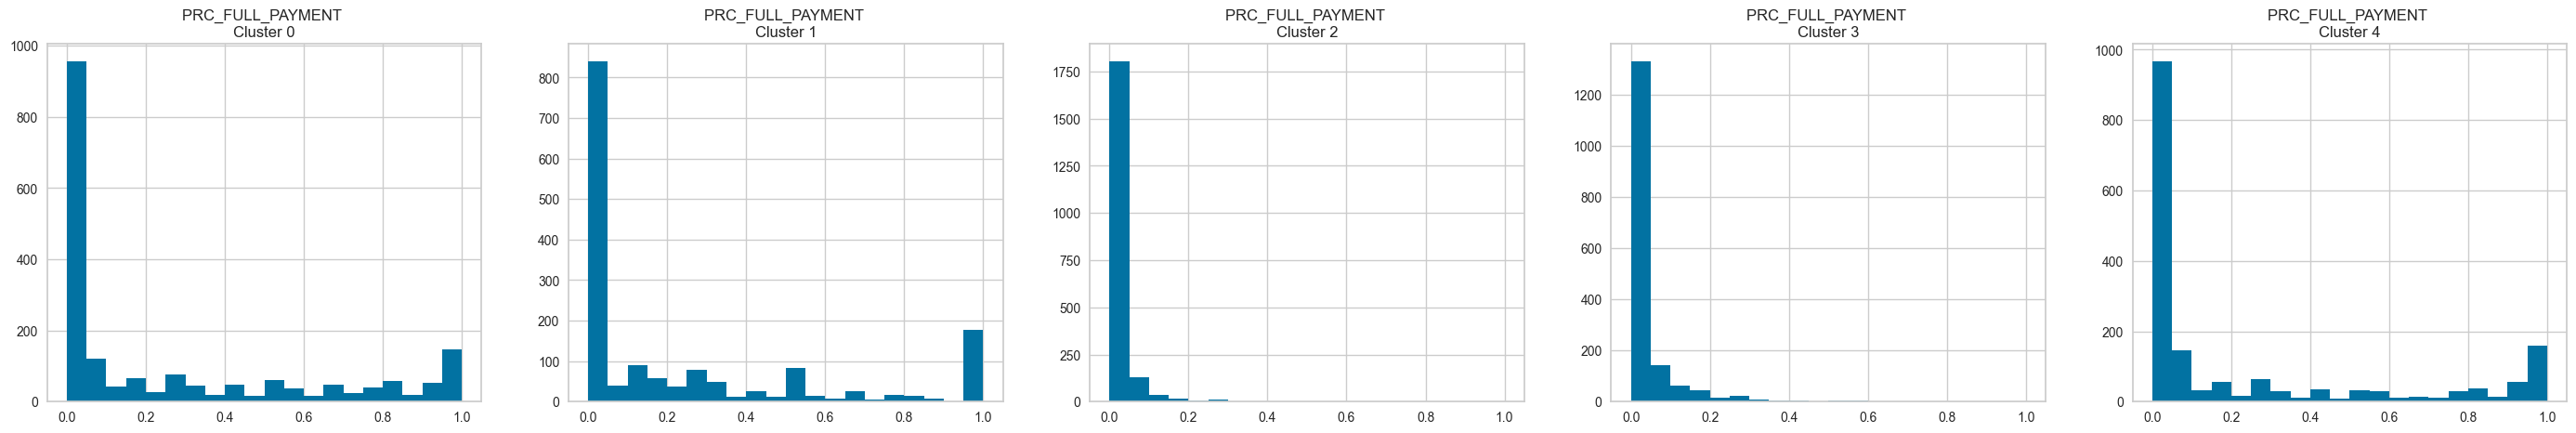

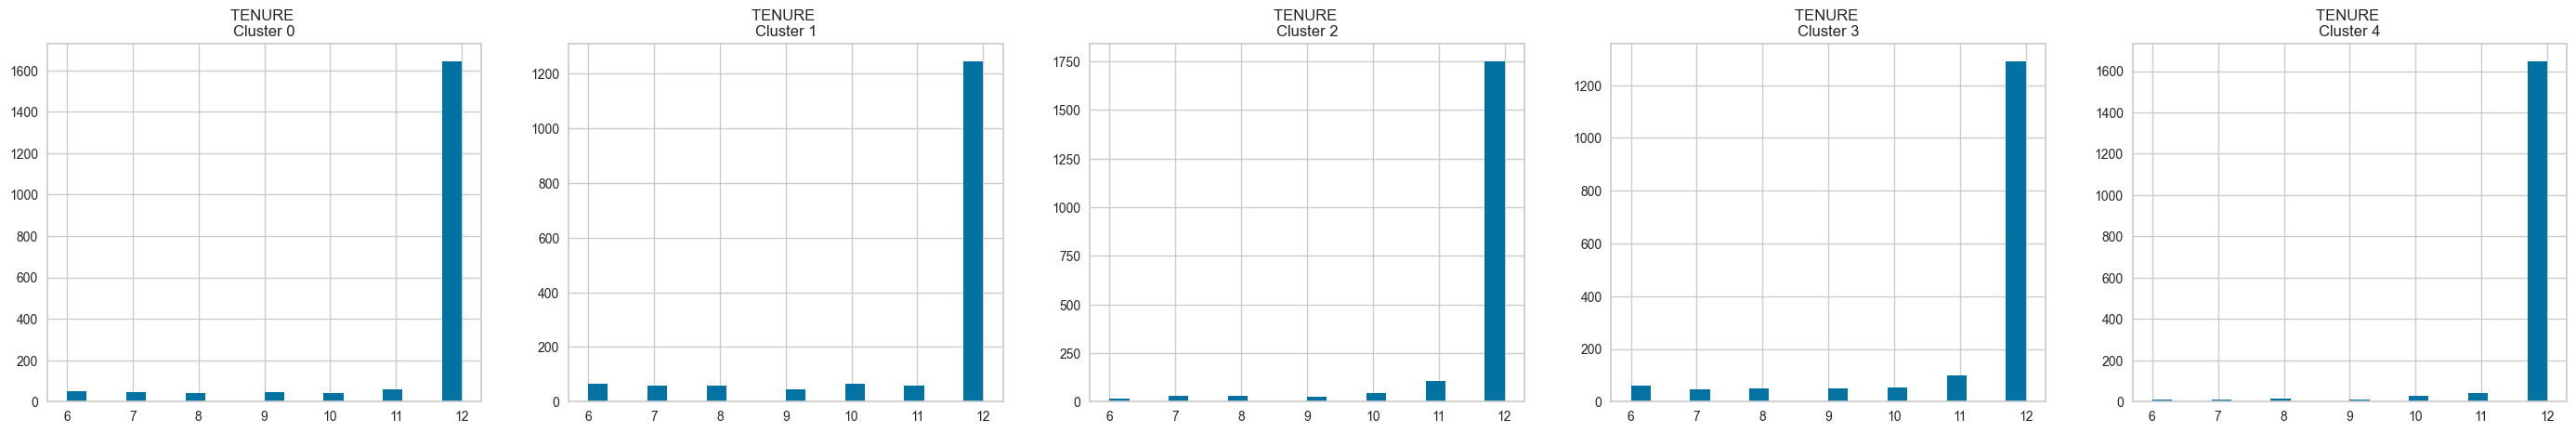

In [103]:
for i in df_pca_scaled:
    plt.figure(figsize=(35,5))
    for j in range(5):
        plt.subplot(1,5,j+1)
        cluster = df_cluster[df_cluster['kmeans']==j]
        cluster[i].hist(bins=20)
        plt.title(f'{i} \nCluster {j}')
    plt.show()

The cluster details are as follows.

**Cluster 0**
- Low high balance
- Low cash advance
- High purchase frequency
- High purchase installment frequency
- Low cash advance frequency
- Low cash advance transaction
- High minimum payments
- Low full payment
- High tenure

The people in cluster 0 are making purchases frequently and make low cash advances utilizing credit cards to the maximum.

**Cluster 1**
- Low high balance
- Low cash advance
- Little purchase frequency
- Low purchase installment frequency
- Low cash advance frequency
- Low cash advance transaction
- Little minimum payments
- Low full payment
- High tenure

The people in cluster 1 are not making purchases and they don't have a high balance, these can be transactors, who are using the credit cards carefully.

**Cluster 2**
- Low high balance
- Low cash advance
- Low purchase frequency
- Low purchase installment frequency
- High cash advance frequency
- Little advance transaction
- High minimum payments
- Low full payment
- High tenure

The people in cluster 2 are making high minimum payments and have high cash advance frequencies. Therefore we can assume these are frequent credit card users. These people can be VIP members who are using credit cards for every transaction and make sure to fill the credit card without maxing it out.

**Cluster 3**
- High high balance
- Low cash advance
- Low purchase frequency
- High purchase installment frequency
- High cash advance frequency
- Low cash advance transaction
- High minimum payments
- Low full payment
- High tenure

The people in cluster 3 have high balances and high minimum payments. These can be travelers who have gotten credit cards for the offers.

**Cluster 4**
- Low high balance
- Low cash advance
- High purchase frequency
- High purchase installment frequency
- Low cash advance frequency
- Low cash advance transaction
- High minimum payments
- Little full payment
- High tenure

The people in cluster 4 have a low high balance, high purchases, and high purchase frequencies. These can be those who are mainly using credit cards for shopping, and for making big purchases.

# References
1. Géron, A. (2019). Hands-on machine learning with Scikit-Learn and TensorFlow concepts, tools, and techniques to build intelligent systems. 2nd ed. O’Reilly Media, Inc.
2. Witten, I.H. and Al, E. (2017). Data mining : practical machine learning tools and techniques. Amsterdam: Morgan Kaufmann.
3. Priy, S. (2018). Clustering in Machine Learning - GeeksforGeeks. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/clustering-in-machine-learning/.
4. Zaki, M.J. and Wagner Meira (2020). Data mining and machine learning : fundamental concepts and algorithms. Cambridge, United Kingdom ; New York, Ny: Cambridge University Press.
5. Everitt, B. and Al, E. (2011). Cluster analysis. Chichester, West Sussex, U.K.: Wiley.
